## Info About Dataset
**The key features are four urinary biomarkers: creatinine, LYVE1, REG1B, and TFF1.**

"Creatinine" is a protein that is often used as an indicator of kidney function.

"YVLE1" is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis

"REG1B" is a protein that may be associated with pancreas regeneration

"TFF1" is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

Age and sex, both included in the dataset, may also play a role in who gets pancreatic cancer. The dataset includes a few other biomarkers as well, but these were not measured in all patients (they were collected partly to measure how various blood biomarkers compared to urine biomarkers).

## Prediction task
**The goal in this dataset is predicting a " diagnosis " , and more specifically,
differentiating between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy).**

**The dataset includes information on stage of pancreatic cancer, and diagnosis for non-cancerous patients, but remember—these won't be available to a predictive model. The goal, after all, is to predict the presence of disease before it's diagnosed, not after!**

dataset_link = https://www.kaggle.com/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
data.shape

(590, 14)

In [5]:
(data.isnull().sum()/len(data))*100

sample_id                   0.000000
patient_cohort              0.000000
sample_origin               0.000000
age                         0.000000
sex                         0.000000
diagnosis                   0.000000
stage                      66.271186
benign_sample_diagnosis    64.745763
plasma_CA19_9              40.677966
creatinine                  0.000000
LYVE1                       0.000000
REG1B                       0.000000
TFF1                        0.000000
REG1A                      48.135593
dtype: float64

In [6]:
## Dropped Unncessary Columns
data.drop(['sample_id','stage','benign_sample_diagnosis','plasma_CA19_9','REG1A'],axis=1,inplace=True)

In [7]:
data.head()

,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,Cohort1,BPTB,33,F,1,1.83222,0.893219,52.94884,654.282174
1,Cohort1,BPTB,81,F,1,0.97266,2.037585,94.46703,209.488250
2,Cohort2,BPTB,51,M,1,0.78039,0.145589,102.36600,461.141000
3,Cohort2,BPTB,61,M,1,0.70122,0.002805,60.57900,142.950000
4,Cohort2,BPTB,62,M,1,0.21489,0.000860,65.54000,41.088000


In [8]:
data.describe()

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,2.027119,0.855383,3.063530,111.774090,597.868722
std,13.109520,0.804873,0.639028,3.438796,196.267110,1010.477245
min,26.000000,1.000000,0.056550,0.000129,0.001104,0.005293
25%,50.000000,1.000000,0.373230,0.167179,10.757216,43.961000
50%,60.000000,2.000000,0.723840,1.649862,34.303353,259.873974
75%,69.000000,3.000000,1.139482,5.205037,122.741013,742.736000
max,89.000000,3.000000,4.116840,23.890323,1403.897600,13344.300000


In [9]:
## Check for Duplicate Rows
def remove_duplicates(data):
    data.drop_duplicates(keep='first',inplace=True)
    return "Checked Duplicates"
remove_duplicates(data)

'Checked Duplicates'

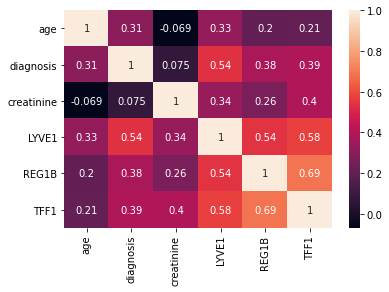

In [10]:
## Correlation Between Features
sns.heatmap(data.corr(),annot=True)

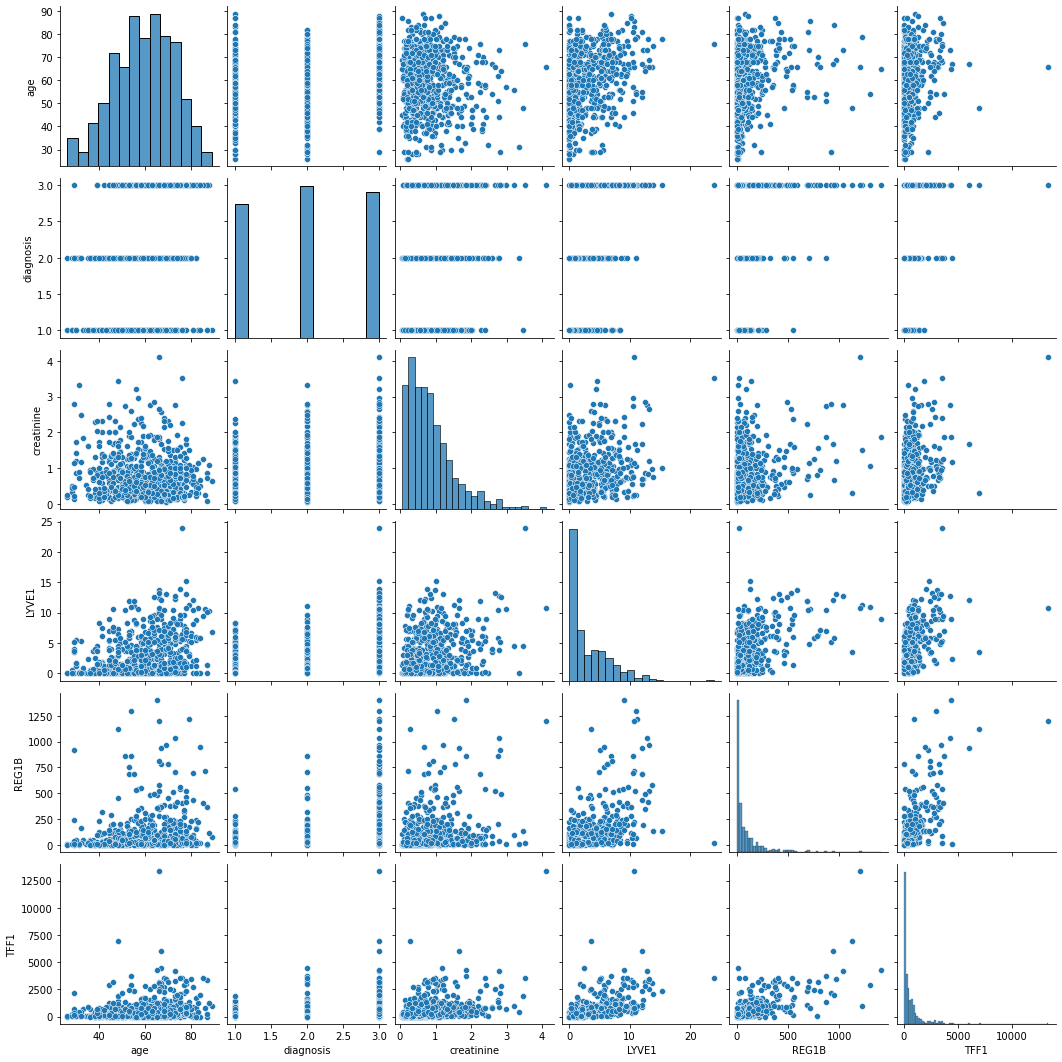

In [11]:
## Relation Between the Features
sns.pairplot(data)

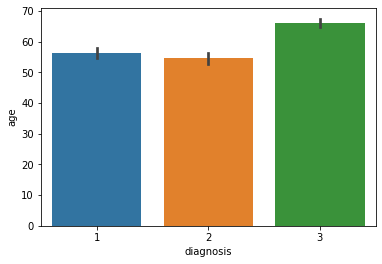

In [12]:
sns.barplot(data['diagnosis'],data['age'])

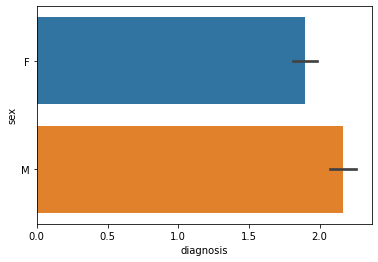

In [13]:
sns.barplot(data['diagnosis'],data['sex'])

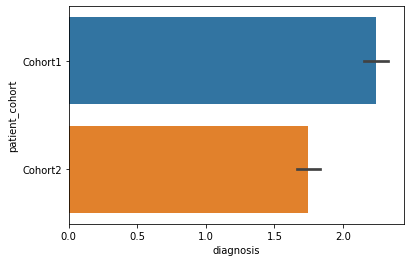

In [14]:
sns.barplot(data['diagnosis'],data['patient_cohort'])

In [15]:
## More Info About Categorical Features

display('Patient_Cohort',data['patient_cohort'].value_counts())
print('*'*100)
display('Sample_Origin',data['sample_origin'].value_counts())
print('*'*100)
display('sex',data['sex'].value_counts())

'Patient_Cohort'

Cohort1    332
Cohort2    258
Name: patient_cohort, dtype: int64

****************************************************************************************************


'Sample_Origin'

BPTB    409
LIV     132
ESP      29
UCL      20
Name: sample_origin, dtype: int64

****************************************************************************************************


'sex'

F    299
M    291
Name: sex, dtype: int64

In [16]:
## Encoding Categorical Columns
categorical_col = ['patient_cohort','sample_origin','sex']
for col in categorical_col:
    dummy = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dummy],axis=1)
    del data[col]

In [17]:
## Feature Selection 

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [18]:
X.head()

,age,creatinine,LYVE1,REG1B,TFF1,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,sex_M
0,33,1.83222,0.893219,52.94884,654.282174,1,0,1,0,0,0,1,0
1,81,0.97266,2.037585,94.46703,209.488250,1,0,1,0,0,0,1,0
2,51,0.78039,0.145589,102.36600,461.141000,0,1,1,0,0,0,0,1
3,61,0.70122,0.002805,60.57900,142.950000,0,1,1,0,0,0,0,1
4,62,0.21489,0.000860,65.54000,41.088000,0,1,1,0,0,0,0,1


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
## Feature Selection Techniques

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
ordered_rank_features = SelectKBest(score_func=chi2,k=13)
ordered_features = ordered_rank_features.fit(X,y)

In [22]:
dfscores = pd.DataFrame(ordered_features.scores_,columns=['Scores'])
dfcolumns = pd.DataFrame(X.columns)

In [23]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [24]:
features_rank.columns=['Features','Scores']
features_rank.nlargest(13,'Scores')

,Features,Scores
4,TFF1,165038.109659
3,REG1B,35696.552038
2,LYVE1,752.013105
0,age,260.691790
9,sample_origin_LIV,94.948021
7,sample_origin_BPTB,46.743395
6,patient_cohort_Cohort2,43.434171
10,sample_origin_UCL,36.730769
5,patient_cohort_Cohort1,33.753061
8,sample_origin_ESP,28.603702


In [25]:
## Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [26]:
print(model.feature_importances_)

[0.14917207 0.12818934 0.19043777 0.15299154 0.1511771  0.02744757
 0.0231331  0.07140696 0.01022259 0.04631937 0.02808695 0.01095379
 0.01046185]


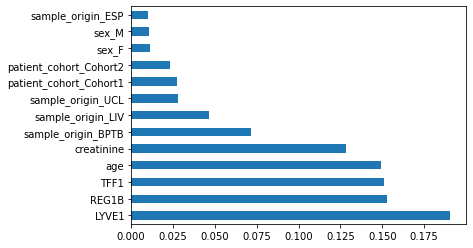

In [27]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind='barh')
plt.show()


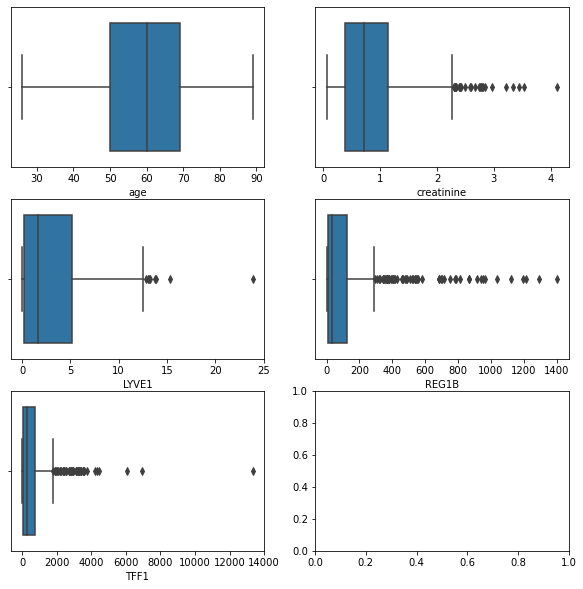

In [28]:
## Distribution of Numerical Columns

fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=3)
sns.boxplot(data['age'],ax=axes[0,0])
sns.boxplot(data['creatinine'],ax=axes[0,1])
sns.boxplot(data['LYVE1'],ax=axes[1,0])
sns.boxplot(data['REG1B'],ax=axes[1,1])
sns.boxplot(data['TFF1'],ax=axes[2,0])

In [29]:
## Scaling of Numerical Columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['age', 'creatinine', 'LYVE1','REG1B','TFF1']] = scaler.fit_transform(data[['age', 'creatinine', 'LYVE1','REG1B','TFF1']])

In [30]:
data.head()

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,sex_M
0,0.111111,1,0.437326,0.037383,0.037715,0.049030,1,0,1,0,0,0,1,0
1,0.873016,1,0.225627,0.085284,0.067288,0.015698,1,0,1,0,0,0,1,0
2,0.396825,1,0.178273,0.006089,0.072915,0.034557,0,1,1,0,0,0,0,1
3,0.555556,1,0.158774,0.000112,0.043150,0.010712,0,1,1,0,0,0,0,1
4,0.571429,1,0.038997,0.000031,0.046684,0.003079,0,1,1,0,0,0,0,1


In [31]:
data['diagnosis'].value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [33]:
## Machine Learning Classification Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [34]:
log_regression = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
xgboost_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier()
lgbm_classifier = LGBMClassifier()
rand_forest_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = svm.LinearSVC()

ml_models = [log_regression, decision_tree_classifier, xgboost_classifier, catboost_classifier, lgbm_classifier, rand_forest_classifier, knn_classifier,svm_classifier]

In [35]:
best_accuracies = 0.0;
model_dict = {0:'LogisticRegression',1:'Decision_Tree_Classifier',2:'Xgboost_Classifier',3:'CatBoost_Classifier',4:'LGBM_Classifier',5:'Random_Forest_Classifier',6:'KNN_Classifier',7:'SVM_Classifier'}

In [36]:
for models in ml_models:
    models.fit(X_train, y_train)

0:	learn: 1.0875277	total: 158ms	remaining: 2m 37s
1:	learn: 1.0766301	total: 168ms	remaining: 1m 24s
2:	learn: 1.0662149	total: 179ms	remaining: 59.4s
3:	learn: 1.0538588	total: 187ms	remaining: 46.5s
4:	learn: 1.0448524	total: 193ms	remaining: 38.5s
5:	learn: 1.0333109	total: 200ms	remaining: 33.1s
6:	learn: 1.0228027	total: 206ms	remaining: 29.2s
7:	learn: 1.0124787	total: 213ms	remaining: 26.4s
8:	learn: 1.0029469	total: 219ms	remaining: 24.1s
9:	learn: 0.9948689	total: 225ms	remaining: 22.3s
10:	learn: 0.9862791	total: 232ms	remaining: 20.8s
11:	learn: 0.9780331	total: 238ms	remaining: 19.6s
12:	learn: 0.9701069	total: 244ms	remaining: 18.6s
13:	learn: 0.9623670	total: 251ms	remaining: 17.7s
14:	learn: 0.9513784	total: 257ms	remaining: 16.9s
15:	learn: 0.9432114	total: 263ms	remaining: 16.2s
16:	learn: 0.9360884	total: 268ms	remaining: 15.5s
17:	learn: 0.9276320	total: 274ms	remaining: 14.9s
18:	learn: 0.9215995	total: 279ms	remaining: 14.4s
19:	learn: 0.9151842	total: 284ms	remai

161:	learn: 0.5392444	total: 1.01s	remaining: 5.21s
162:	learn: 0.5383173	total: 1.01s	remaining: 5.2s
163:	learn: 0.5374699	total: 1.02s	remaining: 5.18s
164:	learn: 0.5361777	total: 1.02s	remaining: 5.18s
165:	learn: 0.5355121	total: 1.02s	remaining: 5.15s
166:	learn: 0.5338574	total: 1.03s	remaining: 5.14s
167:	learn: 0.5328055	total: 1.03s	remaining: 5.12s
168:	learn: 0.5315320	total: 1.04s	remaining: 5.11s
169:	learn: 0.5300627	total: 1.04s	remaining: 5.11s
170:	learn: 0.5292072	total: 1.05s	remaining: 5.09s
171:	learn: 0.5284822	total: 1.06s	remaining: 5.08s
172:	learn: 0.5272755	total: 1.06s	remaining: 5.07s
173:	learn: 0.5261844	total: 1.07s	remaining: 5.06s
174:	learn: 0.5252124	total: 1.07s	remaining: 5.05s
175:	learn: 0.5241420	total: 1.08s	remaining: 5.04s
176:	learn: 0.5227094	total: 1.08s	remaining: 5.03s
177:	learn: 0.5216260	total: 1.09s	remaining: 5.02s
178:	learn: 0.5210247	total: 1.09s	remaining: 5.01s
179:	learn: 0.5200314	total: 1.1s	remaining: 5s
180:	learn: 0.519

346:	learn: 0.3882471	total: 2s	remaining: 3.77s
347:	learn: 0.3876106	total: 2.01s	remaining: 3.76s
348:	learn: 0.3869928	total: 2.01s	remaining: 3.75s
349:	learn: 0.3864335	total: 2.02s	remaining: 3.74s
350:	learn: 0.3857478	total: 2.02s	remaining: 3.73s
351:	learn: 0.3849072	total: 2.02s	remaining: 3.72s
352:	learn: 0.3842502	total: 2.02s	remaining: 3.71s
353:	learn: 0.3838570	total: 2.03s	remaining: 3.7s
354:	learn: 0.3832177	total: 2.03s	remaining: 3.7s
355:	learn: 0.3826753	total: 2.04s	remaining: 3.69s
356:	learn: 0.3820654	total: 2.04s	remaining: 3.68s
357:	learn: 0.3815457	total: 2.05s	remaining: 3.68s
358:	learn: 0.3810834	total: 2.06s	remaining: 3.67s
359:	learn: 0.3803395	total: 2.06s	remaining: 3.67s
360:	learn: 0.3800873	total: 2.07s	remaining: 3.66s
361:	learn: 0.3793157	total: 2.07s	remaining: 3.65s
362:	learn: 0.3790268	total: 2.08s	remaining: 3.65s
363:	learn: 0.3784725	total: 2.08s	remaining: 3.64s
364:	learn: 0.3778118	total: 2.09s	remaining: 3.63s
365:	learn: 0.377

533:	learn: 0.2998795	total: 3.01s	remaining: 2.62s
534:	learn: 0.2993657	total: 3.01s	remaining: 2.62s
535:	learn: 0.2989966	total: 3.02s	remaining: 2.61s
536:	learn: 0.2987586	total: 3.02s	remaining: 2.6s
537:	learn: 0.2984566	total: 3.02s	remaining: 2.6s
538:	learn: 0.2980676	total: 3.03s	remaining: 2.59s
539:	learn: 0.2976740	total: 3.03s	remaining: 2.58s
540:	learn: 0.2971105	total: 3.04s	remaining: 2.58s
541:	learn: 0.2965534	total: 3.04s	remaining: 2.57s
542:	learn: 0.2963364	total: 3.05s	remaining: 2.56s
543:	learn: 0.2960755	total: 3.05s	remaining: 2.56s
544:	learn: 0.2957919	total: 3.06s	remaining: 2.55s
545:	learn: 0.2955273	total: 3.06s	remaining: 2.55s
546:	learn: 0.2950644	total: 3.07s	remaining: 2.54s
547:	learn: 0.2949052	total: 3.07s	remaining: 2.54s
548:	learn: 0.2945457	total: 3.08s	remaining: 2.53s
549:	learn: 0.2944056	total: 3.08s	remaining: 2.52s
550:	learn: 0.2940149	total: 3.09s	remaining: 2.52s
551:	learn: 0.2937470	total: 3.1s	remaining: 2.51s
552:	learn: 0.2

719:	learn: 0.2420308	total: 4s	remaining: 1.55s
720:	learn: 0.2417102	total: 4s	remaining: 1.55s
721:	learn: 0.2414991	total: 4s	remaining: 1.54s
722:	learn: 0.2412448	total: 4.01s	remaining: 1.53s
723:	learn: 0.2409192	total: 4.01s	remaining: 1.53s
724:	learn: 0.2405990	total: 4.01s	remaining: 1.52s
725:	learn: 0.2403183	total: 4.02s	remaining: 1.51s
726:	learn: 0.2400592	total: 4.02s	remaining: 1.51s
727:	learn: 0.2396937	total: 4.02s	remaining: 1.5s
728:	learn: 0.2391893	total: 4.03s	remaining: 1.5s
729:	learn: 0.2390688	total: 4.03s	remaining: 1.49s
730:	learn: 0.2388674	total: 4.03s	remaining: 1.48s
731:	learn: 0.2386613	total: 4.04s	remaining: 1.48s
732:	learn: 0.2382860	total: 4.04s	remaining: 1.47s
733:	learn: 0.2379608	total: 4.04s	remaining: 1.47s
734:	learn: 0.2375971	total: 4.04s	remaining: 1.46s
735:	learn: 0.2372185	total: 4.05s	remaining: 1.45s
736:	learn: 0.2370572	total: 4.05s	remaining: 1.45s
737:	learn: 0.2368887	total: 4.05s	remaining: 1.44s
738:	learn: 0.2365094	t

885:	learn: 0.2028733	total: 4.83s	remaining: 622ms
886:	learn: 0.2026696	total: 4.84s	remaining: 616ms
887:	learn: 0.2024995	total: 4.84s	remaining: 611ms
888:	learn: 0.2022752	total: 4.84s	remaining: 605ms
889:	learn: 0.2020601	total: 4.85s	remaining: 599ms
890:	learn: 0.2018153	total: 4.85s	remaining: 593ms
891:	learn: 0.2016591	total: 4.85s	remaining: 588ms
892:	learn: 0.2014338	total: 4.86s	remaining: 582ms
893:	learn: 0.2013070	total: 4.86s	remaining: 577ms
894:	learn: 0.2011110	total: 4.87s	remaining: 571ms
895:	learn: 0.2008197	total: 4.87s	remaining: 566ms
896:	learn: 0.2005749	total: 4.88s	remaining: 560ms
897:	learn: 0.2003602	total: 4.88s	remaining: 555ms
898:	learn: 0.2002100	total: 4.89s	remaining: 550ms
899:	learn: 0.1999910	total: 4.9s	remaining: 544ms
900:	learn: 0.1997970	total: 4.9s	remaining: 539ms
901:	learn: 0.1995562	total: 4.91s	remaining: 533ms
902:	learn: 0.1994836	total: 4.91s	remaining: 528ms
903:	learn: 0.1992987	total: 4.92s	remaining: 522ms
904:	learn: 0.

In [37]:
for i, models in enumerate(ml_models):
    print( model_dict[i], models.score(X_test, y_test)) 

LogisticRegression 0.652542372881356
Decision_Tree_Classifier 0.6271186440677966
Xgboost_Classifier 0.7372881355932204
CatBoost_Classifier 0.711864406779661
LGBM_Classifier 0.6864406779661016
Random_Forest_Classifier 0.7288135593220338
KNN_Classifier 0.5338983050847458
SVM_Classifier 0.3898305084745763


In [38]:
## Model Accuracy Using Cross Validation Score
from sklearn.model_selection import cross_val_score
for i, models in enumerate(ml_models):
    print(model_dict[i], cross_val_score(models,X,y,cv=10).mean())


LogisticRegression 0.5728813559322034
Decision_Tree_Classifier 0.576271186440678
Xgboost_Classifier 0.6372881355932203
0:	learn: 1.0876043	total: 6.81ms	remaining: 6.8s
1:	learn: 1.0759927	total: 12.7ms	remaining: 6.33s
2:	learn: 1.0641787	total: 18.1ms	remaining: 6.03s
3:	learn: 1.0509107	total: 23.9ms	remaining: 5.94s
4:	learn: 1.0395675	total: 29.6ms	remaining: 5.89s
5:	learn: 1.0301535	total: 35.2ms	remaining: 5.82s
6:	learn: 1.0209730	total: 40.7ms	remaining: 5.77s
7:	learn: 1.0085156	total: 46.3ms	remaining: 5.74s
8:	learn: 0.9979446	total: 51.9ms	remaining: 5.72s
9:	learn: 0.9890929	total: 58ms	remaining: 5.74s
10:	learn: 0.9795140	total: 64.7ms	remaining: 5.82s
11:	learn: 0.9693943	total: 70.6ms	remaining: 5.81s
12:	learn: 0.9616731	total: 77ms	remaining: 5.85s
13:	learn: 0.9531314	total: 82.5ms	remaining: 5.81s
14:	learn: 0.9438409	total: 87.6ms	remaining: 5.75s
15:	learn: 0.9367082	total: 92.1ms	remaining: 5.67s
16:	learn: 0.9293156	total: 96.6ms	remaining: 5.59s
17:	learn: 0

158:	learn: 0.5395907	total: 726ms	remaining: 3.84s
159:	learn: 0.5385833	total: 730ms	remaining: 3.83s
160:	learn: 0.5370651	total: 733ms	remaining: 3.82s
161:	learn: 0.5359452	total: 736ms	remaining: 3.81s
162:	learn: 0.5352363	total: 739ms	remaining: 3.8s
163:	learn: 0.5338890	total: 742ms	remaining: 3.78s
164:	learn: 0.5325253	total: 746ms	remaining: 3.78s
165:	learn: 0.5317311	total: 750ms	remaining: 3.77s
166:	learn: 0.5308017	total: 754ms	remaining: 3.76s
167:	learn: 0.5293524	total: 758ms	remaining: 3.75s
168:	learn: 0.5281618	total: 764ms	remaining: 3.76s
169:	learn: 0.5274188	total: 770ms	remaining: 3.76s
170:	learn: 0.5261540	total: 775ms	remaining: 3.76s
171:	learn: 0.5255064	total: 780ms	remaining: 3.76s
172:	learn: 0.5239789	total: 786ms	remaining: 3.76s
173:	learn: 0.5229591	total: 792ms	remaining: 3.76s
174:	learn: 0.5219267	total: 798ms	remaining: 3.76s
175:	learn: 0.5209314	total: 803ms	remaining: 3.76s
176:	learn: 0.5202061	total: 809ms	remaining: 3.76s
177:	learn: 0

331:	learn: 0.4069890	total: 1.56s	remaining: 3.13s
332:	learn: 0.4063774	total: 1.56s	remaining: 3.13s
333:	learn: 0.4059625	total: 1.56s	remaining: 3.12s
334:	learn: 0.4055891	total: 1.57s	remaining: 3.11s
335:	learn: 0.4051950	total: 1.57s	remaining: 3.1s
336:	learn: 0.4045042	total: 1.57s	remaining: 3.1s
337:	learn: 0.4040353	total: 1.58s	remaining: 3.09s
338:	learn: 0.4033231	total: 1.58s	remaining: 3.08s
339:	learn: 0.4025720	total: 1.58s	remaining: 3.08s
340:	learn: 0.4021171	total: 1.59s	remaining: 3.07s
341:	learn: 0.4017752	total: 1.59s	remaining: 3.06s
342:	learn: 0.4012697	total: 1.6s	remaining: 3.06s
343:	learn: 0.4010177	total: 1.6s	remaining: 3.05s
344:	learn: 0.4007309	total: 1.6s	remaining: 3.04s
345:	learn: 0.4001146	total: 1.61s	remaining: 3.04s
346:	learn: 0.3995900	total: 1.61s	remaining: 3.03s
347:	learn: 0.3991546	total: 1.61s	remaining: 3.03s
348:	learn: 0.3985167	total: 1.62s	remaining: 3.02s
349:	learn: 0.3977102	total: 1.62s	remaining: 3.01s
350:	learn: 0.396

503:	learn: 0.3235696	total: 2.21s	remaining: 2.17s
504:	learn: 0.3232718	total: 2.21s	remaining: 2.17s
505:	learn: 0.3230009	total: 2.21s	remaining: 2.16s
506:	learn: 0.3224685	total: 2.22s	remaining: 2.15s
507:	learn: 0.3220434	total: 2.22s	remaining: 2.15s
508:	learn: 0.3216270	total: 2.22s	remaining: 2.15s
509:	learn: 0.3212624	total: 2.23s	remaining: 2.14s
510:	learn: 0.3208462	total: 2.23s	remaining: 2.13s
511:	learn: 0.3205123	total: 2.23s	remaining: 2.13s
512:	learn: 0.3199732	total: 2.24s	remaining: 2.12s
513:	learn: 0.3194540	total: 2.24s	remaining: 2.12s
514:	learn: 0.3191659	total: 2.25s	remaining: 2.12s
515:	learn: 0.3189861	total: 2.25s	remaining: 2.11s
516:	learn: 0.3185424	total: 2.26s	remaining: 2.11s
517:	learn: 0.3183108	total: 2.26s	remaining: 2.1s
518:	learn: 0.3179432	total: 2.27s	remaining: 2.1s
519:	learn: 0.3176159	total: 2.27s	remaining: 2.1s
520:	learn: 0.3171129	total: 2.27s	remaining: 2.09s
521:	learn: 0.3169781	total: 2.28s	remaining: 2.08s
522:	learn: 0.3

678:	learn: 0.2655087	total: 3.03s	remaining: 1.43s
679:	learn: 0.2651400	total: 3.03s	remaining: 1.43s
680:	learn: 0.2649531	total: 3.04s	remaining: 1.42s
681:	learn: 0.2646884	total: 3.04s	remaining: 1.42s
682:	learn: 0.2644539	total: 3.05s	remaining: 1.42s
683:	learn: 0.2641534	total: 3.05s	remaining: 1.41s
684:	learn: 0.2637422	total: 3.06s	remaining: 1.41s
685:	learn: 0.2634075	total: 3.06s	remaining: 1.4s
686:	learn: 0.2632175	total: 3.06s	remaining: 1.4s
687:	learn: 0.2630319	total: 3.07s	remaining: 1.39s
688:	learn: 0.2626895	total: 3.07s	remaining: 1.39s
689:	learn: 0.2625501	total: 3.08s	remaining: 1.38s
690:	learn: 0.2622510	total: 3.08s	remaining: 1.38s
691:	learn: 0.2619933	total: 3.08s	remaining: 1.37s
692:	learn: 0.2617535	total: 3.09s	remaining: 1.37s
693:	learn: 0.2612532	total: 3.09s	remaining: 1.36s
694:	learn: 0.2610375	total: 3.09s	remaining: 1.36s
695:	learn: 0.2605893	total: 3.1s	remaining: 1.35s
696:	learn: 0.2604729	total: 3.1s	remaining: 1.35s
697:	learn: 0.26

847:	learn: 0.2231522	total: 3.86s	remaining: 691ms
848:	learn: 0.2228936	total: 3.86s	remaining: 687ms
849:	learn: 0.2227705	total: 3.87s	remaining: 682ms
850:	learn: 0.2226097	total: 3.87s	remaining: 678ms
851:	learn: 0.2223616	total: 3.87s	remaining: 673ms
852:	learn: 0.2220368	total: 3.88s	remaining: 668ms
853:	learn: 0.2216428	total: 3.88s	remaining: 663ms
854:	learn: 0.2213555	total: 3.88s	remaining: 659ms
855:	learn: 0.2210414	total: 3.89s	remaining: 654ms
856:	learn: 0.2207874	total: 3.89s	remaining: 649ms
857:	learn: 0.2206778	total: 3.89s	remaining: 644ms
858:	learn: 0.2204859	total: 3.9s	remaining: 640ms
859:	learn: 0.2202471	total: 3.9s	remaining: 635ms
860:	learn: 0.2200656	total: 3.9s	remaining: 630ms
861:	learn: 0.2198408	total: 3.91s	remaining: 626ms
862:	learn: 0.2197306	total: 3.91s	remaining: 621ms
863:	learn: 0.2195753	total: 3.92s	remaining: 617ms
864:	learn: 0.2193505	total: 3.92s	remaining: 612ms
865:	learn: 0.2191363	total: 3.92s	remaining: 607ms
866:	learn: 0.2

29:	learn: 0.8471588	total: 168ms	remaining: 5.42s
30:	learn: 0.8425019	total: 172ms	remaining: 5.37s
31:	learn: 0.8382467	total: 176ms	remaining: 5.32s
32:	learn: 0.8334337	total: 179ms	remaining: 5.25s
33:	learn: 0.8292451	total: 183ms	remaining: 5.19s
34:	learn: 0.8242351	total: 186ms	remaining: 5.12s
35:	learn: 0.8192139	total: 190ms	remaining: 5.1s
36:	learn: 0.8149628	total: 195ms	remaining: 5.07s
37:	learn: 0.8109116	total: 200ms	remaining: 5.06s
38:	learn: 0.8066504	total: 206ms	remaining: 5.07s
39:	learn: 0.8024347	total: 212ms	remaining: 5.08s
40:	learn: 0.7988874	total: 217ms	remaining: 5.08s
41:	learn: 0.7938530	total: 223ms	remaining: 5.08s
42:	learn: 0.7903182	total: 228ms	remaining: 5.08s
43:	learn: 0.7851106	total: 234ms	remaining: 5.07s
44:	learn: 0.7809835	total: 239ms	remaining: 5.08s
45:	learn: 0.7773703	total: 245ms	remaining: 5.08s
46:	learn: 0.7731059	total: 251ms	remaining: 5.08s
47:	learn: 0.7692022	total: 256ms	remaining: 5.09s
48:	learn: 0.7659400	total: 262m

191:	learn: 0.5120610	total: 986ms	remaining: 4.15s
192:	learn: 0.5113798	total: 991ms	remaining: 4.14s
193:	learn: 0.5102182	total: 996ms	remaining: 4.14s
194:	learn: 0.5094141	total: 1s	remaining: 4.13s
195:	learn: 0.5083365	total: 1s	remaining: 4.13s
196:	learn: 0.5071608	total: 1.01s	remaining: 4.12s
197:	learn: 0.5063165	total: 1.01s	remaining: 4.11s
198:	learn: 0.5053436	total: 1.02s	remaining: 4.09s
199:	learn: 0.5044797	total: 1.02s	remaining: 4.08s
200:	learn: 0.5037438	total: 1.02s	remaining: 4.08s
201:	learn: 0.5029057	total: 1.03s	remaining: 4.07s
202:	learn: 0.5019460	total: 1.03s	remaining: 4.06s
203:	learn: 0.5010570	total: 1.04s	remaining: 4.05s
204:	learn: 0.5002008	total: 1.04s	remaining: 4.04s
205:	learn: 0.4992363	total: 1.04s	remaining: 4.03s
206:	learn: 0.4984265	total: 1.05s	remaining: 4.02s
207:	learn: 0.4971933	total: 1.05s	remaining: 4.01s
208:	learn: 0.4962139	total: 1.06s	remaining: 4s
209:	learn: 0.4954282	total: 1.06s	remaining: 4s
210:	learn: 0.4945476	to

363:	learn: 0.3845493	total: 1.83s	remaining: 3.19s
364:	learn: 0.3840015	total: 1.83s	remaining: 3.19s
365:	learn: 0.3835346	total: 1.83s	remaining: 3.18s
366:	learn: 0.3830239	total: 1.84s	remaining: 3.17s
367:	learn: 0.3827719	total: 1.84s	remaining: 3.16s
368:	learn: 0.3821307	total: 1.84s	remaining: 3.15s
369:	learn: 0.3816196	total: 1.85s	remaining: 3.14s
370:	learn: 0.3811462	total: 1.85s	remaining: 3.14s
371:	learn: 0.3807176	total: 1.86s	remaining: 3.13s
372:	learn: 0.3801933	total: 1.86s	remaining: 3.13s
373:	learn: 0.3793258	total: 1.87s	remaining: 3.13s
374:	learn: 0.3789854	total: 1.87s	remaining: 3.12s
375:	learn: 0.3783699	total: 1.88s	remaining: 3.12s
376:	learn: 0.3777056	total: 1.88s	remaining: 3.11s
377:	learn: 0.3771419	total: 1.89s	remaining: 3.11s
378:	learn: 0.3765833	total: 1.89s	remaining: 3.1s
379:	learn: 0.3760589	total: 1.9s	remaining: 3.1s
380:	learn: 0.3754133	total: 1.91s	remaining: 3.1s
381:	learn: 0.3746653	total: 1.91s	remaining: 3.09s
382:	learn: 0.37

549:	learn: 0.2996378	total: 2.83s	remaining: 2.32s
550:	learn: 0.2991944	total: 2.83s	remaining: 2.31s
551:	learn: 0.2989052	total: 2.84s	remaining: 2.3s
552:	learn: 0.2986516	total: 2.84s	remaining: 2.3s
553:	learn: 0.2983572	total: 2.85s	remaining: 2.29s
554:	learn: 0.2981012	total: 2.85s	remaining: 2.29s
555:	learn: 0.2976886	total: 2.86s	remaining: 2.28s
556:	learn: 0.2973159	total: 2.86s	remaining: 2.28s
557:	learn: 0.2969729	total: 2.87s	remaining: 2.27s
558:	learn: 0.2967932	total: 2.88s	remaining: 2.27s
559:	learn: 0.2965156	total: 2.88s	remaining: 2.26s
560:	learn: 0.2962293	total: 2.89s	remaining: 2.26s
561:	learn: 0.2958498	total: 2.89s	remaining: 2.25s
562:	learn: 0.2954634	total: 2.9s	remaining: 2.25s
563:	learn: 0.2951193	total: 2.9s	remaining: 2.25s
564:	learn: 0.2949646	total: 2.91s	remaining: 2.24s
565:	learn: 0.2947148	total: 2.92s	remaining: 2.24s
566:	learn: 0.2943065	total: 2.92s	remaining: 2.23s
567:	learn: 0.2940443	total: 2.93s	remaining: 2.23s
568:	learn: 0.29

734:	learn: 0.2423993	total: 3.83s	remaining: 1.38s
735:	learn: 0.2420805	total: 3.83s	remaining: 1.37s
736:	learn: 0.2416887	total: 3.83s	remaining: 1.37s
737:	learn: 0.2414303	total: 3.84s	remaining: 1.36s
738:	learn: 0.2411610	total: 3.84s	remaining: 1.36s
739:	learn: 0.2407117	total: 3.84s	remaining: 1.35s
740:	learn: 0.2404550	total: 3.85s	remaining: 1.34s
741:	learn: 0.2401595	total: 3.85s	remaining: 1.34s
742:	learn: 0.2398496	total: 3.85s	remaining: 1.33s
743:	learn: 0.2396542	total: 3.86s	remaining: 1.33s
744:	learn: 0.2393779	total: 3.87s	remaining: 1.32s
745:	learn: 0.2391156	total: 3.87s	remaining: 1.32s
746:	learn: 0.2387828	total: 3.88s	remaining: 1.31s
747:	learn: 0.2385879	total: 3.88s	remaining: 1.31s
748:	learn: 0.2382300	total: 3.89s	remaining: 1.3s
749:	learn: 0.2380740	total: 3.89s	remaining: 1.3s
750:	learn: 0.2379137	total: 3.9s	remaining: 1.29s
751:	learn: 0.2377890	total: 3.9s	remaining: 1.29s
752:	learn: 0.2374765	total: 3.91s	remaining: 1.28s
753:	learn: 0.23

898:	learn: 0.2054091	total: 4.66s	remaining: 523ms
899:	learn: 0.2052424	total: 4.66s	remaining: 518ms
900:	learn: 0.2051149	total: 4.67s	remaining: 513ms
901:	learn: 0.2049652	total: 4.67s	remaining: 508ms
902:	learn: 0.2045928	total: 4.68s	remaining: 503ms
903:	learn: 0.2044815	total: 4.68s	remaining: 497ms
904:	learn: 0.2043347	total: 4.69s	remaining: 492ms
905:	learn: 0.2040784	total: 4.69s	remaining: 487ms
906:	learn: 0.2039659	total: 4.7s	remaining: 482ms
907:	learn: 0.2038082	total: 4.7s	remaining: 477ms
908:	learn: 0.2036011	total: 4.71s	remaining: 471ms
909:	learn: 0.2033898	total: 4.71s	remaining: 466ms
910:	learn: 0.2031881	total: 4.72s	remaining: 461ms
911:	learn: 0.2030660	total: 4.72s	remaining: 456ms
912:	learn: 0.2029258	total: 4.73s	remaining: 451ms
913:	learn: 0.2027289	total: 4.74s	remaining: 446ms
914:	learn: 0.2025724	total: 4.74s	remaining: 441ms
915:	learn: 0.2024188	total: 4.75s	remaining: 435ms
916:	learn: 0.2021863	total: 4.75s	remaining: 430ms
917:	learn: 0.

86:	learn: 0.6588257	total: 518ms	remaining: 5.43s
87:	learn: 0.6558864	total: 523ms	remaining: 5.42s
88:	learn: 0.6531275	total: 526ms	remaining: 5.39s
89:	learn: 0.6503897	total: 530ms	remaining: 5.36s
90:	learn: 0.6485102	total: 533ms	remaining: 5.33s
91:	learn: 0.6467020	total: 537ms	remaining: 5.3s
92:	learn: 0.6447668	total: 541ms	remaining: 5.27s
93:	learn: 0.6429408	total: 544ms	remaining: 5.25s
94:	learn: 0.6412621	total: 549ms	remaining: 5.23s
95:	learn: 0.6388356	total: 554ms	remaining: 5.22s
96:	learn: 0.6374623	total: 560ms	remaining: 5.22s
97:	learn: 0.6350575	total: 565ms	remaining: 5.2s
98:	learn: 0.6326286	total: 571ms	remaining: 5.19s
99:	learn: 0.6308349	total: 577ms	remaining: 5.2s
100:	learn: 0.6298827	total: 583ms	remaining: 5.19s
101:	learn: 0.6272928	total: 589ms	remaining: 5.18s
102:	learn: 0.6252791	total: 595ms	remaining: 5.18s
103:	learn: 0.6239283	total: 601ms	remaining: 5.17s
104:	learn: 0.6222338	total: 606ms	remaining: 5.17s
105:	learn: 0.6209097	total: 

276:	learn: 0.4401846	total: 1.51s	remaining: 3.93s
277:	learn: 0.4397737	total: 1.51s	remaining: 3.93s
278:	learn: 0.4388909	total: 1.52s	remaining: 3.92s
279:	learn: 0.4382939	total: 1.52s	remaining: 3.92s
280:	learn: 0.4378042	total: 1.53s	remaining: 3.91s
281:	learn: 0.4371319	total: 1.53s	remaining: 3.9s
282:	learn: 0.4361062	total: 1.54s	remaining: 3.9s
283:	learn: 0.4352828	total: 1.54s	remaining: 3.9s
284:	learn: 0.4342800	total: 1.55s	remaining: 3.89s
285:	learn: 0.4335960	total: 1.55s	remaining: 3.88s
286:	learn: 0.4327081	total: 1.56s	remaining: 3.88s
287:	learn: 0.4321514	total: 1.57s	remaining: 3.87s
288:	learn: 0.4313997	total: 1.57s	remaining: 3.87s
289:	learn: 0.4305664	total: 1.58s	remaining: 3.86s
290:	learn: 0.4300494	total: 1.58s	remaining: 3.86s
291:	learn: 0.4294865	total: 1.59s	remaining: 3.85s
292:	learn: 0.4285802	total: 1.59s	remaining: 3.85s
293:	learn: 0.4277705	total: 1.6s	remaining: 3.84s
294:	learn: 0.4271264	total: 1.61s	remaining: 3.84s
295:	learn: 0.42

458:	learn: 0.3382507	total: 2.51s	remaining: 2.96s
459:	learn: 0.3375924	total: 2.52s	remaining: 2.95s
460:	learn: 0.3370547	total: 2.52s	remaining: 2.95s
461:	learn: 0.3364821	total: 2.53s	remaining: 2.94s
462:	learn: 0.3361882	total: 2.53s	remaining: 2.94s
463:	learn: 0.3358308	total: 2.54s	remaining: 2.93s
464:	learn: 0.3355684	total: 2.54s	remaining: 2.93s
465:	learn: 0.3351364	total: 2.55s	remaining: 2.92s
466:	learn: 0.3348657	total: 2.55s	remaining: 2.92s
467:	learn: 0.3344429	total: 2.56s	remaining: 2.91s
468:	learn: 0.3339703	total: 2.57s	remaining: 2.9s
469:	learn: 0.3335876	total: 2.57s	remaining: 2.9s
470:	learn: 0.3331666	total: 2.58s	remaining: 2.9s
471:	learn: 0.3326247	total: 2.58s	remaining: 2.89s
472:	learn: 0.3319370	total: 2.59s	remaining: 2.88s
473:	learn: 0.3314433	total: 2.59s	remaining: 2.88s
474:	learn: 0.3310850	total: 2.6s	remaining: 2.87s
475:	learn: 0.3307301	total: 2.6s	remaining: 2.87s
476:	learn: 0.3302800	total: 2.61s	remaining: 2.86s
477:	learn: 0.329

648:	learn: 0.2681615	total: 3.5s	remaining: 1.89s
649:	learn: 0.2677251	total: 3.51s	remaining: 1.89s
650:	learn: 0.2673943	total: 3.51s	remaining: 1.88s
651:	learn: 0.2672092	total: 3.52s	remaining: 1.88s
652:	learn: 0.2667889	total: 3.52s	remaining: 1.87s
653:	learn: 0.2664203	total: 3.52s	remaining: 1.86s
654:	learn: 0.2659523	total: 3.52s	remaining: 1.86s
655:	learn: 0.2656010	total: 3.53s	remaining: 1.85s
656:	learn: 0.2653951	total: 3.54s	remaining: 1.84s
657:	learn: 0.2651521	total: 3.54s	remaining: 1.84s
658:	learn: 0.2649850	total: 3.55s	remaining: 1.83s
659:	learn: 0.2647945	total: 3.55s	remaining: 1.83s
660:	learn: 0.2644385	total: 3.56s	remaining: 1.82s
661:	learn: 0.2638832	total: 3.56s	remaining: 1.82s
662:	learn: 0.2637242	total: 3.57s	remaining: 1.81s
663:	learn: 0.2634313	total: 3.57s	remaining: 1.81s
664:	learn: 0.2631346	total: 3.58s	remaining: 1.8s
665:	learn: 0.2628366	total: 3.58s	remaining: 1.8s
666:	learn: 0.2626811	total: 3.59s	remaining: 1.79s
667:	learn: 0.2

837:	learn: 0.2191563	total: 4.5s	remaining: 870ms
838:	learn: 0.2189604	total: 4.5s	remaining: 864ms
839:	learn: 0.2188038	total: 4.51s	remaining: 858ms
840:	learn: 0.2186368	total: 4.51s	remaining: 853ms
841:	learn: 0.2184048	total: 4.52s	remaining: 848ms
842:	learn: 0.2182202	total: 4.52s	remaining: 842ms
843:	learn: 0.2179422	total: 4.52s	remaining: 836ms
844:	learn: 0.2177952	total: 4.53s	remaining: 831ms
845:	learn: 0.2175907	total: 4.53s	remaining: 825ms
846:	learn: 0.2174155	total: 4.54s	remaining: 820ms
847:	learn: 0.2172037	total: 4.54s	remaining: 815ms
848:	learn: 0.2170131	total: 4.55s	remaining: 809ms
849:	learn: 0.2168546	total: 4.56s	remaining: 804ms
850:	learn: 0.2166205	total: 4.56s	remaining: 799ms
851:	learn: 0.2164494	total: 4.57s	remaining: 793ms
852:	learn: 0.2161777	total: 4.57s	remaining: 788ms
853:	learn: 0.2158956	total: 4.58s	remaining: 783ms
854:	learn: 0.2157205	total: 4.58s	remaining: 778ms
855:	learn: 0.2154440	total: 4.59s	remaining: 772ms
856:	learn: 0.

0:	learn: 1.0858625	total: 11.5ms	remaining: 11.5s
1:	learn: 1.0738781	total: 21.3ms	remaining: 10.6s
2:	learn: 1.0639919	total: 29.2ms	remaining: 9.69s
3:	learn: 1.0547329	total: 35ms	remaining: 8.71s
4:	learn: 1.0459944	total: 41.1ms	remaining: 8.18s
5:	learn: 1.0365319	total: 47.1ms	remaining: 7.8s
6:	learn: 1.0280185	total: 53ms	remaining: 7.52s
7:	learn: 1.0169451	total: 58.6ms	remaining: 7.27s
8:	learn: 1.0067416	total: 64.1ms	remaining: 7.05s
9:	learn: 0.9980571	total: 70.2ms	remaining: 6.95s
10:	learn: 0.9902972	total: 75.1ms	remaining: 6.75s
11:	learn: 0.9800729	total: 78.7ms	remaining: 6.48s
12:	learn: 0.9720225	total: 84.2ms	remaining: 6.39s
13:	learn: 0.9630434	total: 90.3ms	remaining: 6.36s
14:	learn: 0.9536060	total: 95.8ms	remaining: 6.29s
15:	learn: 0.9449097	total: 101ms	remaining: 6.22s
16:	learn: 0.9383646	total: 107ms	remaining: 6.17s
17:	learn: 0.9308703	total: 112ms	remaining: 6.13s
18:	learn: 0.9251528	total: 118ms	remaining: 6.08s
19:	learn: 0.9185095	total: 123

176:	learn: 0.5347329	total: 1.02s	remaining: 4.75s
177:	learn: 0.5335867	total: 1.03s	remaining: 4.74s
178:	learn: 0.5321374	total: 1.03s	remaining: 4.73s
179:	learn: 0.5305682	total: 1.03s	remaining: 4.71s
180:	learn: 0.5295827	total: 1.04s	remaining: 4.7s
181:	learn: 0.5283463	total: 1.04s	remaining: 4.68s
182:	learn: 0.5277573	total: 1.04s	remaining: 4.65s
183:	learn: 0.5265657	total: 1.04s	remaining: 4.64s
184:	learn: 0.5258625	total: 1.05s	remaining: 4.63s
185:	learn: 0.5251684	total: 1.05s	remaining: 4.62s
186:	learn: 0.5244641	total: 1.06s	remaining: 4.61s
187:	learn: 0.5234027	total: 1.06s	remaining: 4.6s
188:	learn: 0.5225120	total: 1.07s	remaining: 4.6s
189:	learn: 0.5218980	total: 1.08s	remaining: 4.59s
190:	learn: 0.5206085	total: 1.08s	remaining: 4.58s
191:	learn: 0.5198077	total: 1.09s	remaining: 4.57s
192:	learn: 0.5192405	total: 1.09s	remaining: 4.57s
193:	learn: 0.5185201	total: 1.1s	remaining: 4.56s
194:	learn: 0.5177224	total: 1.1s	remaining: 4.55s
195:	learn: 0.516

365:	learn: 0.3939968	total: 2.02s	remaining: 3.51s
366:	learn: 0.3935142	total: 2.03s	remaining: 3.5s
367:	learn: 0.3929865	total: 2.03s	remaining: 3.49s
368:	learn: 0.3926506	total: 2.04s	remaining: 3.48s
369:	learn: 0.3921482	total: 2.04s	remaining: 3.48s
370:	learn: 0.3915734	total: 2.05s	remaining: 3.47s
371:	learn: 0.3910235	total: 2.05s	remaining: 3.46s
372:	learn: 0.3902468	total: 2.06s	remaining: 3.46s
373:	learn: 0.3896956	total: 2.06s	remaining: 3.45s
374:	learn: 0.3888813	total: 2.07s	remaining: 3.45s
375:	learn: 0.3883676	total: 2.07s	remaining: 3.44s
376:	learn: 0.3878569	total: 2.08s	remaining: 3.44s
377:	learn: 0.3870455	total: 2.08s	remaining: 3.43s
378:	learn: 0.3864635	total: 2.09s	remaining: 3.43s
379:	learn: 0.3857905	total: 2.1s	remaining: 3.42s
380:	learn: 0.3851357	total: 2.1s	remaining: 3.42s
381:	learn: 0.3844624	total: 2.11s	remaining: 3.41s
382:	learn: 0.3840254	total: 2.11s	remaining: 3.41s
383:	learn: 0.3837535	total: 2.12s	remaining: 3.4s
384:	learn: 0.38

532:	learn: 0.3195306	total: 2.84s	remaining: 2.49s
533:	learn: 0.3190991	total: 2.85s	remaining: 2.48s
534:	learn: 0.3188656	total: 2.85s	remaining: 2.48s
535:	learn: 0.3187051	total: 2.85s	remaining: 2.47s
536:	learn: 0.3183231	total: 2.86s	remaining: 2.46s
537:	learn: 0.3178790	total: 2.86s	remaining: 2.46s
538:	learn: 0.3175026	total: 2.86s	remaining: 2.45s
539:	learn: 0.3172721	total: 2.87s	remaining: 2.44s
540:	learn: 0.3169111	total: 2.87s	remaining: 2.44s
541:	learn: 0.3165963	total: 2.88s	remaining: 2.43s
542:	learn: 0.3162897	total: 2.88s	remaining: 2.42s
543:	learn: 0.3156483	total: 2.88s	remaining: 2.42s
544:	learn: 0.3153652	total: 2.89s	remaining: 2.41s
545:	learn: 0.3150036	total: 2.89s	remaining: 2.4s
546:	learn: 0.3147859	total: 2.9s	remaining: 2.4s
547:	learn: 0.3143144	total: 2.9s	remaining: 2.39s
548:	learn: 0.3138467	total: 2.9s	remaining: 2.38s
549:	learn: 0.3135183	total: 2.91s	remaining: 2.38s
550:	learn: 0.3132829	total: 2.91s	remaining: 2.37s
551:	learn: 0.313

711:	learn: 0.2600818	total: 3.67s	remaining: 1.49s
712:	learn: 0.2596251	total: 3.68s	remaining: 1.48s
713:	learn: 0.2594120	total: 3.68s	remaining: 1.48s
714:	learn: 0.2591703	total: 3.69s	remaining: 1.47s
715:	learn: 0.2588851	total: 3.7s	remaining: 1.47s
716:	learn: 0.2585982	total: 3.7s	remaining: 1.46s
717:	learn: 0.2583510	total: 3.71s	remaining: 1.46s
718:	learn: 0.2579076	total: 3.71s	remaining: 1.45s
719:	learn: 0.2576312	total: 3.72s	remaining: 1.45s
720:	learn: 0.2572998	total: 3.73s	remaining: 1.44s
721:	learn: 0.2570141	total: 3.73s	remaining: 1.44s
722:	learn: 0.2567017	total: 3.74s	remaining: 1.43s
723:	learn: 0.2565610	total: 3.74s	remaining: 1.43s
724:	learn: 0.2563088	total: 3.75s	remaining: 1.42s
725:	learn: 0.2561769	total: 3.75s	remaining: 1.42s
726:	learn: 0.2559399	total: 3.76s	remaining: 1.41s
727:	learn: 0.2556751	total: 3.77s	remaining: 1.41s
728:	learn: 0.2554755	total: 3.77s	remaining: 1.4s
729:	learn: 0.2552940	total: 3.78s	remaining: 1.4s
730:	learn: 0.25

887:	learn: 0.2191093	total: 4.49s	remaining: 567ms
888:	learn: 0.2189605	total: 4.5s	remaining: 562ms
889:	learn: 0.2188423	total: 4.5s	remaining: 556ms
890:	learn: 0.2186679	total: 4.51s	remaining: 551ms
891:	learn: 0.2183974	total: 4.51s	remaining: 546ms
892:	learn: 0.2182610	total: 4.51s	remaining: 541ms
893:	learn: 0.2180347	total: 4.52s	remaining: 536ms
894:	learn: 0.2177671	total: 4.52s	remaining: 531ms
895:	learn: 0.2176310	total: 4.53s	remaining: 526ms
896:	learn: 0.2174562	total: 4.53s	remaining: 521ms
897:	learn: 0.2172563	total: 4.54s	remaining: 515ms
898:	learn: 0.2170226	total: 4.54s	remaining: 510ms
899:	learn: 0.2168678	total: 4.55s	remaining: 505ms
900:	learn: 0.2166641	total: 4.55s	remaining: 500ms
901:	learn: 0.2164157	total: 4.55s	remaining: 495ms
902:	learn: 0.2161886	total: 4.56s	remaining: 490ms
903:	learn: 0.2160188	total: 4.56s	remaining: 485ms
904:	learn: 0.2156276	total: 4.57s	remaining: 480ms
905:	learn: 0.2154201	total: 4.57s	remaining: 475ms
906:	learn: 0.

66:	learn: 0.6723594	total: 337ms	remaining: 4.69s
67:	learn: 0.6700393	total: 341ms	remaining: 4.67s
68:	learn: 0.6679404	total: 346ms	remaining: 4.66s
69:	learn: 0.6647640	total: 351ms	remaining: 4.66s
70:	learn: 0.6625995	total: 355ms	remaining: 4.64s
71:	learn: 0.6597271	total: 359ms	remaining: 4.63s
72:	learn: 0.6577099	total: 365ms	remaining: 4.64s
73:	learn: 0.6553401	total: 370ms	remaining: 4.63s
74:	learn: 0.6522855	total: 374ms	remaining: 4.62s
75:	learn: 0.6494284	total: 383ms	remaining: 4.66s
76:	learn: 0.6467305	total: 389ms	remaining: 4.66s
77:	learn: 0.6433440	total: 393ms	remaining: 4.64s
78:	learn: 0.6408120	total: 399ms	remaining: 4.65s
79:	learn: 0.6388802	total: 402ms	remaining: 4.63s
80:	learn: 0.6370959	total: 408ms	remaining: 4.63s
81:	learn: 0.6344802	total: 413ms	remaining: 4.63s
82:	learn: 0.6320594	total: 419ms	remaining: 4.63s
83:	learn: 0.6292626	total: 424ms	remaining: 4.63s
84:	learn: 0.6271444	total: 430ms	remaining: 4.63s
85:	learn: 0.6257197	total: 437

229:	learn: 0.4578204	total: 1.15s	remaining: 3.85s
230:	learn: 0.4571465	total: 1.15s	remaining: 3.84s
231:	learn: 0.4563107	total: 1.16s	remaining: 3.83s
232:	learn: 0.4551950	total: 1.16s	remaining: 3.82s
233:	learn: 0.4544012	total: 1.16s	remaining: 3.81s
234:	learn: 0.4538562	total: 1.17s	remaining: 3.8s
235:	learn: 0.4528146	total: 1.17s	remaining: 3.79s
236:	learn: 0.4522226	total: 1.17s	remaining: 3.78s
237:	learn: 0.4515049	total: 1.18s	remaining: 3.77s
238:	learn: 0.4510426	total: 1.18s	remaining: 3.77s
239:	learn: 0.4502946	total: 1.19s	remaining: 3.76s
240:	learn: 0.4494795	total: 1.2s	remaining: 3.77s
241:	learn: 0.4489296	total: 1.2s	remaining: 3.77s
242:	learn: 0.4482994	total: 1.21s	remaining: 3.76s
243:	learn: 0.4477604	total: 1.21s	remaining: 3.76s
244:	learn: 0.4473198	total: 1.22s	remaining: 3.75s
245:	learn: 0.4468101	total: 1.22s	remaining: 3.75s
246:	learn: 0.4457731	total: 1.23s	remaining: 3.74s
247:	learn: 0.4453439	total: 1.24s	remaining: 3.75s
248:	learn: 0.4

413:	learn: 0.3476266	total: 1.97s	remaining: 2.79s
414:	learn: 0.3470857	total: 1.97s	remaining: 2.78s
415:	learn: 0.3464908	total: 1.97s	remaining: 2.77s
416:	learn: 0.3459535	total: 1.98s	remaining: 2.77s
417:	learn: 0.3456161	total: 1.98s	remaining: 2.76s
418:	learn: 0.3450948	total: 1.99s	remaining: 2.75s
419:	learn: 0.3445239	total: 1.99s	remaining: 2.75s
420:	learn: 0.3439417	total: 1.99s	remaining: 2.74s
421:	learn: 0.3435387	total: 2s	remaining: 2.73s
422:	learn: 0.3432176	total: 2s	remaining: 2.73s
423:	learn: 0.3428421	total: 2s	remaining: 2.72s
424:	learn: 0.3425007	total: 2.01s	remaining: 2.72s
425:	learn: 0.3419998	total: 2.01s	remaining: 2.71s
426:	learn: 0.3416417	total: 2.02s	remaining: 2.7s
427:	learn: 0.3413861	total: 2.02s	remaining: 2.7s
428:	learn: 0.3407765	total: 2.02s	remaining: 2.69s
429:	learn: 0.3402325	total: 2.03s	remaining: 2.69s
430:	learn: 0.3396218	total: 2.03s	remaining: 2.68s
431:	learn: 0.3393448	total: 2.03s	remaining: 2.67s
432:	learn: 0.3390051	t

582:	learn: 0.2833457	total: 2.81s	remaining: 2.01s
583:	learn: 0.2826631	total: 2.81s	remaining: 2s
584:	learn: 0.2823859	total: 2.82s	remaining: 2s
585:	learn: 0.2822238	total: 2.82s	remaining: 2s
586:	learn: 0.2817309	total: 2.83s	remaining: 1.99s
587:	learn: 0.2813952	total: 2.83s	remaining: 1.98s
588:	learn: 0.2811803	total: 2.84s	remaining: 1.98s
589:	learn: 0.2808145	total: 2.84s	remaining: 1.97s
590:	learn: 0.2803026	total: 2.84s	remaining: 1.97s
591:	learn: 0.2797795	total: 2.85s	remaining: 1.96s
592:	learn: 0.2795952	total: 2.85s	remaining: 1.96s
593:	learn: 0.2793110	total: 2.86s	remaining: 1.96s
594:	learn: 0.2790040	total: 2.87s	remaining: 1.95s
595:	learn: 0.2787854	total: 2.87s	remaining: 1.95s
596:	learn: 0.2783267	total: 2.88s	remaining: 1.94s
597:	learn: 0.2781269	total: 2.88s	remaining: 1.94s
598:	learn: 0.2776957	total: 2.89s	remaining: 1.93s
599:	learn: 0.2772177	total: 2.9s	remaining: 1.93s
600:	learn: 0.2768896	total: 2.9s	remaining: 1.93s
601:	learn: 0.2764091	t

741:	learn: 0.2366018	total: 3.65s	remaining: 1.27s
742:	learn: 0.2362552	total: 3.66s	remaining: 1.26s
743:	learn: 0.2359671	total: 3.66s	remaining: 1.26s
744:	learn: 0.2357914	total: 3.67s	remaining: 1.25s
745:	learn: 0.2355540	total: 3.67s	remaining: 1.25s
746:	learn: 0.2351317	total: 3.67s	remaining: 1.24s
747:	learn: 0.2349180	total: 3.68s	remaining: 1.24s
748:	learn: 0.2347220	total: 3.68s	remaining: 1.23s
749:	learn: 0.2345835	total: 3.69s	remaining: 1.23s
750:	learn: 0.2342637	total: 3.69s	remaining: 1.22s
751:	learn: 0.2341560	total: 3.69s	remaining: 1.22s
752:	learn: 0.2339829	total: 3.7s	remaining: 1.21s
753:	learn: 0.2338349	total: 3.7s	remaining: 1.21s
754:	learn: 0.2335879	total: 3.71s	remaining: 1.2s
755:	learn: 0.2333999	total: 3.71s	remaining: 1.2s
756:	learn: 0.2330635	total: 3.72s	remaining: 1.19s
757:	learn: 0.2327889	total: 3.73s	remaining: 1.19s
758:	learn: 0.2326738	total: 3.73s	remaining: 1.18s
759:	learn: 0.2324648	total: 3.74s	remaining: 1.18s
760:	learn: 0.23

901:	learn: 0.2031146	total: 4.48s	remaining: 487ms
902:	learn: 0.2027681	total: 4.48s	remaining: 482ms
903:	learn: 0.2026181	total: 4.49s	remaining: 477ms
904:	learn: 0.2023313	total: 4.49s	remaining: 472ms
905:	learn: 0.2021239	total: 4.5s	remaining: 466ms
906:	learn: 0.2019138	total: 4.5s	remaining: 461ms
907:	learn: 0.2016781	total: 4.5s	remaining: 456ms
908:	learn: 0.2015867	total: 4.51s	remaining: 451ms
909:	learn: 0.2014630	total: 4.51s	remaining: 446ms
910:	learn: 0.2012734	total: 4.52s	remaining: 441ms
911:	learn: 0.2010988	total: 4.52s	remaining: 436ms
912:	learn: 0.2008329	total: 4.53s	remaining: 431ms
913:	learn: 0.2005994	total: 4.53s	remaining: 426ms
914:	learn: 0.2003636	total: 4.54s	remaining: 422ms
915:	learn: 0.2000455	total: 4.54s	remaining: 417ms
916:	learn: 0.1998582	total: 4.55s	remaining: 412ms
917:	learn: 0.1996997	total: 4.55s	remaining: 407ms
918:	learn: 0.1996426	total: 4.56s	remaining: 402ms
919:	learn: 0.1994866	total: 4.57s	remaining: 397ms
920:	learn: 0.1

60:	learn: 0.7207284	total: 339ms	remaining: 5.21s
61:	learn: 0.7169722	total: 344ms	remaining: 5.21s
62:	learn: 0.7138899	total: 350ms	remaining: 5.21s
63:	learn: 0.7114285	total: 354ms	remaining: 5.17s
64:	learn: 0.7090900	total: 358ms	remaining: 5.14s
65:	learn: 0.7060515	total: 361ms	remaining: 5.11s
66:	learn: 0.7019114	total: 365ms	remaining: 5.08s
67:	learn: 0.6999161	total: 368ms	remaining: 5.05s
68:	learn: 0.6980898	total: 374ms	remaining: 5.04s
69:	learn: 0.6947424	total: 380ms	remaining: 5.04s
70:	learn: 0.6922473	total: 385ms	remaining: 5.04s
71:	learn: 0.6889879	total: 391ms	remaining: 5.04s
72:	learn: 0.6865618	total: 397ms	remaining: 5.04s
73:	learn: 0.6841768	total: 403ms	remaining: 5.04s
74:	learn: 0.6809832	total: 407ms	remaining: 5.02s
75:	learn: 0.6773566	total: 413ms	remaining: 5.02s
76:	learn: 0.6749749	total: 419ms	remaining: 5.02s
77:	learn: 0.6728481	total: 425ms	remaining: 5.02s
78:	learn: 0.6699207	total: 429ms	remaining: 5s
79:	learn: 0.6679457	total: 434ms	

221:	learn: 0.4852041	total: 1.18s	remaining: 4.14s
222:	learn: 0.4845547	total: 1.19s	remaining: 4.14s
223:	learn: 0.4836610	total: 1.19s	remaining: 4.13s
224:	learn: 0.4832777	total: 1.2s	remaining: 4.13s
225:	learn: 0.4822557	total: 1.2s	remaining: 4.12s
226:	learn: 0.4814779	total: 1.21s	remaining: 4.12s
227:	learn: 0.4805032	total: 1.21s	remaining: 4.11s
228:	learn: 0.4798213	total: 1.22s	remaining: 4.11s
229:	learn: 0.4791663	total: 1.23s	remaining: 4.1s
230:	learn: 0.4783549	total: 1.23s	remaining: 4.1s
231:	learn: 0.4776400	total: 1.24s	remaining: 4.09s
232:	learn: 0.4768908	total: 1.24s	remaining: 4.09s
233:	learn: 0.4758894	total: 1.25s	remaining: 4.08s
234:	learn: 0.4748512	total: 1.25s	remaining: 4.08s
235:	learn: 0.4739416	total: 1.26s	remaining: 4.08s
236:	learn: 0.4728006	total: 1.26s	remaining: 4.07s
237:	learn: 0.4720727	total: 1.27s	remaining: 4.07s
238:	learn: 0.4711478	total: 1.27s	remaining: 4.06s
239:	learn: 0.4706162	total: 1.28s	remaining: 4.06s
240:	learn: 0.46

412:	learn: 0.3584529	total: 2.17s	remaining: 3.09s
413:	learn: 0.3579663	total: 2.18s	remaining: 3.08s
414:	learn: 0.3573935	total: 2.18s	remaining: 3.07s
415:	learn: 0.3569855	total: 2.18s	remaining: 3.06s
416:	learn: 0.3566120	total: 2.19s	remaining: 3.06s
417:	learn: 0.3561851	total: 2.19s	remaining: 3.05s
418:	learn: 0.3554981	total: 2.19s	remaining: 3.04s
419:	learn: 0.3549148	total: 2.2s	remaining: 3.03s
420:	learn: 0.3542645	total: 2.2s	remaining: 3.02s
421:	learn: 0.3538864	total: 2.2s	remaining: 3.02s
422:	learn: 0.3534542	total: 2.21s	remaining: 3.01s
423:	learn: 0.3531668	total: 2.21s	remaining: 3s
424:	learn: 0.3527810	total: 2.22s	remaining: 3s
425:	learn: 0.3523202	total: 2.22s	remaining: 3s
426:	learn: 0.3519297	total: 2.23s	remaining: 2.99s
427:	learn: 0.3514703	total: 2.23s	remaining: 2.98s
428:	learn: 0.3507477	total: 2.24s	remaining: 2.98s
429:	learn: 0.3503973	total: 2.24s	remaining: 2.98s
430:	learn: 0.3501448	total: 2.25s	remaining: 2.97s
431:	learn: 0.3499695	to

575:	learn: 0.2926278	total: 3s	remaining: 2.21s
576:	learn: 0.2921813	total: 3.01s	remaining: 2.2s
577:	learn: 0.2917726	total: 3.01s	remaining: 2.2s
578:	learn: 0.2914065	total: 3.02s	remaining: 2.19s
579:	learn: 0.2910865	total: 3.02s	remaining: 2.19s
580:	learn: 0.2909196	total: 3.03s	remaining: 2.18s
581:	learn: 0.2904119	total: 3.03s	remaining: 2.18s
582:	learn: 0.2898805	total: 3.04s	remaining: 2.17s
583:	learn: 0.2895730	total: 3.04s	remaining: 2.17s
584:	learn: 0.2893537	total: 3.05s	remaining: 2.16s
585:	learn: 0.2891116	total: 3.05s	remaining: 2.16s
586:	learn: 0.2887697	total: 3.06s	remaining: 2.15s
587:	learn: 0.2882921	total: 3.06s	remaining: 2.15s
588:	learn: 0.2880832	total: 3.07s	remaining: 2.14s
589:	learn: 0.2878946	total: 3.08s	remaining: 2.14s
590:	learn: 0.2875391	total: 3.08s	remaining: 2.13s
591:	learn: 0.2871852	total: 3.09s	remaining: 2.13s
592:	learn: 0.2870615	total: 3.09s	remaining: 2.12s
593:	learn: 0.2867542	total: 3.1s	remaining: 2.12s
594:	learn: 0.2865

763:	learn: 0.2370200	total: 4.01s	remaining: 1.24s
764:	learn: 0.2367818	total: 4.01s	remaining: 1.23s
765:	learn: 0.2364703	total: 4.01s	remaining: 1.23s
766:	learn: 0.2361666	total: 4.02s	remaining: 1.22s
767:	learn: 0.2359228	total: 4.02s	remaining: 1.22s
768:	learn: 0.2357833	total: 4.03s	remaining: 1.21s
769:	learn: 0.2355021	total: 4.03s	remaining: 1.2s
770:	learn: 0.2352828	total: 4.04s	remaining: 1.2s
771:	learn: 0.2351468	total: 4.04s	remaining: 1.19s
772:	learn: 0.2349353	total: 4.05s	remaining: 1.19s
773:	learn: 0.2346552	total: 4.05s	remaining: 1.18s
774:	learn: 0.2345484	total: 4.06s	remaining: 1.18s
775:	learn: 0.2342059	total: 4.06s	remaining: 1.17s
776:	learn: 0.2341320	total: 4.07s	remaining: 1.17s
777:	learn: 0.2339527	total: 4.08s	remaining: 1.16s
778:	learn: 0.2337699	total: 4.08s	remaining: 1.16s
779:	learn: 0.2335039	total: 4.09s	remaining: 1.15s
780:	learn: 0.2333976	total: 4.09s	remaining: 1.15s
781:	learn: 0.2332911	total: 4.1s	remaining: 1.14s
782:	learn: 0.2

925:	learn: 0.2033008	total: 4.85s	remaining: 388ms
926:	learn: 0.2032003	total: 4.86s	remaining: 382ms
927:	learn: 0.2030183	total: 4.86s	remaining: 377ms
928:	learn: 0.2028234	total: 4.86s	remaining: 372ms
929:	learn: 0.2026511	total: 4.87s	remaining: 366ms
930:	learn: 0.2025002	total: 4.87s	remaining: 361ms
931:	learn: 0.2022613	total: 4.87s	remaining: 356ms
932:	learn: 0.2021003	total: 4.88s	remaining: 350ms
933:	learn: 0.2017722	total: 4.88s	remaining: 345ms
934:	learn: 0.2016124	total: 4.88s	remaining: 340ms
935:	learn: 0.2014238	total: 4.89s	remaining: 334ms
936:	learn: 0.2012359	total: 4.89s	remaining: 329ms
937:	learn: 0.2010948	total: 4.9s	remaining: 324ms
938:	learn: 0.2008157	total: 4.91s	remaining: 319ms
939:	learn: 0.2007325	total: 4.91s	remaining: 313ms
940:	learn: 0.2004000	total: 4.92s	remaining: 308ms
941:	learn: 0.2001500	total: 4.92s	remaining: 303ms
942:	learn: 0.1999443	total: 4.92s	remaining: 298ms
943:	learn: 0.1997355	total: 4.93s	remaining: 293ms
944:	learn: 0

96:	learn: 0.6285396	total: 534ms	remaining: 4.97s
97:	learn: 0.6271197	total: 539ms	remaining: 4.96s
98:	learn: 0.6251874	total: 544ms	remaining: 4.95s
99:	learn: 0.6227984	total: 549ms	remaining: 4.94s
100:	learn: 0.6213133	total: 553ms	remaining: 4.92s
101:	learn: 0.6195928	total: 558ms	remaining: 4.91s
102:	learn: 0.6174607	total: 562ms	remaining: 4.89s
103:	learn: 0.6157621	total: 567ms	remaining: 4.88s
104:	learn: 0.6144632	total: 572ms	remaining: 4.88s
105:	learn: 0.6133622	total: 578ms	remaining: 4.88s
106:	learn: 0.6123075	total: 584ms	remaining: 4.88s
107:	learn: 0.6101239	total: 590ms	remaining: 4.87s
108:	learn: 0.6084370	total: 596ms	remaining: 4.87s
109:	learn: 0.6061509	total: 602ms	remaining: 4.87s
110:	learn: 0.6040927	total: 607ms	remaining: 4.86s
111:	learn: 0.6026984	total: 613ms	remaining: 4.86s
112:	learn: 0.6007517	total: 619ms	remaining: 4.86s
113:	learn: 0.5997570	total: 625ms	remaining: 4.85s
114:	learn: 0.5984328	total: 630ms	remaining: 4.85s
115:	learn: 0.59

283:	learn: 0.4330336	total: 1.55s	remaining: 3.9s
284:	learn: 0.4323768	total: 1.55s	remaining: 3.89s
285:	learn: 0.4318632	total: 1.56s	remaining: 3.89s
286:	learn: 0.4310873	total: 1.56s	remaining: 3.88s
287:	learn: 0.4305403	total: 1.57s	remaining: 3.88s
288:	learn: 0.4301231	total: 1.57s	remaining: 3.87s
289:	learn: 0.4296413	total: 1.58s	remaining: 3.86s
290:	learn: 0.4292165	total: 1.58s	remaining: 3.86s
291:	learn: 0.4284755	total: 1.59s	remaining: 3.85s
292:	learn: 0.4273696	total: 1.59s	remaining: 3.84s
293:	learn: 0.4267080	total: 1.6s	remaining: 3.83s
294:	learn: 0.4260115	total: 1.6s	remaining: 3.83s
295:	learn: 0.4250073	total: 1.61s	remaining: 3.82s
296:	learn: 0.4244106	total: 1.61s	remaining: 3.81s
297:	learn: 0.4235780	total: 1.62s	remaining: 3.81s
298:	learn: 0.4230991	total: 1.62s	remaining: 3.8s
299:	learn: 0.4226281	total: 1.63s	remaining: 3.8s
300:	learn: 0.4219203	total: 1.63s	remaining: 3.79s
301:	learn: 0.4209594	total: 1.64s	remaining: 3.79s
302:	learn: 0.420

473:	learn: 0.3312122	total: 2.55s	remaining: 2.83s
474:	learn: 0.3310028	total: 2.55s	remaining: 2.82s
475:	learn: 0.3304608	total: 2.56s	remaining: 2.82s
476:	learn: 0.3302624	total: 2.56s	remaining: 2.81s
477:	learn: 0.3298566	total: 2.57s	remaining: 2.8s
478:	learn: 0.3293808	total: 2.57s	remaining: 2.8s
479:	learn: 0.3289816	total: 2.58s	remaining: 2.79s
480:	learn: 0.3285014	total: 2.58s	remaining: 2.78s
481:	learn: 0.3282383	total: 2.58s	remaining: 2.78s
482:	learn: 0.3277501	total: 2.59s	remaining: 2.77s
483:	learn: 0.3270767	total: 2.59s	remaining: 2.77s
484:	learn: 0.3267482	total: 2.6s	remaining: 2.76s
485:	learn: 0.3263208	total: 2.6s	remaining: 2.75s
486:	learn: 0.3260580	total: 2.61s	remaining: 2.75s
487:	learn: 0.3258213	total: 2.61s	remaining: 2.74s
488:	learn: 0.3254792	total: 2.62s	remaining: 2.74s
489:	learn: 0.3249201	total: 2.63s	remaining: 2.73s
490:	learn: 0.3245132	total: 2.63s	remaining: 2.73s
491:	learn: 0.3241230	total: 2.63s	remaining: 2.72s
492:	learn: 0.32

635:	learn: 0.2734121	total: 3.39s	remaining: 1.94s
636:	learn: 0.2731758	total: 3.39s	remaining: 1.93s
637:	learn: 0.2729276	total: 3.4s	remaining: 1.93s
638:	learn: 0.2725232	total: 3.4s	remaining: 1.92s
639:	learn: 0.2722404	total: 3.4s	remaining: 1.92s
640:	learn: 0.2720417	total: 3.41s	remaining: 1.91s
641:	learn: 0.2716190	total: 3.41s	remaining: 1.9s
642:	learn: 0.2711540	total: 3.41s	remaining: 1.9s
643:	learn: 0.2707538	total: 3.42s	remaining: 1.89s
644:	learn: 0.2704602	total: 3.42s	remaining: 1.88s
645:	learn: 0.2702125	total: 3.43s	remaining: 1.88s
646:	learn: 0.2700397	total: 3.43s	remaining: 1.87s
647:	learn: 0.2696465	total: 3.44s	remaining: 1.87s
648:	learn: 0.2694175	total: 3.44s	remaining: 1.86s
649:	learn: 0.2690061	total: 3.45s	remaining: 1.86s
650:	learn: 0.2688555	total: 3.45s	remaining: 1.85s
651:	learn: 0.2686552	total: 3.46s	remaining: 1.85s
652:	learn: 0.2683419	total: 3.46s	remaining: 1.84s
653:	learn: 0.2678961	total: 3.47s	remaining: 1.83s
654:	learn: 0.267

796:	learn: 0.2306089	total: 4.23s	remaining: 1.08s
797:	learn: 0.2304174	total: 4.23s	remaining: 1.07s
798:	learn: 0.2302188	total: 4.24s	remaining: 1.06s
799:	learn: 0.2301483	total: 4.24s	remaining: 1.06s
800:	learn: 0.2299345	total: 4.25s	remaining: 1.05s
801:	learn: 0.2297639	total: 4.25s	remaining: 1.05s
802:	learn: 0.2294320	total: 4.25s	remaining: 1.04s
803:	learn: 0.2292317	total: 4.26s	remaining: 1.04s
804:	learn: 0.2290250	total: 4.26s	remaining: 1.03s
805:	learn: 0.2286492	total: 4.27s	remaining: 1.03s
806:	learn: 0.2283530	total: 4.28s	remaining: 1.02s
807:	learn: 0.2282143	total: 4.28s	remaining: 1.02s
808:	learn: 0.2280934	total: 4.29s	remaining: 1.01s
809:	learn: 0.2276990	total: 4.29s	remaining: 1.01s
810:	learn: 0.2273941	total: 4.3s	remaining: 1s
811:	learn: 0.2272956	total: 4.3s	remaining: 997ms
812:	learn: 0.2269045	total: 4.31s	remaining: 991ms
813:	learn: 0.2266029	total: 4.31s	remaining: 986ms
814:	learn: 0.2263923	total: 4.32s	remaining: 981ms
815:	learn: 0.226

957:	learn: 0.1964502	total: 5.06s	remaining: 222ms
958:	learn: 0.1963646	total: 5.06s	remaining: 216ms
959:	learn: 0.1961849	total: 5.07s	remaining: 211ms
960:	learn: 0.1959683	total: 5.07s	remaining: 206ms
961:	learn: 0.1957836	total: 5.07s	remaining: 200ms
962:	learn: 0.1957316	total: 5.08s	remaining: 195ms
963:	learn: 0.1956074	total: 5.08s	remaining: 190ms
964:	learn: 0.1954257	total: 5.08s	remaining: 184ms
965:	learn: 0.1952590	total: 5.08s	remaining: 179ms
966:	learn: 0.1951862	total: 5.09s	remaining: 174ms
967:	learn: 0.1948052	total: 5.1s	remaining: 168ms
968:	learn: 0.1946025	total: 5.1s	remaining: 163ms
969:	learn: 0.1943228	total: 5.11s	remaining: 158ms
970:	learn: 0.1940656	total: 5.11s	remaining: 153ms
971:	learn: 0.1938573	total: 5.12s	remaining: 147ms
972:	learn: 0.1936598	total: 5.12s	remaining: 142ms
973:	learn: 0.1935181	total: 5.13s	remaining: 137ms
974:	learn: 0.1932919	total: 5.13s	remaining: 132ms
975:	learn: 0.1930762	total: 5.14s	remaining: 126ms
976:	learn: 0.

120:	learn: 0.5875318	total: 672ms	remaining: 4.88s
121:	learn: 0.5860285	total: 677ms	remaining: 4.87s
122:	learn: 0.5849270	total: 680ms	remaining: 4.85s
123:	learn: 0.5836511	total: 684ms	remaining: 4.83s
124:	learn: 0.5826514	total: 687ms	remaining: 4.81s
125:	learn: 0.5810310	total: 691ms	remaining: 4.79s
126:	learn: 0.5795203	total: 694ms	remaining: 4.77s
127:	learn: 0.5782833	total: 698ms	remaining: 4.75s
128:	learn: 0.5769867	total: 702ms	remaining: 4.74s
129:	learn: 0.5756126	total: 708ms	remaining: 4.74s
130:	learn: 0.5744429	total: 714ms	remaining: 4.73s
131:	learn: 0.5733446	total: 719ms	remaining: 4.73s
132:	learn: 0.5721197	total: 725ms	remaining: 4.73s
133:	learn: 0.5710315	total: 731ms	remaining: 4.72s
134:	learn: 0.5697002	total: 736ms	remaining: 4.72s
135:	learn: 0.5681417	total: 742ms	remaining: 4.71s
136:	learn: 0.5664966	total: 747ms	remaining: 4.71s
137:	learn: 0.5651753	total: 753ms	remaining: 4.7s
138:	learn: 0.5639654	total: 759ms	remaining: 4.7s
139:	learn: 0.

279:	learn: 0.4416622	total: 1.52s	remaining: 3.91s
280:	learn: 0.4408245	total: 1.52s	remaining: 3.9s
281:	learn: 0.4401267	total: 1.53s	remaining: 3.89s
282:	learn: 0.4394897	total: 1.53s	remaining: 3.88s
283:	learn: 0.4387547	total: 1.54s	remaining: 3.87s
284:	learn: 0.4381943	total: 1.54s	remaining: 3.86s
285:	learn: 0.4377222	total: 1.54s	remaining: 3.85s
286:	learn: 0.4365251	total: 1.55s	remaining: 3.84s
287:	learn: 0.4359651	total: 1.55s	remaining: 3.84s
288:	learn: 0.4354531	total: 1.56s	remaining: 3.83s
289:	learn: 0.4350058	total: 1.56s	remaining: 3.83s
290:	learn: 0.4340531	total: 1.57s	remaining: 3.82s
291:	learn: 0.4333779	total: 1.57s	remaining: 3.82s
292:	learn: 0.4329378	total: 1.58s	remaining: 3.82s
293:	learn: 0.4322374	total: 1.59s	remaining: 3.81s
294:	learn: 0.4313879	total: 1.59s	remaining: 3.81s
295:	learn: 0.4307324	total: 1.6s	remaining: 3.8s
296:	learn: 0.4301062	total: 1.6s	remaining: 3.8s
297:	learn: 0.4294473	total: 1.61s	remaining: 3.79s
298:	learn: 0.428

468:	learn: 0.3382177	total: 2.52s	remaining: 2.85s
469:	learn: 0.3375268	total: 2.52s	remaining: 2.84s
470:	learn: 0.3373729	total: 2.52s	remaining: 2.83s
471:	learn: 0.3368957	total: 2.53s	remaining: 2.83s
472:	learn: 0.3364661	total: 2.53s	remaining: 2.82s
473:	learn: 0.3358905	total: 2.53s	remaining: 2.81s
474:	learn: 0.3353156	total: 2.54s	remaining: 2.8s
475:	learn: 0.3348627	total: 2.54s	remaining: 2.79s
476:	learn: 0.3345594	total: 2.54s	remaining: 2.79s
477:	learn: 0.3339856	total: 2.55s	remaining: 2.78s
478:	learn: 0.3335384	total: 2.55s	remaining: 2.78s
479:	learn: 0.3330263	total: 2.56s	remaining: 2.77s
480:	learn: 0.3325405	total: 2.56s	remaining: 2.77s
481:	learn: 0.3321122	total: 2.57s	remaining: 2.76s
482:	learn: 0.3315174	total: 2.57s	remaining: 2.75s
483:	learn: 0.3312053	total: 2.58s	remaining: 2.75s
484:	learn: 0.3308964	total: 2.58s	remaining: 2.74s
485:	learn: 0.3306943	total: 2.59s	remaining: 2.74s
486:	learn: 0.3303626	total: 2.59s	remaining: 2.73s
487:	learn: 0

655:	learn: 0.2701062	total: 3.52s	remaining: 1.85s
656:	learn: 0.2699006	total: 3.53s	remaining: 1.84s
657:	learn: 0.2695865	total: 3.53s	remaining: 1.84s
658:	learn: 0.2693313	total: 3.54s	remaining: 1.83s
659:	learn: 0.2690349	total: 3.54s	remaining: 1.82s
660:	learn: 0.2686827	total: 3.55s	remaining: 1.82s
661:	learn: 0.2684595	total: 3.55s	remaining: 1.81s
662:	learn: 0.2679919	total: 3.56s	remaining: 1.81s
663:	learn: 0.2677220	total: 3.56s	remaining: 1.8s
664:	learn: 0.2673238	total: 3.57s	remaining: 1.8s
665:	learn: 0.2669546	total: 3.57s	remaining: 1.79s
666:	learn: 0.2667620	total: 3.58s	remaining: 1.79s
667:	learn: 0.2664805	total: 3.58s	remaining: 1.78s
668:	learn: 0.2662180	total: 3.59s	remaining: 1.78s
669:	learn: 0.2659486	total: 3.6s	remaining: 1.77s
670:	learn: 0.2656278	total: 3.6s	remaining: 1.76s
671:	learn: 0.2654317	total: 3.6s	remaining: 1.76s
672:	learn: 0.2652113	total: 3.61s	remaining: 1.75s
673:	learn: 0.2650004	total: 3.62s	remaining: 1.75s
674:	learn: 0.264

842:	learn: 0.2243864	total: 4.54s	remaining: 845ms
843:	learn: 0.2241579	total: 4.54s	remaining: 839ms
844:	learn: 0.2238524	total: 4.55s	remaining: 834ms
845:	learn: 0.2236241	total: 4.55s	remaining: 829ms
846:	learn: 0.2234010	total: 4.56s	remaining: 823ms
847:	learn: 0.2232539	total: 4.56s	remaining: 818ms
848:	learn: 0.2231562	total: 4.57s	remaining: 812ms
849:	learn: 0.2229806	total: 4.57s	remaining: 806ms
850:	learn: 0.2227903	total: 4.57s	remaining: 801ms
851:	learn: 0.2226772	total: 4.58s	remaining: 796ms
852:	learn: 0.2224833	total: 4.58s	remaining: 790ms
853:	learn: 0.2222925	total: 4.59s	remaining: 785ms
854:	learn: 0.2221002	total: 4.6s	remaining: 779ms
855:	learn: 0.2219018	total: 4.6s	remaining: 774ms
856:	learn: 0.2216883	total: 4.61s	remaining: 769ms
857:	learn: 0.2215629	total: 4.61s	remaining: 764ms
858:	learn: 0.2213243	total: 4.62s	remaining: 758ms
859:	learn: 0.2210905	total: 4.63s	remaining: 753ms
860:	learn: 0.2208806	total: 4.63s	remaining: 748ms
861:	learn: 0.

0:	learn: 1.0852376	total: 6.71ms	remaining: 6.7s
1:	learn: 1.0717002	total: 12.4ms	remaining: 6.21s
2:	learn: 1.0584296	total: 17.8ms	remaining: 5.91s
3:	learn: 1.0451847	total: 23.4ms	remaining: 5.83s
4:	learn: 1.0335579	total: 28.9ms	remaining: 5.76s
5:	learn: 1.0211707	total: 34.4ms	remaining: 5.69s
6:	learn: 1.0112457	total: 40.5ms	remaining: 5.74s
7:	learn: 0.9999604	total: 45.9ms	remaining: 5.69s
8:	learn: 0.9895271	total: 51.4ms	remaining: 5.66s
9:	learn: 0.9803733	total: 57ms	remaining: 5.64s
10:	learn: 0.9704418	total: 62.7ms	remaining: 5.64s
11:	learn: 0.9601652	total: 68.3ms	remaining: 5.62s
12:	learn: 0.9510082	total: 74ms	remaining: 5.62s
13:	learn: 0.9426700	total: 79.3ms	remaining: 5.59s
14:	learn: 0.9321871	total: 85.2ms	remaining: 5.6s
15:	learn: 0.9246067	total: 90.6ms	remaining: 5.57s
16:	learn: 0.9183654	total: 95.9ms	remaining: 5.55s
17:	learn: 0.9086253	total: 102ms	remaining: 5.54s
18:	learn: 0.8996601	total: 107ms	remaining: 5.52s
19:	learn: 0.8933211	total: 11

194:	learn: 0.4922167	total: 1.02s	remaining: 4.22s
195:	learn: 0.4911200	total: 1.03s	remaining: 4.21s
196:	learn: 0.4904801	total: 1.03s	remaining: 4.2s
197:	learn: 0.4893618	total: 1.03s	remaining: 4.18s
198:	learn: 0.4887844	total: 1.04s	remaining: 4.17s
199:	learn: 0.4880174	total: 1.04s	remaining: 4.16s
200:	learn: 0.4873665	total: 1.04s	remaining: 4.14s
201:	learn: 0.4867350	total: 1.04s	remaining: 4.13s
202:	learn: 0.4859937	total: 1.05s	remaining: 4.11s
203:	learn: 0.4849021	total: 1.05s	remaining: 4.1s
204:	learn: 0.4838591	total: 1.06s	remaining: 4.1s
205:	learn: 0.4836401	total: 1.06s	remaining: 4.08s
206:	learn: 0.4826513	total: 1.06s	remaining: 4.08s
207:	learn: 0.4818439	total: 1.07s	remaining: 4.07s
208:	learn: 0.4809055	total: 1.07s	remaining: 4.06s
209:	learn: 0.4796132	total: 1.08s	remaining: 4.06s
210:	learn: 0.4790055	total: 1.08s	remaining: 4.05s
211:	learn: 0.4779806	total: 1.09s	remaining: 4.05s
212:	learn: 0.4772190	total: 1.09s	remaining: 4.05s
213:	learn: 0.4

356:	learn: 0.3841299	total: 1.86s	remaining: 3.35s
357:	learn: 0.3837338	total: 1.86s	remaining: 3.34s
358:	learn: 0.3832521	total: 1.87s	remaining: 3.33s
359:	learn: 0.3826578	total: 1.87s	remaining: 3.33s
360:	learn: 0.3822790	total: 1.88s	remaining: 3.33s
361:	learn: 0.3817681	total: 1.88s	remaining: 3.32s
362:	learn: 0.3813059	total: 1.89s	remaining: 3.31s
363:	learn: 0.3806977	total: 1.89s	remaining: 3.31s
364:	learn: 0.3800398	total: 1.9s	remaining: 3.3s
365:	learn: 0.3795035	total: 1.9s	remaining: 3.29s
366:	learn: 0.3786855	total: 1.91s	remaining: 3.29s
367:	learn: 0.3781696	total: 1.91s	remaining: 3.28s
368:	learn: 0.3775799	total: 1.92s	remaining: 3.28s
369:	learn: 0.3771187	total: 1.92s	remaining: 3.27s
370:	learn: 0.3766076	total: 1.93s	remaining: 3.27s
371:	learn: 0.3760510	total: 1.93s	remaining: 3.26s
372:	learn: 0.3757445	total: 1.94s	remaining: 3.26s
373:	learn: 0.3753568	total: 1.94s	remaining: 3.25s
374:	learn: 0.3749577	total: 1.95s	remaining: 3.25s
375:	learn: 0.3

546:	learn: 0.2993295	total: 2.86s	remaining: 2.37s
547:	learn: 0.2990128	total: 2.87s	remaining: 2.36s
548:	learn: 0.2987025	total: 2.87s	remaining: 2.36s
549:	learn: 0.2984395	total: 2.88s	remaining: 2.35s
550:	learn: 0.2980914	total: 2.88s	remaining: 2.35s
551:	learn: 0.2975225	total: 2.88s	remaining: 2.34s
552:	learn: 0.2971638	total: 2.89s	remaining: 2.33s
553:	learn: 0.2966684	total: 2.89s	remaining: 2.33s
554:	learn: 0.2960909	total: 2.9s	remaining: 2.32s
555:	learn: 0.2956347	total: 2.9s	remaining: 2.32s
556:	learn: 0.2951819	total: 2.9s	remaining: 2.31s
557:	learn: 0.2948265	total: 2.91s	remaining: 2.31s
558:	learn: 0.2945916	total: 2.92s	remaining: 2.3s
559:	learn: 0.2943214	total: 2.92s	remaining: 2.29s
560:	learn: 0.2940007	total: 2.93s	remaining: 2.29s
561:	learn: 0.2937489	total: 2.93s	remaining: 2.29s
562:	learn: 0.2935096	total: 2.94s	remaining: 2.28s
563:	learn: 0.2932040	total: 2.94s	remaining: 2.27s
564:	learn: 0.2930449	total: 2.95s	remaining: 2.27s
565:	learn: 0.29

709:	learn: 0.2499561	total: 3.7s	remaining: 1.51s
710:	learn: 0.2497341	total: 3.71s	remaining: 1.51s
711:	learn: 0.2493983	total: 3.71s	remaining: 1.5s
712:	learn: 0.2491500	total: 3.72s	remaining: 1.5s
713:	learn: 0.2489640	total: 3.72s	remaining: 1.49s
714:	learn: 0.2486909	total: 3.73s	remaining: 1.49s
715:	learn: 0.2482583	total: 3.73s	remaining: 1.48s
716:	learn: 0.2480696	total: 3.74s	remaining: 1.48s
717:	learn: 0.2478161	total: 3.74s	remaining: 1.47s
718:	learn: 0.2475287	total: 3.75s	remaining: 1.46s
719:	learn: 0.2470939	total: 3.75s	remaining: 1.46s
720:	learn: 0.2469116	total: 3.76s	remaining: 1.45s
721:	learn: 0.2466397	total: 3.76s	remaining: 1.45s
722:	learn: 0.2464113	total: 3.77s	remaining: 1.44s
723:	learn: 0.2461145	total: 3.77s	remaining: 1.44s
724:	learn: 0.2456559	total: 3.78s	remaining: 1.43s
725:	learn: 0.2454562	total: 3.78s	remaining: 1.43s
726:	learn: 0.2452683	total: 3.79s	remaining: 1.42s
727:	learn: 0.2451095	total: 3.79s	remaining: 1.42s
728:	learn: 0.2

900:	learn: 0.2069609	total: 4.7s	remaining: 516ms
901:	learn: 0.2067893	total: 4.7s	remaining: 511ms
902:	learn: 0.2065652	total: 4.7s	remaining: 505ms
903:	learn: 0.2064156	total: 4.71s	remaining: 500ms
904:	learn: 0.2062360	total: 4.71s	remaining: 494ms
905:	learn: 0.2060943	total: 4.71s	remaining: 489ms
906:	learn: 0.2059100	total: 4.71s	remaining: 484ms
907:	learn: 0.2056589	total: 4.72s	remaining: 478ms
908:	learn: 0.2054536	total: 4.72s	remaining: 473ms
909:	learn: 0.2053244	total: 4.72s	remaining: 467ms
910:	learn: 0.2050902	total: 4.73s	remaining: 462ms
911:	learn: 0.2049606	total: 4.74s	remaining: 457ms
912:	learn: 0.2047642	total: 4.74s	remaining: 452ms
913:	learn: 0.2046346	total: 4.75s	remaining: 447ms
914:	learn: 0.2043693	total: 4.75s	remaining: 441ms
915:	learn: 0.2041399	total: 4.76s	remaining: 436ms
916:	learn: 0.2038781	total: 4.76s	remaining: 431ms
917:	learn: 0.2038014	total: 4.77s	remaining: 426ms
918:	learn: 0.2037031	total: 4.77s	remaining: 421ms
919:	learn: 0.2

62:	learn: 0.7098823	total: 347ms	remaining: 5.17s
63:	learn: 0.7075543	total: 353ms	remaining: 5.16s
64:	learn: 0.7052078	total: 358ms	remaining: 5.15s
65:	learn: 0.7029794	total: 363ms	remaining: 5.14s
66:	learn: 0.6989459	total: 368ms	remaining: 5.12s
67:	learn: 0.6965353	total: 373ms	remaining: 5.11s
68:	learn: 0.6950791	total: 378ms	remaining: 5.1s
69:	learn: 0.6921154	total: 383ms	remaining: 5.09s
70:	learn: 0.6894084	total: 388ms	remaining: 5.07s
71:	learn: 0.6863393	total: 393ms	remaining: 5.07s
72:	learn: 0.6841002	total: 399ms	remaining: 5.07s
73:	learn: 0.6818670	total: 404ms	remaining: 5.06s
74:	learn: 0.6785982	total: 410ms	remaining: 5.06s
75:	learn: 0.6755049	total: 416ms	remaining: 5.05s
76:	learn: 0.6736923	total: 421ms	remaining: 5.05s
77:	learn: 0.6714321	total: 427ms	remaining: 5.05s
78:	learn: 0.6692899	total: 432ms	remaining: 5.04s
79:	learn: 0.6670274	total: 438ms	remaining: 5.03s
80:	learn: 0.6651505	total: 443ms	remaining: 5.03s
81:	learn: 0.6623961	total: 449m

226:	learn: 0.4846082	total: 1.19s	remaining: 4.05s
227:	learn: 0.4834199	total: 1.19s	remaining: 4.04s
228:	learn: 0.4822403	total: 1.2s	remaining: 4.04s
229:	learn: 0.4811719	total: 1.21s	remaining: 4.03s
230:	learn: 0.4805407	total: 1.21s	remaining: 4.03s
231:	learn: 0.4800145	total: 1.21s	remaining: 4.02s
232:	learn: 0.4792854	total: 1.22s	remaining: 4.01s
233:	learn: 0.4781627	total: 1.22s	remaining: 4.01s
234:	learn: 0.4769938	total: 1.23s	remaining: 4s
235:	learn: 0.4761123	total: 1.23s	remaining: 3.99s
236:	learn: 0.4755543	total: 1.24s	remaining: 3.99s
237:	learn: 0.4747198	total: 1.24s	remaining: 3.98s
238:	learn: 0.4739559	total: 1.25s	remaining: 3.98s
239:	learn: 0.4734939	total: 1.25s	remaining: 3.98s
240:	learn: 0.4729337	total: 1.26s	remaining: 3.97s
241:	learn: 0.4722152	total: 1.27s	remaining: 3.97s
242:	learn: 0.4713931	total: 1.27s	remaining: 3.96s
243:	learn: 0.4707244	total: 1.28s	remaining: 3.96s
244:	learn: 0.4696674	total: 1.28s	remaining: 3.95s
245:	learn: 0.46

387:	learn: 0.3756750	total: 2.04s	remaining: 3.21s
388:	learn: 0.3751532	total: 2.04s	remaining: 3.2s
389:	learn: 0.3749590	total: 2.04s	remaining: 3.2s
390:	learn: 0.3743972	total: 2.05s	remaining: 3.19s
391:	learn: 0.3740443	total: 2.05s	remaining: 3.18s
392:	learn: 0.3735433	total: 2.05s	remaining: 3.17s
393:	learn: 0.3731765	total: 2.06s	remaining: 3.16s
394:	learn: 0.3726041	total: 2.06s	remaining: 3.15s
395:	learn: 0.3723595	total: 2.06s	remaining: 3.15s
396:	learn: 0.3716979	total: 2.07s	remaining: 3.14s
397:	learn: 0.3708847	total: 2.07s	remaining: 3.13s
398:	learn: 0.3705168	total: 2.08s	remaining: 3.13s
399:	learn: 0.3700236	total: 2.08s	remaining: 3.13s
400:	learn: 0.3695426	total: 2.09s	remaining: 3.12s
401:	learn: 0.3690111	total: 2.09s	remaining: 3.12s
402:	learn: 0.3684470	total: 2.1s	remaining: 3.11s
403:	learn: 0.3679892	total: 2.11s	remaining: 3.11s
404:	learn: 0.3674561	total: 2.11s	remaining: 3.1s
405:	learn: 0.3669886	total: 2.12s	remaining: 3.1s
406:	learn: 0.366

552:	learn: 0.3056435	total: 2.88s	remaining: 2.33s
553:	learn: 0.3051110	total: 2.89s	remaining: 2.33s
554:	learn: 0.3048072	total: 2.9s	remaining: 2.32s
555:	learn: 0.3043391	total: 2.9s	remaining: 2.32s
556:	learn: 0.3039015	total: 2.9s	remaining: 2.31s
557:	learn: 0.3035833	total: 2.91s	remaining: 2.3s
558:	learn: 0.3033011	total: 2.91s	remaining: 2.3s
559:	learn: 0.3029714	total: 2.92s	remaining: 2.29s
560:	learn: 0.3025480	total: 2.92s	remaining: 2.29s
561:	learn: 0.3020954	total: 2.93s	remaining: 2.28s
562:	learn: 0.3017494	total: 2.93s	remaining: 2.28s
563:	learn: 0.3013979	total: 2.94s	remaining: 2.27s
564:	learn: 0.3011945	total: 2.94s	remaining: 2.27s
565:	learn: 0.3007968	total: 2.95s	remaining: 2.26s
566:	learn: 0.3006071	total: 2.95s	remaining: 2.26s
567:	learn: 0.3003738	total: 2.96s	remaining: 2.25s
568:	learn: 0.3000244	total: 2.96s	remaining: 2.25s
569:	learn: 0.2995443	total: 2.97s	remaining: 2.24s
570:	learn: 0.2991530	total: 2.98s	remaining: 2.24s
571:	learn: 0.298

712:	learn: 0.2556568	total: 3.75s	remaining: 1.51s
713:	learn: 0.2554654	total: 3.75s	remaining: 1.5s
714:	learn: 0.2551714	total: 3.75s	remaining: 1.5s
715:	learn: 0.2547627	total: 3.76s	remaining: 1.49s
716:	learn: 0.2545892	total: 3.76s	remaining: 1.48s
717:	learn: 0.2543893	total: 3.77s	remaining: 1.48s
718:	learn: 0.2542130	total: 3.77s	remaining: 1.47s
719:	learn: 0.2540167	total: 3.77s	remaining: 1.47s
720:	learn: 0.2538289	total: 3.77s	remaining: 1.46s
721:	learn: 0.2535270	total: 3.78s	remaining: 1.46s
722:	learn: 0.2533445	total: 3.79s	remaining: 1.45s
723:	learn: 0.2531921	total: 3.79s	remaining: 1.44s
724:	learn: 0.2527848	total: 3.79s	remaining: 1.44s
725:	learn: 0.2525326	total: 3.8s	remaining: 1.43s
726:	learn: 0.2523355	total: 3.81s	remaining: 1.43s
727:	learn: 0.2520973	total: 3.81s	remaining: 1.42s
728:	learn: 0.2518838	total: 3.82s	remaining: 1.42s
729:	learn: 0.2518244	total: 3.82s	remaining: 1.41s
730:	learn: 0.2515407	total: 3.83s	remaining: 1.41s
731:	learn: 0.2

877:	learn: 0.2191762	total: 4.6s	remaining: 639ms
878:	learn: 0.2190473	total: 4.6s	remaining: 633ms
879:	learn: 0.2188007	total: 4.61s	remaining: 628ms
880:	learn: 0.2186306	total: 4.61s	remaining: 623ms
881:	learn: 0.2182226	total: 4.62s	remaining: 618ms
882:	learn: 0.2180472	total: 4.62s	remaining: 612ms
883:	learn: 0.2177490	total: 4.63s	remaining: 607ms
884:	learn: 0.2176183	total: 4.63s	remaining: 602ms
885:	learn: 0.2174204	total: 4.64s	remaining: 597ms
886:	learn: 0.2172816	total: 4.64s	remaining: 592ms
887:	learn: 0.2171384	total: 4.65s	remaining: 586ms
888:	learn: 0.2169564	total: 4.65s	remaining: 581ms
889:	learn: 0.2167464	total: 4.66s	remaining: 576ms
890:	learn: 0.2165044	total: 4.66s	remaining: 571ms
891:	learn: 0.2164371	total: 4.67s	remaining: 565ms
892:	learn: 0.2162222	total: 4.67s	remaining: 560ms
893:	learn: 0.2159140	total: 4.68s	remaining: 555ms
894:	learn: 0.2157788	total: 4.68s	remaining: 550ms
895:	learn: 0.2155047	total: 4.69s	remaining: 544ms
896:	learn: 0.

In [39]:
## Accuracy of RandomForest , Xgboost and Catboost are better than others.
## Lets do some hyperparameters to improve their accuracies.

In [40]:
## Manual Hyperparameter Tuning

rf_classifier = RandomForestClassifier(n_estimators=500,criterion='gini',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)

In [41]:
cross_val_score(rf_classifier,X,y,cv=10).mean()

0.6610169491525424

In [42]:
pred = rf_classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[30 10  1]
 [ 7 22 10]
 [ 3  3 32]]
0.711864406779661
              precision    recall  f1-score   support

           1       0.75      0.73      0.74        41
           2       0.63      0.56      0.59        39
           3       0.74      0.84      0.79        38

    accuracy                           0.71       118
   macro avg       0.71      0.71      0.71       118
weighted avg       0.71      0.71      0.71       118



## Hyperparameter Tuning Using RandomizedSearchCV on RandomForest Classifier

In [44]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=20)]

max_features = ['auto','sqrt','log2']

max_depth = [int(x) for x in np.linspace(10,1000,10)]

min_samples_split = [1,2, 3,5, 7,8, 10]

min_samples_leaf = [1, 2, 4, 5, 6, 8]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 294, 389, 484, 578, 673, 768, 863, 957, 1052, 1147, 1242, 1336, 1431, 1526, 1621, 1715, 1810, 1905, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 5, 7, 8, 10], 'min_samples_leaf': [1, 2, 4, 5, 6, 8], 'criterion': ['entropy', 'gini']}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 8],
                                        'min_samples_split': [1, 2, 3, 5, 7, 8,
                                                              10],
                                        'n_estimators': [200, 294, 389, 484,
                                                         578, 673, 768, 863,
                                                         957, 1052, 1147, 1242,
          

In [46]:
best_random_grid = rf_randomcv.best_estimator_

In [47]:
from sklearn.metrics import accuracy_score
rf_randomcv_classifier = best_random_grid.fit(X_train,y_train)
rf_randomcv_classifier.score(X_test,y_test)

0.7288135593220338

In [48]:
pred = rf_randomcv_classifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[28 11  2]
 [ 6 25  8]
 [ 2  3 33]]
0.7288135593220338
              precision    recall  f1-score   support

           1       0.78      0.68      0.73        41
           2       0.64      0.64      0.64        39
           3       0.77      0.87      0.81        38

    accuracy                           0.73       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.73      0.73      0.73       118



In [49]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

## Hyperparameter Tuning Using GridSearchCV on RandomForest Classifier

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':[rf_randomcv.best_params_['criterion']],
    'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],
                       rf_randomcv.best_params_['min_samples_leaf']+1,
                       rf_randomcv.best_params_['min_samples_leaf']+2,
                       rf_randomcv.best_params_['min_samples_leaf']+3,
                       rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-2,
                        rf_randomcv.best_params_['min_samples_leaf']-1,
                        rf_randomcv.best_params_['min_samples_leaf'],
                        rf_randomcv.best_params_['min_samples_leaf']+1,
                        rf_randomcv.best_params_['min_samples_leaf']+2],
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-1052,
                    rf_randomcv.best_params_['n_estimators']-516,
                   rf_randomcv.best_params_['n_estimators'],
                   rf_randomcv.best_params_['n_estimators']+516,
                   rf_randomcv.best_params_['n_estimators']+1052]}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [3, 0, 1, 2, 3], 'n_estimators': [948, 1484, 2000, 2516, 3052]}


In [51]:
rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
rf_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [3, 0, 1, 2, 3],
                         'n_estimators': [948, 1484, 2000, 2516, 3052]},
             verbose=2)

In [53]:
rf_best_grid = rf_grid_search.best_estimator_

In [55]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 948}

In [56]:
rf_best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=948)

In [57]:
pred = rf_best_grid.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[28 11  2]
 [ 6 24  9]
 [ 2  3 33]]
0.7203389830508474
              precision    recall  f1-score   support

           1       0.78      0.68      0.73        41
           2       0.63      0.62      0.62        39
           3       0.75      0.87      0.80        38

    accuracy                           0.72       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.72      0.72      0.72       118



## Hyperparameter Tuning Using Randomized SearchCV on XGBoost Classifier


In [58]:
## Hyperparameter Tuning Randomized SearchCV on XGBoost Classifier

from sklearn.model_selection import RandomizedSearchCV

learning_rate=[0.1,0.15]
n_estimators=[450,494]
max_depth=[3,5,7,9,10,12]
subsample = [0.40,0.50,0.60,0.70]
verbosity = [0]
scale_pos_weight = [0.5,1.5,2.5]
updater ="grow_histmaker",
base_score  = [0.1,0.2,0.3]

random_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators,'max_depth':max_depth,'subsample':subsample,'verbosity':verbosity,'scale_pos_weight':scale_pos_weight,'updater':updater,'base_score':base_score}
print(random_grid)

{'learning_rate': [0.1, 0.15], 'n_estimators': [450, 494], 'max_depth': [3, 5, 7, 9, 10, 12], 'subsample': [0.4, 0.5, 0.6, 0.7], 'verbosity': [0], 'scale_pos_weight': [0.5, 1.5, 2.5], 'updater': ('grow_histmaker',), 'base_score': [0.1, 0.2, 0.3]}


In [59]:
xgb_clf = XGBClassifier()
xgb_clf_randomcv = RandomizedSearchCV(estimator=xgb_clf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=100,n_jobs=-1)

In [60]:
xgb_clf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [61]:
xgb_clf_randomcv.best_params_

{'verbosity': 0,
 'updater': 'grow_histmaker',
 'subsample': 0.4,
 'scale_pos_weight': 0.5,
 'n_estimators': 450,
 'max_depth': 9,
 'learning_rate': 0.1,
 'base_score': 0.3}

In [62]:
xgb_model_randomcv = xgb_clf_randomcv.best_estimator_

In [63]:
pred = xgb_model_randomcv.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[30  9  2]
 [ 5 23 11]
 [ 2  5 31]]
0.711864406779661
              precision    recall  f1-score   support

           1       0.81      0.73      0.77        41
           2       0.62      0.59      0.61        39
           3       0.70      0.82      0.76        38

    accuracy                           0.71       118
   macro avg       0.71      0.71      0.71       118
weighted avg       0.71      0.71      0.71       118



## Hyperparameter Tuning Using Grid SeachCV on XGBoost Classifier

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[xgb_clf_randomcv.best_params_['learning_rate']-0.001,
                    xgb_clf_randomcv.best_params_['learning_rate'],
                    xgb_clf_randomcv.best_params_['learning_rate']+0.001,
                    xgb_clf_randomcv.best_params_['learning_rate']+0.01],
    'max_depth':[xgb_clf_randomcv.best_params_['max_depth']],
    'subsample':[xgb_clf_randomcv.best_params_['subsample'],
                xgb_clf_randomcv.best_params_['subsample']+0.1,
                xgb_clf_randomcv.best_params_['subsample']+0.2,
                xgb_clf_randomcv.best_params_['subsample']+0.3],
    'scale_pos_weight':[xgb_clf_randomcv.best_params_['scale_pos_weight'],
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+1,
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+2,
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+3,
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+4],
    'base_score':[xgb_clf_randomcv.best_params_['base_score']-0.2,
                        xgb_clf_randomcv.best_params_['base_score']-0.1,
                        xgb_clf_randomcv.best_params_['base_score'],
                        xgb_clf_randomcv.best_params_['base_score']+0.1,
                        xgb_clf_randomcv.best_params_['base_score']+0.2],
    'n_estimators':[xgb_clf_randomcv.best_params_['n_estimators']-400,
                    xgb_clf_randomcv.best_params_['n_estimators']-300,
                  xgb_clf_randomcv.best_params_['n_estimators'],
                   xgb_clf_randomcv.best_params_['n_estimators']+300,
                   xgb_clf_randomcv.best_params_['n_estimators']+400]}
print(param_grid)

{'learning_rate': [0.099, 0.1, 0.101, 0.11], 'max_depth': [9], 'subsample': [0.4, 0.5, 0.6000000000000001, 0.7], 'scale_pos_weight': [0.5, 1.5, 2.5, 3.5, 4.5], 'base_score': [0.09999999999999998, 0.19999999999999998, 0.3, 0.4, 0.5], 'n_estimators': [50, 150, 450, 750, 850]}


In [65]:
xb = XGBClassifier()
xb_grid_search = GridSearchCV(estimator=xb, param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
xb_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'base_score': [0.099999

In [66]:
xb_best_grid = xb_grid_search.best_estimator_

In [67]:
pred = xb_best_grid .predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[31  8  2]
 [ 6 22 11]
 [ 2  3 33]]
0.7288135593220338
              precision    recall  f1-score   support

           1       0.79      0.76      0.77        41
           2       0.67      0.56      0.61        39
           3       0.72      0.87      0.79        38

    accuracy                           0.73       118
   macro avg       0.73      0.73      0.72       118
weighted avg       0.73      0.73      0.72       118



## Hyperparameter Tuning Using Randomized SeachCV on  CatBoost Classifier

In [39]:
## Hyperparameter Tuning Using Randomized SeachCV on  CatBoost Classifier
from sklearn.model_selection import RandomizedSearchCV

learning_rate=[0.001,0.002,0.005,0.006,0.10,0.12,0.15,0.18,0.19]
n_estimators=[int(x) for x in np.linspace(300,500,10)]
max_depth=[2,4,5,7,8,10,12,15]


random_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators,'max_depth':max_depth}
print(random_grid)

{'learning_rate': [0.001, 0.002, 0.005, 0.006, 0.1, 0.12, 0.15, 0.18, 0.19], 'n_estimators': [300, 322, 344, 366, 388, 411, 433, 455, 477, 500], 'max_depth': [2, 4, 5, 7, 8, 10, 12, 15]}


In [40]:

cat_clf = CatBoostClassifier()
cat_clf_randomcv = RandomizedSearchCV(estimator=cat_clf,param_distributions=random_grid,n_iter=10,cv=3,random_state=100,verbose = 1,n_jobs=1)


In [41]:
cat_clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 1.0971523	total: 6.91ms	remaining: 3.29s
1:	learn: 1.0955924	total: 13.2ms	remaining: 3.14s
2:	learn: 1.0940312	total: 23.4ms	remaining: 3.7s
3:	learn: 1.0924600	total: 32.3ms	remaining: 3.82s
4:	learn: 1.0904577	total: 40.8ms	remaining: 3.85s
5:	learn: 1.0883264	total: 49.9ms	remaining: 3.92s
6:	learn: 1.0866546	total: 59.1ms	remaining: 3.97s
7:	learn: 1.0852305	total: 67.5ms	remaining: 3.96s
8:	learn: 1.0833726	total: 73ms	remaining: 3.8s
9:	learn: 1.0814734	total: 78ms	remaining: 3.64s
10:	learn: 1.0795882	total: 83ms	remaining: 3.52s
11:	learn: 1.0776843	total: 88.3ms	remaining: 3.42s
12:	learn: 1.0761415	total: 95.3ms	remaining: 3.4s
13:	learn: 1.0743442	total: 103ms	remaining: 3.4s
14:	learn: 1.0727114	total: 109ms	remaining: 3.35s
15:	learn: 1.0709832	total: 115ms	remaining: 3.3s
16:	learn: 1.0690866	total: 120ms	remaining: 3.25s
17:	learn: 1.0672601	total: 126ms	remaining: 3.22s
18:	learn: 1.0658256	total: 1

165:	learn: 0.8777458	total: 1.28s	remaining: 2.4s
166:	learn: 0.8767843	total: 1.29s	remaining: 2.39s
167:	learn: 0.8759365	total: 1.3s	remaining: 2.39s
168:	learn: 0.8750980	total: 1.31s	remaining: 2.38s
169:	learn: 0.8742732	total: 1.31s	remaining: 2.38s
170:	learn: 0.8734458	total: 1.32s	remaining: 2.37s
171:	learn: 0.8726215	total: 1.33s	remaining: 2.37s
172:	learn: 0.8716788	total: 1.34s	remaining: 2.36s
173:	learn: 0.8710371	total: 1.34s	remaining: 2.34s
174:	learn: 0.8699793	total: 1.35s	remaining: 2.33s
175:	learn: 0.8691442	total: 1.36s	remaining: 2.33s
176:	learn: 0.8682561	total: 1.37s	remaining: 2.32s
177:	learn: 0.8671732	total: 1.38s	remaining: 2.32s
178:	learn: 0.8661299	total: 1.39s	remaining: 2.31s
179:	learn: 0.8653395	total: 1.4s	remaining: 2.3s
180:	learn: 0.8644537	total: 1.4s	remaining: 2.29s
181:	learn: 0.8636391	total: 1.41s	remaining: 2.28s
182:	learn: 0.8627309	total: 1.42s	remaining: 2.27s
183:	learn: 0.8616476	total: 1.42s	remaining: 2.26s
184:	learn: 0.860

339:	learn: 0.7441463	total: 2.68s	remaining: 1.08s
340:	learn: 0.7435536	total: 2.69s	remaining: 1.07s
341:	learn: 0.7431050	total: 2.7s	remaining: 1.06s
342:	learn: 0.7425638	total: 2.71s	remaining: 1.06s
343:	learn: 0.7419784	total: 2.71s	remaining: 1.05s
344:	learn: 0.7413189	total: 2.72s	remaining: 1.04s
345:	learn: 0.7406186	total: 2.73s	remaining: 1.03s
346:	learn: 0.7401096	total: 2.74s	remaining: 1.03s
347:	learn: 0.7396000	total: 2.75s	remaining: 1.02s
348:	learn: 0.7388771	total: 2.76s	remaining: 1.01s
349:	learn: 0.7382700	total: 2.77s	remaining: 1s
350:	learn: 0.7376800	total: 2.78s	remaining: 997ms
351:	learn: 0.7372272	total: 2.79s	remaining: 990ms
352:	learn: 0.7367729	total: 2.79s	remaining: 982ms
353:	learn: 0.7362649	total: 2.8s	remaining: 974ms
354:	learn: 0.7357546	total: 2.81s	remaining: 966ms
355:	learn: 0.7351525	total: 2.82s	remaining: 958ms
356:	learn: 0.7344688	total: 2.82s	remaining: 949ms
357:	learn: 0.7338467	total: 2.83s	remaining: 942ms
358:	learn: 0.733

40:	learn: 1.0264297	total: 361ms	remaining: 3.83s
41:	learn: 1.0246117	total: 367ms	remaining: 3.8s
42:	learn: 1.0231483	total: 372ms	remaining: 3.76s
43:	learn: 1.0211176	total: 378ms	remaining: 3.72s
44:	learn: 1.0194793	total: 383ms	remaining: 3.68s
45:	learn: 1.0179671	total: 392ms	remaining: 3.67s
46:	learn: 1.0163839	total: 402ms	remaining: 3.67s
47:	learn: 1.0147340	total: 410ms	remaining: 3.66s
48:	learn: 1.0131704	total: 419ms	remaining: 3.66s
49:	learn: 1.0113417	total: 428ms	remaining: 3.65s
50:	learn: 1.0098105	total: 437ms	remaining: 3.65s
51:	learn: 1.0079871	total: 446ms	remaining: 3.65s
52:	learn: 1.0065533	total: 455ms	remaining: 3.64s
53:	learn: 1.0054224	total: 464ms	remaining: 3.63s
54:	learn: 1.0036932	total: 473ms	remaining: 3.63s
55:	learn: 1.0023737	total: 482ms	remaining: 3.62s
56:	learn: 1.0009592	total: 490ms	remaining: 3.61s
57:	learn: 0.9997286	total: 499ms	remaining: 3.6s
58:	learn: 0.9981467	total: 507ms	remaining: 3.59s
59:	learn: 0.9969027	total: 510ms

200:	learn: 0.8270096	total: 1.57s	remaining: 2.15s
201:	learn: 0.8259084	total: 1.58s	remaining: 2.15s
202:	learn: 0.8250486	total: 1.58s	remaining: 2.14s
203:	learn: 0.8242408	total: 1.59s	remaining: 2.13s
204:	learn: 0.8233572	total: 1.6s	remaining: 2.12s
205:	learn: 0.8223537	total: 1.6s	remaining: 2.11s
206:	learn: 0.8210906	total: 1.61s	remaining: 2.1s
207:	learn: 0.8201879	total: 1.62s	remaining: 2.1s
208:	learn: 0.8194710	total: 1.63s	remaining: 2.09s
209:	learn: 0.8188596	total: 1.63s	remaining: 2.08s
210:	learn: 0.8179846	total: 1.64s	remaining: 2.07s
211:	learn: 0.8171456	total: 1.65s	remaining: 2.06s
212:	learn: 0.8161711	total: 1.66s	remaining: 2.05s
213:	learn: 0.8154173	total: 1.66s	remaining: 2.05s
214:	learn: 0.8143426	total: 1.67s	remaining: 2.04s
215:	learn: 0.8135944	total: 1.68s	remaining: 2.03s
216:	learn: 0.8128023	total: 1.69s	remaining: 2.03s
217:	learn: 0.8117198	total: 1.7s	remaining: 2.02s
218:	learn: 0.8109789	total: 1.71s	remaining: 2.01s
219:	learn: 0.810

370:	learn: 0.6987863	total: 2.95s	remaining: 842ms
371:	learn: 0.6980418	total: 2.95s	remaining: 834ms
372:	learn: 0.6974520	total: 2.96s	remaining: 826ms
373:	learn: 0.6969331	total: 2.97s	remaining: 818ms
374:	learn: 0.6963954	total: 2.98s	remaining: 811ms
375:	learn: 0.6957826	total: 2.99s	remaining: 803ms
376:	learn: 0.6952431	total: 3s	remaining: 795ms
377:	learn: 0.6946226	total: 3.01s	remaining: 788ms
378:	learn: 0.6939077	total: 3.02s	remaining: 780ms
379:	learn: 0.6933552	total: 3.02s	remaining: 772ms
380:	learn: 0.6928034	total: 3.03s	remaining: 764ms
381:	learn: 0.6922477	total: 3.04s	remaining: 757ms
382:	learn: 0.6916137	total: 3.05s	remaining: 749ms
383:	learn: 0.6909842	total: 3.06s	remaining: 741ms
384:	learn: 0.6904149	total: 3.07s	remaining: 733ms
385:	learn: 0.6898221	total: 3.08s	remaining: 726ms
386:	learn: 0.6896948	total: 3.08s	remaining: 716ms
387:	learn: 0.6890745	total: 3.09s	remaining: 708ms
388:	learn: 0.6884716	total: 3.1s	remaining: 701ms
389:	learn: 0.68

62:	learn: 0.9927500	total: 535ms	remaining: 3.52s
63:	learn: 0.9915199	total: 544ms	remaining: 3.51s
64:	learn: 0.9898918	total: 553ms	remaining: 3.5s
65:	learn: 0.9883926	total: 564ms	remaining: 3.51s
66:	learn: 0.9870152	total: 573ms	remaining: 3.51s
67:	learn: 0.9859391	total: 575ms	remaining: 3.46s
68:	learn: 0.9844569	total: 585ms	remaining: 3.46s
69:	learn: 0.9827568	total: 595ms	remaining: 3.46s
70:	learn: 0.9813637	total: 605ms	remaining: 3.46s
71:	learn: 0.9796837	total: 614ms	remaining: 3.46s
72:	learn: 0.9781751	total: 624ms	remaining: 3.45s
73:	learn: 0.9767270	total: 633ms	remaining: 3.45s
74:	learn: 0.9753823	total: 642ms	remaining: 3.44s
75:	learn: 0.9741867	total: 651ms	remaining: 3.43s
76:	learn: 0.9729346	total: 659ms	remaining: 3.42s
77:	learn: 0.9715829	total: 668ms	remaining: 3.42s
78:	learn: 0.9703480	total: 677ms	remaining: 3.41s
79:	learn: 0.9688389	total: 686ms	remaining: 3.4s
80:	learn: 0.9674271	total: 696ms	remaining: 3.4s
81:	learn: 0.9660518	total: 706ms	

226:	learn: 0.8131463	total: 1.94s	remaining: 2.13s
227:	learn: 0.8124157	total: 1.94s	remaining: 2.12s
228:	learn: 0.8116732	total: 1.95s	remaining: 2.12s
229:	learn: 0.8107642	total: 1.96s	remaining: 2.11s
230:	learn: 0.8099022	total: 1.97s	remaining: 2.1s
231:	learn: 0.8090900	total: 1.98s	remaining: 2.09s
232:	learn: 0.8083489	total: 1.99s	remaining: 2.08s
233:	learn: 0.8074209	total: 2s	remaining: 2.08s
234:	learn: 0.8065702	total: 2.01s	remaining: 2.07s
235:	learn: 0.8059299	total: 2.02s	remaining: 2.06s
236:	learn: 0.8051571	total: 2.03s	remaining: 2.05s
237:	learn: 0.8043857	total: 2.04s	remaining: 2.04s
238:	learn: 0.8034608	total: 2.04s	remaining: 2.04s
239:	learn: 0.8026986	total: 2.05s	remaining: 2.03s
240:	learn: 0.8017927	total: 2.06s	remaining: 2.02s
241:	learn: 0.8008717	total: 2.07s	remaining: 2.01s
242:	learn: 0.8000917	total: 2.08s	remaining: 2s
243:	learn: 0.7990279	total: 2.09s	remaining: 2s
244:	learn: 0.7983026	total: 2.1s	remaining: 1.99s
245:	learn: 0.7975324	t

393:	learn: 0.6979944	total: 3.32s	remaining: 699ms
394:	learn: 0.6973475	total: 3.33s	remaining: 690ms
395:	learn: 0.6968355	total: 3.33s	remaining: 682ms
396:	learn: 0.6960652	total: 3.34s	remaining: 673ms
397:	learn: 0.6955643	total: 3.35s	remaining: 664ms
398:	learn: 0.6950774	total: 3.35s	remaining: 656ms
399:	learn: 0.6946071	total: 3.36s	remaining: 647ms
400:	learn: 0.6939559	total: 3.37s	remaining: 639ms
401:	learn: 0.6933833	total: 3.38s	remaining: 630ms
402:	learn: 0.6927968	total: 3.39s	remaining: 622ms
403:	learn: 0.6922790	total: 3.4s	remaining: 614ms
404:	learn: 0.6918247	total: 3.41s	remaining: 606ms
405:	learn: 0.6912480	total: 3.42s	remaining: 598ms
406:	learn: 0.6908295	total: 3.42s	remaining: 589ms
407:	learn: 0.6904544	total: 3.43s	remaining: 581ms
408:	learn: 0.6898861	total: 3.44s	remaining: 573ms
409:	learn: 0.6894931	total: 3.45s	remaining: 564ms
410:	learn: 0.6889830	total: 3.46s	remaining: 556ms
411:	learn: 0.6885372	total: 3.47s	remaining: 548ms
412:	learn: 0

112:	learn: 0.5556379	total: 135ms	remaining: 409ms
113:	learn: 0.5538738	total: 136ms	remaining: 407ms
114:	learn: 0.5526638	total: 137ms	remaining: 405ms
115:	learn: 0.5524206	total: 138ms	remaining: 403ms
116:	learn: 0.5476777	total: 139ms	remaining: 400ms
117:	learn: 0.5453722	total: 139ms	remaining: 398ms
118:	learn: 0.5448811	total: 140ms	remaining: 396ms
119:	learn: 0.5444162	total: 141ms	remaining: 393ms
120:	learn: 0.5417665	total: 142ms	remaining: 391ms
121:	learn: 0.5411542	total: 142ms	remaining: 389ms
122:	learn: 0.5400686	total: 143ms	remaining: 386ms
123:	learn: 0.5380767	total: 144ms	remaining: 383ms
124:	learn: 0.5358795	total: 144ms	remaining: 381ms
125:	learn: 0.5347894	total: 145ms	remaining: 379ms
126:	learn: 0.5329444	total: 146ms	remaining: 376ms
127:	learn: 0.5319908	total: 146ms	remaining: 373ms
128:	learn: 0.5313886	total: 147ms	remaining: 371ms
129:	learn: 0.5297198	total: 148ms	remaining: 369ms
130:	learn: 0.5294424	total: 148ms	remaining: 366ms
131:	learn: 

374:	learn: 0.3759504	total: 396ms	remaining: 84.6ms
375:	learn: 0.3758389	total: 398ms	remaining: 83.5ms
376:	learn: 0.3756405	total: 399ms	remaining: 82.5ms
377:	learn: 0.3739534	total: 400ms	remaining: 81.4ms
378:	learn: 0.3735265	total: 400ms	remaining: 80.3ms
379:	learn: 0.3723732	total: 401ms	remaining: 79.2ms
380:	learn: 0.3720516	total: 402ms	remaining: 78ms
381:	learn: 0.3707044	total: 402ms	remaining: 76.9ms
382:	learn: 0.3703036	total: 403ms	remaining: 75.8ms
383:	learn: 0.3701235	total: 404ms	remaining: 74.7ms
384:	learn: 0.3694443	total: 405ms	remaining: 73.5ms
385:	learn: 0.3690544	total: 405ms	remaining: 72.4ms
386:	learn: 0.3685837	total: 406ms	remaining: 71.3ms
387:	learn: 0.3679841	total: 407ms	remaining: 70.2ms
388:	learn: 0.3673581	total: 407ms	remaining: 69.1ms
389:	learn: 0.3671402	total: 408ms	remaining: 67.9ms
390:	learn: 0.3667512	total: 408ms	remaining: 66.8ms
391:	learn: 0.3665754	total: 409ms	remaining: 65.7ms
392:	learn: 0.3660762	total: 409ms	remaining: 64

109:	learn: 0.5126944	total: 128ms	remaining: 402ms
110:	learn: 0.5111746	total: 130ms	remaining: 401ms
111:	learn: 0.5104014	total: 131ms	remaining: 401ms
112:	learn: 0.5084468	total: 132ms	remaining: 400ms
113:	learn: 0.5074250	total: 133ms	remaining: 398ms
114:	learn: 0.5065398	total: 134ms	remaining: 397ms
115:	learn: 0.5059933	total: 136ms	remaining: 396ms
116:	learn: 0.5038615	total: 137ms	remaining: 395ms
117:	learn: 0.5034160	total: 138ms	remaining: 395ms
118:	learn: 0.5032004	total: 140ms	remaining: 394ms
119:	learn: 0.5027267	total: 141ms	remaining: 393ms
120:	learn: 0.5018493	total: 142ms	remaining: 392ms
121:	learn: 0.5011409	total: 143ms	remaining: 391ms
122:	learn: 0.5003358	total: 144ms	remaining: 389ms
123:	learn: 0.4981269	total: 145ms	remaining: 388ms
124:	learn: 0.4964100	total: 147ms	remaining: 387ms
125:	learn: 0.4955000	total: 148ms	remaining: 386ms
126:	learn: 0.4948214	total: 149ms	remaining: 385ms
127:	learn: 0.4937560	total: 150ms	remaining: 383ms
128:	learn: 

345:	learn: 0.3406600	total: 405ms	remaining: 127ms
346:	learn: 0.3399380	total: 406ms	remaining: 126ms
347:	learn: 0.3396828	total: 407ms	remaining: 125ms
348:	learn: 0.3386807	total: 408ms	remaining: 124ms
349:	learn: 0.3381603	total: 409ms	remaining: 123ms
350:	learn: 0.3377212	total: 410ms	remaining: 121ms
351:	learn: 0.3374887	total: 411ms	remaining: 120ms
352:	learn: 0.3369465	total: 412ms	remaining: 119ms
353:	learn: 0.3367776	total: 412ms	remaining: 118ms
354:	learn: 0.3362110	total: 413ms	remaining: 116ms
355:	learn: 0.3350516	total: 414ms	remaining: 115ms
356:	learn: 0.3348477	total: 415ms	remaining: 114ms
357:	learn: 0.3338780	total: 415ms	remaining: 113ms
358:	learn: 0.3337551	total: 416ms	remaining: 111ms
359:	learn: 0.3334011	total: 417ms	remaining: 110ms
360:	learn: 0.3333192	total: 417ms	remaining: 109ms
361:	learn: 0.3325239	total: 418ms	remaining: 107ms
362:	learn: 0.3320542	total: 419ms	remaining: 106ms
363:	learn: 0.3319380	total: 419ms	remaining: 105ms
364:	learn: 

84:	learn: 0.5866221	total: 125ms	remaining: 545ms
85:	learn: 0.5835623	total: 127ms	remaining: 543ms
86:	learn: 0.5827768	total: 127ms	remaining: 539ms
87:	learn: 0.5805206	total: 129ms	remaining: 537ms
88:	learn: 0.5789300	total: 130ms	remaining: 534ms
89:	learn: 0.5783566	total: 131ms	remaining: 532ms
90:	learn: 0.5773512	total: 132ms	remaining: 528ms
91:	learn: 0.5753910	total: 133ms	remaining: 524ms
92:	learn: 0.5746649	total: 133ms	remaining: 519ms
93:	learn: 0.5719739	total: 134ms	remaining: 515ms
94:	learn: 0.5693652	total: 135ms	remaining: 510ms
95:	learn: 0.5672727	total: 135ms	remaining: 506ms
96:	learn: 0.5669197	total: 136ms	remaining: 502ms
97:	learn: 0.5649567	total: 137ms	remaining: 498ms
98:	learn: 0.5639553	total: 137ms	remaining: 494ms
99:	learn: 0.5624356	total: 138ms	remaining: 490ms
100:	learn: 0.5616084	total: 139ms	remaining: 486ms
101:	learn: 0.5595117	total: 139ms	remaining: 482ms
102:	learn: 0.5588160	total: 140ms	remaining: 478ms
103:	learn: 0.5584118	total:

339:	learn: 0.3832769	total: 388ms	remaining: 131ms
340:	learn: 0.3829621	total: 389ms	remaining: 130ms
341:	learn: 0.3824160	total: 390ms	remaining: 129ms
342:	learn: 0.3817794	total: 391ms	remaining: 128ms
343:	learn: 0.3815598	total: 392ms	remaining: 126ms
344:	learn: 0.3805886	total: 393ms	remaining: 125ms
345:	learn: 0.3802248	total: 393ms	remaining: 124ms
346:	learn: 0.3796454	total: 394ms	remaining: 123ms
347:	learn: 0.3794485	total: 395ms	remaining: 121ms
348:	learn: 0.3787773	total: 396ms	remaining: 120ms
349:	learn: 0.3774623	total: 397ms	remaining: 119ms
350:	learn: 0.3769198	total: 397ms	remaining: 118ms
351:	learn: 0.3765784	total: 398ms	remaining: 116ms
352:	learn: 0.3763887	total: 399ms	remaining: 115ms
353:	learn: 0.3757509	total: 399ms	remaining: 114ms
354:	learn: 0.3753772	total: 400ms	remaining: 113ms
355:	learn: 0.3748096	total: 400ms	remaining: 111ms
356:	learn: 0.3744329	total: 401ms	remaining: 110ms
357:	learn: 0.3741714	total: 402ms	remaining: 109ms
358:	learn: 

51:	learn: 0.4720026	total: 956ms	remaining: 6.6s
52:	learn: 0.4673877	total: 971ms	remaining: 6.55s
53:	learn: 0.4626773	total: 989ms	remaining: 6.54s
54:	learn: 0.4572879	total: 1s	remaining: 6.5s
55:	learn: 0.4529255	total: 1.02s	remaining: 6.45s
56:	learn: 0.4481319	total: 1.03s	remaining: 6.4s
57:	learn: 0.4456107	total: 1.05s	remaining: 6.38s
58:	learn: 0.4423260	total: 1.07s	remaining: 6.38s
59:	learn: 0.4391784	total: 1.09s	remaining: 6.38s
60:	learn: 0.4349986	total: 1.11s	remaining: 6.37s
61:	learn: 0.4322288	total: 1.13s	remaining: 6.37s
62:	learn: 0.4286942	total: 1.15s	remaining: 6.37s
63:	learn: 0.4251163	total: 1.17s	remaining: 6.37s
64:	learn: 0.4221644	total: 1.2s	remaining: 6.37s
65:	learn: 0.4179790	total: 1.22s	remaining: 6.36s
66:	learn: 0.4141060	total: 1.24s	remaining: 6.36s
67:	learn: 0.4105958	total: 1.26s	remaining: 6.35s
68:	learn: 0.4065300	total: 1.28s	remaining: 6.35s
69:	learn: 0.4025483	total: 1.3s	remaining: 6.34s
70:	learn: 0.3990158	total: 1.32s	remai

213:	learn: 0.1581020	total: 4.38s	remaining: 4.03s
214:	learn: 0.1572596	total: 4.39s	remaining: 4.01s
215:	learn: 0.1563340	total: 4.42s	remaining: 3.99s
216:	learn: 0.1554499	total: 4.44s	remaining: 3.97s
217:	learn: 0.1543739	total: 4.46s	remaining: 3.95s
218:	learn: 0.1532294	total: 4.48s	remaining: 3.93s
219:	learn: 0.1527187	total: 4.5s	remaining: 3.91s
220:	learn: 0.1516904	total: 4.53s	remaining: 3.89s
221:	learn: 0.1509038	total: 4.55s	remaining: 3.87s
222:	learn: 0.1503526	total: 4.57s	remaining: 3.85s
223:	learn: 0.1494118	total: 4.59s	remaining: 3.83s
224:	learn: 0.1487067	total: 4.61s	remaining: 3.81s
225:	learn: 0.1480993	total: 4.63s	remaining: 3.79s
226:	learn: 0.1475052	total: 4.65s	remaining: 3.77s
227:	learn: 0.1467378	total: 4.68s	remaining: 3.75s
228:	learn: 0.1461847	total: 4.7s	remaining: 3.73s
229:	learn: 0.1454609	total: 4.72s	remaining: 3.71s
230:	learn: 0.1448429	total: 4.75s	remaining: 3.7s
231:	learn: 0.1438362	total: 4.77s	remaining: 3.68s
232:	learn: 0.1

376:	learn: 0.0823052	total: 7.8s	remaining: 704ms
377:	learn: 0.0820617	total: 7.82s	remaining: 683ms
378:	learn: 0.0818171	total: 7.84s	remaining: 662ms
379:	learn: 0.0815598	total: 7.86s	remaining: 642ms
380:	learn: 0.0813465	total: 7.88s	remaining: 621ms
381:	learn: 0.0811273	total: 7.9s	remaining: 600ms
382:	learn: 0.0809600	total: 7.92s	remaining: 579ms
383:	learn: 0.0807468	total: 7.95s	remaining: 559ms
384:	learn: 0.0803190	total: 7.97s	remaining: 538ms
385:	learn: 0.0800081	total: 7.99s	remaining: 517ms
386:	learn: 0.0797807	total: 8.01s	remaining: 497ms
387:	learn: 0.0796250	total: 8.03s	remaining: 476ms
388:	learn: 0.0794283	total: 8.05s	remaining: 455ms
389:	learn: 0.0792021	total: 8.07s	remaining: 435ms
390:	learn: 0.0789640	total: 8.09s	remaining: 414ms
391:	learn: 0.0787394	total: 8.11s	remaining: 393ms
392:	learn: 0.0784364	total: 8.13s	remaining: 373ms
393:	learn: 0.0781906	total: 8.15s	remaining: 352ms
394:	learn: 0.0779500	total: 8.18s	remaining: 331ms
395:	learn: 0.

133:	learn: 0.2064254	total: 2.81s	remaining: 5.82s
134:	learn: 0.2046097	total: 2.83s	remaining: 5.79s
135:	learn: 0.2029587	total: 2.85s	remaining: 5.77s
136:	learn: 0.2022345	total: 2.87s	remaining: 5.75s
137:	learn: 0.2003701	total: 2.89s	remaining: 5.72s
138:	learn: 0.1991290	total: 2.91s	remaining: 5.7s
139:	learn: 0.1978356	total: 2.94s	remaining: 5.68s
140:	learn: 0.1961590	total: 2.96s	remaining: 5.66s
141:	learn: 0.1948503	total: 2.98s	remaining: 5.64s
142:	learn: 0.1930209	total: 3s	remaining: 5.62s
143:	learn: 0.1918647	total: 3.02s	remaining: 5.6s
144:	learn: 0.1909469	total: 3.04s	remaining: 5.57s
145:	learn: 0.1896354	total: 3.05s	remaining: 5.54s
146:	learn: 0.1883454	total: 3.07s	remaining: 5.52s
147:	learn: 0.1871549	total: 3.09s	remaining: 5.49s
148:	learn: 0.1860310	total: 3.11s	remaining: 5.47s
149:	learn: 0.1845371	total: 3.13s	remaining: 5.44s
150:	learn: 0.1832430	total: 3.15s	remaining: 5.42s
151:	learn: 0.1819978	total: 3.16s	remaining: 5.39s
152:	learn: 0.180

292:	learn: 0.0887197	total: 6.03s	remaining: 2.43s
293:	learn: 0.0883811	total: 6.05s	remaining: 2.41s
294:	learn: 0.0880855	total: 6.07s	remaining: 2.39s
295:	learn: 0.0877827	total: 6.09s	remaining: 2.37s
296:	learn: 0.0873243	total: 6.12s	remaining: 2.35s
297:	learn: 0.0870364	total: 6.14s	remaining: 2.33s
298:	learn: 0.0867455	total: 6.16s	remaining: 2.31s
299:	learn: 0.0863697	total: 6.18s	remaining: 2.29s
300:	learn: 0.0859433	total: 6.2s	remaining: 2.27s
301:	learn: 0.0857766	total: 6.22s	remaining: 2.25s
302:	learn: 0.0853462	total: 6.25s	remaining: 2.23s
303:	learn: 0.0849396	total: 6.27s	remaining: 2.21s
304:	learn: 0.0846093	total: 6.29s	remaining: 2.19s
305:	learn: 0.0843359	total: 6.32s	remaining: 2.17s
306:	learn: 0.0841366	total: 6.34s	remaining: 2.15s
307:	learn: 0.0837794	total: 6.36s	remaining: 2.13s
308:	learn: 0.0833619	total: 6.38s	remaining: 2.11s
309:	learn: 0.0830462	total: 6.4s	remaining: 2.08s
310:	learn: 0.0826966	total: 6.42s	remaining: 2.06s
311:	learn: 0.

45:	learn: 0.4831980	total: 980ms	remaining: 7.77s
46:	learn: 0.4780034	total: 999ms	remaining: 7.74s
47:	learn: 0.4727711	total: 1.02s	remaining: 7.72s
48:	learn: 0.4674414	total: 1.04s	remaining: 7.69s
49:	learn: 0.4614630	total: 1.06s	remaining: 7.67s
50:	learn: 0.4557735	total: 1.08s	remaining: 7.64s
51:	learn: 0.4507997	total: 1.11s	remaining: 7.63s
52:	learn: 0.4469847	total: 1.13s	remaining: 7.62s
53:	learn: 0.4436383	total: 1.15s	remaining: 7.58s
54:	learn: 0.4396140	total: 1.17s	remaining: 7.56s
55:	learn: 0.4357068	total: 1.19s	remaining: 7.51s
56:	learn: 0.4321206	total: 1.2s	remaining: 7.46s
57:	learn: 0.4274819	total: 1.22s	remaining: 7.43s
58:	learn: 0.4213229	total: 1.24s	remaining: 7.4s
59:	learn: 0.4167070	total: 1.26s	remaining: 7.38s
60:	learn: 0.4124614	total: 1.28s	remaining: 7.36s
61:	learn: 0.4084044	total: 1.3s	remaining: 7.34s
62:	learn: 0.4040517	total: 1.32s	remaining: 7.31s
63:	learn: 0.3998926	total: 1.34s	remaining: 7.29s
64:	learn: 0.3962571	total: 1.36s	

211:	learn: 0.1452986	total: 4.52s	remaining: 4.24s
212:	learn: 0.1445817	total: 4.54s	remaining: 4.22s
213:	learn: 0.1439330	total: 4.56s	remaining: 4.2s
214:	learn: 0.1430702	total: 4.58s	remaining: 4.18s
215:	learn: 0.1425807	total: 4.6s	remaining: 4.16s
216:	learn: 0.1418257	total: 4.62s	remaining: 4.13s
217:	learn: 0.1412262	total: 4.65s	remaining: 4.11s
218:	learn: 0.1405776	total: 4.67s	remaining: 4.09s
219:	learn: 0.1400479	total: 4.69s	remaining: 4.07s
220:	learn: 0.1396134	total: 4.71s	remaining: 4.05s
221:	learn: 0.1389326	total: 4.73s	remaining: 4.03s
222:	learn: 0.1382046	total: 4.75s	remaining: 4s
223:	learn: 0.1373565	total: 4.77s	remaining: 3.98s
224:	learn: 0.1368525	total: 4.79s	remaining: 3.96s
225:	learn: 0.1365302	total: 4.81s	remaining: 3.94s
226:	learn: 0.1360296	total: 4.83s	remaining: 3.92s
227:	learn: 0.1354397	total: 4.86s	remaining: 3.9s
228:	learn: 0.1346327	total: 4.88s	remaining: 3.88s
229:	learn: 0.1340507	total: 4.9s	remaining: 3.86s
230:	learn: 0.13352

372:	learn: 0.0754508	total: 7.86s	remaining: 800ms
373:	learn: 0.0752275	total: 7.87s	remaining: 779ms
374:	learn: 0.0750240	total: 7.89s	remaining: 757ms
375:	learn: 0.0747918	total: 7.91s	remaining: 736ms
376:	learn: 0.0744894	total: 7.93s	remaining: 716ms
377:	learn: 0.0742878	total: 7.96s	remaining: 695ms
378:	learn: 0.0739851	total: 7.98s	remaining: 674ms
379:	learn: 0.0737655	total: 8s	remaining: 653ms
380:	learn: 0.0735875	total: 8.02s	remaining: 632ms
381:	learn: 0.0734052	total: 8.04s	remaining: 611ms
382:	learn: 0.0731117	total: 8.06s	remaining: 589ms
383:	learn: 0.0729465	total: 8.08s	remaining: 568ms
384:	learn: 0.0726980	total: 8.11s	remaining: 547ms
385:	learn: 0.0724639	total: 8.13s	remaining: 526ms
386:	learn: 0.0722928	total: 8.15s	remaining: 505ms
387:	learn: 0.0720664	total: 8.17s	remaining: 484ms
388:	learn: 0.0718369	total: 8.19s	remaining: 463ms
389:	learn: 0.0716065	total: 8.22s	remaining: 442ms
390:	learn: 0.0713706	total: 8.23s	remaining: 421ms
391:	learn: 0.0

122:	learn: 0.1016702	total: 34.6s	remaining: 49.7s
123:	learn: 0.1008025	total: 34.9s	remaining: 49.5s
124:	learn: 0.0999235	total: 35.1s	remaining: 49.2s
125:	learn: 0.0990441	total: 35.4s	remaining: 48.9s
126:	learn: 0.0981672	total: 35.7s	remaining: 48.6s
127:	learn: 0.0974056	total: 36s	remaining: 48.4s
128:	learn: 0.0965457	total: 36.3s	remaining: 48.1s
129:	learn: 0.0956261	total: 36.6s	remaining: 47.8s
130:	learn: 0.0947509	total: 36.9s	remaining: 47.6s
131:	learn: 0.0939723	total: 37.2s	remaining: 47.4s
132:	learn: 0.0932556	total: 37.5s	remaining: 47.1s
133:	learn: 0.0925075	total: 37.8s	remaining: 46.8s
134:	learn: 0.0917517	total: 38.1s	remaining: 46.5s
135:	learn: 0.0909068	total: 38.4s	remaining: 46.3s
136:	learn: 0.0900964	total: 38.7s	remaining: 46s
137:	learn: 0.0892996	total: 39s	remaining: 45.7s
138:	learn: 0.0884607	total: 39.2s	remaining: 45.5s
139:	learn: 0.0876407	total: 39.5s	remaining: 45.2s
140:	learn: 0.0867147	total: 39.8s	remaining: 44.9s
141:	learn: 0.0860

281:	learn: 0.0378449	total: 1m 20s	remaining: 5.15s
282:	learn: 0.0376910	total: 1m 21s	remaining: 4.87s
283:	learn: 0.0375379	total: 1m 21s	remaining: 4.58s
284:	learn: 0.0374025	total: 1m 21s	remaining: 4.3s
285:	learn: 0.0372411	total: 1m 21s	remaining: 4.01s
286:	learn: 0.0371033	total: 1m 22s	remaining: 3.72s
287:	learn: 0.0369595	total: 1m 22s	remaining: 3.44s
288:	learn: 0.0368236	total: 1m 22s	remaining: 3.15s
289:	learn: 0.0366737	total: 1m 23s	remaining: 2.86s
290:	learn: 0.0365147	total: 1m 23s	remaining: 2.58s
291:	learn: 0.0363800	total: 1m 23s	remaining: 2.29s
292:	learn: 0.0362521	total: 1m 23s	remaining: 2s
293:	learn: 0.0361008	total: 1m 24s	remaining: 1.72s
294:	learn: 0.0359684	total: 1m 24s	remaining: 1.43s
295:	learn: 0.0358482	total: 1m 24s	remaining: 1.15s
296:	learn: 0.0357149	total: 1m 25s	remaining: 860ms
297:	learn: 0.0355972	total: 1m 25s	remaining: 573ms
298:	learn: 0.0354764	total: 1m 25s	remaining: 287ms
299:	learn: 0.0353570	total: 1m 25s	remaining: 0us

142:	learn: 0.0749210	total: 39.3s	remaining: 43.2s
143:	learn: 0.0741874	total: 39.6s	remaining: 42.9s
144:	learn: 0.0736123	total: 39.9s	remaining: 42.7s
145:	learn: 0.0730559	total: 40.2s	remaining: 42.4s
146:	learn: 0.0724446	total: 40.5s	remaining: 42.1s
147:	learn: 0.0718277	total: 40.8s	remaining: 41.9s
148:	learn: 0.0712835	total: 41s	remaining: 41.6s
149:	learn: 0.0707026	total: 41.3s	remaining: 41.3s
150:	learn: 0.0702073	total: 41.6s	remaining: 41.1s
151:	learn: 0.0695719	total: 41.9s	remaining: 40.8s
152:	learn: 0.0689703	total: 42.2s	remaining: 40.6s
153:	learn: 0.0684712	total: 42.5s	remaining: 40.3s
154:	learn: 0.0679396	total: 42.8s	remaining: 40s
155:	learn: 0.0674509	total: 43.1s	remaining: 39.8s
156:	learn: 0.0669560	total: 43.4s	remaining: 39.5s
157:	learn: 0.0664368	total: 43.6s	remaining: 39.2s
158:	learn: 0.0659495	total: 43.9s	remaining: 39s
159:	learn: 0.0654453	total: 44.2s	remaining: 38.7s
160:	learn: 0.0649630	total: 44.5s	remaining: 38.4s
161:	learn: 0.0645

0:	learn: 1.0460799	total: 323ms	remaining: 1m 36s
1:	learn: 0.9814293	total: 365ms	remaining: 54.4s
2:	learn: 0.9325539	total: 371ms	remaining: 36.7s
3:	learn: 0.8894347	total: 653ms	remaining: 48.3s
4:	learn: 0.8562620	total: 797ms	remaining: 47s
5:	learn: 0.8210505	total: 1.1s	remaining: 53.9s
6:	learn: 0.7897096	total: 1.18s	remaining: 49.3s
7:	learn: 0.7626911	total: 1.47s	remaining: 53.8s
8:	learn: 0.7303479	total: 1.51s	remaining: 49s
9:	learn: 0.7048822	total: 1.83s	remaining: 53.1s
10:	learn: 0.6849653	total: 2.12s	remaining: 55.7s
11:	learn: 0.6590721	total: 2.2s	remaining: 52.7s
12:	learn: 0.6401865	total: 2.48s	remaining: 54.9s
13:	learn: 0.6204391	total: 2.77s	remaining: 56.6s
14:	learn: 0.6015095	total: 3.06s	remaining: 58.3s
15:	learn: 0.5854071	total: 3.37s	remaining: 59.7s
16:	learn: 0.5692204	total: 3.68s	remaining: 1m 1s
17:	learn: 0.5535620	total: 3.97s	remaining: 1m 2s
18:	learn: 0.5383082	total: 4.27s	remaining: 1m 3s
19:	learn: 0.5249212	total: 4.57s	remaining: 1

161:	learn: 0.0687011	total: 44.4s	remaining: 37.8s
162:	learn: 0.0682261	total: 44.7s	remaining: 37.5s
163:	learn: 0.0678164	total: 45s	remaining: 37.3s
164:	learn: 0.0672979	total: 45.3s	remaining: 37s
165:	learn: 0.0667906	total: 45.6s	remaining: 36.8s
166:	learn: 0.0663109	total: 45.8s	remaining: 36.5s
167:	learn: 0.0659069	total: 46.1s	remaining: 36.2s
168:	learn: 0.0654545	total: 46.4s	remaining: 36s
169:	learn: 0.0649537	total: 46.7s	remaining: 35.7s
170:	learn: 0.0644559	total: 47s	remaining: 35.4s
171:	learn: 0.0640429	total: 47.3s	remaining: 35.2s
172:	learn: 0.0635321	total: 47.6s	remaining: 34.9s
173:	learn: 0.0629985	total: 47.9s	remaining: 34.7s
174:	learn: 0.0625873	total: 48.2s	remaining: 34.4s
175:	learn: 0.0621020	total: 48.4s	remaining: 34.1s
176:	learn: 0.0616245	total: 48.7s	remaining: 33.9s
177:	learn: 0.0611600	total: 49s	remaining: 33.6s
178:	learn: 0.0607905	total: 49.3s	remaining: 33.3s
179:	learn: 0.0603287	total: 49.6s	remaining: 33.1s
180:	learn: 0.0599405	

19:	learn: 0.5478622	total: 21.6s	remaining: 7m 25s
20:	learn: 0.5338341	total: 23.8s	remaining: 7m 47s
21:	learn: 0.5176436	total: 26.1s	remaining: 8m 8s
22:	learn: 0.5037830	total: 28.5s	remaining: 8m 28s
23:	learn: 0.4918576	total: 29.1s	remaining: 8m 16s
24:	learn: 0.4811465	total: 30.3s	remaining: 8m 13s
25:	learn: 0.4685849	total: 32.5s	remaining: 8m 28s
26:	learn: 0.4573069	total: 34.7s	remaining: 8m 42s
27:	learn: 0.4473868	total: 37.2s	remaining: 8m 57s
28:	learn: 0.4371995	total: 37.7s	remaining: 8m 45s
29:	learn: 0.4264606	total: 40s	remaining: 8m 57s
30:	learn: 0.4163538	total: 42.4s	remaining: 9m 9s
31:	learn: 0.4069746	total: 44.7s	remaining: 9m 19s
32:	learn: 0.3979233	total: 47.1s	remaining: 9m 30s
33:	learn: 0.3887107	total: 49.4s	remaining: 9m 39s
34:	learn: 0.3805912	total: 51.6s	remaining: 9m 47s
35:	learn: 0.3721370	total: 52.2s	remaining: 9m 35s
36:	learn: 0.3637994	total: 54.5s	remaining: 9m 42s
37:	learn: 0.3560435	total: 56.6s	remaining: 9m 48s
38:	learn: 0.347

173:	learn: 0.0665716	total: 5m 27s	remaining: 8m 6s
174:	learn: 0.0660678	total: 5m 28s	remaining: 8m 4s
175:	learn: 0.0656506	total: 5m 30s	remaining: 8m 2s
176:	learn: 0.0651930	total: 5m 32s	remaining: 8m
177:	learn: 0.0647706	total: 5m 33s	remaining: 7m 57s
178:	learn: 0.0643156	total: 5m 35s	remaining: 7m 55s
179:	learn: 0.0639128	total: 5m 36s	remaining: 7m 53s
180:	learn: 0.0634842	total: 5m 38s	remaining: 7m 51s
181:	learn: 0.0630790	total: 5m 39s	remaining: 7m 48s
182:	learn: 0.0626324	total: 5m 41s	remaining: 7m 46s
183:	learn: 0.0621992	total: 5m 43s	remaining: 7m 44s
184:	learn: 0.0618175	total: 5m 44s	remaining: 7m 42s
185:	learn: 0.0614561	total: 5m 46s	remaining: 7m 40s
186:	learn: 0.0610854	total: 5m 48s	remaining: 7m 37s
187:	learn: 0.0606326	total: 5m 49s	remaining: 7m 35s
188:	learn: 0.0602630	total: 5m 51s	remaining: 7m 33s
189:	learn: 0.0598758	total: 5m 52s	remaining: 7m 31s
190:	learn: 0.0595140	total: 5m 54s	remaining: 7m 29s
191:	learn: 0.0591729	total: 5m 56s

326:	learn: 0.0321711	total: 10m 4s	remaining: 3m 15s
327:	learn: 0.0320695	total: 10m 5s	remaining: 3m 13s
328:	learn: 0.0319612	total: 10m 7s	remaining: 3m 12s
329:	learn: 0.0318576	total: 10m 9s	remaining: 3m 10s
330:	learn: 0.0317476	total: 10m 11s	remaining: 3m 8s
331:	learn: 0.0316472	total: 10m 12s	remaining: 3m 6s
332:	learn: 0.0315380	total: 10m 14s	remaining: 3m 4s
333:	learn: 0.0314308	total: 10m 16s	remaining: 3m 2s
334:	learn: 0.0313294	total: 10m 17s	remaining: 3m
335:	learn: 0.0312040	total: 10m 19s	remaining: 2m 58s
336:	learn: 0.0310940	total: 10m 21s	remaining: 2m 56s
337:	learn: 0.0310019	total: 10m 22s	remaining: 2m 55s
338:	learn: 0.0309046	total: 10m 24s	remaining: 2m 53s
339:	learn: 0.0308036	total: 10m 26s	remaining: 2m 51s
340:	learn: 0.0307049	total: 10m 27s	remaining: 2m 49s
341:	learn: 0.0306055	total: 10m 29s	remaining: 2m 47s
342:	learn: 0.0305030	total: 10m 31s	remaining: 2m 45s
343:	learn: 0.0304065	total: 10m 32s	remaining: 2m 43s
344:	learn: 0.0303044	

47:	learn: 0.2561007	total: 1m 12s	remaining: 9m 40s
48:	learn: 0.2506828	total: 1m 14s	remaining: 9m 43s
49:	learn: 0.2458066	total: 1m 16s	remaining: 9m 46s
50:	learn: 0.2409150	total: 1m 18s	remaining: 9m 49s
51:	learn: 0.2363772	total: 1m 20s	remaining: 9m 51s
52:	learn: 0.2319557	total: 1m 22s	remaining: 9m 54s
53:	learn: 0.2277333	total: 1m 24s	remaining: 9m 53s
54:	learn: 0.2230873	total: 1m 26s	remaining: 9m 55s
55:	learn: 0.2188827	total: 1m 28s	remaining: 9m 55s
56:	learn: 0.2150362	total: 1m 30s	remaining: 9m 55s
57:	learn: 0.2112303	total: 1m 32s	remaining: 9m 56s
58:	learn: 0.2071312	total: 1m 33s	remaining: 9m 55s
59:	learn: 0.2029593	total: 1m 35s	remaining: 9m 56s
60:	learn: 0.1996745	total: 1m 37s	remaining: 9m 55s
61:	learn: 0.1963235	total: 1m 39s	remaining: 9m 55s
62:	learn: 0.1927418	total: 1m 41s	remaining: 9m 55s
63:	learn: 0.1895152	total: 1m 43s	remaining: 9m 54s
64:	learn: 0.1865237	total: 1m 45s	remaining: 9m 55s
65:	learn: 0.1833618	total: 1m 46s	remaining: 

201:	learn: 0.0506835	total: 6m	remaining: 6m 52s
202:	learn: 0.0504243	total: 6m 2s	remaining: 6m 50s
203:	learn: 0.0501522	total: 6m 4s	remaining: 6m 49s
204:	learn: 0.0498842	total: 6m 6s	remaining: 6m 47s
205:	learn: 0.0496202	total: 6m 8s	remaining: 6m 45s
206:	learn: 0.0493449	total: 6m 10s	remaining: 6m 44s
207:	learn: 0.0490424	total: 6m 12s	remaining: 6m 42s
208:	learn: 0.0488037	total: 6m 13s	remaining: 6m 40s
209:	learn: 0.0485625	total: 6m 16s	remaining: 6m 39s
210:	learn: 0.0483020	total: 6m 17s	remaining: 6m 37s
211:	learn: 0.0480662	total: 6m 19s	remaining: 6m 35s
212:	learn: 0.0478043	total: 6m 21s	remaining: 6m 33s
213:	learn: 0.0475503	total: 6m 23s	remaining: 6m 32s
214:	learn: 0.0473201	total: 6m 25s	remaining: 6m 30s
215:	learn: 0.0470466	total: 6m 26s	remaining: 6m 28s
216:	learn: 0.0468030	total: 6m 28s	remaining: 6m 27s
217:	learn: 0.0465472	total: 6m 30s	remaining: 6m 25s
218:	learn: 0.0463060	total: 6m 32s	remaining: 6m 23s
219:	learn: 0.0460884	total: 6m 34s	

354:	learn: 0.0270113	total: 10m 39s	remaining: 2m 20s
355:	learn: 0.0269211	total: 10m 41s	remaining: 2m 18s
356:	learn: 0.0268417	total: 10m 42s	remaining: 2m 16s
357:	learn: 0.0267579	total: 10m 44s	remaining: 2m 14s
358:	learn: 0.0266703	total: 10m 45s	remaining: 2m 13s
359:	learn: 0.0265940	total: 10m 47s	remaining: 2m 11s
360:	learn: 0.0265165	total: 10m 49s	remaining: 2m 9s
361:	learn: 0.0264407	total: 10m 50s	remaining: 2m 7s
362:	learn: 0.0263660	total: 10m 52s	remaining: 2m 5s
363:	learn: 0.0262846	total: 10m 53s	remaining: 2m 3s
364:	learn: 0.0262065	total: 10m 55s	remaining: 2m 2s
365:	learn: 0.0261249	total: 10m 57s	remaining: 2m
366:	learn: 0.0260506	total: 10m 58s	remaining: 1m 58s
367:	learn: 0.0259783	total: 11m	remaining: 1m 56s
368:	learn: 0.0259075	total: 11m 1s	remaining: 1m 54s
369:	learn: 0.0258291	total: 11m 3s	remaining: 1m 52s
370:	learn: 0.0257507	total: 11m 5s	remaining: 1m 51s
371:	learn: 0.0256692	total: 11m 6s	remaining: 1m 49s
372:	learn: 0.0255980	total

76:	learn: 0.1638973	total: 1m 57s	remaining: 9m 2s
77:	learn: 0.1615189	total: 1m 59s	remaining: 9m 2s
78:	learn: 0.1592792	total: 2m 1s	remaining: 9m 2s
79:	learn: 0.1571811	total: 2m 2s	remaining: 9m 1s
80:	learn: 0.1548356	total: 2m 4s	remaining: 9m 2s
81:	learn: 0.1525838	total: 2m 6s	remaining: 9m 1s
82:	learn: 0.1504133	total: 2m 8s	remaining: 9m 1s
83:	learn: 0.1482852	total: 2m 10s	remaining: 9m 1s
84:	learn: 0.1463910	total: 2m 12s	remaining: 9m
85:	learn: 0.1444984	total: 2m 13s	remaining: 9m
86:	learn: 0.1425066	total: 2m 15s	remaining: 8m 59s
87:	learn: 0.1406813	total: 2m 17s	remaining: 8m 59s
88:	learn: 0.1389495	total: 2m 19s	remaining: 8m 58s
89:	learn: 0.1371897	total: 2m 21s	remaining: 8m 57s
90:	learn: 0.1354747	total: 2m 23s	remaining: 8m 57s
91:	learn: 0.1338160	total: 2m 24s	remaining: 8m 56s
92:	learn: 0.1322287	total: 2m 26s	remaining: 8m 56s
93:	learn: 0.1305516	total: 2m 28s	remaining: 8m 55s
94:	learn: 0.1290419	total: 2m 30s	remaining: 8m 54s
95:	learn: 0.1

230:	learn: 0.0455923	total: 6m 55s	remaining: 6m 3s
231:	learn: 0.0453869	total: 6m 57s	remaining: 6m 2s
232:	learn: 0.0451685	total: 7m	remaining: 6m
233:	learn: 0.0449539	total: 7m 2s	remaining: 5m 59s
234:	learn: 0.0447340	total: 7m 4s	remaining: 5m 57s
235:	learn: 0.0445308	total: 7m 6s	remaining: 5m 56s
236:	learn: 0.0443447	total: 7m 8s	remaining: 5m 54s
237:	learn: 0.0441405	total: 7m 10s	remaining: 5m 53s
238:	learn: 0.0439281	total: 7m 13s	remaining: 5m 51s
239:	learn: 0.0437175	total: 7m 15s	remaining: 5m 50s
240:	learn: 0.0435238	total: 7m 17s	remaining: 5m 48s
241:	learn: 0.0433105	total: 7m 19s	remaining: 5m 46s
242:	learn: 0.0431154	total: 7m 21s	remaining: 5m 45s
243:	learn: 0.0429102	total: 7m 23s	remaining: 5m 43s
244:	learn: 0.0427134	total: 7m 26s	remaining: 5m 42s
245:	learn: 0.0425036	total: 7m 28s	remaining: 5m 40s
246:	learn: 0.0422634	total: 7m 30s	remaining: 5m 38s
247:	learn: 0.0420706	total: 7m 31s	remaining: 5m 37s
248:	learn: 0.0418626	total: 7m 32s	remain

382:	learn: 0.0257928	total: 12m 17s	remaining: 1m 36s
383:	learn: 0.0257214	total: 12m 19s	remaining: 1m 34s
384:	learn: 0.0256432	total: 12m 21s	remaining: 1m 32s
385:	learn: 0.0255742	total: 12m 22s	remaining: 1m 30s
386:	learn: 0.0255024	total: 12m 24s	remaining: 1m 28s
387:	learn: 0.0254272	total: 12m 26s	remaining: 1m 26s
388:	learn: 0.0253556	total: 12m 28s	remaining: 1m 24s
389:	learn: 0.0252741	total: 12m 30s	remaining: 1m 22s
390:	learn: 0.0252028	total: 12m 31s	remaining: 1m 20s
391:	learn: 0.0251352	total: 12m 33s	remaining: 1m 18s
392:	learn: 0.0250624	total: 12m 35s	remaining: 1m 16s
393:	learn: 0.0249889	total: 12m 37s	remaining: 1m 14s
394:	learn: 0.0249142	total: 12m 38s	remaining: 1m 13s
395:	learn: 0.0248487	total: 12m 40s	remaining: 1m 11s
396:	learn: 0.0247807	total: 12m 42s	remaining: 1m 9s
397:	learn: 0.0247043	total: 12m 44s	remaining: 1m 7s
398:	learn: 0.0246365	total: 12m 45s	remaining: 1m 5s
399:	learn: 0.0245720	total: 12m 47s	remaining: 1m 3s
400:	learn: 0.

105:	learn: 0.2358855	total: 2m 47s	remaining: 8m 37s
106:	learn: 0.2334204	total: 2m 49s	remaining: 8m 37s
107:	learn: 0.2307166	total: 2m 51s	remaining: 8m 36s
108:	learn: 0.2282131	total: 2m 53s	remaining: 8m 36s
109:	learn: 0.2261398	total: 2m 55s	remaining: 8m 36s
110:	learn: 0.2239354	total: 2m 57s	remaining: 8m 35s
111:	learn: 0.2214991	total: 2m 59s	remaining: 8m 35s
112:	learn: 0.2192580	total: 3m 1s	remaining: 8m 35s
113:	learn: 0.2171263	total: 3m 3s	remaining: 8m 33s
114:	learn: 0.2149774	total: 3m 5s	remaining: 8m 33s
115:	learn: 0.2130751	total: 3m 7s	remaining: 8m 32s
116:	learn: 0.2105336	total: 3m 9s	remaining: 8m 31s
117:	learn: 0.2086269	total: 3m 11s	remaining: 8m 30s
118:	learn: 0.2067630	total: 3m 13s	remaining: 8m 29s
119:	learn: 0.2046733	total: 3m 15s	remaining: 8m 28s
120:	learn: 0.2028283	total: 3m 17s	remaining: 8m 28s
121:	learn: 0.2008661	total: 3m 18s	remaining: 8m 27s
122:	learn: 0.1991232	total: 3m 21s	remaining: 8m 26s
123:	learn: 0.1973752	total: 3m 2

258:	learn: 0.0829955	total: 8m 33s	remaining: 5m 44s
259:	learn: 0.0826442	total: 8m 35s	remaining: 5m 43s
260:	learn: 0.0823093	total: 8m 37s	remaining: 5m 41s
261:	learn: 0.0819267	total: 8m 39s	remaining: 5m 39s
262:	learn: 0.0815948	total: 8m 42s	remaining: 5m 37s
263:	learn: 0.0812583	total: 8m 44s	remaining: 5m 35s
264:	learn: 0.0809046	total: 8m 46s	remaining: 5m 33s
265:	learn: 0.0805625	total: 8m 48s	remaining: 5m 31s
266:	learn: 0.0802092	total: 8m 50s	remaining: 5m 30s
267:	learn: 0.0798689	total: 8m 53s	remaining: 5m 28s
268:	learn: 0.0795477	total: 8m 55s	remaining: 5m 26s
269:	learn: 0.0792210	total: 8m 57s	remaining: 5m 24s
270:	learn: 0.0789107	total: 8m 59s	remaining: 5m 22s
271:	learn: 0.0785785	total: 9m 1s	remaining: 5m 20s
272:	learn: 0.0782776	total: 9m 4s	remaining: 5m 18s
273:	learn: 0.0778779	total: 9m 6s	remaining: 5m 17s
274:	learn: 0.0775148	total: 9m 8s	remaining: 5m 15s
275:	learn: 0.0771920	total: 9m 10s	remaining: 5m 13s
276:	learn: 0.0768543	total: 9m 

410:	learn: 0.0484171	total: 14m 6s	remaining: 45.3s
411:	learn: 0.0482820	total: 14m 8s	remaining: 43.2s
412:	learn: 0.0481581	total: 14m 10s	remaining: 41.2s
413:	learn: 0.0480363	total: 14m 12s	remaining: 39.1s
414:	learn: 0.0478934	total: 14m 14s	remaining: 37.1s
415:	learn: 0.0477607	total: 14m 17s	remaining: 35s
416:	learn: 0.0476483	total: 14m 19s	remaining: 33s
417:	learn: 0.0475170	total: 14m 21s	remaining: 30.9s
418:	learn: 0.0473814	total: 14m 23s	remaining: 28.9s
419:	learn: 0.0472591	total: 14m 25s	remaining: 26.8s
420:	learn: 0.0471086	total: 14m 28s	remaining: 24.7s
421:	learn: 0.0469811	total: 14m 30s	remaining: 22.7s
422:	learn: 0.0468692	total: 14m 32s	remaining: 20.6s
423:	learn: 0.0467458	total: 14m 34s	remaining: 18.6s
424:	learn: 0.0466203	total: 14m 36s	remaining: 16.5s
425:	learn: 0.0464898	total: 14m 38s	remaining: 14.4s
426:	learn: 0.0463670	total: 14m 40s	remaining: 12.4s
427:	learn: 0.0462468	total: 14m 43s	remaining: 10.3s
428:	learn: 0.0461330	total: 14m 4

133:	learn: 0.1637329	total: 4m 10s	remaining: 9m 18s
134:	learn: 0.1623595	total: 4m 12s	remaining: 9m 18s
135:	learn: 0.1610289	total: 4m 15s	remaining: 9m 17s
136:	learn: 0.1594898	total: 4m 17s	remaining: 9m 16s
137:	learn: 0.1582307	total: 4m 20s	remaining: 9m 16s
138:	learn: 0.1569381	total: 4m 22s	remaining: 9m 15s
139:	learn: 0.1557036	total: 4m 25s	remaining: 9m 14s
140:	learn: 0.1545211	total: 4m 27s	remaining: 9m 13s
141:	learn: 0.1531239	total: 4m 29s	remaining: 9m 12s
142:	learn: 0.1519469	total: 4m 32s	remaining: 9m 12s
143:	learn: 0.1506956	total: 4m 34s	remaining: 9m 11s
144:	learn: 0.1495198	total: 4m 37s	remaining: 9m 11s
145:	learn: 0.1483985	total: 4m 40s	remaining: 9m 10s
146:	learn: 0.1471622	total: 4m 42s	remaining: 9m 9s
147:	learn: 0.1460875	total: 4m 44s	remaining: 9m 8s
148:	learn: 0.1449143	total: 4m 47s	remaining: 9m 7s
149:	learn: 0.1437995	total: 4m 49s	remaining: 9m 6s
150:	learn: 0.1427337	total: 4m 52s	remaining: 9m 5s
151:	learn: 0.1415559	total: 4m 5

286:	learn: 0.0677887	total: 9m 29s	remaining: 4m 49s
287:	learn: 0.0675193	total: 9m 32s	remaining: 4m 48s
288:	learn: 0.0672441	total: 9m 34s	remaining: 4m 46s
289:	learn: 0.0670021	total: 9m 36s	remaining: 4m 44s
290:	learn: 0.0667401	total: 9m 38s	remaining: 4m 42s
291:	learn: 0.0664782	total: 9m 40s	remaining: 4m 40s
292:	learn: 0.0661975	total: 9m 43s	remaining: 4m 38s
293:	learn: 0.0659486	total: 9m 45s	remaining: 4m 36s
294:	learn: 0.0656600	total: 9m 47s	remaining: 4m 34s
295:	learn: 0.0654077	total: 9m 49s	remaining: 4m 32s
296:	learn: 0.0651311	total: 9m 51s	remaining: 4m 31s
297:	learn: 0.0648894	total: 9m 54s	remaining: 4m 29s
298:	learn: 0.0646270	total: 9m 56s	remaining: 4m 27s
299:	learn: 0.0643916	total: 9m 58s	remaining: 4m 25s
300:	learn: 0.0641465	total: 10m	remaining: 4m 23s
301:	learn: 0.0638993	total: 10m 2s	remaining: 4m 21s
302:	learn: 0.0636716	total: 10m 4s	remaining: 4m 19s
303:	learn: 0.0634259	total: 10m 7s	remaining: 4m 17s
304:	learn: 0.0631814	total: 10

5:	learn: 0.9404730	total: 8.68s	remaining: 10m 17s
6:	learn: 0.9182722	total: 8.93s	remaining: 9m 3s
7:	learn: 0.9002989	total: 11.2s	remaining: 9m 54s
8:	learn: 0.8806040	total: 11.3s	remaining: 8m 50s
9:	learn: 0.8616650	total: 11.9s	remaining: 8m 21s
10:	learn: 0.8432631	total: 14.2s	remaining: 9m 4s
11:	learn: 0.8231312	total: 16.4s	remaining: 9m 34s
12:	learn: 0.8028691	total: 16.4s	remaining: 8m 50s
13:	learn: 0.7849592	total: 16.5s	remaining: 8m 13s
14:	learn: 0.7693879	total: 18.6s	remaining: 8m 39s
15:	learn: 0.7508785	total: 18.7s	remaining: 8m 6s
16:	learn: 0.7332160	total: 18.7s	remaining: 7m 36s
17:	learn: 0.7196467	total: 20.7s	remaining: 7m 57s
18:	learn: 0.7057415	total: 21s	remaining: 7m 37s
19:	learn: 0.6920309	total: 22.1s	remaining: 7m 36s
20:	learn: 0.6792090	total: 24.2s	remaining: 7m 54s
21:	learn: 0.6677268	total: 26.3s	remaining: 8m 11s
22:	learn: 0.6564438	total: 26.4s	remaining: 7m 51s
23:	learn: 0.6447648	total: 26.6s	remaining: 7m 32s
24:	learn: 0.6353938	

161:	learn: 0.1364254	total: 4m 48s	remaining: 8m 1s
162:	learn: 0.1354797	total: 4m 49s	remaining: 7m 59s
163:	learn: 0.1345358	total: 4m 51s	remaining: 7m 58s
164:	learn: 0.1336342	total: 4m 53s	remaining: 7m 56s
165:	learn: 0.1327351	total: 4m 54s	remaining: 7m 54s
166:	learn: 0.1319395	total: 4m 56s	remaining: 7m 52s
167:	learn: 0.1308308	total: 4m 58s	remaining: 7m 50s
168:	learn: 0.1299473	total: 5m	remaining: 7m 48s
169:	learn: 0.1290413	total: 5m 1s	remaining: 7m 46s
170:	learn: 0.1282099	total: 5m 3s	remaining: 7m 44s
171:	learn: 0.1272575	total: 5m 5s	remaining: 7m 43s
172:	learn: 0.1264337	total: 5m 8s	remaining: 7m 43s
173:	learn: 0.1255717	total: 5m 10s	remaining: 7m 42s
174:	learn: 0.1247588	total: 5m 12s	remaining: 7m 41s
175:	learn: 0.1237743	total: 5m 15s	remaining: 7m 40s
176:	learn: 0.1230476	total: 5m 15s	remaining: 7m 36s
177:	learn: 0.1222098	total: 5m 18s	remaining: 7m 35s
178:	learn: 0.1214668	total: 5m 20s	remaining: 7m 34s
179:	learn: 0.1206625	total: 5m 22s	r

314:	learn: 0.0627734	total: 10m 15s	remaining: 3m 50s
315:	learn: 0.0625524	total: 10m 17s	remaining: 3m 48s
316:	learn: 0.0623232	total: 10m 20s	remaining: 3m 46s
317:	learn: 0.0621097	total: 10m 22s	remaining: 3m 45s
318:	learn: 0.0619020	total: 10m 25s	remaining: 3m 43s
319:	learn: 0.0616872	total: 10m 27s	remaining: 3m 41s
320:	learn: 0.0614649	total: 10m 30s	remaining: 3m 39s
321:	learn: 0.0612421	total: 10m 32s	remaining: 3m 38s
322:	learn: 0.0610363	total: 10m 34s	remaining: 3m 36s
323:	learn: 0.0608394	total: 10m 37s	remaining: 3m 34s
324:	learn: 0.0606216	total: 10m 39s	remaining: 3m 32s
325:	learn: 0.0604076	total: 10m 42s	remaining: 3m 30s
326:	learn: 0.0601725	total: 10m 44s	remaining: 3m 28s
327:	learn: 0.0599490	total: 10m 46s	remaining: 3m 27s
328:	learn: 0.0597300	total: 10m 48s	remaining: 3m 25s
329:	learn: 0.0595177	total: 10m 51s	remaining: 3m 23s
330:	learn: 0.0593227	total: 10m 53s	remaining: 3m 21s
331:	learn: 0.0591095	total: 10m 55s	remaining: 3m 19s
332:	learn

35:	learn: 1.0390237	total: 182ms	remaining: 1.67s
36:	learn: 1.0373842	total: 187ms	remaining: 1.66s
37:	learn: 1.0355122	total: 192ms	remaining: 1.66s
38:	learn: 1.0339938	total: 197ms	remaining: 1.65s
39:	learn: 1.0324207	total: 201ms	remaining: 1.64s
40:	learn: 1.0309651	total: 206ms	remaining: 1.63s
41:	learn: 1.0292715	total: 211ms	remaining: 1.63s
42:	learn: 1.0276922	total: 215ms	remaining: 1.62s
43:	learn: 1.0261285	total: 220ms	remaining: 1.61s
44:	learn: 1.0243866	total: 225ms	remaining: 1.61s
45:	learn: 1.0228853	total: 230ms	remaining: 1.6s
46:	learn: 1.0217421	total: 234ms	remaining: 1.59s
47:	learn: 1.0199171	total: 240ms	remaining: 1.59s
48:	learn: 1.0184348	total: 245ms	remaining: 1.58s
49:	learn: 1.0169003	total: 249ms	remaining: 1.57s
50:	learn: 1.0156013	total: 255ms	remaining: 1.58s
51:	learn: 1.0140347	total: 260ms	remaining: 1.57s
52:	learn: 1.0124258	total: 264ms	remaining: 1.56s
53:	learn: 1.0111138	total: 268ms	remaining: 1.55s
54:	learn: 1.0095181	total: 274m

203:	learn: 0.8435926	total: 1.05s	remaining: 831ms
204:	learn: 0.8426544	total: 1.05s	remaining: 826ms
205:	learn: 0.8416051	total: 1.06s	remaining: 821ms
206:	learn: 0.8407644	total: 1.06s	remaining: 816ms
207:	learn: 0.8398375	total: 1.07s	remaining: 812ms
208:	learn: 0.8393063	total: 1.07s	remaining: 804ms
209:	learn: 0.8382609	total: 1.07s	remaining: 798ms
210:	learn: 0.8375283	total: 1.08s	remaining: 794ms
211:	learn: 0.8365488	total: 1.08s	remaining: 789ms
212:	learn: 0.8358175	total: 1.09s	remaining: 783ms
213:	learn: 0.8348630	total: 1.1s	remaining: 779ms
214:	learn: 0.8341173	total: 1.1s	remaining: 774ms
215:	learn: 0.8332051	total: 1.1s	remaining: 767ms
216:	learn: 0.8324372	total: 1.11s	remaining: 762ms
217:	learn: 0.8316072	total: 1.11s	remaining: 757ms
218:	learn: 0.8307142	total: 1.12s	remaining: 752ms
219:	learn: 0.8301024	total: 1.13s	remaining: 747ms
220:	learn: 0.8293067	total: 1.13s	remaining: 742ms
221:	learn: 0.8286566	total: 1.14s	remaining: 736ms
222:	learn: 0.8

0:	learn: 1.0966926	total: 18.4ms	remaining: 6.7s
1:	learn: 1.0950255	total: 28.4ms	remaining: 5.16s
2:	learn: 1.0931446	total: 37ms	remaining: 4.47s
3:	learn: 1.0912346	total: 46.6ms	remaining: 4.22s
4:	learn: 1.0893613	total: 58.5ms	remaining: 4.22s
5:	learn: 1.0876644	total: 67.6ms	remaining: 4.05s
6:	learn: 1.0860331	total: 77.6ms	remaining: 3.98s
7:	learn: 1.0843377	total: 86.7ms	remaining: 3.88s
8:	learn: 1.0821776	total: 96.2ms	remaining: 3.82s
9:	learn: 1.0803885	total: 107ms	remaining: 3.8s
10:	learn: 1.0784811	total: 113ms	remaining: 3.65s
11:	learn: 1.0766304	total: 120ms	remaining: 3.54s
12:	learn: 1.0749424	total: 125ms	remaining: 3.38s
13:	learn: 1.0729900	total: 129ms	remaining: 3.25s
14:	learn: 1.0710859	total: 135ms	remaining: 3.15s
15:	learn: 1.0694955	total: 139ms	remaining: 3.04s
16:	learn: 1.0677854	total: 143ms	remaining: 2.94s
17:	learn: 1.0657625	total: 148ms	remaining: 2.86s
18:	learn: 1.0644229	total: 153ms	remaining: 2.8s
19:	learn: 1.0627907	total: 158ms	rem

174:	learn: 0.8528247	total: 891ms	remaining: 972ms
175:	learn: 0.8517220	total: 895ms	remaining: 966ms
176:	learn: 0.8506846	total: 900ms	remaining: 961ms
177:	learn: 0.8496307	total: 905ms	remaining: 956ms
178:	learn: 0.8483605	total: 909ms	remaining: 950ms
179:	learn: 0.8474623	total: 914ms	remaining: 945ms
180:	learn: 0.8462546	total: 919ms	remaining: 940ms
181:	learn: 0.8453317	total: 924ms	remaining: 934ms
182:	learn: 0.8444291	total: 929ms	remaining: 929ms
183:	learn: 0.8432286	total: 934ms	remaining: 924ms
184:	learn: 0.8423246	total: 938ms	remaining: 918ms
185:	learn: 0.8414980	total: 943ms	remaining: 913ms
186:	learn: 0.8403742	total: 949ms	remaining: 908ms
187:	learn: 0.8394401	total: 953ms	remaining: 903ms
188:	learn: 0.8385353	total: 958ms	remaining: 897ms
189:	learn: 0.8376315	total: 963ms	remaining: 892ms
190:	learn: 0.8363408	total: 968ms	remaining: 887ms
191:	learn: 0.8355067	total: 972ms	remaining: 881ms
192:	learn: 0.8343226	total: 978ms	remaining: 876ms
193:	learn: 

340:	learn: 0.7175996	total: 1.93s	remaining: 142ms
341:	learn: 0.7169738	total: 1.94s	remaining: 136ms
342:	learn: 0.7163994	total: 1.95s	remaining: 131ms
343:	learn: 0.7158217	total: 1.96s	remaining: 125ms
344:	learn: 0.7151586	total: 1.97s	remaining: 120ms
345:	learn: 0.7145007	total: 1.98s	remaining: 114ms
346:	learn: 0.7137321	total: 1.99s	remaining: 109ms
347:	learn: 0.7131271	total: 2s	remaining: 103ms
348:	learn: 0.7124963	total: 2s	remaining: 97.7ms
349:	learn: 0.7117718	total: 2.01s	remaining: 92.1ms
350:	learn: 0.7111634	total: 2.02s	remaining: 86.4ms
351:	learn: 0.7104558	total: 2.03s	remaining: 80.8ms
352:	learn: 0.7097115	total: 2.04s	remaining: 75.1ms
353:	learn: 0.7091315	total: 2.05s	remaining: 69.5ms
354:	learn: 0.7084357	total: 2.06s	remaining: 63.8ms
355:	learn: 0.7078593	total: 2.07s	remaining: 58.1ms
356:	learn: 0.7073287	total: 2.08s	remaining: 52.4ms
357:	learn: 0.7067762	total: 2.08s	remaining: 46.6ms
358:	learn: 0.7061377	total: 2.09s	remaining: 40.8ms
359:	le

144:	learn: 0.8916920	total: 900ms	remaining: 1.37s
145:	learn: 0.8906771	total: 904ms	remaining: 1.36s
146:	learn: 0.8894919	total: 906ms	remaining: 1.35s
147:	learn: 0.8884453	total: 911ms	remaining: 1.34s
148:	learn: 0.8873773	total: 916ms	remaining: 1.33s
149:	learn: 0.8864170	total: 920ms	remaining: 1.32s
150:	learn: 0.8851260	total: 925ms	remaining: 1.32s
151:	learn: 0.8840459	total: 930ms	remaining: 1.31s
152:	learn: 0.8826171	total: 934ms	remaining: 1.3s
153:	learn: 0.8817227	total: 940ms	remaining: 1.29s
154:	learn: 0.8807201	total: 945ms	remaining: 1.29s
155:	learn: 0.8800307	total: 950ms	remaining: 1.28s
156:	learn: 0.8787130	total: 952ms	remaining: 1.27s
157:	learn: 0.8775434	total: 958ms	remaining: 1.26s
158:	learn: 0.8762801	total: 962ms	remaining: 1.25s
159:	learn: 0.8751079	total: 967ms	remaining: 1.24s
160:	learn: 0.8740010	total: 972ms	remaining: 1.24s
161:	learn: 0.8729171	total: 977ms	remaining: 1.23s
162:	learn: 0.8718086	total: 981ms	remaining: 1.22s
163:	learn: 0

325:	learn: 0.7385122	total: 1.76s	remaining: 217ms
326:	learn: 0.7379218	total: 1.77s	remaining: 211ms
327:	learn: 0.7372544	total: 1.77s	remaining: 206ms
328:	learn: 0.7365422	total: 1.78s	remaining: 200ms
329:	learn: 0.7357379	total: 1.78s	remaining: 195ms
330:	learn: 0.7350704	total: 1.79s	remaining: 189ms
331:	learn: 0.7341147	total: 1.79s	remaining: 184ms
332:	learn: 0.7335727	total: 1.8s	remaining: 178ms
333:	learn: 0.7328952	total: 1.8s	remaining: 173ms
334:	learn: 0.7322096	total: 1.81s	remaining: 167ms
335:	learn: 0.7314640	total: 1.81s	remaining: 162ms
336:	learn: 0.7309014	total: 1.82s	remaining: 156ms
337:	learn: 0.7303231	total: 1.82s	remaining: 151ms
338:	learn: 0.7297492	total: 1.83s	remaining: 146ms
339:	learn: 0.7290730	total: 1.83s	remaining: 140ms
340:	learn: 0.7284475	total: 1.83s	remaining: 135ms
341:	learn: 0.7278836	total: 1.84s	remaining: 129ms
342:	learn: 0.7274070	total: 1.85s	remaining: 124ms
343:	learn: 0.7268691	total: 1.86s	remaining: 119ms
344:	learn: 0.

142:	learn: 0.2265410	total: 1.23s	remaining: 1.73s
143:	learn: 0.2250412	total: 1.24s	remaining: 1.72s
144:	learn: 0.2234042	total: 1.24s	remaining: 1.7s
145:	learn: 0.2217521	total: 1.25s	remaining: 1.69s
146:	learn: 0.2205638	total: 1.25s	remaining: 1.68s
147:	learn: 0.2192893	total: 1.26s	remaining: 1.66s
148:	learn: 0.2180290	total: 1.26s	remaining: 1.65s
149:	learn: 0.2170798	total: 1.27s	remaining: 1.64s
150:	learn: 0.2163004	total: 1.27s	remaining: 1.62s
151:	learn: 0.2142934	total: 1.28s	remaining: 1.61s
152:	learn: 0.2129355	total: 1.28s	remaining: 1.6s
153:	learn: 0.2110507	total: 1.28s	remaining: 1.59s
154:	learn: 0.2098097	total: 1.29s	remaining: 1.57s
155:	learn: 0.2081672	total: 1.29s	remaining: 1.56s
156:	learn: 0.2064594	total: 1.3s	remaining: 1.55s
157:	learn: 0.2052354	total: 1.3s	remaining: 1.54s
158:	learn: 0.2039728	total: 1.31s	remaining: 1.52s
159:	learn: 0.2025686	total: 1.31s	remaining: 1.51s
160:	learn: 0.2013979	total: 1.32s	remaining: 1.5s
161:	learn: 0.199

318:	learn: 0.0973947	total: 2.1s	remaining: 165ms
319:	learn: 0.0971865	total: 2.1s	remaining: 158ms
320:	learn: 0.0968671	total: 2.11s	remaining: 151ms
321:	learn: 0.0966770	total: 2.11s	remaining: 144ms
322:	learn: 0.0964320	total: 2.12s	remaining: 138ms
323:	learn: 0.0960560	total: 2.12s	remaining: 131ms
324:	learn: 0.0955102	total: 2.13s	remaining: 124ms
325:	learn: 0.0950317	total: 2.13s	remaining: 118ms
326:	learn: 0.0947416	total: 2.14s	remaining: 111ms
327:	learn: 0.0945411	total: 2.14s	remaining: 105ms
328:	learn: 0.0943645	total: 2.15s	remaining: 98ms
329:	learn: 0.0938505	total: 2.15s	remaining: 91.4ms
330:	learn: 0.0935268	total: 2.16s	remaining: 84.8ms
331:	learn: 0.0932214	total: 2.16s	remaining: 78.2ms
332:	learn: 0.0928045	total: 2.17s	remaining: 71.7ms
333:	learn: 0.0924623	total: 2.17s	remaining: 65.1ms
334:	learn: 0.0921645	total: 2.18s	remaining: 58.5ms
335:	learn: 0.0918305	total: 2.18s	remaining: 52ms
336:	learn: 0.0913982	total: 2.19s	remaining: 45.5ms
337:	lear

134:	learn: 0.1976518	total: 1.24s	remaining: 1.92s
135:	learn: 0.1965381	total: 1.25s	remaining: 1.91s
136:	learn: 0.1951160	total: 1.26s	remaining: 1.9s
137:	learn: 0.1942196	total: 1.26s	remaining: 1.89s
138:	learn: 0.1931832	total: 1.27s	remaining: 1.88s
139:	learn: 0.1917483	total: 1.28s	remaining: 1.87s
140:	learn: 0.1905081	total: 1.29s	remaining: 1.86s
141:	learn: 0.1895415	total: 1.3s	remaining: 1.85s
142:	learn: 0.1879825	total: 1.31s	remaining: 1.84s
143:	learn: 0.1868279	total: 1.32s	remaining: 1.83s
144:	learn: 0.1857262	total: 1.33s	remaining: 1.82s
145:	learn: 0.1841677	total: 1.34s	remaining: 1.81s
146:	learn: 0.1829847	total: 1.35s	remaining: 1.8s
147:	learn: 0.1814315	total: 1.35s	remaining: 1.79s
148:	learn: 0.1799318	total: 1.36s	remaining: 1.78s
149:	learn: 0.1788889	total: 1.37s	remaining: 1.77s
150:	learn: 0.1780736	total: 1.38s	remaining: 1.76s
151:	learn: 0.1767948	total: 1.39s	remaining: 1.75s
152:	learn: 0.1752736	total: 1.4s	remaining: 1.75s
153:	learn: 0.17

318:	learn: 0.0786780	total: 2.28s	remaining: 178ms
319:	learn: 0.0783085	total: 2.28s	remaining: 171ms
320:	learn: 0.0780537	total: 2.29s	remaining: 164ms
321:	learn: 0.0777102	total: 2.29s	remaining: 157ms
322:	learn: 0.0774875	total: 2.29s	remaining: 149ms
323:	learn: 0.0772462	total: 2.3s	remaining: 142ms
324:	learn: 0.0768886	total: 2.31s	remaining: 135ms
325:	learn: 0.0766554	total: 2.31s	remaining: 128ms
326:	learn: 0.0764003	total: 2.31s	remaining: 120ms
327:	learn: 0.0760481	total: 2.32s	remaining: 113ms
328:	learn: 0.0758021	total: 2.33s	remaining: 106ms
329:	learn: 0.0755339	total: 2.33s	remaining: 98.8ms
330:	learn: 0.0753151	total: 2.33s	remaining: 91.7ms
331:	learn: 0.0749442	total: 2.34s	remaining: 84.6ms
332:	learn: 0.0746563	total: 2.34s	remaining: 77.4ms
333:	learn: 0.0744061	total: 2.35s	remaining: 70.3ms
334:	learn: 0.0741180	total: 2.35s	remaining: 63.2ms
335:	learn: 0.0739008	total: 2.36s	remaining: 56.1ms
336:	learn: 0.0735599	total: 2.36s	remaining: 49.1ms
337:	

138:	learn: 0.2162806	total: 704ms	remaining: 1.04s
139:	learn: 0.2149361	total: 710ms	remaining: 1.03s
140:	learn: 0.2135654	total: 715ms	remaining: 1.03s
141:	learn: 0.2124864	total: 721ms	remaining: 1.02s
142:	learn: 0.2109110	total: 727ms	remaining: 1.02s
143:	learn: 0.2092661	total: 732ms	remaining: 1.02s
144:	learn: 0.2079141	total: 737ms	remaining: 1.01s
145:	learn: 0.2070680	total: 743ms	remaining: 1.01s
146:	learn: 0.2057342	total: 748ms	remaining: 1s
147:	learn: 0.2042242	total: 753ms	remaining: 997ms
148:	learn: 0.2031138	total: 759ms	remaining: 993ms
149:	learn: 0.2020476	total: 764ms	remaining: 988ms
150:	learn: 0.2004228	total: 770ms	remaining: 984ms
151:	learn: 0.1999166	total: 775ms	remaining: 979ms
152:	learn: 0.1983958	total: 780ms	remaining: 974ms
153:	learn: 0.1966786	total: 785ms	remaining: 968ms
154:	learn: 0.1962430	total: 788ms	remaining: 960ms
155:	learn: 0.1944982	total: 792ms	remaining: 954ms
156:	learn: 0.1933141	total: 797ms	remaining: 949ms
157:	learn: 0.1

307:	learn: 0.0962683	total: 1.57s	remaining: 183ms
308:	learn: 0.0957764	total: 1.58s	remaining: 179ms
309:	learn: 0.0954384	total: 1.59s	remaining: 174ms
310:	learn: 0.0950926	total: 1.59s	remaining: 169ms
311:	learn: 0.0947813	total: 1.6s	remaining: 165ms
312:	learn: 0.0944391	total: 1.61s	remaining: 160ms
313:	learn: 0.0940859	total: 1.62s	remaining: 155ms
314:	learn: 0.0937075	total: 1.63s	remaining: 150ms
315:	learn: 0.0933349	total: 1.64s	remaining: 145ms
316:	learn: 0.0930050	total: 1.65s	remaining: 141ms
317:	learn: 0.0925890	total: 1.66s	remaining: 136ms
318:	learn: 0.0923092	total: 1.67s	remaining: 131ms
319:	learn: 0.0920210	total: 1.68s	remaining: 126ms
320:	learn: 0.0916254	total: 1.69s	remaining: 121ms
321:	learn: 0.0913938	total: 1.69s	remaining: 116ms
322:	learn: 0.0908614	total: 1.7s	remaining: 111ms
323:	learn: 0.0906911	total: 1.71s	remaining: 106ms
324:	learn: 0.0904248	total: 1.72s	remaining: 101ms
325:	learn: 0.0901408	total: 1.73s	remaining: 95.5ms
326:	learn: 0

124:	learn: 0.1252824	total: 28.5s	remaining: 39.9s
125:	learn: 0.1238967	total: 28.7s	remaining: 39.6s
126:	learn: 0.1226445	total: 28.9s	remaining: 39.4s
127:	learn: 0.1215209	total: 29.2s	remaining: 39.2s
128:	learn: 0.1203670	total: 29.5s	remaining: 39.1s
129:	learn: 0.1191253	total: 29.8s	remaining: 39s
130:	learn: 0.1179755	total: 30.1s	remaining: 38.8s
131:	learn: 0.1166309	total: 30.4s	remaining: 38.7s
132:	learn: 0.1156920	total: 30.6s	remaining: 38.5s
133:	learn: 0.1144945	total: 30.8s	remaining: 38.2s
134:	learn: 0.1137103	total: 31s	remaining: 37.9s
135:	learn: 0.1127547	total: 31.2s	remaining: 37.6s
136:	learn: 0.1115277	total: 31.4s	remaining: 37.4s
137:	learn: 0.1105326	total: 31.6s	remaining: 37.1s
138:	learn: 0.1096199	total: 31.8s	remaining: 36.8s
139:	learn: 0.1086872	total: 32.1s	remaining: 36.6s
140:	learn: 0.1079271	total: 32.4s	remaining: 36.5s
141:	learn: 0.1071367	total: 32.7s	remaining: 36.3s
142:	learn: 0.1063946	total: 33s	remaining: 36.2s
143:	learn: 0.1055

283:	learn: 0.0464292	total: 1m 7s	remaining: 3.82s
284:	learn: 0.0462519	total: 1m 8s	remaining: 3.58s
285:	learn: 0.0460515	total: 1m 8s	remaining: 3.34s
286:	learn: 0.0458681	total: 1m 8s	remaining: 3.1s
287:	learn: 0.0456573	total: 1m 8s	remaining: 2.86s
288:	learn: 0.0454703	total: 1m 8s	remaining: 2.62s
289:	learn: 0.0453118	total: 1m 8s	remaining: 2.38s
290:	learn: 0.0451353	total: 1m 9s	remaining: 2.14s
291:	learn: 0.0449501	total: 1m 9s	remaining: 1.9s
292:	learn: 0.0447770	total: 1m 9s	remaining: 1.67s
293:	learn: 0.0446119	total: 1m 10s	remaining: 1.43s
294:	learn: 0.0444409	total: 1m 10s	remaining: 1.19s
295:	learn: 0.0442592	total: 1m 10s	remaining: 955ms
296:	learn: 0.0440921	total: 1m 10s	remaining: 716ms
297:	learn: 0.0439334	total: 1m 11s	remaining: 477ms
298:	learn: 0.0437042	total: 1m 11s	remaining: 239ms
299:	learn: 0.0435568	total: 1m 11s	remaining: 0us
0:	learn: 1.0525400	total: 178ms	remaining: 53.3s
1:	learn: 1.0043788	total: 207ms	remaining: 30.8s
2:	learn: 0.9

144:	learn: 0.0916201	total: 30.2s	remaining: 32.3s
145:	learn: 0.0907409	total: 30.5s	remaining: 32.1s
146:	learn: 0.0898771	total: 30.7s	remaining: 31.9s
147:	learn: 0.0892184	total: 30.9s	remaining: 31.7s
148:	learn: 0.0884973	total: 31s	remaining: 31.5s
149:	learn: 0.0877785	total: 31.3s	remaining: 31.3s
150:	learn: 0.0869327	total: 31.5s	remaining: 31.1s
151:	learn: 0.0862397	total: 31.7s	remaining: 30.9s
152:	learn: 0.0854536	total: 31.9s	remaining: 30.7s
153:	learn: 0.0847999	total: 32.1s	remaining: 30.5s
154:	learn: 0.0841382	total: 32.3s	remaining: 30.3s
155:	learn: 0.0835666	total: 32.5s	remaining: 30s
156:	learn: 0.0830077	total: 32.7s	remaining: 29.8s
157:	learn: 0.0823931	total: 32.9s	remaining: 29.6s
158:	learn: 0.0818074	total: 33.2s	remaining: 29.4s
159:	learn: 0.0811400	total: 33.4s	remaining: 29.2s
160:	learn: 0.0805479	total: 33.6s	remaining: 29s
161:	learn: 0.0799852	total: 33.8s	remaining: 28.8s
162:	learn: 0.0794049	total: 34.1s	remaining: 28.6s
163:	learn: 0.0787

4:	learn: 0.8886528	total: 499ms	remaining: 29.4s
5:	learn: 0.8571632	total: 693ms	remaining: 34s
6:	learn: 0.8283795	total: 754ms	remaining: 31.5s
7:	learn: 0.8037106	total: 969ms	remaining: 35.4s
8:	learn: 0.7735592	total: 998ms	remaining: 32.3s
9:	learn: 0.7498725	total: 1.21s	remaining: 35.1s
10:	learn: 0.7311722	total: 1.43s	remaining: 37.5s
11:	learn: 0.7081358	total: 1.48s	remaining: 35.6s
12:	learn: 0.6894235	total: 1.74s	remaining: 38.4s
13:	learn: 0.6704160	total: 2s	remaining: 40.8s
14:	learn: 0.6531613	total: 2.24s	remaining: 42.6s
15:	learn: 0.6375879	total: 2.47s	remaining: 43.9s
16:	learn: 0.6217166	total: 2.68s	remaining: 44.6s
17:	learn: 0.6035032	total: 2.9s	remaining: 45.4s
18:	learn: 0.5888176	total: 3.12s	remaining: 46.1s
19:	learn: 0.5757335	total: 3.38s	remaining: 47.3s
20:	learn: 0.5624482	total: 3.66s	remaining: 48.7s
21:	learn: 0.5494443	total: 3.96s	remaining: 50s
22:	learn: 0.5371363	total: 4.23s	remaining: 50.9s
23:	learn: 0.5258194	total: 4.5s	remaining: 5

165:	learn: 0.0829122	total: 39.4s	remaining: 31.8s
166:	learn: 0.0822216	total: 39.6s	remaining: 31.6s
167:	learn: 0.0815969	total: 39.9s	remaining: 31.3s
168:	learn: 0.0810547	total: 40.1s	remaining: 31.1s
169:	learn: 0.0804746	total: 40.3s	remaining: 30.9s
170:	learn: 0.0799392	total: 40.6s	remaining: 30.6s
171:	learn: 0.0794633	total: 40.8s	remaining: 30.4s
172:	learn: 0.0789442	total: 41s	remaining: 30.1s
173:	learn: 0.0784520	total: 41.2s	remaining: 29.8s
174:	learn: 0.0778971	total: 41.4s	remaining: 29.6s
175:	learn: 0.0773128	total: 41.6s	remaining: 29.3s
176:	learn: 0.0768288	total: 41.9s	remaining: 29.1s
177:	learn: 0.0763213	total: 42.1s	remaining: 28.9s
178:	learn: 0.0757765	total: 42.3s	remaining: 28.6s
179:	learn: 0.0753691	total: 42.5s	remaining: 28.4s
180:	learn: 0.0748504	total: 42.8s	remaining: 28.1s
181:	learn: 0.0744453	total: 43s	remaining: 27.9s
182:	learn: 0.0739420	total: 43.2s	remaining: 27.6s
183:	learn: 0.0734751	total: 43.4s	remaining: 27.4s
184:	learn: 0.07

28:	learn: 1.0501991	total: 191ms	remaining: 2.52s
29:	learn: 1.0484001	total: 197ms	remaining: 2.51s
30:	learn: 1.0470193	total: 205ms	remaining: 2.51s
31:	learn: 1.0452134	total: 209ms	remaining: 2.48s
32:	learn: 1.0434266	total: 219ms	remaining: 2.51s
33:	learn: 1.0420016	total: 224ms	remaining: 2.49s
34:	learn: 1.0403755	total: 234ms	remaining: 2.51s
35:	learn: 1.0390237	total: 239ms	remaining: 2.49s
36:	learn: 1.0373842	total: 249ms	remaining: 2.52s
37:	learn: 1.0355122	total: 256ms	remaining: 2.51s
38:	learn: 1.0339938	total: 266ms	remaining: 2.54s
39:	learn: 1.0324207	total: 271ms	remaining: 2.52s
40:	learn: 1.0309651	total: 283ms	remaining: 2.55s
41:	learn: 1.0292715	total: 289ms	remaining: 2.54s
42:	learn: 1.0276922	total: 299ms	remaining: 2.56s
43:	learn: 1.0261285	total: 306ms	remaining: 2.55s
44:	learn: 1.0243866	total: 313ms	remaining: 2.54s
45:	learn: 1.0228853	total: 320ms	remaining: 2.54s
46:	learn: 1.0217421	total: 326ms	remaining: 2.52s
47:	learn: 1.0199171	total: 334

207:	learn: 0.8398375	total: 1.56s	remaining: 1.52s
208:	learn: 0.8393063	total: 1.56s	remaining: 1.51s
209:	learn: 0.8382609	total: 1.57s	remaining: 1.5s
210:	learn: 0.8375283	total: 1.58s	remaining: 1.5s
211:	learn: 0.8365488	total: 1.59s	remaining: 1.49s
212:	learn: 0.8358175	total: 1.59s	remaining: 1.48s
213:	learn: 0.8348630	total: 1.6s	remaining: 1.48s
214:	learn: 0.8341173	total: 1.61s	remaining: 1.47s
215:	learn: 0.8332051	total: 1.62s	remaining: 1.46s
216:	learn: 0.8324372	total: 1.62s	remaining: 1.45s
217:	learn: 0.8316072	total: 1.63s	remaining: 1.45s
218:	learn: 0.8307142	total: 1.64s	remaining: 1.44s
219:	learn: 0.8301024	total: 1.65s	remaining: 1.43s
220:	learn: 0.8293067	total: 1.66s	remaining: 1.42s
221:	learn: 0.8286566	total: 1.67s	remaining: 1.42s
222:	learn: 0.8278021	total: 1.67s	remaining: 1.41s
223:	learn: 0.8268797	total: 1.68s	remaining: 1.41s
224:	learn: 0.8260126	total: 1.69s	remaining: 1.4s
225:	learn: 0.8252895	total: 1.7s	remaining: 1.39s
226:	learn: 0.824

385:	learn: 0.7180836	total: 2.92s	remaining: 189ms
386:	learn: 0.7175556	total: 2.93s	remaining: 182ms
387:	learn: 0.7169308	total: 2.94s	remaining: 174ms
388:	learn: 0.7164056	total: 2.95s	remaining: 167ms
389:	learn: 0.7158813	total: 2.95s	remaining: 159ms
390:	learn: 0.7152917	total: 2.96s	remaining: 152ms
391:	learn: 0.7147553	total: 2.97s	remaining: 144ms
392:	learn: 0.7142138	total: 2.98s	remaining: 136ms
393:	learn: 0.7136924	total: 2.98s	remaining: 129ms
394:	learn: 0.7132216	total: 3s	remaining: 121ms
395:	learn: 0.7125682	total: 3s	remaining: 114ms
396:	learn: 0.7119930	total: 3.01s	remaining: 106ms
397:	learn: 0.7115887	total: 3.01s	remaining: 98.5ms
398:	learn: 0.7111332	total: 3.02s	remaining: 90.9ms
399:	learn: 0.7106478	total: 3.03s	remaining: 83.3ms
400:	learn: 0.7101412	total: 3.04s	remaining: 75.8ms
401:	learn: 0.7098074	total: 3.04s	remaining: 68.2ms
402:	learn: 0.7093438	total: 3.06s	remaining: 60.7ms
403:	learn: 0.7088327	total: 3.06s	remaining: 53ms
404:	learn: 0

147:	learn: 0.8819449	total: 1.04s	remaining: 1.86s
148:	learn: 0.8810488	total: 1.05s	remaining: 1.85s
149:	learn: 0.8795726	total: 1.06s	remaining: 1.84s
150:	learn: 0.8784711	total: 1.06s	remaining: 1.83s
151:	learn: 0.8772161	total: 1.07s	remaining: 1.82s
152:	learn: 0.8760940	total: 1.08s	remaining: 1.82s
153:	learn: 0.8750395	total: 1.09s	remaining: 1.81s
154:	learn: 0.8740337	total: 1.1s	remaining: 1.81s
155:	learn: 0.8728988	total: 1.1s	remaining: 1.8s
156:	learn: 0.8718771	total: 1.11s	remaining: 1.8s
157:	learn: 0.8704321	total: 1.11s	remaining: 1.79s
158:	learn: 0.8694095	total: 1.13s	remaining: 1.78s
159:	learn: 0.8683606	total: 1.13s	remaining: 1.77s
160:	learn: 0.8673671	total: 1.14s	remaining: 1.77s
161:	learn: 0.8664158	total: 1.15s	remaining: 1.76s
162:	learn: 0.8653606	total: 1.16s	remaining: 1.76s
163:	learn: 0.8643661	total: 1.16s	remaining: 1.75s
164:	learn: 0.8634773	total: 1.17s	remaining: 1.75s
165:	learn: 0.8622106	total: 1.18s	remaining: 1.74s
166:	learn: 0.86

328:	learn: 0.7253707	total: 2.41s	remaining: 600ms
329:	learn: 0.7245506	total: 2.42s	remaining: 594ms
330:	learn: 0.7239320	total: 2.42s	remaining: 586ms
331:	learn: 0.7232448	total: 2.43s	remaining: 579ms
332:	learn: 0.7227112	total: 2.44s	remaining: 571ms
333:	learn: 0.7222123	total: 2.44s	remaining: 562ms
334:	learn: 0.7215234	total: 2.45s	remaining: 555ms
335:	learn: 0.7207575	total: 2.45s	remaining: 547ms
336:	learn: 0.7202408	total: 2.46s	remaining: 541ms
337:	learn: 0.7196759	total: 2.47s	remaining: 533ms
338:	learn: 0.7188636	total: 2.48s	remaining: 526ms
339:	learn: 0.7182653	total: 2.48s	remaining: 518ms
340:	learn: 0.7175996	total: 2.49s	remaining: 512ms
341:	learn: 0.7169738	total: 2.5s	remaining: 504ms
342:	learn: 0.7163994	total: 2.51s	remaining: 497ms
343:	learn: 0.7158217	total: 2.51s	remaining: 490ms
344:	learn: 0.7151586	total: 2.52s	remaining: 482ms
345:	learn: 0.7145007	total: 2.53s	remaining: 475ms
346:	learn: 0.7137321	total: 2.54s	remaining: 468ms
347:	learn: 0

94:	learn: 0.9499505	total: 701ms	remaining: 2.33s
95:	learn: 0.9488101	total: 707ms	remaining: 2.32s
96:	learn: 0.9474645	total: 716ms	remaining: 2.32s
97:	learn: 0.9458885	total: 722ms	remaining: 2.31s
98:	learn: 0.9448073	total: 728ms	remaining: 2.29s
99:	learn: 0.9434040	total: 737ms	remaining: 2.29s
100:	learn: 0.9420550	total: 746ms	remaining: 2.29s
101:	learn: 0.9408991	total: 753ms	remaining: 2.28s
102:	learn: 0.9399117	total: 762ms	remaining: 2.28s
103:	learn: 0.9389306	total: 769ms	remaining: 2.27s
104:	learn: 0.9375905	total: 780ms	remaining: 2.27s
105:	learn: 0.9365019	total: 787ms	remaining: 2.26s
106:	learn: 0.9350651	total: 797ms	remaining: 2.26s
107:	learn: 0.9335296	total: 803ms	remaining: 2.25s
108:	learn: 0.9322149	total: 816ms	remaining: 2.26s
109:	learn: 0.9309493	total: 825ms	remaining: 2.26s
110:	learn: 0.9295792	total: 831ms	remaining: 2.25s
111:	learn: 0.9285457	total: 841ms	remaining: 2.24s
112:	learn: 0.9272039	total: 847ms	remaining: 2.23s
113:	learn: 0.9262

255:	learn: 0.7896985	total: 1.88s	remaining: 1.14s
256:	learn: 0.7889045	total: 1.89s	remaining: 1.13s
257:	learn: 0.7882261	total: 1.9s	remaining: 1.13s
258:	learn: 0.7875336	total: 1.91s	remaining: 1.12s
259:	learn: 0.7867943	total: 1.91s	remaining: 1.11s
260:	learn: 0.7859610	total: 1.92s	remaining: 1.1s
261:	learn: 0.7851178	total: 1.93s	remaining: 1.1s
262:	learn: 0.7842813	total: 1.94s	remaining: 1.09s
263:	learn: 0.7832736	total: 1.94s	remaining: 1.08s
264:	learn: 0.7821720	total: 1.95s	remaining: 1.08s
265:	learn: 0.7811297	total: 1.96s	remaining: 1.07s
266:	learn: 0.7803549	total: 1.97s	remaining: 1.06s
267:	learn: 0.7796007	total: 1.98s	remaining: 1.05s
268:	learn: 0.7788965	total: 1.99s	remaining: 1.05s
269:	learn: 0.7779641	total: 1.99s	remaining: 1.04s
270:	learn: 0.7771644	total: 2s	remaining: 1.03s
271:	learn: 0.7764578	total: 2.01s	remaining: 1.02s
272:	learn: 0.7757460	total: 2.01s	remaining: 1.02s
273:	learn: 0.7751403	total: 2.02s	remaining: 1.01s
274:	learn: 0.7744

22:	learn: 1.0550817	total: 184ms	remaining: 3.63s
23:	learn: 1.0529589	total: 191ms	remaining: 3.6s
24:	learn: 1.0515017	total: 197ms	remaining: 3.56s
25:	learn: 1.0496959	total: 204ms	remaining: 3.53s
26:	learn: 1.0480243	total: 209ms	remaining: 3.49s
27:	learn: 1.0461716	total: 219ms	remaining: 3.51s
28:	learn: 1.0443273	total: 225ms	remaining: 3.48s
29:	learn: 1.0425203	total: 235ms	remaining: 3.5s
30:	learn: 1.0407107	total: 242ms	remaining: 3.48s
31:	learn: 1.0392314	total: 250ms	remaining: 3.47s
32:	learn: 1.0372464	total: 256ms	remaining: 3.44s
33:	learn: 1.0356787	total: 264ms	remaining: 3.44s
34:	learn: 1.0340556	total: 270ms	remaining: 3.41s
35:	learn: 1.0323300	total: 281ms	remaining: 3.44s
36:	learn: 1.0306117	total: 288ms	remaining: 3.43s
37:	learn: 1.0292584	total: 295ms	remaining: 3.4s
38:	learn: 1.0273602	total: 301ms	remaining: 3.38s
39:	learn: 1.0256032	total: 310ms	remaining: 3.39s
40:	learn: 1.0238141	total: 317ms	remaining: 3.37s
41:	learn: 1.0219682	total: 324ms	

183:	learn: 0.8424103	total: 1.55s	remaining: 2.47s
184:	learn: 0.8413225	total: 1.56s	remaining: 2.47s
185:	learn: 0.8404117	total: 1.57s	remaining: 2.46s
186:	learn: 0.8393807	total: 1.58s	remaining: 2.45s
187:	learn: 0.8384007	total: 1.59s	remaining: 2.44s
188:	learn: 0.8374832	total: 1.6s	remaining: 2.43s
189:	learn: 0.8365018	total: 1.6s	remaining: 2.42s
190:	learn: 0.8353002	total: 1.61s	remaining: 2.42s
191:	learn: 0.8344890	total: 1.62s	remaining: 2.4s
192:	learn: 0.8335373	total: 1.63s	remaining: 2.4s
193:	learn: 0.8325389	total: 1.64s	remaining: 2.38s
194:	learn: 0.8316030	total: 1.64s	remaining: 2.38s
195:	learn: 0.8306159	total: 1.65s	remaining: 2.36s
196:	learn: 0.8297085	total: 1.66s	remaining: 2.35s
197:	learn: 0.8289313	total: 1.66s	remaining: 2.34s
198:	learn: 0.8280198	total: 1.67s	remaining: 2.33s
199:	learn: 0.8271859	total: 1.67s	remaining: 2.32s
200:	learn: 0.8262573	total: 1.68s	remaining: 2.31s
201:	learn: 0.8250775	total: 1.69s	remaining: 2.3s
202:	learn: 0.824

358:	learn: 0.7131903	total: 2.89s	remaining: 951ms
359:	learn: 0.7125858	total: 2.9s	remaining: 943ms
360:	learn: 0.7119777	total: 2.91s	remaining: 936ms
361:	learn: 0.7113476	total: 2.92s	remaining: 927ms
362:	learn: 0.7108669	total: 2.93s	remaining: 920ms
363:	learn: 0.7102857	total: 2.94s	remaining: 911ms
364:	learn: 0.7096367	total: 2.94s	remaining: 903ms
365:	learn: 0.7091533	total: 2.95s	remaining: 895ms
366:	learn: 0.7085881	total: 2.96s	remaining: 887ms
367:	learn: 0.7080406	total: 2.97s	remaining: 879ms
368:	learn: 0.7074707	total: 2.98s	remaining: 871ms
369:	learn: 0.7068905	total: 2.99s	remaining: 864ms
370:	learn: 0.7063175	total: 3s	remaining: 856ms
371:	learn: 0.7058823	total: 3.01s	remaining: 849ms
372:	learn: 0.7053300	total: 3.02s	remaining: 843ms
373:	learn: 0.7046500	total: 3.04s	remaining: 836ms
374:	learn: 0.7039019	total: 3.05s	remaining: 830ms
375:	learn: 0.7033848	total: 3.06s	remaining: 823ms
376:	learn: 0.7027169	total: 3.08s	remaining: 816ms
377:	learn: 0.70

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000023E71DBCDD8>,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.005,
                                                          0.006, 0.1, 0.12,
                                                          0.15, 0.18, 0.19],
                                        'max_depth': [2, 4, 5, 7, 8, 10, 12,
                                                      15],
                                        'n_estimators': [300, 322, 344, 366,
                                                         388, 411, 433, 455,
                                                         477, 500]},
                   random_state=100, verbose=1)

In [42]:
cat_best_randomcv=cat_clf_randomcv.best_estimator_

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pred = cat_best_randomcv.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[31  9  1]
 [ 7 22 10]
 [ 3  3 32]]
0.7203389830508474
              precision    recall  f1-score   support

           1       0.76      0.76      0.76        41
           2       0.65      0.56      0.60        39
           3       0.74      0.84      0.79        38

    accuracy                           0.72       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.72      0.72      0.72       118



## Hyperparameter Tuning Using Grid SeachCV on CatBoost Classifier


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[cat_clf_randomcv.best_params_['learning_rate']-0.01,
                    cat_clf_randomcv.best_params_['learning_rate'],
                    cat_clf_randomcv.best_params_['learning_rate']+0.01,
                    cat_clf_randomcv.best_params_['learning_rate']+0.02],
    'max_depth':[cat_clf_randomcv.best_params_['max_depth']],
    'n_estimators':[cat_clf_randomcv.best_params_['n_estimators']-400,
                    cat_clf_randomcv.best_params_['n_estimators']-300,
                  cat_clf_randomcv.best_params_['n_estimators'],
                   cat_clf_randomcv.best_params_['n_estimators']+300,
                   cat_clf_randomcv.best_params_['n_estimators']+400]}
print(param_grid)

{'learning_rate': [-0.005, 0.005, 0.015, 0.025], 'max_depth': [7], 'n_estimators': [77, 177, 477, 777, 877]}


In [46]:
cat_model = CatBoostClassifier()
cat_grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid,cv=3,n_jobs=1,verbose=1)
cat_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 1.1000764	total: 16.9ms	remaining: 1.28s
1:	learn: 1.1016520	total: 29.5ms	remaining: 1.11s
2:	learn: 1.1032399	total: 35.8ms	remaining: 883ms
3:	learn: 1.1048510	total: 41.1ms	remaining: 749ms
4:	learn: 1.1069144	total: 45.8ms	remaining: 659ms
5:	learn: 1.1091406	total: 50.3ms	remaining: 595ms
6:	learn: 1.1109942	total: 54.6ms	remaining: 546ms
7:	learn: 1.1125042	total: 59.2ms	remaining: 511ms
8:	learn: 1.1145005	total: 64.7ms	remaining: 489ms
9:	learn: 1.1165581	total: 69.7ms	remaining: 467ms
10:	learn: 1.1186120	total: 74.4ms	remaining: 446ms
11:	learn: 1.1207247	total: 79.1ms	remaining: 428ms
12:	learn: 1.1224579	total: 84ms	remaining: 413ms
13:	learn: 1.1244918	total: 89.1ms	remaining: 401ms
14:	learn: 1.1263921	total: 95.3ms	remaining: 394ms
15:	learn: 1.1281205	total: 99.7ms	remaining: 380ms
16:	learn: 1.1303229	total: 104ms	remaining: 367ms
17:	learn: 1.1324491	total: 108ms	remaining: 355ms
18:	learn: 1.1343

30:	learn: 1.1611719	total: 179ms	remaining: 265ms
31:	learn: 1.1633269	total: 184ms	remaining: 259ms
32:	learn: 1.1655752	total: 191ms	remaining: 254ms
33:	learn: 1.1672986	total: 197ms	remaining: 249ms
34:	learn: 1.1698718	total: 202ms	remaining: 242ms
35:	learn: 1.1715400	total: 208ms	remaining: 236ms
36:	learn: 1.1739676	total: 214ms	remaining: 231ms
37:	learn: 1.1764772	total: 220ms	remaining: 226ms
38:	learn: 1.1789291	total: 226ms	remaining: 220ms
39:	learn: 1.1812981	total: 232ms	remaining: 215ms
40:	learn: 1.1830668	total: 237ms	remaining: 208ms
41:	learn: 1.1856320	total: 242ms	remaining: 202ms
42:	learn: 1.1880266	total: 247ms	remaining: 196ms
43:	learn: 1.1904552	total: 252ms	remaining: 189ms
44:	learn: 1.1930822	total: 257ms	remaining: 183ms
45:	learn: 1.1956336	total: 262ms	remaining: 177ms
46:	learn: 1.1982235	total: 267ms	remaining: 170ms
47:	learn: 1.2005052	total: 271ms	remaining: 164ms
48:	learn: 1.2024259	total: 277ms	remaining: 158ms
49:	learn: 1.2045411	total: 282

147:	learn: 1.5072643	total: 699ms	remaining: 137ms
148:	learn: 1.5118179	total: 704ms	remaining: 132ms
149:	learn: 1.5169997	total: 709ms	remaining: 128ms
150:	learn: 1.5211736	total: 715ms	remaining: 123ms
151:	learn: 1.5248712	total: 720ms	remaining: 118ms
152:	learn: 1.5288151	total: 726ms	remaining: 114ms
153:	learn: 1.5321370	total: 732ms	remaining: 109ms
154:	learn: 1.5380420	total: 737ms	remaining: 105ms
155:	learn: 1.5433276	total: 742ms	remaining: 99.9ms
156:	learn: 1.5464982	total: 747ms	remaining: 95.2ms
157:	learn: 1.5504160	total: 752ms	remaining: 90.4ms
158:	learn: 1.5571468	total: 753ms	remaining: 85.2ms
159:	learn: 1.5628129	total: 757ms	remaining: 80.5ms
160:	learn: 1.5685058	total: 762ms	remaining: 75.7ms
161:	learn: 1.5731848	total: 766ms	remaining: 70.9ms
162:	learn: 1.5788561	total: 771ms	remaining: 66.2ms
163:	learn: 1.5838891	total: 775ms	remaining: 61.5ms
164:	learn: 1.5894221	total: 780ms	remaining: 56.7ms
165:	learn: 1.5945609	total: 784ms	remaining: 52ms
166

147:	learn: 1.5245684	total: 712ms	remaining: 139ms
148:	learn: 1.5274764	total: 717ms	remaining: 135ms
149:	learn: 1.5320112	total: 722ms	remaining: 130ms
150:	learn: 1.5361122	total: 727ms	remaining: 125ms
151:	learn: 1.5397699	total: 733ms	remaining: 121ms
152:	learn: 1.5442412	total: 738ms	remaining: 116ms
153:	learn: 1.5486512	total: 742ms	remaining: 111ms
154:	learn: 1.5527705	total: 747ms	remaining: 106ms
155:	learn: 1.5573278	total: 752ms	remaining: 101ms
156:	learn: 1.5620054	total: 757ms	remaining: 96.4ms
157:	learn: 1.5652941	total: 762ms	remaining: 91.7ms
158:	learn: 1.5691070	total: 767ms	remaining: 86.9ms
159:	learn: 1.5730487	total: 772ms	remaining: 82ms
160:	learn: 1.5766712	total: 777ms	remaining: 77.3ms
161:	learn: 1.5797264	total: 783ms	remaining: 72.5ms
162:	learn: 1.5833742	total: 787ms	remaining: 67.6ms
163:	learn: 1.5890150	total: 792ms	remaining: 62.8ms
164:	learn: 1.5940246	total: 797ms	remaining: 58ms
165:	learn: 1.5987848	total: 802ms	remaining: 53.1ms
166:	l

137:	learn: 1.4753205	total: 728ms	remaining: 206ms
138:	learn: 1.4798082	total: 735ms	remaining: 201ms
139:	learn: 1.4838388	total: 743ms	remaining: 196ms
140:	learn: 1.4868459	total: 749ms	remaining: 191ms
141:	learn: 1.4904864	total: 755ms	remaining: 186ms
142:	learn: 1.4949307	total: 760ms	remaining: 181ms
143:	learn: 1.4997778	total: 766ms	remaining: 175ms
144:	learn: 1.5042001	total: 769ms	remaining: 170ms
145:	learn: 1.5090727	total: 776ms	remaining: 165ms
146:	learn: 1.5126244	total: 783ms	remaining: 160ms
147:	learn: 1.5164973	total: 791ms	remaining: 155ms
148:	learn: 1.5216406	total: 797ms	remaining: 150ms
149:	learn: 1.5264935	total: 803ms	remaining: 145ms
150:	learn: 1.5309497	total: 809ms	remaining: 139ms
151:	learn: 1.5354328	total: 816ms	remaining: 134ms
152:	learn: 1.5406589	total: 822ms	remaining: 129ms
153:	learn: 1.5444051	total: 830ms	remaining: 124ms
154:	learn: 1.5483972	total: 835ms	remaining: 118ms
155:	learn: 1.5522632	total: 840ms	remaining: 113ms
156:	learn: 

138:	learn: 1.4725954	total: 701ms	remaining: 1.7s
139:	learn: 1.4757030	total: 705ms	remaining: 1.7s
140:	learn: 1.4787150	total: 710ms	remaining: 1.69s
141:	learn: 1.4824328	total: 715ms	remaining: 1.69s
142:	learn: 1.4869279	total: 718ms	remaining: 1.68s
143:	learn: 1.4907815	total: 723ms	remaining: 1.67s
144:	learn: 1.4943715	total: 728ms	remaining: 1.67s
145:	learn: 1.4994398	total: 734ms	remaining: 1.66s
146:	learn: 1.5033346	total: 740ms	remaining: 1.66s
147:	learn: 1.5072643	total: 746ms	remaining: 1.66s
148:	learn: 1.5118179	total: 750ms	remaining: 1.65s
149:	learn: 1.5169997	total: 755ms	remaining: 1.65s
150:	learn: 1.5211736	total: 760ms	remaining: 1.64s
151:	learn: 1.5248712	total: 765ms	remaining: 1.63s
152:	learn: 1.5288151	total: 769ms	remaining: 1.63s
153:	learn: 1.5321370	total: 774ms	remaining: 1.62s
154:	learn: 1.5380420	total: 778ms	remaining: 1.62s
155:	learn: 1.5433276	total: 783ms	remaining: 1.61s
156:	learn: 1.5464982	total: 788ms	remaining: 1.6s
157:	learn: 1.5

324:	learn: 3.0638840	total: 1.56s	remaining: 732ms
325:	learn: 3.0848402	total: 1.57s	remaining: 726ms
326:	learn: 3.0996290	total: 1.57s	remaining: 722ms
327:	learn: 3.1170039	total: 1.58s	remaining: 717ms
328:	learn: 3.1450113	total: 1.58s	remaining: 711ms
329:	learn: 3.1566308	total: 1.58s	remaining: 706ms
330:	learn: 3.1682459	total: 1.59s	remaining: 702ms
331:	learn: 3.1862351	total: 1.6s	remaining: 697ms
332:	learn: 3.2068033	total: 1.6s	remaining: 693ms
333:	learn: 3.2187350	total: 1.61s	remaining: 689ms
334:	learn: 3.2328711	total: 1.61s	remaining: 684ms
335:	learn: 3.2450363	total: 1.62s	remaining: 680ms
336:	learn: 3.2677302	total: 1.62s	remaining: 675ms
337:	learn: 3.2895015	total: 1.63s	remaining: 669ms
338:	learn: 3.3074104	total: 1.63s	remaining: 664ms
339:	learn: 3.3179227	total: 1.63s	remaining: 659ms
340:	learn: 3.3317788	total: 1.64s	remaining: 654ms
341:	learn: 3.3509549	total: 1.64s	remaining: 648ms
342:	learn: 3.3654109	total: 1.65s	remaining: 643ms
343:	learn: 3.

31:	learn: 1.1626672	total: 179ms	remaining: 2.5s
32:	learn: 1.1654200	total: 185ms	remaining: 2.49s
33:	learn: 1.1675393	total: 191ms	remaining: 2.48s
34:	learn: 1.1697168	total: 196ms	remaining: 2.48s
35:	learn: 1.1719953	total: 201ms	remaining: 2.46s
36:	learn: 1.1745416	total: 207ms	remaining: 2.47s
37:	learn: 1.1769597	total: 213ms	remaining: 2.46s
38:	learn: 1.1796989	total: 218ms	remaining: 2.45s
39:	learn: 1.1819967	total: 223ms	remaining: 2.43s
40:	learn: 1.1849460	total: 227ms	remaining: 2.42s
41:	learn: 1.1874828	total: 232ms	remaining: 2.4s
42:	learn: 1.1894873	total: 237ms	remaining: 2.39s
43:	learn: 1.1917152	total: 242ms	remaining: 2.38s
44:	learn: 1.1942922	total: 246ms	remaining: 2.37s
45:	learn: 1.1966324	total: 251ms	remaining: 2.35s
46:	learn: 1.1988859	total: 255ms	remaining: 2.34s
47:	learn: 1.2013667	total: 260ms	remaining: 2.32s
48:	learn: 1.2036502	total: 264ms	remaining: 2.31s
49:	learn: 1.2065114	total: 269ms	remaining: 2.3s
50:	learn: 1.2090161	total: 274ms	

221:	learn: 1.9088596	total: 1.05s	remaining: 1.21s
222:	learn: 1.9157505	total: 1.06s	remaining: 1.21s
223:	learn: 1.9244420	total: 1.06s	remaining: 1.2s
224:	learn: 1.9302578	total: 1.07s	remaining: 1.2s
225:	learn: 1.9372721	total: 1.07s	remaining: 1.19s
226:	learn: 1.9426764	total: 1.08s	remaining: 1.19s
227:	learn: 1.9495843	total: 1.08s	remaining: 1.18s
228:	learn: 1.9581254	total: 1.09s	remaining: 1.18s
229:	learn: 1.9656651	total: 1.09s	remaining: 1.17s
230:	learn: 1.9717213	total: 1.1s	remaining: 1.17s
231:	learn: 1.9774699	total: 1.1s	remaining: 1.16s
232:	learn: 1.9852052	total: 1.11s	remaining: 1.16s
233:	learn: 1.9927416	total: 1.11s	remaining: 1.15s
234:	learn: 1.9990386	total: 1.11s	remaining: 1.15s
235:	learn: 2.0034945	total: 1.12s	remaining: 1.14s
236:	learn: 2.0099309	total: 1.12s	remaining: 1.14s
237:	learn: 2.0165394	total: 1.13s	remaining: 1.13s
238:	learn: 2.0233339	total: 1.13s	remaining: 1.13s
239:	learn: 2.0304906	total: 1.14s	remaining: 1.12s
240:	learn: 2.03

409:	learn: 4.3922259	total: 1.9s	remaining: 311ms
410:	learn: 4.4139977	total: 1.91s	remaining: 307ms
411:	learn: 4.4337778	total: 1.92s	remaining: 302ms
412:	learn: 4.4598468	total: 1.92s	remaining: 298ms
413:	learn: 4.4830523	total: 1.93s	remaining: 293ms
414:	learn: 4.4974976	total: 1.93s	remaining: 289ms
415:	learn: 4.5149247	total: 1.94s	remaining: 284ms
416:	learn: 4.5323296	total: 1.94s	remaining: 279ms
417:	learn: 4.5623822	total: 1.95s	remaining: 275ms
418:	learn: 4.5889632	total: 1.95s	remaining: 270ms
419:	learn: 4.6063286	total: 1.95s	remaining: 265ms
420:	learn: 4.6248542	total: 1.96s	remaining: 261ms
421:	learn: 4.6427989	total: 1.96s	remaining: 256ms
422:	learn: 4.6641918	total: 1.97s	remaining: 251ms
423:	learn: 4.6783320	total: 1.97s	remaining: 246ms
424:	learn: 4.7032099	total: 1.98s	remaining: 242ms
425:	learn: 4.7233883	total: 1.98s	remaining: 237ms
426:	learn: 4.7519188	total: 1.98s	remaining: 232ms
427:	learn: 4.7676965	total: 1.99s	remaining: 227ms
428:	learn: 4

116:	learn: 1.3982116	total: 538ms	remaining: 1.66s
117:	learn: 1.4017516	total: 543ms	remaining: 1.65s
118:	learn: 1.4057303	total: 545ms	remaining: 1.64s
119:	learn: 1.4088541	total: 551ms	remaining: 1.64s
120:	learn: 1.4128615	total: 556ms	remaining: 1.63s
121:	learn: 1.4164945	total: 561ms	remaining: 1.63s
122:	learn: 1.4205876	total: 565ms	remaining: 1.63s
123:	learn: 1.4241296	total: 569ms	remaining: 1.62s
124:	learn: 1.4280092	total: 574ms	remaining: 1.62s
125:	learn: 1.4314730	total: 579ms	remaining: 1.61s
126:	learn: 1.4344001	total: 583ms	remaining: 1.61s
127:	learn: 1.4376045	total: 588ms	remaining: 1.6s
128:	learn: 1.4412242	total: 592ms	remaining: 1.6s
129:	learn: 1.4447290	total: 593ms	remaining: 1.58s
130:	learn: 1.4491241	total: 597ms	remaining: 1.58s
131:	learn: 1.4525457	total: 602ms	remaining: 1.57s
132:	learn: 1.4564086	total: 606ms	remaining: 1.57s
133:	learn: 1.4604029	total: 610ms	remaining: 1.56s
134:	learn: 1.4653029	total: 615ms	remaining: 1.56s
135:	learn: 1.

309:	learn: 2.7871182	total: 1.4s	remaining: 754ms
310:	learn: 2.7993473	total: 1.4s	remaining: 749ms
311:	learn: 2.8131762	total: 1.41s	remaining: 745ms
312:	learn: 2.8289991	total: 1.41s	remaining: 741ms
313:	learn: 2.8435765	total: 1.42s	remaining: 737ms
314:	learn: 2.8573173	total: 1.43s	remaining: 733ms
315:	learn: 2.8702388	total: 1.43s	remaining: 729ms
316:	learn: 2.8897443	total: 1.43s	remaining: 724ms
317:	learn: 2.9048318	total: 1.44s	remaining: 719ms
318:	learn: 2.9239795	total: 1.44s	remaining: 715ms
319:	learn: 2.9345174	total: 1.45s	remaining: 710ms
320:	learn: 2.9559559	total: 1.45s	remaining: 706ms
321:	learn: 2.9710964	total: 1.46s	remaining: 701ms
322:	learn: 2.9821201	total: 1.46s	remaining: 696ms
323:	learn: 2.9964727	total: 1.46s	remaining: 692ms
324:	learn: 3.0101391	total: 1.47s	remaining: 687ms
325:	learn: 3.0258684	total: 1.47s	remaining: 683ms
326:	learn: 3.0373338	total: 1.48s	remaining: 679ms
327:	learn: 3.0547092	total: 1.48s	remaining: 674ms
328:	learn: 3.

0:	learn: 1.1000764	total: 6.3ms	remaining: 4.89s
1:	learn: 1.1016520	total: 12.3ms	remaining: 4.75s
2:	learn: 1.1032399	total: 18.7ms	remaining: 4.82s
3:	learn: 1.1048510	total: 24.2ms	remaining: 4.67s
4:	learn: 1.1069144	total: 30.8ms	remaining: 4.75s
5:	learn: 1.1091406	total: 36.8ms	remaining: 4.73s
6:	learn: 1.1109942	total: 42.9ms	remaining: 4.72s
7:	learn: 1.1125042	total: 48.7ms	remaining: 4.68s
8:	learn: 1.1145005	total: 54ms	remaining: 4.61s
9:	learn: 1.1165581	total: 59.4ms	remaining: 4.56s
10:	learn: 1.1186120	total: 64.3ms	remaining: 4.47s
11:	learn: 1.1207247	total: 68.7ms	remaining: 4.38s
12:	learn: 1.1224579	total: 73.7ms	remaining: 4.33s
13:	learn: 1.1244918	total: 79ms	remaining: 4.31s
14:	learn: 1.1263921	total: 83.7ms	remaining: 4.25s
15:	learn: 1.1281205	total: 88.7ms	remaining: 4.22s
16:	learn: 1.1303229	total: 93.4ms	remaining: 4.17s
17:	learn: 1.1324491	total: 98ms	remaining: 4.13s
18:	learn: 1.1343807	total: 103ms	remaining: 4.09s
19:	learn: 1.1359411	total: 10

185:	learn: 1.6957394	total: 870ms	remaining: 2.76s
186:	learn: 1.7006451	total: 875ms	remaining: 2.76s
187:	learn: 1.7080968	total: 880ms	remaining: 2.76s
188:	learn: 1.7156106	total: 885ms	remaining: 2.75s
189:	learn: 1.7212104	total: 890ms	remaining: 2.75s
190:	learn: 1.7275394	total: 895ms	remaining: 2.75s
191:	learn: 1.7341213	total: 899ms	remaining: 2.74s
192:	learn: 1.7411133	total: 904ms	remaining: 2.73s
193:	learn: 1.7482675	total: 909ms	remaining: 2.73s
194:	learn: 1.7539654	total: 914ms	remaining: 2.73s
195:	learn: 1.7601709	total: 919ms	remaining: 2.72s
196:	learn: 1.7665578	total: 923ms	remaining: 2.72s
197:	learn: 1.7756628	total: 927ms	remaining: 2.71s
198:	learn: 1.7801013	total: 932ms	remaining: 2.71s
199:	learn: 1.7868388	total: 936ms	remaining: 2.7s
200:	learn: 1.7923967	total: 941ms	remaining: 2.7s
201:	learn: 1.7994050	total: 946ms	remaining: 2.69s
202:	learn: 1.8057283	total: 950ms	remaining: 2.69s
203:	learn: 1.8133709	total: 955ms	remaining: 2.68s
204:	learn: 1.

374:	learn: 4.0046942	total: 1.74s	remaining: 1.86s
375:	learn: 4.0297202	total: 1.74s	remaining: 1.86s
376:	learn: 4.0442688	total: 1.75s	remaining: 1.85s
377:	learn: 4.0693836	total: 1.75s	remaining: 1.85s
378:	learn: 4.0872262	total: 1.75s	remaining: 1.84s
379:	learn: 4.1043682	total: 1.76s	remaining: 1.84s
380:	learn: 4.1170911	total: 1.76s	remaining: 1.83s
381:	learn: 4.1555508	total: 1.77s	remaining: 1.83s
382:	learn: 4.1882105	total: 1.77s	remaining: 1.82s
383:	learn: 4.2017415	total: 1.77s	remaining: 1.82s
384:	learn: 4.2213583	total: 1.78s	remaining: 1.81s
385:	learn: 4.2459729	total: 1.78s	remaining: 1.81s
386:	learn: 4.2716086	total: 1.79s	remaining: 1.8s
387:	learn: 4.2922060	total: 1.79s	remaining: 1.8s
388:	learn: 4.3167306	total: 1.8s	remaining: 1.79s
389:	learn: 4.3333442	total: 1.8s	remaining: 1.79s
390:	learn: 4.3533538	total: 1.81s	remaining: 1.78s
391:	learn: 4.3858751	total: 1.81s	remaining: 1.78s
392:	learn: 4.4029975	total: 1.81s	remaining: 1.77s
393:	learn: 4.42

559:	learn: 9.9660728	total: 2.59s	remaining: 1s
560:	learn: 10.0199750	total: 2.6s	remaining: 1000ms
561:	learn: 10.0471138	total: 2.6s	remaining: 995ms
562:	learn: 10.0702333	total: 2.61s	remaining: 991ms
563:	learn: 10.1203739	total: 2.61s	remaining: 986ms
564:	learn: 10.1714772	total: 2.62s	remaining: 982ms
565:	learn: 10.2069824	total: 2.62s	remaining: 978ms
566:	learn: 10.2841979	total: 2.62s	remaining: 972ms
567:	learn: 10.3206783	total: 2.63s	remaining: 967ms
568:	learn: 10.3369149	total: 2.63s	remaining: 963ms
569:	learn: 10.3995971	total: 2.64s	remaining: 958ms
570:	learn: 10.4834618	total: 2.64s	remaining: 953ms
571:	learn: 10.5577488	total: 2.65s	remaining: 948ms
572:	learn: 10.6548845	total: 2.65s	remaining: 943ms
573:	learn: 10.7473300	total: 2.65s	remaining: 938ms
574:	learn: 10.8020396	total: 2.66s	remaining: 933ms
575:	learn: 10.8317457	total: 2.66s	remaining: 929ms
576:	learn: 10.8664029	total: 2.67s	remaining: 924ms
577:	learn: 10.9277229	total: 2.67s	remaining: 919m

720:	learn: 18.1438137	total: 3.27s	remaining: 254ms
721:	learn: 18.1688616	total: 3.28s	remaining: 250ms
722:	learn: 18.2172356	total: 3.29s	remaining: 245ms
723:	learn: 18.2719654	total: 3.29s	remaining: 241ms
724:	learn: 18.3092996	total: 3.3s	remaining: 237ms
725:	learn: 18.3915633	total: 3.3s	remaining: 232ms
726:	learn: 18.4496337	total: 3.31s	remaining: 227ms
727:	learn: 18.5219965	total: 3.31s	remaining: 223ms
728:	learn: 18.5501593	total: 3.31s	remaining: 218ms
729:	learn: 18.5856358	total: 3.32s	remaining: 214ms
730:	learn: 18.6549105	total: 3.32s	remaining: 209ms
731:	learn: 18.6804646	total: 3.33s	remaining: 204ms
732:	learn: 18.7066798	total: 3.33s	remaining: 200ms
733:	learn: 18.7606045	total: 3.33s	remaining: 195ms
734:	learn: 18.8266652	total: 3.34s	remaining: 191ms
735:	learn: 18.9031188	total: 3.34s	remaining: 186ms
736:	learn: 18.9277203	total: 3.35s	remaining: 182ms
737:	learn: 18.9950882	total: 3.35s	remaining: 177ms
738:	learn: 19.0501800	total: 3.35s	remaining: 1

105:	learn: 1.3657570	total: 885ms	remaining: 5.6s
106:	learn: 1.3687012	total: 894ms	remaining: 5.59s
107:	learn: 1.3723591	total: 898ms	remaining: 5.56s
108:	learn: 1.3755500	total: 907ms	remaining: 5.56s
109:	learn: 1.3793685	total: 916ms	remaining: 5.55s
110:	learn: 1.3830386	total: 925ms	remaining: 5.55s
111:	learn: 1.3870993	total: 933ms	remaining: 5.54s
112:	learn: 1.3906592	total: 942ms	remaining: 5.53s
113:	learn: 1.3934216	total: 950ms	remaining: 5.53s
114:	learn: 1.3961575	total: 959ms	remaining: 5.52s
115:	learn: 1.3999196	total: 967ms	remaining: 5.51s
116:	learn: 1.4045300	total: 975ms	remaining: 5.5s
117:	learn: 1.4081762	total: 983ms	remaining: 5.49s
118:	learn: 1.4117180	total: 985ms	remaining: 5.45s
119:	learn: 1.4159775	total: 994ms	remaining: 5.44s
120:	learn: 1.4190647	total: 1s	remaining: 5.43s
121:	learn: 1.4225683	total: 1.01s	remaining: 5.42s
122:	learn: 1.4265358	total: 1.02s	remaining: 5.42s
123:	learn: 1.4297141	total: 1.03s	remaining: 5.41s
124:	learn: 1.432

296:	learn: 2.5522844	total: 1.92s	remaining: 3.1s
297:	learn: 2.5597268	total: 1.92s	remaining: 3.09s
298:	learn: 2.5696799	total: 1.93s	remaining: 3.08s
299:	learn: 2.5831344	total: 1.93s	remaining: 3.08s
300:	learn: 2.5912765	total: 1.94s	remaining: 3.07s
301:	learn: 2.6016345	total: 1.94s	remaining: 3.06s
302:	learn: 2.6124844	total: 1.95s	remaining: 3.05s
303:	learn: 2.6235069	total: 1.95s	remaining: 3.04s
304:	learn: 2.6355633	total: 1.96s	remaining: 3.03s
305:	learn: 2.6471234	total: 1.96s	remaining: 3.02s
306:	learn: 2.6575316	total: 1.97s	remaining: 3.01s
307:	learn: 2.6718662	total: 1.97s	remaining: 3s
308:	learn: 2.6861467	total: 1.98s	remaining: 3s
309:	learn: 2.6968613	total: 1.98s	remaining: 2.99s
310:	learn: 2.7122910	total: 1.99s	remaining: 2.98s
311:	learn: 2.7239422	total: 1.99s	remaining: 2.97s
312:	learn: 2.7339815	total: 2s	remaining: 2.96s
313:	learn: 2.7444203	total: 2s	remaining: 2.95s
314:	learn: 2.7528561	total: 2s	remaining: 2.94s
315:	learn: 2.7620561	total:

478:	learn: 6.2216632	total: 2.78s	remaining: 1.73s
479:	learn: 6.2498788	total: 2.79s	remaining: 1.72s
480:	learn: 6.2802475	total: 2.8s	remaining: 1.72s
481:	learn: 6.3155652	total: 2.81s	remaining: 1.72s
482:	learn: 6.3381446	total: 2.81s	remaining: 1.71s
483:	learn: 6.3724773	total: 2.82s	remaining: 1.71s
484:	learn: 6.3936088	total: 2.83s	remaining: 1.71s
485:	learn: 6.4304381	total: 2.84s	remaining: 1.7s
486:	learn: 6.4515220	total: 2.85s	remaining: 1.7s
487:	learn: 6.4853141	total: 2.86s	remaining: 1.7s
488:	learn: 6.5220629	total: 2.87s	remaining: 1.69s
489:	learn: 6.5833236	total: 2.87s	remaining: 1.68s
490:	learn: 6.6149032	total: 2.88s	remaining: 1.68s
491:	learn: 6.6403372	total: 2.89s	remaining: 1.67s
492:	learn: 6.6867383	total: 2.9s	remaining: 1.67s
493:	learn: 6.7271068	total: 2.91s	remaining: 1.67s
494:	learn: 6.7679638	total: 2.92s	remaining: 1.66s
495:	learn: 6.8134508	total: 2.92s	remaining: 1.66s
496:	learn: 6.8323608	total: 2.93s	remaining: 1.65s
497:	learn: 6.884

648:	learn: 12.8874029	total: 4.21s	remaining: 831ms
649:	learn: 12.9302852	total: 4.22s	remaining: 825ms
650:	learn: 12.9710778	total: 4.23s	remaining: 819ms
651:	learn: 12.9998509	total: 4.24s	remaining: 813ms
652:	learn: 13.0434569	total: 4.25s	remaining: 808ms
653:	learn: 13.0769396	total: 4.26s	remaining: 802ms
654:	learn: 13.1012473	total: 4.27s	remaining: 796ms
655:	learn: 13.1459573	total: 4.28s	remaining: 789ms
656:	learn: 13.2488837	total: 4.28s	remaining: 782ms
657:	learn: 13.3002338	total: 4.29s	remaining: 775ms
658:	learn: 13.3365744	total: 4.29s	remaining: 768ms
659:	learn: 13.3884857	total: 4.29s	remaining: 761ms
660:	learn: 13.4230077	total: 4.3s	remaining: 754ms
661:	learn: 13.4754609	total: 4.3s	remaining: 748ms
662:	learn: 13.5105612	total: 4.31s	remaining: 741ms
663:	learn: 13.5485140	total: 4.31s	remaining: 734ms
664:	learn: 13.6506279	total: 4.32s	remaining: 727ms
665:	learn: 13.6908093	total: 4.32s	remaining: 720ms
666:	learn: 13.7231279	total: 4.33s	remaining: 7

27:	learn: 1.1547369	total: 180ms	remaining: 4.81s
28:	learn: 1.1564496	total: 186ms	remaining: 4.8s
29:	learn: 1.1590247	total: 192ms	remaining: 4.78s
30:	learn: 1.1611719	total: 198ms	remaining: 4.75s
31:	learn: 1.1633269	total: 204ms	remaining: 4.74s
32:	learn: 1.1655752	total: 209ms	remaining: 4.72s
33:	learn: 1.1672986	total: 216ms	remaining: 4.72s
34:	learn: 1.1698718	total: 224ms	remaining: 4.75s
35:	learn: 1.1715400	total: 230ms	remaining: 4.73s
36:	learn: 1.1739676	total: 237ms	remaining: 4.74s
37:	learn: 1.1764772	total: 243ms	remaining: 4.72s
38:	learn: 1.1789291	total: 250ms	remaining: 4.73s
39:	learn: 1.1812981	total: 256ms	remaining: 4.72s
40:	learn: 1.1830668	total: 261ms	remaining: 4.68s
41:	learn: 1.1856320	total: 267ms	remaining: 4.68s
42:	learn: 1.1880266	total: 273ms	remaining: 4.66s
43:	learn: 1.1904552	total: 278ms	remaining: 4.62s
44:	learn: 1.1930822	total: 283ms	remaining: 4.61s
45:	learn: 1.1956336	total: 289ms	remaining: 4.6s
46:	learn: 1.1982235	total: 296ms

207:	learn: 1.8323088	total: 1.04s	remaining: 2.86s
208:	learn: 1.8367593	total: 1.05s	remaining: 2.86s
209:	learn: 1.8434691	total: 1.06s	remaining: 2.85s
210:	learn: 1.8494173	total: 1.06s	remaining: 2.85s
211:	learn: 1.8577477	total: 1.07s	remaining: 2.84s
212:	learn: 1.8639446	total: 1.07s	remaining: 2.84s
213:	learn: 1.8702183	total: 1.08s	remaining: 2.83s
214:	learn: 1.8770187	total: 1.08s	remaining: 2.83s
215:	learn: 1.8852837	total: 1.08s	remaining: 2.81s
216:	learn: 1.8927297	total: 1.09s	remaining: 2.81s
217:	learn: 1.8994038	total: 1.09s	remaining: 2.8s
218:	learn: 1.9049787	total: 1.1s	remaining: 2.79s
219:	learn: 1.9099632	total: 1.1s	remaining: 2.79s
220:	learn: 1.9150171	total: 1.1s	remaining: 2.78s
221:	learn: 1.9199353	total: 1.11s	remaining: 2.77s
222:	learn: 1.9264968	total: 1.11s	remaining: 2.77s
223:	learn: 1.9356206	total: 1.12s	remaining: 2.76s
224:	learn: 1.9435394	total: 1.13s	remaining: 2.76s
225:	learn: 1.9517838	total: 1.13s	remaining: 2.75s
226:	learn: 1.95

375:	learn: 3.9690885	total: 1.91s	remaining: 2.03s
376:	learn: 3.9893727	total: 1.91s	remaining: 2.03s
377:	learn: 4.0079469	total: 1.92s	remaining: 2.02s
378:	learn: 4.0380582	total: 1.92s	remaining: 2.02s
379:	learn: 4.0578540	total: 1.93s	remaining: 2.02s
380:	learn: 4.0774701	total: 1.94s	remaining: 2.01s
381:	learn: 4.0948880	total: 1.94s	remaining: 2.01s
382:	learn: 4.1279486	total: 1.95s	remaining: 2s
383:	learn: 4.1494973	total: 1.95s	remaining: 2s
384:	learn: 4.1709393	total: 1.96s	remaining: 1.99s
385:	learn: 4.2044055	total: 1.96s	remaining: 1.98s
386:	learn: 4.2352993	total: 1.96s	remaining: 1.98s
387:	learn: 4.2629029	total: 1.97s	remaining: 1.97s
388:	learn: 4.2889191	total: 1.97s	remaining: 1.97s
389:	learn: 4.3228603	total: 1.98s	remaining: 1.97s
390:	learn: 4.3428708	total: 1.99s	remaining: 1.96s
391:	learn: 4.3661936	total: 1.99s	remaining: 1.95s
392:	learn: 4.3932814	total: 1.99s	remaining: 1.95s
393:	learn: 4.4198764	total: 2s	remaining: 1.94s
394:	learn: 4.4385506

554:	learn: 9.9127188	total: 2.77s	remaining: 1.11s
555:	learn: 9.9409530	total: 2.77s	remaining: 1.1s
556:	learn: 9.9733039	total: 2.77s	remaining: 1.1s
557:	learn: 9.9912133	total: 2.78s	remaining: 1.09s
558:	learn: 10.0097762	total: 2.79s	remaining: 1.09s
559:	learn: 10.1088967	total: 2.79s	remaining: 1.08s
560:	learn: 10.1378633	total: 2.79s	remaining: 1.07s
561:	learn: 10.1662929	total: 2.8s	remaining: 1.07s
562:	learn: 10.2040103	total: 2.8s	remaining: 1.06s
563:	learn: 10.2802755	total: 2.81s	remaining: 1.06s
564:	learn: 10.3196771	total: 2.81s	remaining: 1.05s
565:	learn: 10.4018324	total: 2.81s	remaining: 1.05s
566:	learn: 10.4195047	total: 2.82s	remaining: 1.04s
567:	learn: 10.4360975	total: 2.82s	remaining: 1.04s
568:	learn: 10.4736230	total: 2.83s	remaining: 1.03s
569:	learn: 10.5000222	total: 2.83s	remaining: 1.03s
570:	learn: 10.5183379	total: 2.83s	remaining: 1.02s
571:	learn: 10.5401114	total: 2.84s	remaining: 1.02s
572:	learn: 10.5723326	total: 2.84s	remaining: 1.01s
5

727:	learn: 17.3127425	total: 3.81s	remaining: 256ms
728:	learn: 17.3731565	total: 3.82s	remaining: 251ms
729:	learn: 17.4121243	total: 3.83s	remaining: 246ms
730:	learn: 17.4466767	total: 3.84s	remaining: 241ms
731:	learn: 17.4834510	total: 3.85s	remaining: 236ms
732:	learn: 17.5463742	total: 3.85s	remaining: 231ms
733:	learn: 17.5996540	total: 3.86s	remaining: 226ms
734:	learn: 17.6628383	total: 3.87s	remaining: 221ms
735:	learn: 17.6919214	total: 3.88s	remaining: 216ms
736:	learn: 17.7187872	total: 3.89s	remaining: 211ms
737:	learn: 17.7477097	total: 3.9s	remaining: 206ms
738:	learn: 17.7770819	total: 3.9s	remaining: 201ms
739:	learn: 17.8188820	total: 3.91s	remaining: 196ms
740:	learn: 17.8512535	total: 3.92s	remaining: 191ms
741:	learn: 17.8982364	total: 3.93s	remaining: 185ms
742:	learn: 17.9304972	total: 3.94s	remaining: 180ms
743:	learn: 18.0251376	total: 3.94s	remaining: 175ms
744:	learn: 18.0580041	total: 3.95s	remaining: 170ms
745:	learn: 18.0863087	total: 3.96s	remaining: 1

110:	learn: 1.3699456	total: 710ms	remaining: 4.9s
111:	learn: 1.3730475	total: 718ms	remaining: 4.9s
112:	learn: 1.3765131	total: 724ms	remaining: 4.89s
113:	learn: 1.3799262	total: 730ms	remaining: 4.89s
114:	learn: 1.3837372	total: 738ms	remaining: 4.89s
115:	learn: 1.3884849	total: 744ms	remaining: 4.88s
116:	learn: 1.3924787	total: 751ms	remaining: 4.88s
117:	learn: 1.3955509	total: 759ms	remaining: 4.88s
118:	learn: 1.3992966	total: 768ms	remaining: 4.89s
119:	learn: 1.4023132	total: 774ms	remaining: 4.88s
120:	learn: 1.4058657	total: 779ms	remaining: 4.87s
121:	learn: 1.4097529	total: 784ms	remaining: 4.85s
122:	learn: 1.4133106	total: 789ms	remaining: 4.83s
123:	learn: 1.4169990	total: 793ms	remaining: 4.82s
124:	learn: 1.4206435	total: 798ms	remaining: 4.8s
125:	learn: 1.4239486	total: 803ms	remaining: 4.79s
126:	learn: 1.4265982	total: 807ms	remaining: 4.77s
127:	learn: 1.4301697	total: 812ms	remaining: 4.75s
128:	learn: 1.4328703	total: 818ms	remaining: 4.74s
129:	learn: 1.4

283:	learn: 2.5259094	total: 1.57s	remaining: 3.27s
284:	learn: 2.5364009	total: 1.57s	remaining: 3.27s
285:	learn: 2.5534547	total: 1.57s	remaining: 3.25s
286:	learn: 2.5670544	total: 1.58s	remaining: 3.25s
287:	learn: 2.5806550	total: 1.58s	remaining: 3.23s
288:	learn: 2.5935555	total: 1.59s	remaining: 3.23s
289:	learn: 2.6035108	total: 1.59s	remaining: 3.23s
290:	learn: 2.6122673	total: 1.6s	remaining: 3.22s
291:	learn: 2.6204451	total: 1.61s	remaining: 3.22s
292:	learn: 2.6307527	total: 1.61s	remaining: 3.21s
293:	learn: 2.6446456	total: 1.62s	remaining: 3.21s
294:	learn: 2.6540403	total: 1.63s	remaining: 3.21s
295:	learn: 2.6626403	total: 1.63s	remaining: 3.2s
296:	learn: 2.6713393	total: 1.64s	remaining: 3.19s
297:	learn: 2.6836942	total: 1.64s	remaining: 3.19s
298:	learn: 2.6938184	total: 1.65s	remaining: 3.18s
299:	learn: 2.7024085	total: 1.65s	remaining: 3.17s
300:	learn: 2.7156611	total: 1.65s	remaining: 3.17s
301:	learn: 2.7258656	total: 1.66s	remaining: 3.16s
302:	learn: 2.

457:	learn: 6.2455403	total: 2.98s	remaining: 2.72s
458:	learn: 6.2663572	total: 2.98s	remaining: 2.72s
459:	learn: 6.2899389	total: 2.99s	remaining: 2.71s
460:	learn: 6.3269930	total: 3s	remaining: 2.71s
461:	learn: 6.3790928	total: 3.01s	remaining: 2.71s
462:	learn: 6.4054565	total: 3.02s	remaining: 2.7s
463:	learn: 6.4511167	total: 3.03s	remaining: 2.7s
464:	learn: 6.4944856	total: 3.04s	remaining: 2.69s
465:	learn: 6.5269396	total: 3.05s	remaining: 2.69s
466:	learn: 6.5625024	total: 3.06s	remaining: 2.69s
467:	learn: 6.5990862	total: 3.07s	remaining: 2.68s
468:	learn: 6.6426858	total: 3.08s	remaining: 2.68s
469:	learn: 6.6720571	total: 3.09s	remaining: 2.67s
470:	learn: 6.7288414	total: 3.1s	remaining: 2.67s
471:	learn: 6.7911242	total: 3.1s	remaining: 2.66s
472:	learn: 6.8084982	total: 3.11s	remaining: 2.66s
473:	learn: 6.8332886	total: 3.12s	remaining: 2.65s
474:	learn: 6.8627092	total: 3.13s	remaining: 2.65s
475:	learn: 6.8966774	total: 3.14s	remaining: 2.64s
476:	learn: 6.92594

633:	learn: 13.5367661	total: 4.01s	remaining: 1.54s
634:	learn: 13.5945834	total: 4.02s	remaining: 1.53s
635:	learn: 13.6177741	total: 4.02s	remaining: 1.52s
636:	learn: 13.6445660	total: 4.03s	remaining: 1.52s
637:	learn: 13.6969967	total: 4.03s	remaining: 1.51s
638:	learn: 13.7606693	total: 4.04s	remaining: 1.5s
639:	learn: 13.8059925	total: 4.05s	remaining: 1.5s
640:	learn: 13.8410507	total: 4.05s	remaining: 1.49s
641:	learn: 13.8757300	total: 4.06s	remaining: 1.49s
642:	learn: 13.9058782	total: 4.06s	remaining: 1.48s
643:	learn: 13.9527201	total: 4.07s	remaining: 1.47s
644:	learn: 14.0036612	total: 4.08s	remaining: 1.47s
645:	learn: 14.0237551	total: 4.08s	remaining: 1.46s
646:	learn: 14.0724492	total: 4.09s	remaining: 1.45s
647:	learn: 14.1077700	total: 4.09s	remaining: 1.45s
648:	learn: 14.1537545	total: 4.1s	remaining: 1.44s
649:	learn: 14.1917398	total: 4.1s	remaining: 1.43s
650:	learn: 14.2778778	total: 4.11s	remaining: 1.43s
651:	learn: 14.3389220	total: 4.11s	remaining: 1.4

791:	learn: 21.9130712	total: 5.05s	remaining: 542ms
792:	learn: 21.9538614	total: 5.06s	remaining: 536ms
793:	learn: 21.9824757	total: 5.07s	remaining: 530ms
794:	learn: 22.0328674	total: 5.07s	remaining: 523ms
795:	learn: 22.0962612	total: 5.08s	remaining: 517ms
796:	learn: 22.1339023	total: 5.09s	remaining: 511ms
797:	learn: 22.1965765	total: 5.1s	remaining: 505ms
798:	learn: 22.2669158	total: 5.11s	remaining: 499ms
799:	learn: 22.3248249	total: 5.12s	remaining: 493ms
800:	learn: 22.4146770	total: 5.13s	remaining: 487ms
801:	learn: 22.4592676	total: 5.14s	remaining: 480ms
802:	learn: 22.5064420	total: 5.14s	remaining: 474ms
803:	learn: 22.5490007	total: 5.15s	remaining: 468ms
804:	learn: 22.6017780	total: 5.16s	remaining: 462ms
805:	learn: 22.6256620	total: 5.17s	remaining: 456ms
806:	learn: 22.6860401	total: 5.18s	remaining: 449ms
807:	learn: 22.7353192	total: 5.19s	remaining: 443ms
808:	learn: 22.7851293	total: 5.2s	remaining: 437ms
809:	learn: 22.8207591	total: 5.21s	remaining: 4

104:	learn: 1.3623510	total: 545ms	remaining: 4.01s
105:	learn: 1.3657570	total: 550ms	remaining: 4s
106:	learn: 1.3687012	total: 555ms	remaining: 4s
107:	learn: 1.3723591	total: 558ms	remaining: 3.97s
108:	learn: 1.3755500	total: 563ms	remaining: 3.97s
109:	learn: 1.3793685	total: 568ms	remaining: 3.96s
110:	learn: 1.3830386	total: 574ms	remaining: 3.96s
111:	learn: 1.3870993	total: 579ms	remaining: 3.96s
112:	learn: 1.3906592	total: 584ms	remaining: 3.95s
113:	learn: 1.3934216	total: 589ms	remaining: 3.94s
114:	learn: 1.3961575	total: 593ms	remaining: 3.93s
115:	learn: 1.3999196	total: 598ms	remaining: 3.92s
116:	learn: 1.4045300	total: 604ms	remaining: 3.92s
117:	learn: 1.4081762	total: 608ms	remaining: 3.91s
118:	learn: 1.4117180	total: 609ms	remaining: 3.88s
119:	learn: 1.4159775	total: 614ms	remaining: 3.87s
120:	learn: 1.4190647	total: 618ms	remaining: 3.86s
121:	learn: 1.4225683	total: 623ms	remaining: 3.86s
122:	learn: 1.4265358	total: 628ms	remaining: 3.85s
123:	learn: 1.4297

275:	learn: 2.3355804	total: 1.42s	remaining: 3.08s
276:	learn: 2.3430779	total: 1.42s	remaining: 3.09s
277:	learn: 2.3539085	total: 1.43s	remaining: 3.09s
278:	learn: 2.3628516	total: 1.44s	remaining: 3.1s
279:	learn: 2.3734127	total: 1.45s	remaining: 3.09s
280:	learn: 2.3848695	total: 1.45s	remaining: 3.08s
281:	learn: 2.3968100	total: 1.46s	remaining: 3.09s
282:	learn: 2.4085009	total: 1.47s	remaining: 3.1s
283:	learn: 2.4194678	total: 1.49s	remaining: 3.1s
284:	learn: 2.4293271	total: 1.5s	remaining: 3.11s
285:	learn: 2.4438560	total: 1.51s	remaining: 3.12s
286:	learn: 2.4526795	total: 1.52s	remaining: 3.12s
287:	learn: 2.4641005	total: 1.53s	remaining: 3.13s
288:	learn: 2.4732756	total: 1.54s	remaining: 3.14s
289:	learn: 2.4854961	total: 1.55s	remaining: 3.14s
290:	learn: 2.4942706	total: 1.56s	remaining: 3.15s
291:	learn: 2.5028628	total: 1.57s	remaining: 3.15s
292:	learn: 2.5145794	total: 1.58s	remaining: 3.15s
293:	learn: 2.5220399	total: 1.59s	remaining: 3.16s
294:	learn: 2.53

453:	learn: 5.4340455	total: 2.98s	remaining: 2.77s
454:	learn: 5.4714591	total: 2.98s	remaining: 2.77s
455:	learn: 5.5177760	total: 2.99s	remaining: 2.76s
456:	learn: 5.5404122	total: 2.99s	remaining: 2.75s
457:	learn: 5.5684887	total: 3s	remaining: 2.74s
458:	learn: 5.5930796	total: 3s	remaining: 2.73s
459:	learn: 5.6141246	total: 3.01s	remaining: 2.73s
460:	learn: 5.6428404	total: 3.01s	remaining: 2.72s
461:	learn: 5.6790516	total: 3.02s	remaining: 2.71s
462:	learn: 5.7122798	total: 3.02s	remaining: 2.71s
463:	learn: 5.7335490	total: 3.03s	remaining: 2.7s
464:	learn: 5.7693835	total: 3.04s	remaining: 2.69s
465:	learn: 5.7970932	total: 3.04s	remaining: 2.68s
466:	learn: 5.8387333	total: 3.05s	remaining: 2.67s
467:	learn: 5.8717330	total: 3.05s	remaining: 2.67s
468:	learn: 5.9154608	total: 3.06s	remaining: 2.66s
469:	learn: 5.9411121	total: 3.06s	remaining: 2.65s
470:	learn: 5.9755176	total: 3.07s	remaining: 2.64s
471:	learn: 6.0034927	total: 3.07s	remaining: 2.64s
472:	learn: 6.03559

638:	learn: 12.3889862	total: 3.85s	remaining: 1.43s
639:	learn: 12.4343576	total: 3.85s	remaining: 1.43s
640:	learn: 12.4650119	total: 3.86s	remaining: 1.42s
641:	learn: 12.5046008	total: 3.87s	remaining: 1.42s
642:	learn: 12.5606756	total: 3.87s	remaining: 1.41s
643:	learn: 12.6039005	total: 3.87s	remaining: 1.4s
644:	learn: 12.6515364	total: 3.88s	remaining: 1.4s
645:	learn: 12.6762848	total: 3.88s	remaining: 1.39s
646:	learn: 12.7411321	total: 3.88s	remaining: 1.38s
647:	learn: 12.7897282	total: 3.89s	remaining: 1.37s
648:	learn: 12.8874029	total: 3.89s	remaining: 1.37s
649:	learn: 12.9302852	total: 3.9s	remaining: 1.36s
650:	learn: 12.9710778	total: 3.9s	remaining: 1.35s
651:	learn: 12.9998509	total: 3.91s	remaining: 1.35s
652:	learn: 13.0434569	total: 3.91s	remaining: 1.34s
653:	learn: 13.0769396	total: 3.92s	remaining: 1.33s
654:	learn: 13.1012473	total: 3.92s	remaining: 1.33s
655:	learn: 13.1459573	total: 3.92s	remaining: 1.32s
656:	learn: 13.2488837	total: 3.93s	remaining: 1.3

795:	learn: 20.3551281	total: 4.71s	remaining: 479ms
796:	learn: 20.3967330	total: 4.71s	remaining: 473ms
797:	learn: 20.4426500	total: 4.73s	remaining: 468ms
798:	learn: 20.5147778	total: 4.73s	remaining: 462ms
799:	learn: 20.6409510	total: 4.74s	remaining: 456ms
800:	learn: 20.6851292	total: 4.75s	remaining: 450ms
801:	learn: 20.7168027	total: 4.75s	remaining: 445ms
802:	learn: 20.7628483	total: 4.76s	remaining: 439ms
803:	learn: 20.8112395	total: 4.77s	remaining: 433ms
804:	learn: 20.8448701	total: 4.78s	remaining: 428ms
805:	learn: 20.9112596	total: 4.79s	remaining: 422ms
806:	learn: 20.9569104	total: 4.8s	remaining: 416ms
807:	learn: 20.9845525	total: 4.8s	remaining: 410ms
808:	learn: 21.0707798	total: 4.81s	remaining: 404ms
809:	learn: 21.1070780	total: 4.82s	remaining: 398ms
810:	learn: 21.1396115	total: 4.82s	remaining: 393ms
811:	learn: 21.1814345	total: 4.83s	remaining: 387ms
812:	learn: 21.2140174	total: 4.84s	remaining: 381ms
813:	learn: 21.2572998	total: 4.85s	remaining: 3

81:	learn: 1.2901820	total: 515ms	remaining: 4.99s
82:	learn: 1.2932785	total: 518ms	remaining: 4.95s
83:	learn: 1.2960528	total: 523ms	remaining: 4.94s
84:	learn: 1.2984789	total: 530ms	remaining: 4.94s
85:	learn: 1.3009908	total: 535ms	remaining: 4.92s
86:	learn: 1.3033293	total: 541ms	remaining: 4.92s
87:	learn: 1.3066876	total: 543ms	remaining: 4.87s
88:	learn: 1.3095868	total: 550ms	remaining: 4.87s
89:	learn: 1.3126521	total: 554ms	remaining: 4.85s
90:	learn: 1.3152947	total: 561ms	remaining: 4.84s
91:	learn: 1.3180213	total: 566ms	remaining: 4.83s
92:	learn: 1.3204022	total: 570ms	remaining: 4.81s
93:	learn: 1.3239907	total: 575ms	remaining: 4.79s
94:	learn: 1.3272192	total: 580ms	remaining: 4.77s
95:	learn: 1.3303485	total: 584ms	remaining: 4.75s
96:	learn: 1.3332727	total: 589ms	remaining: 4.73s
97:	learn: 1.3366424	total: 593ms	remaining: 4.72s
98:	learn: 1.3398029	total: 598ms	remaining: 4.7s
99:	learn: 1.3423289	total: 603ms	remaining: 4.68s
100:	learn: 1.3459865	total: 607

258:	learn: 2.2281719	total: 1.37s	remaining: 3.28s
259:	learn: 2.2336380	total: 1.38s	remaining: 3.28s
260:	learn: 2.2408186	total: 1.39s	remaining: 3.28s
261:	learn: 2.2540432	total: 1.39s	remaining: 3.26s
262:	learn: 2.2649588	total: 1.4s	remaining: 3.26s
263:	learn: 2.2740010	total: 1.4s	remaining: 3.25s
264:	learn: 2.2871747	total: 1.4s	remaining: 3.23s
265:	learn: 2.2991897	total: 1.41s	remaining: 3.23s
266:	learn: 2.3095275	total: 1.41s	remaining: 3.22s
267:	learn: 2.3209180	total: 1.41s	remaining: 3.21s
268:	learn: 2.3281409	total: 1.42s	remaining: 3.21s
269:	learn: 2.3361643	total: 1.42s	remaining: 3.2s
270:	learn: 2.3445040	total: 1.43s	remaining: 3.19s
271:	learn: 2.3540039	total: 1.43s	remaining: 3.19s
272:	learn: 2.3634018	total: 1.44s	remaining: 3.18s
273:	learn: 2.3734837	total: 1.44s	remaining: 3.17s
274:	learn: 2.3827435	total: 1.45s	remaining: 3.17s
275:	learn: 2.3930594	total: 1.45s	remaining: 3.16s
276:	learn: 2.4044806	total: 1.46s	remaining: 3.15s
277:	learn: 2.41

420:	learn: 5.1449708	total: 2.59s	remaining: 2.81s
421:	learn: 5.1694119	total: 2.6s	remaining: 2.8s
422:	learn: 5.2111332	total: 2.61s	remaining: 2.8s
423:	learn: 5.2353560	total: 2.62s	remaining: 2.8s
424:	learn: 5.2670458	total: 2.62s	remaining: 2.79s
425:	learn: 5.2879603	total: 2.63s	remaining: 2.79s
426:	learn: 5.3384438	total: 2.64s	remaining: 2.78s
427:	learn: 5.3756637	total: 2.65s	remaining: 2.78s
428:	learn: 5.4034703	total: 2.66s	remaining: 2.78s
429:	learn: 5.4210219	total: 2.67s	remaining: 2.77s
430:	learn: 5.4641797	total: 2.67s	remaining: 2.76s
431:	learn: 5.4809782	total: 2.68s	remaining: 2.76s
432:	learn: 5.4996976	total: 2.69s	remaining: 2.75s
433:	learn: 5.5401648	total: 2.7s	remaining: 2.75s
434:	learn: 5.5637340	total: 2.7s	remaining: 2.75s
435:	learn: 5.5939420	total: 2.71s	remaining: 2.74s
436:	learn: 5.6375373	total: 2.72s	remaining: 2.74s
437:	learn: 5.6774517	total: 2.73s	remaining: 2.73s
438:	learn: 5.7146330	total: 2.74s	remaining: 2.73s
439:	learn: 5.7500

586:	learn: 11.1779995	total: 3.62s	remaining: 1.79s
587:	learn: 11.2191006	total: 3.62s	remaining: 1.78s
588:	learn: 11.2443190	total: 3.63s	remaining: 1.77s
589:	learn: 11.2879590	total: 3.63s	remaining: 1.77s
590:	learn: 11.3571046	total: 3.64s	remaining: 1.76s
591:	learn: 11.4113707	total: 3.65s	remaining: 1.75s
592:	learn: 11.4313741	total: 3.65s	remaining: 1.75s
593:	learn: 11.4688290	total: 3.66s	remaining: 1.74s
594:	learn: 11.5044160	total: 3.67s	remaining: 1.74s
595:	learn: 11.5231334	total: 3.67s	remaining: 1.73s
596:	learn: 11.5544036	total: 3.67s	remaining: 1.72s
597:	learn: 11.6045094	total: 3.68s	remaining: 1.72s
598:	learn: 11.6433638	total: 3.69s	remaining: 1.71s
599:	learn: 11.6948431	total: 3.69s	remaining: 1.71s
600:	learn: 11.7414472	total: 3.7s	remaining: 1.7s
601:	learn: 11.7647946	total: 3.71s	remaining: 1.69s
602:	learn: 11.8011735	total: 3.71s	remaining: 1.69s
603:	learn: 11.8342278	total: 3.72s	remaining: 1.68s
604:	learn: 11.8815776	total: 3.72s	remaining: 1

769:	learn: 19.1603097	total: 4.49s	remaining: 625ms
770:	learn: 19.1916027	total: 4.5s	remaining: 619ms
771:	learn: 19.2680120	total: 4.51s	remaining: 613ms
772:	learn: 19.3113554	total: 4.52s	remaining: 608ms
773:	learn: 19.3425845	total: 4.53s	remaining: 603ms
774:	learn: 19.3713395	total: 4.54s	remaining: 597ms
775:	learn: 19.4107115	total: 4.55s	remaining: 592ms
776:	learn: 19.4975968	total: 4.55s	remaining: 586ms
777:	learn: 19.5332477	total: 4.56s	remaining: 581ms
778:	learn: 19.5617108	total: 4.57s	remaining: 575ms
779:	learn: 19.6065516	total: 4.58s	remaining: 570ms
780:	learn: 19.6427858	total: 4.59s	remaining: 565ms
781:	learn: 19.7152440	total: 4.6s	remaining: 559ms
782:	learn: 19.7730956	total: 4.61s	remaining: 554ms
783:	learn: 19.8267375	total: 4.62s	remaining: 548ms
784:	learn: 19.8891683	total: 4.62s	remaining: 542ms
785:	learn: 19.9155995	total: 4.63s	remaining: 536ms
786:	learn: 19.9590083	total: 4.64s	remaining: 530ms
787:	learn: 19.9978270	total: 4.65s	remaining: 5

0:	learn: 1.0966926	total: 8.37ms	remaining: 636ms
1:	learn: 1.0950255	total: 14.2ms	remaining: 532ms
2:	learn: 1.0931446	total: 19.7ms	remaining: 487ms
3:	learn: 1.0912346	total: 25.9ms	remaining: 472ms
4:	learn: 1.0893613	total: 32.6ms	remaining: 470ms
5:	learn: 1.0876644	total: 38.3ms	remaining: 454ms
6:	learn: 1.0860331	total: 44.4ms	remaining: 444ms
7:	learn: 1.0843377	total: 50.6ms	remaining: 437ms
8:	learn: 1.0821776	total: 57ms	remaining: 431ms
9:	learn: 1.0803885	total: 63.9ms	remaining: 428ms
10:	learn: 1.0784811	total: 70.3ms	remaining: 422ms
11:	learn: 1.0766304	total: 76.1ms	remaining: 412ms
12:	learn: 1.0749424	total: 82.3ms	remaining: 405ms
13:	learn: 1.0729900	total: 87.5ms	remaining: 394ms
14:	learn: 1.0710859	total: 92.5ms	remaining: 382ms
15:	learn: 1.0694955	total: 98.9ms	remaining: 377ms
16:	learn: 1.0677854	total: 106ms	remaining: 373ms
17:	learn: 1.0657625	total: 113ms	remaining: 370ms
18:	learn: 1.0644229	total: 120ms	remaining: 366ms
19:	learn: 1.0627907	total:

35:	learn: 1.0390237	total: 200ms	remaining: 785ms
36:	learn: 1.0373842	total: 206ms	remaining: 778ms
37:	learn: 1.0355122	total: 211ms	remaining: 773ms
38:	learn: 1.0339938	total: 217ms	remaining: 767ms
39:	learn: 1.0324207	total: 222ms	remaining: 759ms
40:	learn: 1.0309651	total: 228ms	remaining: 755ms
41:	learn: 1.0292715	total: 233ms	remaining: 747ms
42:	learn: 1.0276922	total: 238ms	remaining: 740ms
43:	learn: 1.0261285	total: 242ms	remaining: 731ms
44:	learn: 1.0243866	total: 247ms	remaining: 723ms
45:	learn: 1.0228853	total: 251ms	remaining: 715ms
46:	learn: 1.0217421	total: 255ms	remaining: 707ms
47:	learn: 1.0199171	total: 260ms	remaining: 699ms
48:	learn: 1.0184348	total: 264ms	remaining: 691ms
49:	learn: 1.0169003	total: 269ms	remaining: 683ms
50:	learn: 1.0156013	total: 273ms	remaining: 676ms
51:	learn: 1.0140347	total: 278ms	remaining: 668ms
52:	learn: 1.0124258	total: 283ms	remaining: 661ms
53:	learn: 1.0111138	total: 285ms	remaining: 649ms
54:	learn: 1.0095181	total: 290

37:	learn: 1.0320164	total: 208ms	remaining: 759ms
38:	learn: 1.0300338	total: 213ms	remaining: 753ms
39:	learn: 1.0284501	total: 218ms	remaining: 748ms
40:	learn: 1.0264297	total: 224ms	remaining: 742ms
41:	learn: 1.0246117	total: 230ms	remaining: 740ms
42:	learn: 1.0231483	total: 237ms	remaining: 740ms
43:	learn: 1.0211176	total: 243ms	remaining: 736ms
44:	learn: 1.0194793	total: 249ms	remaining: 731ms
45:	learn: 1.0179671	total: 256ms	remaining: 729ms
46:	learn: 1.0163839	total: 262ms	remaining: 725ms
47:	learn: 1.0147340	total: 267ms	remaining: 718ms
48:	learn: 1.0131704	total: 272ms	remaining: 710ms
49:	learn: 1.0113417	total: 277ms	remaining: 702ms
50:	learn: 1.0098105	total: 281ms	remaining: 694ms
51:	learn: 1.0079871	total: 286ms	remaining: 687ms
52:	learn: 1.0065533	total: 290ms	remaining: 679ms
53:	learn: 1.0054224	total: 295ms	remaining: 672ms
54:	learn: 1.0036932	total: 300ms	remaining: 665ms
55:	learn: 1.0023737	total: 304ms	remaining: 657ms
56:	learn: 1.0009592	total: 309

32:	learn: 1.0411520	total: 202ms	remaining: 883ms
33:	learn: 1.0398694	total: 209ms	remaining: 878ms
34:	learn: 1.0378720	total: 214ms	remaining: 868ms
35:	learn: 1.0361626	total: 220ms	remaining: 861ms
36:	learn: 1.0343855	total: 225ms	remaining: 852ms
37:	learn: 1.0324440	total: 231ms	remaining: 846ms
38:	learn: 1.0307970	total: 239ms	remaining: 846ms
39:	learn: 1.0291435	total: 245ms	remaining: 838ms
40:	learn: 1.0279005	total: 251ms	remaining: 832ms
41:	learn: 1.0260772	total: 260ms	remaining: 835ms
42:	learn: 1.0241212	total: 265ms	remaining: 825ms
43:	learn: 1.0224671	total: 271ms	remaining: 821ms
44:	learn: 1.0207387	total: 278ms	remaining: 815ms
45:	learn: 1.0193451	total: 286ms	remaining: 813ms
46:	learn: 1.0175855	total: 291ms	remaining: 804ms
47:	learn: 1.0161162	total: 296ms	remaining: 795ms
48:	learn: 1.0143316	total: 302ms	remaining: 789ms
49:	learn: 1.0128907	total: 309ms	remaining: 784ms
50:	learn: 1.0116024	total: 315ms	remaining: 779ms
51:	learn: 1.0098402	total: 320

42:	learn: 1.0276922	total: 203ms	remaining: 2.05s
43:	learn: 1.0261285	total: 208ms	remaining: 2.04s
44:	learn: 1.0243866	total: 213ms	remaining: 2.04s
45:	learn: 1.0228853	total: 219ms	remaining: 2.05s
46:	learn: 1.0217421	total: 224ms	remaining: 2.05s
47:	learn: 1.0199171	total: 230ms	remaining: 2.05s
48:	learn: 1.0184348	total: 234ms	remaining: 2.05s
49:	learn: 1.0169003	total: 240ms	remaining: 2.05s
50:	learn: 1.0156013	total: 245ms	remaining: 2.05s
51:	learn: 1.0140347	total: 251ms	remaining: 2.05s
52:	learn: 1.0124258	total: 256ms	remaining: 2.05s
53:	learn: 1.0111138	total: 259ms	remaining: 2.03s
54:	learn: 1.0095181	total: 264ms	remaining: 2.03s
55:	learn: 1.0081053	total: 269ms	remaining: 2.02s
56:	learn: 1.0063319	total: 275ms	remaining: 2.02s
57:	learn: 1.0048715	total: 280ms	remaining: 2.02s
58:	learn: 1.0032084	total: 286ms	remaining: 2.02s
59:	learn: 1.0017992	total: 291ms	remaining: 2.02s
60:	learn: 1.0003950	total: 296ms	remaining: 2.02s
61:	learn: 0.9988379	total: 301

214:	learn: 0.8341173	total: 1.25s	remaining: 1.52s
215:	learn: 0.8332051	total: 1.25s	remaining: 1.52s
216:	learn: 0.8324372	total: 1.26s	remaining: 1.51s
217:	learn: 0.8316072	total: 1.27s	remaining: 1.51s
218:	learn: 0.8307142	total: 1.28s	remaining: 1.51s
219:	learn: 0.8301024	total: 1.29s	remaining: 1.51s
220:	learn: 0.8293067	total: 1.3s	remaining: 1.51s
221:	learn: 0.8286566	total: 1.31s	remaining: 1.5s
222:	learn: 0.8278021	total: 1.32s	remaining: 1.5s
223:	learn: 0.8268797	total: 1.33s	remaining: 1.5s
224:	learn: 0.8260126	total: 1.34s	remaining: 1.5s
225:	learn: 0.8252895	total: 1.35s	remaining: 1.5s
226:	learn: 0.8243962	total: 1.35s	remaining: 1.49s
227:	learn: 0.8235927	total: 1.36s	remaining: 1.49s
228:	learn: 0.8228882	total: 1.37s	remaining: 1.49s
229:	learn: 0.8220038	total: 1.38s	remaining: 1.49s
230:	learn: 0.8213416	total: 1.39s	remaining: 1.48s
231:	learn: 0.8205404	total: 1.4s	remaining: 1.48s
232:	learn: 0.8198197	total: 1.42s	remaining: 1.48s
233:	learn: 0.81902

384:	learn: 0.7185809	total: 2.63s	remaining: 628ms
385:	learn: 0.7180836	total: 2.63s	remaining: 621ms
386:	learn: 0.7175556	total: 2.64s	remaining: 614ms
387:	learn: 0.7169308	total: 2.64s	remaining: 607ms
388:	learn: 0.7164056	total: 2.65s	remaining: 600ms
389:	learn: 0.7158813	total: 2.66s	remaining: 593ms
390:	learn: 0.7152917	total: 2.66s	remaining: 585ms
391:	learn: 0.7147553	total: 2.67s	remaining: 578ms
392:	learn: 0.7142138	total: 2.67s	remaining: 572ms
393:	learn: 0.7136924	total: 2.68s	remaining: 564ms
394:	learn: 0.7132216	total: 2.69s	remaining: 558ms
395:	learn: 0.7125682	total: 2.69s	remaining: 550ms
396:	learn: 0.7119930	total: 2.69s	remaining: 543ms
397:	learn: 0.7115887	total: 2.7s	remaining: 536ms
398:	learn: 0.7111332	total: 2.71s	remaining: 529ms
399:	learn: 0.7106478	total: 2.71s	remaining: 522ms
400:	learn: 0.7101412	total: 2.72s	remaining: 515ms
401:	learn: 0.7098074	total: 2.72s	remaining: 508ms
402:	learn: 0.7093438	total: 2.73s	remaining: 501ms
403:	learn: 0

73:	learn: 0.9754871	total: 359ms	remaining: 1.96s
74:	learn: 0.9739536	total: 364ms	remaining: 1.95s
75:	learn: 0.9726290	total: 370ms	remaining: 1.95s
76:	learn: 0.9711390	total: 375ms	remaining: 1.95s
77:	learn: 0.9697799	total: 380ms	remaining: 1.94s
78:	learn: 0.9682309	total: 385ms	remaining: 1.94s
79:	learn: 0.9669560	total: 390ms	remaining: 1.94s
80:	learn: 0.9654241	total: 395ms	remaining: 1.93s
81:	learn: 0.9640223	total: 400ms	remaining: 1.93s
82:	learn: 0.9627489	total: 405ms	remaining: 1.92s
83:	learn: 0.9611577	total: 410ms	remaining: 1.92s
84:	learn: 0.9600600	total: 414ms	remaining: 1.91s
85:	learn: 0.9587252	total: 419ms	remaining: 1.9s
86:	learn: 0.9568664	total: 423ms	remaining: 1.9s
87:	learn: 0.9555309	total: 428ms	remaining: 1.89s
88:	learn: 0.9544200	total: 433ms	remaining: 1.89s
89:	learn: 0.9530577	total: 437ms	remaining: 1.88s
90:	learn: 0.9518532	total: 443ms	remaining: 1.88s
91:	learn: 0.9503227	total: 447ms	remaining: 1.87s
92:	learn: 0.9491505	total: 452ms

250:	learn: 0.7836293	total: 1.22s	remaining: 1.1s
251:	learn: 0.7827512	total: 1.23s	remaining: 1.09s
252:	learn: 0.7818724	total: 1.23s	remaining: 1.09s
253:	learn: 0.7812457	total: 1.24s	remaining: 1.08s
254:	learn: 0.7802548	total: 1.24s	remaining: 1.08s
255:	learn: 0.7794046	total: 1.25s	remaining: 1.08s
256:	learn: 0.7785023	total: 1.25s	remaining: 1.07s
257:	learn: 0.7776578	total: 1.26s	remaining: 1.07s
258:	learn: 0.7768629	total: 1.26s	remaining: 1.06s
259:	learn: 0.7760539	total: 1.27s	remaining: 1.06s
260:	learn: 0.7753872	total: 1.27s	remaining: 1.05s
261:	learn: 0.7744092	total: 1.27s	remaining: 1.05s
262:	learn: 0.7736657	total: 1.28s	remaining: 1.04s
263:	learn: 0.7728671	total: 1.28s	remaining: 1.04s
264:	learn: 0.7721083	total: 1.29s	remaining: 1.03s
265:	learn: 0.7710846	total: 1.29s	remaining: 1.03s
266:	learn: 0.7702347	total: 1.3s	remaining: 1.02s
267:	learn: 0.7694996	total: 1.3s	remaining: 1.01s
268:	learn: 0.7685599	total: 1.31s	remaining: 1.01s
269:	learn: 0.7

414:	learn: 0.6745040	total: 2.09s	remaining: 312ms
415:	learn: 0.6740975	total: 2.1s	remaining: 307ms
416:	learn: 0.6735696	total: 2.1s	remaining: 303ms
417:	learn: 0.6729619	total: 2.11s	remaining: 299ms
418:	learn: 0.6723956	total: 2.12s	remaining: 294ms
419:	learn: 0.6718883	total: 2.13s	remaining: 290ms
420:	learn: 0.6714124	total: 2.14s	remaining: 285ms
421:	learn: 0.6709242	total: 2.15s	remaining: 280ms
422:	learn: 0.6703593	total: 2.16s	remaining: 276ms
423:	learn: 0.6698569	total: 2.17s	remaining: 271ms
424:	learn: 0.6692680	total: 2.18s	remaining: 266ms
425:	learn: 0.6686890	total: 2.18s	remaining: 262ms
426:	learn: 0.6680507	total: 2.19s	remaining: 257ms
427:	learn: 0.6675601	total: 2.2s	remaining: 252ms
428:	learn: 0.6669463	total: 2.21s	remaining: 247ms
429:	learn: 0.6662943	total: 2.22s	remaining: 242ms
430:	learn: 0.6656367	total: 2.23s	remaining: 238ms
431:	learn: 0.6652551	total: 2.23s	remaining: 233ms
432:	learn: 0.6648107	total: 2.24s	remaining: 228ms
433:	learn: 0.6

104:	learn: 0.9375905	total: 705ms	remaining: 2.5s
105:	learn: 0.9365019	total: 711ms	remaining: 2.49s
106:	learn: 0.9350651	total: 717ms	remaining: 2.48s
107:	learn: 0.9335296	total: 723ms	remaining: 2.47s
108:	learn: 0.9322149	total: 728ms	remaining: 2.46s
109:	learn: 0.9309493	total: 734ms	remaining: 2.45s
110:	learn: 0.9295792	total: 740ms	remaining: 2.44s
111:	learn: 0.9285457	total: 745ms	remaining: 2.43s
112:	learn: 0.9272039	total: 751ms	remaining: 2.42s
113:	learn: 0.9262522	total: 752ms	remaining: 2.4s
114:	learn: 0.9252073	total: 758ms	remaining: 2.39s
115:	learn: 0.9239916	total: 764ms	remaining: 2.38s
116:	learn: 0.9229590	total: 771ms	remaining: 2.37s
117:	learn: 0.9215410	total: 776ms	remaining: 2.36s
118:	learn: 0.9203270	total: 777ms	remaining: 2.34s
119:	learn: 0.9191318	total: 784ms	remaining: 2.33s
120:	learn: 0.9178557	total: 789ms	remaining: 2.32s
121:	learn: 0.9165048	total: 794ms	remaining: 2.31s
122:	learn: 0.9153425	total: 799ms	remaining: 2.3s
123:	learn: 0.9

284:	learn: 0.7671123	total: 1.57s	remaining: 1.05s
285:	learn: 0.7664406	total: 1.57s	remaining: 1.05s
286:	learn: 0.7657772	total: 1.58s	remaining: 1.04s
287:	learn: 0.7650517	total: 1.58s	remaining: 1.04s
288:	learn: 0.7644034	total: 1.58s	remaining: 1.03s
289:	learn: 0.7636269	total: 1.59s	remaining: 1.02s
290:	learn: 0.7628060	total: 1.59s	remaining: 1.02s
291:	learn: 0.7618914	total: 1.6s	remaining: 1.01s
292:	learn: 0.7610198	total: 1.6s	remaining: 1.01s
293:	learn: 0.7603509	total: 1.61s	remaining: 1s
294:	learn: 0.7596304	total: 1.61s	remaining: 996ms
295:	learn: 0.7588962	total: 1.62s	remaining: 989ms
296:	learn: 0.7582576	total: 1.62s	remaining: 983ms
297:	learn: 0.7574312	total: 1.63s	remaining: 977ms
298:	learn: 0.7565771	total: 1.63s	remaining: 971ms
299:	learn: 0.7557608	total: 1.64s	remaining: 965ms
300:	learn: 0.7550761	total: 1.64s	remaining: 959ms
301:	learn: 0.7543812	total: 1.64s	remaining: 953ms
302:	learn: 0.7537362	total: 1.65s	remaining: 947ms
303:	learn: 0.753

449:	learn: 0.6678459	total: 2.79s	remaining: 167ms
450:	learn: 0.6672545	total: 2.79s	remaining: 161ms
451:	learn: 0.6666741	total: 2.8s	remaining: 155ms
452:	learn: 0.6662228	total: 2.81s	remaining: 149ms
453:	learn: 0.6656664	total: 2.82s	remaining: 143ms
454:	learn: 0.6651428	total: 2.83s	remaining: 137ms
455:	learn: 0.6645356	total: 2.84s	remaining: 131ms
456:	learn: 0.6641088	total: 2.85s	remaining: 125ms
457:	learn: 0.6637133	total: 2.85s	remaining: 118ms
458:	learn: 0.6632123	total: 2.86s	remaining: 112ms
459:	learn: 0.6628817	total: 2.87s	remaining: 106ms
460:	learn: 0.6623875	total: 2.87s	remaining: 99.8ms
461:	learn: 0.6620782	total: 2.88s	remaining: 93.6ms
462:	learn: 0.6615740	total: 2.89s	remaining: 87.4ms
463:	learn: 0.6610786	total: 2.9s	remaining: 81.2ms
464:	learn: 0.6606318	total: 2.91s	remaining: 75ms
465:	learn: 0.6600645	total: 2.92s	remaining: 68.8ms
466:	learn: 0.6595267	total: 2.92s	remaining: 62.6ms
467:	learn: 0.6589799	total: 2.93s	remaining: 56.4ms
468:	lea

138:	learn: 0.9053996	total: 696ms	remaining: 3.2s
139:	learn: 0.9043279	total: 702ms	remaining: 3.19s
140:	learn: 0.9032690	total: 707ms	remaining: 3.19s
141:	learn: 0.9020511	total: 712ms	remaining: 3.18s
142:	learn: 0.9010470	total: 717ms	remaining: 3.18s
143:	learn: 0.9002261	total: 724ms	remaining: 3.18s
144:	learn: 0.8989457	total: 731ms	remaining: 3.18s
145:	learn: 0.8978259	total: 737ms	remaining: 3.19s
146:	learn: 0.8969833	total: 743ms	remaining: 3.18s
147:	learn: 0.8959834	total: 751ms	remaining: 3.19s
148:	learn: 0.8950915	total: 753ms	remaining: 3.17s
149:	learn: 0.8941322	total: 759ms	remaining: 3.17s
150:	learn: 0.8929773	total: 765ms	remaining: 3.17s
151:	learn: 0.8920175	total: 771ms	remaining: 3.17s
152:	learn: 0.8910577	total: 776ms	remaining: 3.16s
153:	learn: 0.8901278	total: 783ms	remaining: 3.17s
154:	learn: 0.8890643	total: 790ms	remaining: 3.17s
155:	learn: 0.8880088	total: 796ms	remaining: 3.17s
156:	learn: 0.8871629	total: 802ms	remaining: 3.17s
157:	learn: 0

311:	learn: 0.7614246	total: 1.75s	remaining: 2.6s
312:	learn: 0.7607786	total: 1.75s	remaining: 2.6s
313:	learn: 0.7602717	total: 1.76s	remaining: 2.6s
314:	learn: 0.7596037	total: 1.77s	remaining: 2.6s
315:	learn: 0.7591322	total: 1.77s	remaining: 2.59s
316:	learn: 0.7585788	total: 1.78s	remaining: 2.59s
317:	learn: 0.7581336	total: 1.79s	remaining: 2.59s
318:	learn: 0.7574104	total: 1.8s	remaining: 2.59s
319:	learn: 0.7568343	total: 1.81s	remaining: 2.59s
320:	learn: 0.7562431	total: 1.82s	remaining: 2.59s
321:	learn: 0.7554442	total: 1.83s	remaining: 2.59s
322:	learn: 0.7547599	total: 1.84s	remaining: 2.59s
323:	learn: 0.7541058	total: 1.85s	remaining: 2.58s
324:	learn: 0.7535270	total: 1.86s	remaining: 2.58s
325:	learn: 0.7528302	total: 1.87s	remaining: 2.58s
326:	learn: 0.7521937	total: 1.88s	remaining: 2.58s
327:	learn: 0.7517477	total: 1.88s	remaining: 2.57s
328:	learn: 0.7511339	total: 1.89s	remaining: 2.57s
329:	learn: 0.7506728	total: 1.9s	remaining: 2.57s
330:	learn: 0.7499

475:	learn: 0.6738382	total: 3.15s	remaining: 1.99s
476:	learn: 0.6733738	total: 3.16s	remaining: 1.99s
477:	learn: 0.6729148	total: 3.16s	remaining: 1.98s
478:	learn: 0.6724347	total: 3.17s	remaining: 1.97s
479:	learn: 0.6720298	total: 3.17s	remaining: 1.96s
480:	learn: 0.6715531	total: 3.18s	remaining: 1.96s
481:	learn: 0.6710794	total: 3.18s	remaining: 1.95s
482:	learn: 0.6705418	total: 3.19s	remaining: 1.94s
483:	learn: 0.6700627	total: 3.19s	remaining: 1.93s
484:	learn: 0.6695521	total: 3.2s	remaining: 1.92s
485:	learn: 0.6691534	total: 3.2s	remaining: 1.92s
486:	learn: 0.6686011	total: 3.21s	remaining: 1.91s
487:	learn: 0.6681321	total: 3.21s	remaining: 1.9s
488:	learn: 0.6676493	total: 3.21s	remaining: 1.89s
489:	learn: 0.6672674	total: 3.22s	remaining: 1.89s
490:	learn: 0.6667889	total: 3.22s	remaining: 1.88s
491:	learn: 0.6662658	total: 3.23s	remaining: 1.87s
492:	learn: 0.6657317	total: 3.23s	remaining: 1.86s
493:	learn: 0.6653165	total: 3.24s	remaining: 1.85s
494:	learn: 0.6

652:	learn: 0.6038797	total: 4s	remaining: 760ms
653:	learn: 0.6035573	total: 4.01s	remaining: 754ms
654:	learn: 0.6032146	total: 4.01s	remaining: 747ms
655:	learn: 0.6028757	total: 4.02s	remaining: 741ms
656:	learn: 0.6025019	total: 4.02s	remaining: 735ms
657:	learn: 0.6021668	total: 4.03s	remaining: 729ms
658:	learn: 0.6019138	total: 4.03s	remaining: 722ms
659:	learn: 0.6015061	total: 4.04s	remaining: 716ms
660:	learn: 0.6012119	total: 4.04s	remaining: 710ms
661:	learn: 0.6008954	total: 4.05s	remaining: 704ms
662:	learn: 0.6005023	total: 4.05s	remaining: 697ms
663:	learn: 0.6000727	total: 4.06s	remaining: 691ms
664:	learn: 0.5997334	total: 4.06s	remaining: 685ms
665:	learn: 0.5995162	total: 4.07s	remaining: 678ms
666:	learn: 0.5991684	total: 4.07s	remaining: 672ms
667:	learn: 0.5987944	total: 4.08s	remaining: 665ms
668:	learn: 0.5984763	total: 4.08s	remaining: 659ms
669:	learn: 0.5981185	total: 4.09s	remaining: 653ms
670:	learn: 0.5978001	total: 4.09s	remaining: 647ms
671:	learn: 0.5

39:	learn: 1.0284501	total: 363ms	remaining: 6.7s
40:	learn: 1.0264297	total: 372ms	remaining: 6.68s
41:	learn: 1.0246117	total: 382ms	remaining: 6.68s
42:	learn: 1.0231483	total: 391ms	remaining: 6.68s
43:	learn: 1.0211176	total: 400ms	remaining: 6.66s
44:	learn: 1.0194793	total: 410ms	remaining: 6.66s
45:	learn: 1.0179671	total: 418ms	remaining: 6.65s
46:	learn: 1.0163839	total: 428ms	remaining: 6.64s
47:	learn: 1.0147340	total: 436ms	remaining: 6.63s
48:	learn: 1.0131704	total: 445ms	remaining: 6.61s
49:	learn: 1.0113417	total: 454ms	remaining: 6.6s
50:	learn: 1.0098105	total: 463ms	remaining: 6.59s
51:	learn: 1.0079871	total: 472ms	remaining: 6.58s
52:	learn: 1.0065533	total: 484ms	remaining: 6.61s
53:	learn: 1.0054224	total: 494ms	remaining: 6.61s
54:	learn: 1.0036932	total: 503ms	remaining: 6.6s
55:	learn: 1.0023737	total: 512ms	remaining: 6.59s
56:	learn: 1.0009592	total: 520ms	remaining: 6.57s
57:	learn: 0.9997286	total: 529ms	remaining: 6.56s
58:	learn: 0.9981467	total: 539ms	

225:	learn: 0.8045966	total: 1.4s	remaining: 3.42s
226:	learn: 0.8038669	total: 1.41s	remaining: 3.41s
227:	learn: 0.8030638	total: 1.41s	remaining: 3.4s
228:	learn: 0.8022687	total: 1.42s	remaining: 3.39s
229:	learn: 0.8013868	total: 1.42s	remaining: 3.38s
230:	learn: 0.8005292	total: 1.43s	remaining: 3.37s
231:	learn: 0.7997451	total: 1.43s	remaining: 3.36s
232:	learn: 0.7988540	total: 1.44s	remaining: 3.35s
233:	learn: 0.7978623	total: 1.44s	remaining: 3.35s
234:	learn: 0.7969010	total: 1.45s	remaining: 3.34s
235:	learn: 0.7956846	total: 1.45s	remaining: 3.33s
236:	learn: 0.7947682	total: 1.46s	remaining: 3.32s
237:	learn: 0.7939749	total: 1.46s	remaining: 3.31s
238:	learn: 0.7933425	total: 1.46s	remaining: 3.3s
239:	learn: 0.7925653	total: 1.47s	remaining: 3.29s
240:	learn: 0.7917476	total: 1.47s	remaining: 3.28s
241:	learn: 0.7908673	total: 1.48s	remaining: 3.27s
242:	learn: 0.7897598	total: 1.48s	remaining: 3.26s
243:	learn: 0.7891030	total: 1.49s	remaining: 3.25s
244:	learn: 0.7

389:	learn: 0.6879724	total: 2.47s	remaining: 2.45s
390:	learn: 0.6874297	total: 2.48s	remaining: 2.44s
391:	learn: 0.6867938	total: 2.49s	remaining: 2.44s
392:	learn: 0.6862457	total: 2.5s	remaining: 2.44s
393:	learn: 0.6857232	total: 2.51s	remaining: 2.44s
394:	learn: 0.6852566	total: 2.52s	remaining: 2.44s
395:	learn: 0.6847658	total: 2.53s	remaining: 2.43s
396:	learn: 0.6842278	total: 2.54s	remaining: 2.43s
397:	learn: 0.6836668	total: 2.55s	remaining: 2.43s
398:	learn: 0.6831132	total: 2.56s	remaining: 2.42s
399:	learn: 0.6825403	total: 2.56s	remaining: 2.42s
400:	learn: 0.6819067	total: 2.57s	remaining: 2.41s
401:	learn: 0.6812678	total: 2.58s	remaining: 2.41s
402:	learn: 0.6806991	total: 2.59s	remaining: 2.4s
403:	learn: 0.6800622	total: 2.6s	remaining: 2.4s
404:	learn: 0.6794432	total: 2.61s	remaining: 2.4s
405:	learn: 0.6789952	total: 2.62s	remaining: 2.39s
406:	learn: 0.6785344	total: 2.63s	remaining: 2.39s
407:	learn: 0.6781582	total: 2.63s	remaining: 2.38s
408:	learn: 0.677

570:	learn: 0.6006975	total: 3.84s	remaining: 1.39s
571:	learn: 0.6003564	total: 3.84s	remaining: 1.38s
572:	learn: 0.5999300	total: 3.85s	remaining: 1.37s
573:	learn: 0.5995391	total: 3.85s	remaining: 1.36s
574:	learn: 0.5991791	total: 3.86s	remaining: 1.35s
575:	learn: 0.5987680	total: 3.87s	remaining: 1.35s
576:	learn: 0.5983357	total: 3.87s	remaining: 1.34s
577:	learn: 0.5978483	total: 3.88s	remaining: 1.33s
578:	learn: 0.5973660	total: 3.88s	remaining: 1.33s
579:	learn: 0.5969645	total: 3.88s	remaining: 1.32s
580:	learn: 0.5965811	total: 3.89s	remaining: 1.31s
581:	learn: 0.5961262	total: 3.89s	remaining: 1.3s
582:	learn: 0.5956878	total: 3.9s	remaining: 1.3s
583:	learn: 0.5952942	total: 3.9s	remaining: 1.29s
584:	learn: 0.5949202	total: 3.9s	remaining: 1.28s
585:	learn: 0.5943600	total: 3.91s	remaining: 1.27s
586:	learn: 0.5938174	total: 3.91s	remaining: 1.27s
587:	learn: 0.5933224	total: 3.92s	remaining: 1.26s
588:	learn: 0.5929038	total: 3.92s	remaining: 1.25s
589:	learn: 0.592

729:	learn: 0.5427173	total: 4.54s	remaining: 292ms
730:	learn: 0.5424182	total: 4.54s	remaining: 286ms
731:	learn: 0.5421062	total: 4.55s	remaining: 279ms
732:	learn: 0.5417878	total: 4.55s	remaining: 273ms
733:	learn: 0.5415654	total: 4.56s	remaining: 267ms
734:	learn: 0.5412608	total: 4.56s	remaining: 261ms
735:	learn: 0.5409288	total: 4.57s	remaining: 254ms
736:	learn: 0.5406351	total: 4.57s	remaining: 248ms
737:	learn: 0.5402237	total: 4.58s	remaining: 242ms
738:	learn: 0.5399785	total: 4.58s	remaining: 236ms
739:	learn: 0.5395703	total: 4.58s	remaining: 229ms
740:	learn: 0.5392656	total: 4.59s	remaining: 223ms
741:	learn: 0.5390767	total: 4.59s	remaining: 217ms
742:	learn: 0.5388783	total: 4.59s	remaining: 210ms
743:	learn: 0.5385123	total: 4.6s	remaining: 204ms
744:	learn: 0.5381384	total: 4.6s	remaining: 198ms
745:	learn: 0.5377779	total: 4.61s	remaining: 191ms
746:	learn: 0.5375291	total: 4.61s	remaining: 185ms
747:	learn: 0.5372010	total: 4.61s	remaining: 179ms
748:	learn: 0.

152:	learn: 0.8826171	total: 707ms	remaining: 2.88s
153:	learn: 0.8817227	total: 712ms	remaining: 2.88s
154:	learn: 0.8807201	total: 720ms	remaining: 2.89s
155:	learn: 0.8800307	total: 725ms	remaining: 2.89s
156:	learn: 0.8787130	total: 729ms	remaining: 2.88s
157:	learn: 0.8775434	total: 735ms	remaining: 2.88s
158:	learn: 0.8762801	total: 742ms	remaining: 2.88s
159:	learn: 0.8751079	total: 748ms	remaining: 2.88s
160:	learn: 0.8740010	total: 754ms	remaining: 2.88s
161:	learn: 0.8729171	total: 759ms	remaining: 2.88s
162:	learn: 0.8718086	total: 765ms	remaining: 2.88s
163:	learn: 0.8708518	total: 770ms	remaining: 2.88s
164:	learn: 0.8697191	total: 775ms	remaining: 2.88s
165:	learn: 0.8686599	total: 781ms	remaining: 2.87s
166:	learn: 0.8676748	total: 786ms	remaining: 2.87s
167:	learn: 0.8673583	total: 786ms	remaining: 2.85s
168:	learn: 0.8663027	total: 791ms	remaining: 2.85s
169:	learn: 0.8651942	total: 795ms	remaining: 2.84s
170:	learn: 0.8640179	total: 800ms	remaining: 2.83s
171:	learn: 

331:	learn: 0.7341147	total: 1.75s	remaining: 2.35s
332:	learn: 0.7335727	total: 1.76s	remaining: 2.34s
333:	learn: 0.7328952	total: 1.77s	remaining: 2.35s
334:	learn: 0.7322096	total: 1.78s	remaining: 2.34s
335:	learn: 0.7314640	total: 1.79s	remaining: 2.34s
336:	learn: 0.7309014	total: 1.79s	remaining: 2.34s
337:	learn: 0.7303231	total: 1.8s	remaining: 2.34s
338:	learn: 0.7297492	total: 1.81s	remaining: 2.34s
339:	learn: 0.7290730	total: 1.82s	remaining: 2.34s
340:	learn: 0.7284475	total: 1.83s	remaining: 2.34s
341:	learn: 0.7278836	total: 1.83s	remaining: 2.33s
342:	learn: 0.7274070	total: 1.84s	remaining: 2.33s
343:	learn: 0.7268691	total: 1.85s	remaining: 2.33s
344:	learn: 0.7260965	total: 1.86s	remaining: 2.33s
345:	learn: 0.7253931	total: 1.87s	remaining: 2.33s
346:	learn: 0.7249020	total: 1.88s	remaining: 2.33s
347:	learn: 0.7242511	total: 1.89s	remaining: 2.33s
348:	learn: 0.7235992	total: 1.89s	remaining: 2.32s
349:	learn: 0.7229880	total: 1.9s	remaining: 2.32s
350:	learn: 0.

501:	learn: 0.6431131	total: 3.05s	remaining: 1.67s
502:	learn: 0.6427480	total: 3.05s	remaining: 1.66s
503:	learn: 0.6421051	total: 3.06s	remaining: 1.66s
504:	learn: 0.6416815	total: 3.06s	remaining: 1.65s
505:	learn: 0.6412224	total: 3.07s	remaining: 1.64s
506:	learn: 0.6408313	total: 3.08s	remaining: 1.64s
507:	learn: 0.6403734	total: 3.08s	remaining: 1.63s
508:	learn: 0.6399474	total: 3.08s	remaining: 1.62s
509:	learn: 0.6395662	total: 3.09s	remaining: 1.62s
510:	learn: 0.6391995	total: 3.09s	remaining: 1.61s
511:	learn: 0.6387510	total: 3.1s	remaining: 1.6s
512:	learn: 0.6383486	total: 3.1s	remaining: 1.6s
513:	learn: 0.6379764	total: 3.11s	remaining: 1.59s
514:	learn: 0.6374919	total: 3.11s	remaining: 1.58s
515:	learn: 0.6370209	total: 3.12s	remaining: 1.58s
516:	learn: 0.6365970	total: 3.12s	remaining: 1.57s
517:	learn: 0.6361196	total: 3.12s	remaining: 1.56s
518:	learn: 0.6356773	total: 3.13s	remaining: 1.55s
519:	learn: 0.6352095	total: 3.13s	remaining: 1.55s
520:	learn: 0.63

693:	learn: 0.5709248	total: 3.91s	remaining: 467ms
694:	learn: 0.5706965	total: 3.91s	remaining: 462ms
695:	learn: 0.5703851	total: 3.92s	remaining: 456ms
696:	learn: 0.5701641	total: 3.92s	remaining: 450ms
697:	learn: 0.5698786	total: 3.93s	remaining: 445ms
698:	learn: 0.5695552	total: 3.93s	remaining: 439ms
699:	learn: 0.5692514	total: 3.94s	remaining: 433ms
700:	learn: 0.5688693	total: 3.94s	remaining: 428ms
701:	learn: 0.5684669	total: 3.95s	remaining: 422ms
702:	learn: 0.5682211	total: 3.95s	remaining: 416ms
703:	learn: 0.5679796	total: 3.96s	remaining: 410ms
704:	learn: 0.5676464	total: 3.96s	remaining: 405ms
705:	learn: 0.5672893	total: 3.96s	remaining: 399ms
706:	learn: 0.5668200	total: 3.97s	remaining: 393ms
707:	learn: 0.5664902	total: 3.97s	remaining: 387ms
708:	learn: 0.5661702	total: 3.98s	remaining: 382ms
709:	learn: 0.5658429	total: 3.98s	remaining: 376ms
710:	learn: 0.5655333	total: 3.99s	remaining: 370ms
711:	learn: 0.5651713	total: 3.99s	remaining: 364ms
712:	learn: 

86:	learn: 0.9673358	total: 721ms	remaining: 6.54s
87:	learn: 0.9662763	total: 724ms	remaining: 6.49s
88:	learn: 0.9648285	total: 733ms	remaining: 6.49s
89:	learn: 0.9636095	total: 742ms	remaining: 6.49s
90:	learn: 0.9623285	total: 751ms	remaining: 6.49s
91:	learn: 0.9610000	total: 761ms	remaining: 6.49s
92:	learn: 0.9599602	total: 772ms	remaining: 6.5s
93:	learn: 0.9586663	total: 781ms	remaining: 6.51s
94:	learn: 0.9573560	total: 791ms	remaining: 6.51s
95:	learn: 0.9558526	total: 799ms	remaining: 6.5s
96:	learn: 0.9544224	total: 808ms	remaining: 6.49s
97:	learn: 0.9533593	total: 817ms	remaining: 6.49s
98:	learn: 0.9520032	total: 826ms	remaining: 6.49s
99:	learn: 0.9508185	total: 837ms	remaining: 6.5s
100:	learn: 0.9492804	total: 842ms	remaining: 6.47s
101:	learn: 0.9482601	total: 850ms	remaining: 6.46s
102:	learn: 0.9472729	total: 859ms	remaining: 6.45s
103:	learn: 0.9463071	total: 868ms	remaining: 6.45s
104:	learn: 0.9452695	total: 876ms	remaining: 6.44s
105:	learn: 0.9440645	total: 

257:	learn: 0.8001783	total: 1.77s	remaining: 4.25s
258:	learn: 0.7994939	total: 1.77s	remaining: 4.24s
259:	learn: 0.7987730	total: 1.78s	remaining: 4.23s
260:	learn: 0.7981067	total: 1.79s	remaining: 4.21s
261:	learn: 0.7974230	total: 1.79s	remaining: 4.2s
262:	learn: 0.7965320	total: 1.8s	remaining: 4.19s
263:	learn: 0.7956299	total: 1.8s	remaining: 4.18s
264:	learn: 0.7947527	total: 1.8s	remaining: 4.17s
265:	learn: 0.7937866	total: 1.81s	remaining: 4.16s
266:	learn: 0.7929242	total: 1.81s	remaining: 4.15s
267:	learn: 0.7921038	total: 1.82s	remaining: 4.13s
268:	learn: 0.7914242	total: 1.82s	remaining: 4.12s
269:	learn: 0.7908470	total: 1.83s	remaining: 4.11s
270:	learn: 0.7900339	total: 1.83s	remaining: 4.1s
271:	learn: 0.7892395	total: 1.84s	remaining: 4.08s
272:	learn: 0.7885374	total: 1.84s	remaining: 4.07s
273:	learn: 0.7876944	total: 1.84s	remaining: 4.06s
274:	learn: 0.7868774	total: 1.85s	remaining: 4.05s
275:	learn: 0.7862933	total: 1.85s	remaining: 4.04s
276:	learn: 0.785

452:	learn: 0.6844780	total: 2.64s	remaining: 2.47s
453:	learn: 0.6839009	total: 2.65s	remaining: 2.46s
454:	learn: 0.6834300	total: 2.65s	remaining: 2.46s
455:	learn: 0.6830106	total: 2.66s	remaining: 2.46s
456:	learn: 0.6825336	total: 2.67s	remaining: 2.46s
457:	learn: 0.6820546	total: 2.68s	remaining: 2.45s
458:	learn: 0.6816398	total: 2.69s	remaining: 2.45s
459:	learn: 0.6811419	total: 2.7s	remaining: 2.45s
460:	learn: 0.6807164	total: 2.71s	remaining: 2.44s
461:	learn: 0.6802984	total: 2.72s	remaining: 2.44s
462:	learn: 0.6798675	total: 2.72s	remaining: 2.43s
463:	learn: 0.6794944	total: 2.73s	remaining: 2.43s
464:	learn: 0.6790265	total: 2.74s	remaining: 2.42s
465:	learn: 0.6784848	total: 2.75s	remaining: 2.42s
466:	learn: 0.6780415	total: 2.75s	remaining: 2.42s
467:	learn: 0.6775792	total: 2.76s	remaining: 2.41s
468:	learn: 0.6771254	total: 2.77s	remaining: 2.41s
469:	learn: 0.6765098	total: 2.78s	remaining: 2.41s
470:	learn: 0.6760941	total: 2.79s	remaining: 2.4s
471:	learn: 0.

619:	learn: 0.6150658	total: 4.02s	remaining: 1.67s
620:	learn: 0.6147920	total: 4.03s	remaining: 1.66s
621:	learn: 0.6145542	total: 4.04s	remaining: 1.66s
622:	learn: 0.6142530	total: 4.05s	remaining: 1.65s
623:	learn: 0.6138386	total: 4.06s	remaining: 1.65s
624:	learn: 0.6134500	total: 4.07s	remaining: 1.64s
625:	learn: 0.6131675	total: 4.08s	remaining: 1.63s
626:	learn: 0.6128138	total: 4.09s	remaining: 1.63s
627:	learn: 0.6125460	total: 4.09s	remaining: 1.62s
628:	learn: 0.6122258	total: 4.1s	remaining: 1.62s
629:	learn: 0.6119252	total: 4.11s	remaining: 1.61s
630:	learn: 0.6114756	total: 4.12s	remaining: 1.6s
631:	learn: 0.6111525	total: 4.13s	remaining: 1.6s
632:	learn: 0.6108522	total: 4.13s	remaining: 1.59s
633:	learn: 0.6104787	total: 4.14s	remaining: 1.59s
634:	learn: 0.6100531	total: 4.14s	remaining: 1.58s
635:	learn: 0.6097084	total: 4.15s	remaining: 1.57s
636:	learn: 0.6092415	total: 4.15s	remaining: 1.56s
637:	learn: 0.6089652	total: 4.16s	remaining: 1.56s
638:	learn: 0.6

797:	learn: 0.5586324	total: 4.88s	remaining: 483ms
798:	learn: 0.5583834	total: 4.88s	remaining: 477ms
799:	learn: 0.5581502	total: 4.89s	remaining: 471ms
800:	learn: 0.5579610	total: 4.89s	remaining: 464ms
801:	learn: 0.5577586	total: 4.89s	remaining: 458ms
802:	learn: 0.5574860	total: 4.9s	remaining: 452ms
803:	learn: 0.5571839	total: 4.91s	remaining: 445ms
804:	learn: 0.5569408	total: 4.91s	remaining: 439ms
805:	learn: 0.5566056	total: 4.91s	remaining: 433ms
806:	learn: 0.5563882	total: 4.92s	remaining: 427ms
807:	learn: 0.5560798	total: 4.92s	remaining: 420ms
808:	learn: 0.5557621	total: 4.93s	remaining: 414ms
809:	learn: 0.5554098	total: 4.93s	remaining: 408ms
810:	learn: 0.5551059	total: 4.94s	remaining: 402ms
811:	learn: 0.5547436	total: 4.94s	remaining: 396ms
812:	learn: 0.5545861	total: 4.94s	remaining: 389ms
813:	learn: 0.5542877	total: 4.95s	remaining: 383ms
814:	learn: 0.5540617	total: 4.95s	remaining: 377ms
815:	learn: 0.5538400	total: 4.96s	remaining: 370ms
816:	learn: 0

117:	learn: 0.9168655	total: 545ms	remaining: 3.5s
118:	learn: 0.9158786	total: 546ms	remaining: 3.48s
119:	learn: 0.9142775	total: 551ms	remaining: 3.48s
120:	learn: 0.9129733	total: 556ms	remaining: 3.48s
121:	learn: 0.9116711	total: 561ms	remaining: 3.47s
122:	learn: 0.9104360	total: 566ms	remaining: 3.47s
123:	learn: 0.9092493	total: 571ms	remaining: 3.47s
124:	learn: 0.9081803	total: 577ms	remaining: 3.47s
125:	learn: 0.9070375	total: 581ms	remaining: 3.46s
126:	learn: 0.9058787	total: 582ms	remaining: 3.44s
127:	learn: 0.9047467	total: 587ms	remaining: 3.43s
128:	learn: 0.9036581	total: 592ms	remaining: 3.43s
129:	learn: 0.9022559	total: 596ms	remaining: 3.42s
130:	learn: 0.9010849	total: 601ms	remaining: 3.42s
131:	learn: 0.9000108	total: 605ms	remaining: 3.41s
132:	learn: 0.8987480	total: 609ms	remaining: 3.41s
133:	learn: 0.8976517	total: 614ms	remaining: 3.4s
134:	learn: 0.8964923	total: 618ms	remaining: 3.4s
135:	learn: 0.8953117	total: 623ms	remaining: 3.4s
136:	learn: 0.89

313:	learn: 0.7348623	total: 1.42s	remaining: 2.55s
314:	learn: 0.7342497	total: 1.43s	remaining: 2.54s
315:	learn: 0.7336156	total: 1.43s	remaining: 2.53s
316:	learn: 0.7328603	total: 1.43s	remaining: 2.53s
317:	learn: 0.7321577	total: 1.44s	remaining: 2.52s
318:	learn: 0.7313874	total: 1.44s	remaining: 2.52s
319:	learn: 0.7307300	total: 1.45s	remaining: 2.52s
320:	learn: 0.7300755	total: 1.45s	remaining: 2.51s
321:	learn: 0.7294369	total: 1.46s	remaining: 2.51s
322:	learn: 0.7289139	total: 1.46s	remaining: 2.5s
323:	learn: 0.7282101	total: 1.47s	remaining: 2.5s
324:	learn: 0.7276042	total: 1.47s	remaining: 2.5s
325:	learn: 0.7272013	total: 1.47s	remaining: 2.49s
326:	learn: 0.7266017	total: 1.48s	remaining: 2.49s
327:	learn: 0.7259258	total: 1.48s	remaining: 2.48s
328:	learn: 0.7253707	total: 1.49s	remaining: 2.48s
329:	learn: 0.7245506	total: 1.49s	remaining: 2.47s
330:	learn: 0.7239320	total: 1.5s	remaining: 2.47s
331:	learn: 0.7232448	total: 1.5s	remaining: 2.46s
332:	learn: 0.722

487:	learn: 0.6377050	total: 2.8s	remaining: 2.23s
488:	learn: 0.6372565	total: 2.81s	remaining: 2.23s
489:	learn: 0.6369103	total: 2.81s	remaining: 2.22s
490:	learn: 0.6364386	total: 2.82s	remaining: 2.22s
491:	learn: 0.6361078	total: 2.83s	remaining: 2.21s
492:	learn: 0.6357017	total: 2.84s	remaining: 2.21s
493:	learn: 0.6352103	total: 2.85s	remaining: 2.21s
494:	learn: 0.6347923	total: 2.85s	remaining: 2.2s
495:	learn: 0.6341931	total: 2.86s	remaining: 2.2s
496:	learn: 0.6337328	total: 2.87s	remaining: 2.2s
497:	learn: 0.6332031	total: 2.88s	remaining: 2.19s
498:	learn: 0.6327456	total: 2.89s	remaining: 2.19s
499:	learn: 0.6322468	total: 2.9s	remaining: 2.18s
500:	learn: 0.6318523	total: 2.9s	remaining: 2.18s
501:	learn: 0.6313165	total: 2.91s	remaining: 2.18s
502:	learn: 0.6308907	total: 2.92s	remaining: 2.17s
503:	learn: 0.6304931	total: 2.93s	remaining: 2.17s
504:	learn: 0.6300091	total: 2.94s	remaining: 2.16s
505:	learn: 0.6295672	total: 2.95s	remaining: 2.16s
506:	learn: 0.6292

652:	learn: 0.5691178	total: 3.66s	remaining: 1.25s
653:	learn: 0.5686765	total: 3.66s	remaining: 1.25s
654:	learn: 0.5683337	total: 3.67s	remaining: 1.24s
655:	learn: 0.5682187	total: 3.67s	remaining: 1.24s
656:	learn: 0.5678593	total: 3.67s	remaining: 1.23s
657:	learn: 0.5674914	total: 3.68s	remaining: 1.22s
658:	learn: 0.5671621	total: 3.68s	remaining: 1.22s
659:	learn: 0.5667615	total: 3.69s	remaining: 1.21s
660:	learn: 0.5663625	total: 3.69s	remaining: 1.21s
661:	learn: 0.5659313	total: 3.7s	remaining: 1.2s
662:	learn: 0.5656333	total: 3.7s	remaining: 1.19s
663:	learn: 0.5652191	total: 3.71s	remaining: 1.19s
664:	learn: 0.5649404	total: 3.71s	remaining: 1.18s
665:	learn: 0.5645009	total: 3.71s	remaining: 1.18s
666:	learn: 0.5641128	total: 3.72s	remaining: 1.17s
667:	learn: 0.5637191	total: 3.72s	remaining: 1.17s
668:	learn: 0.5632944	total: 3.73s	remaining: 1.16s
669:	learn: 0.5628609	total: 3.73s	remaining: 1.15s
670:	learn: 0.5624398	total: 3.74s	remaining: 1.15s
671:	learn: 0.5

812:	learn: 0.5172231	total: 4.38s	remaining: 345ms
813:	learn: 0.5168646	total: 4.39s	remaining: 340ms
814:	learn: 0.5165704	total: 4.4s	remaining: 335ms
815:	learn: 0.5163966	total: 4.4s	remaining: 329ms
816:	learn: 0.5161199	total: 4.41s	remaining: 324ms
817:	learn: 0.5157931	total: 4.42s	remaining: 319ms
818:	learn: 0.5154554	total: 4.43s	remaining: 314ms
819:	learn: 0.5151755	total: 4.44s	remaining: 308ms
820:	learn: 0.5148983	total: 4.45s	remaining: 303ms
821:	learn: 0.5145535	total: 4.45s	remaining: 298ms
822:	learn: 0.5142835	total: 4.46s	remaining: 293ms
823:	learn: 0.5139312	total: 4.47s	remaining: 288ms
824:	learn: 0.5136712	total: 4.48s	remaining: 282ms
825:	learn: 0.5133989	total: 4.49s	remaining: 277ms
826:	learn: 0.5131341	total: 4.5s	remaining: 272ms
827:	learn: 0.5129159	total: 4.5s	remaining: 267ms
828:	learn: 0.5126781	total: 4.51s	remaining: 261ms
829:	learn: 0.5123991	total: 4.52s	remaining: 256ms
830:	learn: 0.5121607	total: 4.53s	remaining: 251ms
831:	learn: 0.51

110:	learn: 0.9295792	total: 858ms	remaining: 5.92s
111:	learn: 0.9285457	total: 863ms	remaining: 5.89s
112:	learn: 0.9272039	total: 868ms	remaining: 5.87s
113:	learn: 0.9262522	total: 870ms	remaining: 5.82s
114:	learn: 0.9252073	total: 875ms	remaining: 5.8s
115:	learn: 0.9239916	total: 880ms	remaining: 5.77s
116:	learn: 0.9229590	total: 885ms	remaining: 5.75s
117:	learn: 0.9215410	total: 890ms	remaining: 5.73s
118:	learn: 0.9203270	total: 891ms	remaining: 5.68s
119:	learn: 0.9191318	total: 896ms	remaining: 5.65s
120:	learn: 0.9178557	total: 900ms	remaining: 5.62s
121:	learn: 0.9165048	total: 904ms	remaining: 5.6s
122:	learn: 0.9153425	total: 909ms	remaining: 5.57s
123:	learn: 0.9142657	total: 913ms	remaining: 5.54s
124:	learn: 0.9130201	total: 917ms	remaining: 5.52s
125:	learn: 0.9121191	total: 922ms	remaining: 5.49s
126:	learn: 0.9111100	total: 926ms	remaining: 5.47s
127:	learn: 0.9100095	total: 930ms	remaining: 5.44s
128:	learn: 0.9089074	total: 935ms	remaining: 5.42s
129:	learn: 0.

269:	learn: 0.7779641	total: 1.55s	remaining: 3.48s
270:	learn: 0.7771644	total: 1.55s	remaining: 3.47s
271:	learn: 0.7764578	total: 1.56s	remaining: 3.46s
272:	learn: 0.7757460	total: 1.56s	remaining: 3.46s
273:	learn: 0.7751403	total: 1.57s	remaining: 3.45s
274:	learn: 0.7744754	total: 1.57s	remaining: 3.44s
275:	learn: 0.7738696	total: 1.58s	remaining: 3.43s
276:	learn: 0.7733539	total: 1.58s	remaining: 3.42s
277:	learn: 0.7727320	total: 1.58s	remaining: 3.41s
278:	learn: 0.7717863	total: 1.59s	remaining: 3.4s
279:	learn: 0.7710153	total: 1.59s	remaining: 3.4s
280:	learn: 0.7702929	total: 1.6s	remaining: 3.39s
281:	learn: 0.7695767	total: 1.6s	remaining: 3.38s
282:	learn: 0.7688580	total: 1.6s	remaining: 3.37s
283:	learn: 0.7681095	total: 1.61s	remaining: 3.36s
284:	learn: 0.7671123	total: 1.61s	remaining: 3.35s
285:	learn: 0.7664406	total: 1.62s	remaining: 3.35s
286:	learn: 0.7657772	total: 1.62s	remaining: 3.34s
287:	learn: 0.7650517	total: 1.62s	remaining: 3.32s
288:	learn: 0.764

436:	learn: 0.6740909	total: 2.42s	remaining: 2.44s
437:	learn: 0.6735700	total: 2.43s	remaining: 2.44s
438:	learn: 0.6731210	total: 2.44s	remaining: 2.43s
439:	learn: 0.6726876	total: 2.45s	remaining: 2.43s
440:	learn: 0.6721899	total: 2.46s	remaining: 2.43s
441:	learn: 0.6716736	total: 2.46s	remaining: 2.42s
442:	learn: 0.6711736	total: 2.47s	remaining: 2.42s
443:	learn: 0.6707219	total: 2.48s	remaining: 2.42s
444:	learn: 0.6702946	total: 2.49s	remaining: 2.42s
445:	learn: 0.6698012	total: 2.5s	remaining: 2.41s
446:	learn: 0.6693726	total: 2.51s	remaining: 2.41s
447:	learn: 0.6688738	total: 2.51s	remaining: 2.41s
448:	learn: 0.6683642	total: 2.52s	remaining: 2.4s
449:	learn: 0.6678459	total: 2.53s	remaining: 2.4s
450:	learn: 0.6672545	total: 2.54s	remaining: 2.4s
451:	learn: 0.6666741	total: 2.55s	remaining: 2.39s
452:	learn: 0.6662228	total: 2.56s	remaining: 2.39s
453:	learn: 0.6656664	total: 2.56s	remaining: 2.39s
454:	learn: 0.6651428	total: 2.57s	remaining: 2.38s
455:	learn: 0.66

624:	learn: 0.5939307	total: 3.84s	remaining: 1.55s
625:	learn: 0.5936338	total: 3.85s	remaining: 1.54s
626:	learn: 0.5931999	total: 3.85s	remaining: 1.54s
627:	learn: 0.5929380	total: 3.86s	remaining: 1.53s
628:	learn: 0.5924970	total: 3.86s	remaining: 1.52s
629:	learn: 0.5921626	total: 3.87s	remaining: 1.52s
630:	learn: 0.5917686	total: 3.87s	remaining: 1.51s
631:	learn: 0.5913029	total: 3.88s	remaining: 1.5s
632:	learn: 0.5909668	total: 3.88s	remaining: 1.5s
633:	learn: 0.5907134	total: 3.88s	remaining: 1.49s
634:	learn: 0.5903839	total: 3.89s	remaining: 1.48s
635:	learn: 0.5900338	total: 3.89s	remaining: 1.47s
636:	learn: 0.5896314	total: 3.9s	remaining: 1.47s
637:	learn: 0.5892505	total: 3.9s	remaining: 1.46s
638:	learn: 0.5889139	total: 3.9s	remaining: 1.45s
639:	learn: 0.5886015	total: 3.91s	remaining: 1.45s
640:	learn: 0.5882728	total: 3.91s	remaining: 1.44s
641:	learn: 0.5879413	total: 3.92s	remaining: 1.43s
642:	learn: 0.5876067	total: 3.92s	remaining: 1.43s
643:	learn: 0.587

819:	learn: 0.5330824	total: 4.71s	remaining: 327ms
820:	learn: 0.5328583	total: 4.71s	remaining: 321ms
821:	learn: 0.5325585	total: 4.72s	remaining: 316ms
822:	learn: 0.5323032	total: 4.72s	remaining: 310ms
823:	learn: 0.5320557	total: 4.73s	remaining: 304ms
824:	learn: 0.5317959	total: 4.73s	remaining: 298ms
825:	learn: 0.5315114	total: 4.74s	remaining: 292ms
826:	learn: 0.5312220	total: 4.74s	remaining: 287ms
827:	learn: 0.5309307	total: 4.75s	remaining: 281ms
828:	learn: 0.5307055	total: 4.75s	remaining: 275ms
829:	learn: 0.5305646	total: 4.75s	remaining: 269ms
830:	learn: 0.5303172	total: 4.76s	remaining: 263ms
831:	learn: 0.5300556	total: 4.76s	remaining: 258ms
832:	learn: 0.5297957	total: 4.77s	remaining: 252ms
833:	learn: 0.5295151	total: 4.77s	remaining: 246ms
834:	learn: 0.5292111	total: 4.78s	remaining: 240ms
835:	learn: 0.5289143	total: 4.78s	remaining: 234ms
836:	learn: 0.5286658	total: 4.79s	remaining: 229ms
837:	learn: 0.5284450	total: 4.79s	remaining: 223ms
838:	learn: 

42:	learn: 0.9055754	total: 368ms	remaining: 291ms
43:	learn: 0.9020127	total: 377ms	remaining: 283ms
44:	learn: 0.8984385	total: 386ms	remaining: 275ms
45:	learn: 0.8957591	total: 388ms	remaining: 262ms
46:	learn: 0.8920989	total: 397ms	remaining: 254ms
47:	learn: 0.8877616	total: 407ms	remaining: 246ms
48:	learn: 0.8847370	total: 417ms	remaining: 238ms
49:	learn: 0.8813448	total: 423ms	remaining: 228ms
50:	learn: 0.8786182	total: 429ms	remaining: 219ms
51:	learn: 0.8748215	total: 434ms	remaining: 209ms
52:	learn: 0.8713178	total: 439ms	remaining: 199ms
53:	learn: 0.8670851	total: 442ms	remaining: 188ms
54:	learn: 0.8631370	total: 447ms	remaining: 179ms
55:	learn: 0.8595876	total: 452ms	remaining: 169ms
56:	learn: 0.8557385	total: 457ms	remaining: 160ms
57:	learn: 0.8528270	total: 462ms	remaining: 151ms
58:	learn: 0.8500629	total: 467ms	remaining: 143ms
59:	learn: 0.8458604	total: 473ms	remaining: 134ms
60:	learn: 0.8432699	total: 478ms	remaining: 125ms
61:	learn: 0.8400201	total: 483

71:	learn: 0.8328795	total: 368ms	remaining: 537ms
72:	learn: 0.8303649	total: 373ms	remaining: 532ms
73:	learn: 0.8270323	total: 380ms	remaining: 529ms
74:	learn: 0.8244529	total: 385ms	remaining: 524ms
75:	learn: 0.8215371	total: 390ms	remaining: 518ms
76:	learn: 0.8191429	total: 395ms	remaining: 513ms
77:	learn: 0.8164004	total: 398ms	remaining: 505ms
78:	learn: 0.8143404	total: 402ms	remaining: 499ms
79:	learn: 0.8119719	total: 407ms	remaining: 494ms
80:	learn: 0.8093909	total: 412ms	remaining: 488ms
81:	learn: 0.8066168	total: 416ms	remaining: 482ms
82:	learn: 0.8044871	total: 420ms	remaining: 476ms
83:	learn: 0.8026016	total: 425ms	remaining: 470ms
84:	learn: 0.8005705	total: 429ms	remaining: 464ms
85:	learn: 0.7982109	total: 433ms	remaining: 458ms
86:	learn: 0.7962424	total: 438ms	remaining: 453ms
87:	learn: 0.7940304	total: 442ms	remaining: 447ms
88:	learn: 0.7918259	total: 446ms	remaining: 441ms
89:	learn: 0.7897253	total: 450ms	remaining: 435ms
90:	learn: 0.7874470	total: 455

69:	learn: 0.8169065	total: 360ms	remaining: 551ms
70:	learn: 0.8134754	total: 365ms	remaining: 545ms
71:	learn: 0.8104070	total: 370ms	remaining: 540ms
72:	learn: 0.8082155	total: 375ms	remaining: 534ms
73:	learn: 0.8051909	total: 380ms	remaining: 529ms
74:	learn: 0.8025046	total: 386ms	remaining: 524ms
75:	learn: 0.7998913	total: 391ms	remaining: 520ms
76:	learn: 0.7970299	total: 396ms	remaining: 514ms
77:	learn: 0.7944245	total: 400ms	remaining: 508ms
78:	learn: 0.7922161	total: 404ms	remaining: 502ms
79:	learn: 0.7898407	total: 409ms	remaining: 496ms
80:	learn: 0.7869038	total: 414ms	remaining: 490ms
81:	learn: 0.7842705	total: 418ms	remaining: 484ms
82:	learn: 0.7824042	total: 422ms	remaining: 478ms
83:	learn: 0.7801344	total: 427ms	remaining: 472ms
84:	learn: 0.7780772	total: 431ms	remaining: 466ms
85:	learn: 0.7756994	total: 435ms	remaining: 461ms
86:	learn: 0.7731306	total: 440ms	remaining: 455ms
87:	learn: 0.7710200	total: 444ms	remaining: 449ms
88:	learn: 0.7687258	total: 448

62:	learn: 0.8491425	total: 558ms	remaining: 1.01s
63:	learn: 0.8464829	total: 566ms	remaining: 1s
64:	learn: 0.8438354	total: 569ms	remaining: 981ms
65:	learn: 0.8408512	total: 580ms	remaining: 975ms
66:	learn: 0.8369528	total: 588ms	remaining: 966ms
67:	learn: 0.8344551	total: 597ms	remaining: 957ms
68:	learn: 0.8319370	total: 607ms	remaining: 950ms
69:	learn: 0.8289547	total: 616ms	remaining: 941ms
70:	learn: 0.8264849	total: 624ms	remaining: 932ms
71:	learn: 0.8237540	total: 632ms	remaining: 922ms
72:	learn: 0.8212103	total: 641ms	remaining: 913ms
73:	learn: 0.8186574	total: 650ms	remaining: 904ms
74:	learn: 0.8161828	total: 658ms	remaining: 895ms
75:	learn: 0.8134806	total: 666ms	remaining: 886ms
76:	learn: 0.8105052	total: 675ms	remaining: 876ms
77:	learn: 0.8084244	total: 683ms	remaining: 867ms
78:	learn: 0.8061637	total: 692ms	remaining: 858ms
79:	learn: 0.8033627	total: 700ms	remaining: 849ms
80:	learn: 0.8005824	total: 709ms	remaining: 840ms
81:	learn: 0.7986240	total: 717ms	

77:	learn: 0.8164004	total: 380ms	remaining: 1.94s
78:	learn: 0.8143404	total: 387ms	remaining: 1.95s
79:	learn: 0.8119719	total: 392ms	remaining: 1.95s
80:	learn: 0.8093909	total: 397ms	remaining: 1.94s
81:	learn: 0.8066168	total: 402ms	remaining: 1.94s
82:	learn: 0.8044871	total: 407ms	remaining: 1.93s
83:	learn: 0.8026016	total: 413ms	remaining: 1.93s
84:	learn: 0.8005705	total: 419ms	remaining: 1.93s
85:	learn: 0.7982109	total: 424ms	remaining: 1.93s
86:	learn: 0.7962424	total: 428ms	remaining: 1.92s
87:	learn: 0.7940304	total: 433ms	remaining: 1.91s
88:	learn: 0.7918259	total: 437ms	remaining: 1.9s
89:	learn: 0.7897253	total: 441ms	remaining: 1.9s
90:	learn: 0.7874470	total: 446ms	remaining: 1.89s
91:	learn: 0.7851990	total: 450ms	remaining: 1.88s
92:	learn: 0.7829288	total: 454ms	remaining: 1.88s
93:	learn: 0.7802462	total: 459ms	remaining: 1.87s
94:	learn: 0.7778643	total: 463ms	remaining: 1.86s
95:	learn: 0.7760867	total: 467ms	remaining: 1.85s
96:	learn: 0.7744694	total: 472ms

249:	learn: 0.5725530	total: 1.26s	remaining: 1.14s
250:	learn: 0.5716261	total: 1.27s	remaining: 1.14s
251:	learn: 0.5707610	total: 1.27s	remaining: 1.14s
252:	learn: 0.5698312	total: 1.28s	remaining: 1.14s
253:	learn: 0.5688773	total: 1.29s	remaining: 1.14s
254:	learn: 0.5680720	total: 1.3s	remaining: 1.14s
255:	learn: 0.5672357	total: 1.31s	remaining: 1.13s
256:	learn: 0.5664260	total: 1.32s	remaining: 1.13s
257:	learn: 0.5656665	total: 1.33s	remaining: 1.13s
258:	learn: 0.5647655	total: 1.34s	remaining: 1.13s
259:	learn: 0.5636121	total: 1.35s	remaining: 1.12s
260:	learn: 0.5626487	total: 1.35s	remaining: 1.12s
261:	learn: 0.5616183	total: 1.36s	remaining: 1.12s
262:	learn: 0.5607359	total: 1.37s	remaining: 1.12s
263:	learn: 0.5598700	total: 1.38s	remaining: 1.11s
264:	learn: 0.5590755	total: 1.39s	remaining: 1.11s
265:	learn: 0.5581457	total: 1.4s	remaining: 1.11s
266:	learn: 0.5572307	total: 1.41s	remaining: 1.11s
267:	learn: 0.5564612	total: 1.42s	remaining: 1.1s
268:	learn: 0.5

417:	learn: 0.4551497	total: 2.63s	remaining: 372ms
418:	learn: 0.4545697	total: 2.64s	remaining: 365ms
419:	learn: 0.4540454	total: 2.64s	remaining: 359ms
420:	learn: 0.4534814	total: 2.65s	remaining: 352ms
421:	learn: 0.4528047	total: 2.65s	remaining: 346ms
422:	learn: 0.4522973	total: 2.66s	remaining: 339ms
423:	learn: 0.4518784	total: 2.67s	remaining: 333ms
424:	learn: 0.4513483	total: 2.67s	remaining: 327ms
425:	learn: 0.4506967	total: 2.67s	remaining: 320ms
426:	learn: 0.4499432	total: 2.68s	remaining: 314ms
427:	learn: 0.4493650	total: 2.68s	remaining: 307ms
428:	learn: 0.4487128	total: 2.69s	remaining: 301ms
429:	learn: 0.4482312	total: 2.69s	remaining: 294ms
430:	learn: 0.4475644	total: 2.7s	remaining: 288ms
431:	learn: 0.4469476	total: 2.7s	remaining: 281ms
432:	learn: 0.4464377	total: 2.7s	remaining: 275ms
433:	learn: 0.4459435	total: 2.71s	remaining: 268ms
434:	learn: 0.4453670	total: 2.71s	remaining: 262ms
435:	learn: 0.4448896	total: 2.72s	remaining: 256ms
436:	learn: 0.4

120:	learn: 0.7010327	total: 541ms	remaining: 1.59s
121:	learn: 0.6993524	total: 546ms	remaining: 1.59s
122:	learn: 0.6975678	total: 551ms	remaining: 1.59s
123:	learn: 0.6950712	total: 556ms	remaining: 1.58s
124:	learn: 0.6931733	total: 562ms	remaining: 1.58s
125:	learn: 0.6919777	total: 567ms	remaining: 1.58s
126:	learn: 0.6901597	total: 572ms	remaining: 1.57s
127:	learn: 0.6883294	total: 576ms	remaining: 1.57s
128:	learn: 0.6866215	total: 581ms	remaining: 1.57s
129:	learn: 0.6847707	total: 585ms	remaining: 1.56s
130:	learn: 0.6834326	total: 590ms	remaining: 1.56s
131:	learn: 0.6818066	total: 594ms	remaining: 1.55s
132:	learn: 0.6795308	total: 598ms	remaining: 1.55s
133:	learn: 0.6769591	total: 603ms	remaining: 1.54s
134:	learn: 0.6751056	total: 607ms	remaining: 1.54s
135:	learn: 0.6737453	total: 612ms	remaining: 1.53s
136:	learn: 0.6720931	total: 616ms	remaining: 1.53s
137:	learn: 0.6704341	total: 620ms	remaining: 1.52s
138:	learn: 0.6692362	total: 625ms	remaining: 1.52s
139:	learn: 

284:	learn: 0.5035868	total: 1.76s	remaining: 1.18s
285:	learn: 0.5028302	total: 1.76s	remaining: 1.18s
286:	learn: 0.5018007	total: 1.77s	remaining: 1.17s
287:	learn: 0.5010409	total: 1.78s	remaining: 1.17s
288:	learn: 0.5001711	total: 1.79s	remaining: 1.17s
289:	learn: 0.4994132	total: 1.8s	remaining: 1.16s
290:	learn: 0.4984885	total: 1.81s	remaining: 1.16s
291:	learn: 0.4976899	total: 1.82s	remaining: 1.15s
292:	learn: 0.4970270	total: 1.82s	remaining: 1.15s
293:	learn: 0.4961456	total: 1.83s	remaining: 1.14s
294:	learn: 0.4953972	total: 1.84s	remaining: 1.14s
295:	learn: 0.4946447	total: 1.85s	remaining: 1.13s
296:	learn: 0.4939398	total: 1.86s	remaining: 1.13s
297:	learn: 0.4932083	total: 1.87s	remaining: 1.12s
298:	learn: 0.4923762	total: 1.87s	remaining: 1.11s
299:	learn: 0.4915417	total: 1.88s	remaining: 1.11s
300:	learn: 0.4906104	total: 1.89s	remaining: 1.1s
301:	learn: 0.4895599	total: 1.9s	remaining: 1.1s
302:	learn: 0.4885766	total: 1.91s	remaining: 1.09s
303:	learn: 0.48

455:	learn: 0.3921167	total: 2.79s	remaining: 129ms
456:	learn: 0.3916399	total: 2.8s	remaining: 122ms
457:	learn: 0.3911358	total: 2.8s	remaining: 116ms
458:	learn: 0.3907504	total: 2.81s	remaining: 110ms
459:	learn: 0.3902057	total: 2.81s	remaining: 104ms
460:	learn: 0.3896181	total: 2.82s	remaining: 97.8ms
461:	learn: 0.3890725	total: 2.82s	remaining: 91.7ms
462:	learn: 0.3884746	total: 2.83s	remaining: 85.5ms
463:	learn: 0.3880020	total: 2.83s	remaining: 79.4ms
464:	learn: 0.3874123	total: 2.84s	remaining: 73.2ms
465:	learn: 0.3868389	total: 2.84s	remaining: 67.1ms
466:	learn: 0.3862587	total: 2.85s	remaining: 60.9ms
467:	learn: 0.3856629	total: 2.85s	remaining: 54.8ms
468:	learn: 0.3852276	total: 2.85s	remaining: 48.7ms
469:	learn: 0.3847487	total: 2.86s	remaining: 42.6ms
470:	learn: 0.3842860	total: 2.86s	remaining: 36.5ms
471:	learn: 0.3838140	total: 2.87s	remaining: 30.4ms
472:	learn: 0.3833759	total: 2.87s	remaining: 24.3ms
473:	learn: 0.3830205	total: 2.88s	remaining: 18.2ms


154:	learn: 0.6647112	total: 713ms	remaining: 1.48s
155:	learn: 0.6630082	total: 717ms	remaining: 1.48s
156:	learn: 0.6611365	total: 722ms	remaining: 1.47s
157:	learn: 0.6593790	total: 727ms	remaining: 1.47s
158:	learn: 0.6578995	total: 732ms	remaining: 1.46s
159:	learn: 0.6562641	total: 738ms	remaining: 1.46s
160:	learn: 0.6548191	total: 745ms	remaining: 1.46s
161:	learn: 0.6535274	total: 751ms	remaining: 1.46s
162:	learn: 0.6521185	total: 756ms	remaining: 1.46s
163:	learn: 0.6507240	total: 761ms	remaining: 1.45s
164:	learn: 0.6494671	total: 767ms	remaining: 1.45s
165:	learn: 0.6481039	total: 773ms	remaining: 1.45s
166:	learn: 0.6467940	total: 779ms	remaining: 1.45s
167:	learn: 0.6452736	total: 784ms	remaining: 1.44s
168:	learn: 0.6440853	total: 790ms	remaining: 1.44s
169:	learn: 0.6427722	total: 796ms	remaining: 1.44s
170:	learn: 0.6410971	total: 801ms	remaining: 1.43s
171:	learn: 0.6399111	total: 806ms	remaining: 1.43s
172:	learn: 0.6387895	total: 811ms	remaining: 1.43s
173:	learn: 

345:	learn: 0.4838365	total: 1.58s	remaining: 598ms
346:	learn: 0.4834116	total: 1.58s	remaining: 594ms
347:	learn: 0.4827383	total: 1.59s	remaining: 590ms
348:	learn: 0.4819800	total: 1.6s	remaining: 586ms
349:	learn: 0.4812387	total: 1.6s	remaining: 581ms
350:	learn: 0.4804083	total: 1.61s	remaining: 577ms
351:	learn: 0.4795674	total: 1.61s	remaining: 572ms
352:	learn: 0.4787249	total: 1.62s	remaining: 568ms
353:	learn: 0.4781244	total: 1.62s	remaining: 564ms
354:	learn: 0.4774057	total: 1.63s	remaining: 559ms
355:	learn: 0.4768116	total: 1.63s	remaining: 555ms
356:	learn: 0.4759041	total: 1.64s	remaining: 550ms
357:	learn: 0.4752856	total: 1.64s	remaining: 546ms
358:	learn: 0.4745966	total: 1.65s	remaining: 541ms
359:	learn: 0.4739711	total: 1.65s	remaining: 536ms
360:	learn: 0.4731579	total: 1.65s	remaining: 532ms
361:	learn: 0.4726188	total: 1.66s	remaining: 527ms
362:	learn: 0.4721203	total: 1.66s	remaining: 522ms
363:	learn: 0.4713697	total: 1.67s	remaining: 518ms
364:	learn: 0.

44:	learn: 0.9096772	total: 397ms	remaining: 6.46s
45:	learn: 0.9064043	total: 406ms	remaining: 6.45s
46:	learn: 0.9039063	total: 414ms	remaining: 6.44s
47:	learn: 0.9000096	total: 424ms	remaining: 6.43s
48:	learn: 0.8968881	total: 432ms	remaining: 6.42s
49:	learn: 0.8935962	total: 442ms	remaining: 6.42s
50:	learn: 0.8900874	total: 451ms	remaining: 6.42s
51:	learn: 0.8869308	total: 459ms	remaining: 6.4s
52:	learn: 0.8836231	total: 468ms	remaining: 6.39s
53:	learn: 0.8808762	total: 472ms	remaining: 6.32s
54:	learn: 0.8781768	total: 481ms	remaining: 6.31s
55:	learn: 0.8755032	total: 489ms	remaining: 6.3s
56:	learn: 0.8720438	total: 498ms	remaining: 6.29s
57:	learn: 0.8691271	total: 506ms	remaining: 6.27s
58:	learn: 0.8659781	total: 515ms	remaining: 6.27s
59:	learn: 0.8631893	total: 524ms	remaining: 6.26s
60:	learn: 0.8603615	total: 533ms	remaining: 6.26s
61:	learn: 0.8572892	total: 542ms	remaining: 6.25s
62:	learn: 0.8547384	total: 551ms	remaining: 6.25s
63:	learn: 0.8525551	total: 561ms

205:	learn: 0.6144016	total: 1.42s	remaining: 3.93s
206:	learn: 0.6131600	total: 1.42s	remaining: 3.92s
207:	learn: 0.6123411	total: 1.43s	remaining: 3.91s
208:	learn: 0.6115508	total: 1.43s	remaining: 3.9s
209:	learn: 0.6104074	total: 1.44s	remaining: 3.88s
210:	learn: 0.6093132	total: 1.44s	remaining: 3.87s
211:	learn: 0.6081907	total: 1.45s	remaining: 3.86s
212:	learn: 0.6071837	total: 1.45s	remaining: 3.85s
213:	learn: 0.6063008	total: 1.46s	remaining: 3.83s
214:	learn: 0.6050646	total: 1.46s	remaining: 3.82s
215:	learn: 0.6041030	total: 1.47s	remaining: 3.81s
216:	learn: 0.6031979	total: 1.47s	remaining: 3.8s
217:	learn: 0.6019713	total: 1.48s	remaining: 3.78s
218:	learn: 0.6014176	total: 1.48s	remaining: 3.76s
219:	learn: 0.6003714	total: 1.48s	remaining: 3.75s
220:	learn: 0.5993986	total: 1.49s	remaining: 3.74s
221:	learn: 0.5981273	total: 1.49s	remaining: 3.72s
222:	learn: 0.5969997	total: 1.49s	remaining: 3.71s
223:	learn: 0.5961121	total: 1.5s	remaining: 3.7s
224:	learn: 0.59

398:	learn: 0.4663812	total: 2.3s	remaining: 2.18s
399:	learn: 0.4659859	total: 2.31s	remaining: 2.18s
400:	learn: 0.4655150	total: 2.32s	remaining: 2.17s
401:	learn: 0.4649487	total: 2.33s	remaining: 2.17s
402:	learn: 0.4642502	total: 2.33s	remaining: 2.17s
403:	learn: 0.4634603	total: 2.34s	remaining: 2.16s
404:	learn: 0.4630054	total: 2.35s	remaining: 2.16s
405:	learn: 0.4623449	total: 2.36s	remaining: 2.16s
406:	learn: 0.4618226	total: 2.37s	remaining: 2.15s
407:	learn: 0.4613978	total: 2.38s	remaining: 2.15s
408:	learn: 0.4609796	total: 2.39s	remaining: 2.15s
409:	learn: 0.4602413	total: 2.4s	remaining: 2.14s
410:	learn: 0.4594957	total: 2.4s	remaining: 2.14s
411:	learn: 0.4588989	total: 2.41s	remaining: 2.14s
412:	learn: 0.4581956	total: 2.42s	remaining: 2.13s
413:	learn: 0.4576910	total: 2.43s	remaining: 2.13s
414:	learn: 0.4571806	total: 2.44s	remaining: 2.13s
415:	learn: 0.4563547	total: 2.44s	remaining: 2.12s
416:	learn: 0.4559260	total: 2.45s	remaining: 2.12s
417:	learn: 0.4

558:	learn: 0.3838350	total: 3.68s	remaining: 1.44s
559:	learn: 0.3834316	total: 3.69s	remaining: 1.43s
560:	learn: 0.3829671	total: 3.7s	remaining: 1.42s
561:	learn: 0.3825619	total: 3.71s	remaining: 1.42s
562:	learn: 0.3822723	total: 3.72s	remaining: 1.41s
563:	learn: 0.3816692	total: 3.73s	remaining: 1.41s
564:	learn: 0.3813020	total: 3.73s	remaining: 1.4s
565:	learn: 0.3807613	total: 3.74s	remaining: 1.4s
566:	learn: 0.3803211	total: 3.75s	remaining: 1.39s
567:	learn: 0.3798026	total: 3.76s	remaining: 1.38s
568:	learn: 0.3794798	total: 3.77s	remaining: 1.38s
569:	learn: 0.3792122	total: 3.78s	remaining: 1.37s
570:	learn: 0.3787800	total: 3.79s	remaining: 1.36s
571:	learn: 0.3783681	total: 3.79s	remaining: 1.36s
572:	learn: 0.3777668	total: 3.8s	remaining: 1.35s
573:	learn: 0.3774766	total: 3.81s	remaining: 1.35s
574:	learn: 0.3772184	total: 3.81s	remaining: 1.34s
575:	learn: 0.3767439	total: 3.82s	remaining: 1.33s
576:	learn: 0.3762667	total: 3.82s	remaining: 1.32s
577:	learn: 0.37

736:	learn: 0.3175805	total: 4.54s	remaining: 247ms
737:	learn: 0.3173493	total: 4.55s	remaining: 240ms
738:	learn: 0.3171005	total: 4.55s	remaining: 234ms
739:	learn: 0.3166686	total: 4.56s	remaining: 228ms
740:	learn: 0.3163980	total: 4.56s	remaining: 222ms
741:	learn: 0.3161244	total: 4.57s	remaining: 215ms
742:	learn: 0.3157020	total: 4.57s	remaining: 209ms
743:	learn: 0.3153621	total: 4.58s	remaining: 203ms
744:	learn: 0.3148527	total: 4.58s	remaining: 197ms
745:	learn: 0.3145141	total: 4.58s	remaining: 191ms
746:	learn: 0.3141908	total: 4.59s	remaining: 184ms
747:	learn: 0.3139126	total: 4.59s	remaining: 178ms
748:	learn: 0.3135300	total: 4.6s	remaining: 172ms
749:	learn: 0.3132782	total: 4.6s	remaining: 166ms
750:	learn: 0.3131058	total: 4.61s	remaining: 160ms
751:	learn: 0.3127445	total: 4.61s	remaining: 153ms
752:	learn: 0.3123586	total: 4.62s	remaining: 147ms
753:	learn: 0.3121229	total: 4.62s	remaining: 141ms
754:	learn: 0.3117950	total: 4.63s	remaining: 135ms
755:	learn: 0.

148:	learn: 0.6531457	total: 705ms	remaining: 2.97s
149:	learn: 0.6517520	total: 710ms	remaining: 2.97s
150:	learn: 0.6501269	total: 716ms	remaining: 2.97s
151:	learn: 0.6486369	total: 721ms	remaining: 2.96s
152:	learn: 0.6470068	total: 728ms	remaining: 2.97s
153:	learn: 0.6456269	total: 734ms	remaining: 2.97s
154:	learn: 0.6445898	total: 741ms	remaining: 2.97s
155:	learn: 0.6431727	total: 746ms	remaining: 2.97s
156:	learn: 0.6418747	total: 752ms	remaining: 2.97s
157:	learn: 0.6404868	total: 757ms	remaining: 2.97s
158:	learn: 0.6393193	total: 762ms	remaining: 2.96s
159:	learn: 0.6379310	total: 767ms	remaining: 2.96s
160:	learn: 0.6365633	total: 771ms	remaining: 2.95s
161:	learn: 0.6349921	total: 776ms	remaining: 2.94s
162:	learn: 0.6333974	total: 780ms	remaining: 2.94s
163:	learn: 0.6322501	total: 784ms	remaining: 2.93s
164:	learn: 0.6311265	total: 789ms	remaining: 2.92s
165:	learn: 0.6293064	total: 793ms	remaining: 2.92s
166:	learn: 0.6278152	total: 798ms	remaining: 2.91s
167:	learn: 

337:	learn: 0.4641426	total: 1.58s	remaining: 2.05s
338:	learn: 0.4634435	total: 1.58s	remaining: 2.04s
339:	learn: 0.4627354	total: 1.59s	remaining: 2.04s
340:	learn: 0.4622208	total: 1.59s	remaining: 2.04s
341:	learn: 0.4612830	total: 1.6s	remaining: 2.03s
342:	learn: 0.4603751	total: 1.6s	remaining: 2.03s
343:	learn: 0.4596000	total: 1.61s	remaining: 2.03s
344:	learn: 0.4590423	total: 1.61s	remaining: 2.02s
345:	learn: 0.4585876	total: 1.62s	remaining: 2.02s
346:	learn: 0.4577779	total: 1.63s	remaining: 2.01s
347:	learn: 0.4570102	total: 1.63s	remaining: 2.01s
348:	learn: 0.4562965	total: 1.64s	remaining: 2.01s
349:	learn: 0.4555362	total: 1.64s	remaining: 2s
350:	learn: 0.4550596	total: 1.65s	remaining: 2s
351:	learn: 0.4543969	total: 1.65s	remaining: 1.99s
352:	learn: 0.4535188	total: 1.66s	remaining: 1.99s
353:	learn: 0.4530584	total: 1.66s	remaining: 1.99s
354:	learn: 0.4525681	total: 1.67s	remaining: 1.98s
355:	learn: 0.4518691	total: 1.67s	remaining: 1.98s
356:	learn: 0.450987

507:	learn: 0.3657010	total: 2.98s	remaining: 1.58s
508:	learn: 0.3652498	total: 2.99s	remaining: 1.57s
509:	learn: 0.3646917	total: 3s	remaining: 1.57s
510:	learn: 0.3641929	total: 3.01s	remaining: 1.56s
511:	learn: 0.3637606	total: 3.02s	remaining: 1.56s
512:	learn: 0.3633691	total: 3.02s	remaining: 1.56s
513:	learn: 0.3629578	total: 3.03s	remaining: 1.55s
514:	learn: 0.3625039	total: 3.04s	remaining: 1.55s
515:	learn: 0.3619982	total: 3.05s	remaining: 1.54s
516:	learn: 0.3614842	total: 3.06s	remaining: 1.54s
517:	learn: 0.3611985	total: 3.07s	remaining: 1.53s
518:	learn: 0.3607614	total: 3.07s	remaining: 1.53s
519:	learn: 0.3601744	total: 3.08s	remaining: 1.52s
520:	learn: 0.3595396	total: 3.09s	remaining: 1.52s
521:	learn: 0.3591751	total: 3.1s	remaining: 1.51s
522:	learn: 0.3587969	total: 3.11s	remaining: 1.51s
523:	learn: 0.3582351	total: 3.12s	remaining: 1.5s
524:	learn: 0.3576415	total: 3.12s	remaining: 1.5s
525:	learn: 0.3570048	total: 3.13s	remaining: 1.49s
526:	learn: 0.3564

673:	learn: 0.2961608	total: 3.85s	remaining: 588ms
674:	learn: 0.2957431	total: 3.85s	remaining: 582ms
675:	learn: 0.2953057	total: 3.86s	remaining: 576ms
676:	learn: 0.2949308	total: 3.86s	remaining: 570ms
677:	learn: 0.2946009	total: 3.87s	remaining: 565ms
678:	learn: 0.2944259	total: 3.87s	remaining: 559ms
679:	learn: 0.2941660	total: 3.88s	remaining: 553ms
680:	learn: 0.2939001	total: 3.88s	remaining: 547ms
681:	learn: 0.2936224	total: 3.89s	remaining: 541ms
682:	learn: 0.2932972	total: 3.89s	remaining: 535ms
683:	learn: 0.2929710	total: 3.9s	remaining: 530ms
684:	learn: 0.2925775	total: 3.9s	remaining: 524ms
685:	learn: 0.2922059	total: 3.9s	remaining: 518ms
686:	learn: 0.2919125	total: 3.91s	remaining: 512ms
687:	learn: 0.2916492	total: 3.91s	remaining: 506ms
688:	learn: 0.2913751	total: 3.92s	remaining: 500ms
689:	learn: 0.2910634	total: 3.92s	remaining: 495ms
690:	learn: 0.2907469	total: 3.93s	remaining: 489ms
691:	learn: 0.2904852	total: 3.93s	remaining: 483ms
692:	learn: 0.2

65:	learn: 0.8408512	total: 570ms	remaining: 6.14s
66:	learn: 0.8369528	total: 579ms	remaining: 6.13s
67:	learn: 0.8344551	total: 589ms	remaining: 6.14s
68:	learn: 0.8319370	total: 597ms	remaining: 6.13s
69:	learn: 0.8289547	total: 606ms	remaining: 6.12s
70:	learn: 0.8264849	total: 616ms	remaining: 6.12s
71:	learn: 0.8237540	total: 624ms	remaining: 6.11s
72:	learn: 0.8212103	total: 633ms	remaining: 6.1s
73:	learn: 0.8186574	total: 641ms	remaining: 6.09s
74:	learn: 0.8161828	total: 650ms	remaining: 6.08s
75:	learn: 0.8134806	total: 658ms	remaining: 6.07s
76:	learn: 0.8105052	total: 666ms	remaining: 6.06s
77:	learn: 0.8084244	total: 675ms	remaining: 6.05s
78:	learn: 0.8061637	total: 683ms	remaining: 6.04s
79:	learn: 0.8033627	total: 692ms	remaining: 6.03s
80:	learn: 0.8005824	total: 700ms	remaining: 6.01s
81:	learn: 0.7986240	total: 708ms	remaining: 6s
82:	learn: 0.7959446	total: 717ms	remaining: 6s
83:	learn: 0.7936894	total: 726ms	remaining: 5.99s
84:	learn: 0.7914337	total: 734ms	rema

237:	learn: 0.5673820	total: 1.79s	remaining: 4.06s
238:	learn: 0.5664339	total: 1.8s	remaining: 4.04s
239:	learn: 0.5656999	total: 1.8s	remaining: 4.03s
240:	learn: 0.5649733	total: 1.81s	remaining: 4.02s
241:	learn: 0.5639297	total: 1.81s	remaining: 4s
242:	learn: 0.5631904	total: 1.82s	remaining: 3.99s
243:	learn: 0.5624139	total: 1.82s	remaining: 3.98s
244:	learn: 0.5615181	total: 1.83s	remaining: 3.97s
245:	learn: 0.5605622	total: 1.83s	remaining: 3.95s
246:	learn: 0.5596473	total: 1.83s	remaining: 3.94s
247:	learn: 0.5588234	total: 1.84s	remaining: 3.92s
248:	learn: 0.5578664	total: 1.84s	remaining: 3.91s
249:	learn: 0.5569868	total: 1.85s	remaining: 3.9s
250:	learn: 0.5564964	total: 1.85s	remaining: 3.88s
251:	learn: 0.5557487	total: 1.86s	remaining: 3.87s
252:	learn: 0.5548159	total: 1.86s	remaining: 3.86s
253:	learn: 0.5541518	total: 1.87s	remaining: 3.84s
254:	learn: 0.5531807	total: 1.87s	remaining: 3.83s
255:	learn: 0.5523290	total: 1.88s	remaining: 3.82s
256:	learn: 0.5513

432:	learn: 0.4307893	total: 2.67s	remaining: 2.12s
433:	learn: 0.4303728	total: 2.68s	remaining: 2.12s
434:	learn: 0.4297916	total: 2.68s	remaining: 2.11s
435:	learn: 0.4291340	total: 2.69s	remaining: 2.1s
436:	learn: 0.4286174	total: 2.69s	remaining: 2.1s
437:	learn: 0.4281237	total: 2.7s	remaining: 2.09s
438:	learn: 0.4276783	total: 2.7s	remaining: 2.08s
439:	learn: 0.4271702	total: 2.71s	remaining: 2.07s
440:	learn: 0.4266735	total: 2.71s	remaining: 2.07s
441:	learn: 0.4261577	total: 2.72s	remaining: 2.06s
442:	learn: 0.4256220	total: 2.72s	remaining: 2.05s
443:	learn: 0.4249964	total: 2.73s	remaining: 2.04s
444:	learn: 0.4244335	total: 2.73s	remaining: 2.04s
445:	learn: 0.4239193	total: 2.73s	remaining: 2.03s
446:	learn: 0.4233136	total: 2.74s	remaining: 2.02s
447:	learn: 0.4228152	total: 2.74s	remaining: 2.02s
448:	learn: 0.4222588	total: 2.75s	remaining: 2.01s
449:	learn: 0.4218195	total: 2.75s	remaining: 2s
450:	learn: 0.4211819	total: 2.76s	remaining: 1.99s
451:	learn: 0.42047

606:	learn: 0.3481134	total: 4.08s	remaining: 1.14s
607:	learn: 0.3477969	total: 4.08s	remaining: 1.14s
608:	learn: 0.3476103	total: 4.09s	remaining: 1.13s
609:	learn: 0.3471460	total: 4.1s	remaining: 1.12s
610:	learn: 0.3467616	total: 4.11s	remaining: 1.12s
611:	learn: 0.3463371	total: 4.12s	remaining: 1.11s
612:	learn: 0.3459910	total: 4.13s	remaining: 1.1s
613:	learn: 0.3456341	total: 4.14s	remaining: 1.1s
614:	learn: 0.3451874	total: 4.15s	remaining: 1.09s
615:	learn: 0.3447105	total: 4.15s	remaining: 1.08s
616:	learn: 0.3443055	total: 4.16s	remaining: 1.08s
617:	learn: 0.3439424	total: 4.17s	remaining: 1.07s
618:	learn: 0.3435916	total: 4.18s	remaining: 1.07s
619:	learn: 0.3431625	total: 4.19s	remaining: 1.06s
620:	learn: 0.3427920	total: 4.2s	remaining: 1.05s
621:	learn: 0.3424255	total: 4.21s	remaining: 1.05s
622:	learn: 0.3421352	total: 4.21s	remaining: 1.04s
623:	learn: 0.3418648	total: 4.22s	remaining: 1.03s
624:	learn: 0.3415088	total: 4.23s	remaining: 1.03s
625:	learn: 0.34

765:	learn: 0.2941076	total: 4.93s	remaining: 70.8ms
766:	learn: 0.2937693	total: 4.93s	remaining: 64.4ms
767:	learn: 0.2935174	total: 4.94s	remaining: 57.9ms
768:	learn: 0.2932005	total: 4.95s	remaining: 51.4ms
769:	learn: 0.2929589	total: 4.95s	remaining: 45ms
770:	learn: 0.2926249	total: 4.96s	remaining: 38.6ms
771:	learn: 0.2922565	total: 4.96s	remaining: 32.1ms
772:	learn: 0.2919593	total: 4.96s	remaining: 25.7ms
773:	learn: 0.2917779	total: 4.97s	remaining: 19.3ms
774:	learn: 0.2914305	total: 4.97s	remaining: 12.8ms
775:	learn: 0.2910957	total: 4.98s	remaining: 6.42ms
776:	learn: 0.2908019	total: 4.98s	remaining: 0us
0:	learn: 1.0942450	total: 9.91ms	remaining: 8.68s
1:	learn: 1.0896118	total: 18.8ms	remaining: 8.23s
2:	learn: 1.0850064	total: 27.3ms	remaining: 7.96s
3:	learn: 1.0804092	total: 35.8ms	remaining: 7.8s
4:	learn: 1.0745776	total: 44.2ms	remaining: 7.71s
5:	learn: 1.0684523	total: 52.1ms	remaining: 7.56s
6:	learn: 1.0636886	total: 58.4ms	remaining: 7.25s
7:	learn: 1.0

157:	learn: 0.6724190	total: 747ms	remaining: 3.4s
158:	learn: 0.6707739	total: 753ms	remaining: 3.4s
159:	learn: 0.6690016	total: 760ms	remaining: 3.41s
160:	learn: 0.6677992	total: 768ms	remaining: 3.41s
161:	learn: 0.6665788	total: 774ms	remaining: 3.42s
162:	learn: 0.6653178	total: 780ms	remaining: 3.42s
163:	learn: 0.6641717	total: 786ms	remaining: 3.42s
164:	learn: 0.6632446	total: 792ms	remaining: 3.42s
165:	learn: 0.6619247	total: 796ms	remaining: 3.41s
166:	learn: 0.6607603	total: 801ms	remaining: 3.4s
167:	learn: 0.6594886	total: 805ms	remaining: 3.4s
168:	learn: 0.6582399	total: 810ms	remaining: 3.39s
169:	learn: 0.6572939	total: 814ms	remaining: 3.39s
170:	learn: 0.6560861	total: 819ms	remaining: 3.38s
171:	learn: 0.6547378	total: 823ms	remaining: 3.37s
172:	learn: 0.6535686	total: 828ms	remaining: 3.37s
173:	learn: 0.6523387	total: 832ms	remaining: 3.36s
174:	learn: 0.6509873	total: 837ms	remaining: 3.36s
175:	learn: 0.6498623	total: 841ms	remaining: 3.35s
176:	learn: 0.64

338:	learn: 0.5037445	total: 1.61s	remaining: 2.55s
339:	learn: 0.5034228	total: 1.61s	remaining: 2.54s
340:	learn: 0.5027000	total: 1.62s	remaining: 2.54s
341:	learn: 0.5017421	total: 1.62s	remaining: 2.54s
342:	learn: 0.5012224	total: 1.63s	remaining: 2.54s
343:	learn: 0.5004443	total: 1.63s	remaining: 2.53s
344:	learn: 0.4995835	total: 1.64s	remaining: 2.53s
345:	learn: 0.4992045	total: 1.65s	remaining: 2.52s
346:	learn: 0.4984332	total: 1.65s	remaining: 2.52s
347:	learn: 0.4974731	total: 1.66s	remaining: 2.52s
348:	learn: 0.4969098	total: 1.66s	remaining: 2.51s
349:	learn: 0.4963643	total: 1.67s	remaining: 2.51s
350:	learn: 0.4955767	total: 1.67s	remaining: 2.5s
351:	learn: 0.4948985	total: 1.67s	remaining: 2.5s
352:	learn: 0.4943416	total: 1.68s	remaining: 2.49s
353:	learn: 0.4936099	total: 1.68s	remaining: 2.49s
354:	learn: 0.4928691	total: 1.69s	remaining: 2.48s
355:	learn: 0.4921052	total: 1.69s	remaining: 2.48s
356:	learn: 0.4914926	total: 1.7s	remaining: 2.47s
357:	learn: 0.4

502:	learn: 0.4100253	total: 2.49s	remaining: 1.85s
503:	learn: 0.4095485	total: 2.49s	remaining: 1.84s
504:	learn: 0.4091114	total: 2.5s	remaining: 1.84s
505:	learn: 0.4086893	total: 2.5s	remaining: 1.83s
506:	learn: 0.4081619	total: 2.51s	remaining: 1.83s
507:	learn: 0.4078818	total: 2.51s	remaining: 1.83s
508:	learn: 0.4073727	total: 2.52s	remaining: 1.82s
509:	learn: 0.4066705	total: 2.52s	remaining: 1.82s
510:	learn: 0.4061232	total: 2.53s	remaining: 1.81s
511:	learn: 0.4056340	total: 2.54s	remaining: 1.81s
512:	learn: 0.4050470	total: 2.54s	remaining: 1.8s
513:	learn: 0.4044891	total: 2.55s	remaining: 1.8s
514:	learn: 0.4039243	total: 2.55s	remaining: 1.79s
515:	learn: 0.4035611	total: 2.56s	remaining: 1.79s
516:	learn: 0.4030634	total: 2.56s	remaining: 1.78s
517:	learn: 0.4024847	total: 2.57s	remaining: 1.78s
518:	learn: 0.4018944	total: 2.57s	remaining: 1.77s
519:	learn: 0.4014094	total: 2.58s	remaining: 1.77s
520:	learn: 0.4010222	total: 2.58s	remaining: 1.77s
521:	learn: 0.40

663:	learn: 0.3426729	total: 3.35s	remaining: 1.07s
664:	learn: 0.3423540	total: 3.36s	remaining: 1.07s
665:	learn: 0.3420603	total: 3.36s	remaining: 1.06s
666:	learn: 0.3415845	total: 3.37s	remaining: 1.06s
667:	learn: 0.3412208	total: 3.37s	remaining: 1.05s
668:	learn: 0.3408699	total: 3.38s	remaining: 1.05s
669:	learn: 0.3406411	total: 3.38s	remaining: 1.05s
670:	learn: 0.3402204	total: 3.39s	remaining: 1.04s
671:	learn: 0.3399043	total: 3.4s	remaining: 1.04s
672:	learn: 0.3395790	total: 3.4s	remaining: 1.03s
673:	learn: 0.3392658	total: 3.4s	remaining: 1.02s
674:	learn: 0.3386950	total: 3.41s	remaining: 1.02s
675:	learn: 0.3383572	total: 3.42s	remaining: 1.01s
676:	learn: 0.3380362	total: 3.42s	remaining: 1.01s
677:	learn: 0.3376758	total: 3.43s	remaining: 1s
678:	learn: 0.3373387	total: 3.43s	remaining: 1s
679:	learn: 0.3369242	total: 3.44s	remaining: 996ms
680:	learn: 0.3366565	total: 3.44s	remaining: 991ms
681:	learn: 0.3364784	total: 3.45s	remaining: 986ms
682:	learn: 0.3360194

822:	learn: 0.2925787	total: 4.21s	remaining: 276ms
823:	learn: 0.2922400	total: 4.22s	remaining: 271ms
824:	learn: 0.2920038	total: 4.22s	remaining: 266ms
825:	learn: 0.2918297	total: 4.23s	remaining: 261ms
826:	learn: 0.2915105	total: 4.24s	remaining: 256ms
827:	learn: 0.2912180	total: 4.24s	remaining: 251ms
828:	learn: 0.2909263	total: 4.25s	remaining: 246ms
829:	learn: 0.2907486	total: 4.25s	remaining: 241ms
830:	learn: 0.2904837	total: 4.26s	remaining: 236ms
831:	learn: 0.2902106	total: 4.26s	remaining: 231ms
832:	learn: 0.2900241	total: 4.27s	remaining: 226ms
833:	learn: 0.2897614	total: 4.28s	remaining: 220ms
834:	learn: 0.2894076	total: 4.28s	remaining: 215ms
835:	learn: 0.2890935	total: 4.29s	remaining: 210ms
836:	learn: 0.2888458	total: 4.29s	remaining: 205ms
837:	learn: 0.2886002	total: 4.3s	remaining: 200ms
838:	learn: 0.2881831	total: 4.3s	remaining: 195ms
839:	learn: 0.2879063	total: 4.31s	remaining: 190ms
840:	learn: 0.2877036	total: 4.31s	remaining: 185ms
841:	learn: 0.

109:	learn: 0.7229084	total: 532ms	remaining: 3.71s
110:	learn: 0.7208331	total: 537ms	remaining: 3.71s
111:	learn: 0.7189713	total: 543ms	remaining: 3.71s
112:	learn: 0.7170858	total: 548ms	remaining: 3.71s
113:	learn: 0.7153460	total: 553ms	remaining: 3.7s
114:	learn: 0.7132702	total: 559ms	remaining: 3.7s
115:	learn: 0.7107988	total: 565ms	remaining: 3.7s
116:	learn: 0.7089923	total: 571ms	remaining: 3.71s
117:	learn: 0.7068892	total: 576ms	remaining: 3.7s
118:	learn: 0.7051502	total: 581ms	remaining: 3.7s
119:	learn: 0.7028285	total: 586ms	remaining: 3.7s
120:	learn: 0.7010327	total: 591ms	remaining: 3.69s
121:	learn: 0.6993524	total: 596ms	remaining: 3.69s
122:	learn: 0.6975678	total: 602ms	remaining: 3.69s
123:	learn: 0.6950712	total: 607ms	remaining: 3.68s
124:	learn: 0.6931733	total: 612ms	remaining: 3.68s
125:	learn: 0.6919777	total: 617ms	remaining: 3.68s
126:	learn: 0.6901597	total: 622ms	remaining: 3.67s
127:	learn: 0.6883294	total: 627ms	remaining: 3.67s
128:	learn: 0.6866

273:	learn: 0.5124486	total: 1.42s	remaining: 3.12s
274:	learn: 0.5115930	total: 1.42s	remaining: 3.11s
275:	learn: 0.5109159	total: 1.43s	remaining: 3.11s
276:	learn: 0.5099739	total: 1.43s	remaining: 3.11s
277:	learn: 0.5091906	total: 1.44s	remaining: 3.1s
278:	learn: 0.5082015	total: 1.45s	remaining: 3.1s
279:	learn: 0.5073879	total: 1.45s	remaining: 3.09s
280:	learn: 0.5065074	total: 1.46s	remaining: 3.09s
281:	learn: 0.5057227	total: 1.46s	remaining: 3.08s
282:	learn: 0.5050974	total: 1.47s	remaining: 3.08s
283:	learn: 0.5043269	total: 1.47s	remaining: 3.08s
284:	learn: 0.5035868	total: 1.48s	remaining: 3.07s
285:	learn: 0.5028302	total: 1.48s	remaining: 3.07s
286:	learn: 0.5018007	total: 1.49s	remaining: 3.06s
287:	learn: 0.5010409	total: 1.49s	remaining: 3.06s
288:	learn: 0.5001711	total: 1.5s	remaining: 3.05s
289:	learn: 0.4994132	total: 1.5s	remaining: 3.05s
290:	learn: 0.4984885	total: 1.51s	remaining: 3.04s
291:	learn: 0.4976899	total: 1.51s	remaining: 3.04s
292:	learn: 0.49

433:	learn: 0.4041795	total: 2.28s	remaining: 2.33s
434:	learn: 0.4037569	total: 2.29s	remaining: 2.33s
435:	learn: 0.4032482	total: 2.3s	remaining: 2.32s
436:	learn: 0.4025525	total: 2.3s	remaining: 2.32s
437:	learn: 0.4019660	total: 2.31s	remaining: 2.31s
438:	learn: 0.4015509	total: 2.31s	remaining: 2.31s
439:	learn: 0.4010792	total: 2.32s	remaining: 2.31s
440:	learn: 0.4006025	total: 2.33s	remaining: 2.3s
441:	learn: 0.3998795	total: 2.33s	remaining: 2.29s
442:	learn: 0.3991972	total: 2.34s	remaining: 2.29s
443:	learn: 0.3986606	total: 2.34s	remaining: 2.29s
444:	learn: 0.3981708	total: 2.35s	remaining: 2.28s
445:	learn: 0.3977604	total: 2.35s	remaining: 2.27s
446:	learn: 0.3973357	total: 2.36s	remaining: 2.27s
447:	learn: 0.3968165	total: 2.37s	remaining: 2.27s
448:	learn: 0.3962134	total: 2.37s	remaining: 2.26s
449:	learn: 0.3957549	total: 2.38s	remaining: 2.25s
450:	learn: 0.3950772	total: 2.38s	remaining: 2.25s
451:	learn: 0.3945232	total: 2.39s	remaining: 2.25s
452:	learn: 0.3

622:	learn: 0.3151384	total: 3.31s	remaining: 1.35s
623:	learn: 0.3147374	total: 3.32s	remaining: 1.35s
624:	learn: 0.3144939	total: 3.33s	remaining: 1.34s
625:	learn: 0.3140923	total: 3.33s	remaining: 1.34s
626:	learn: 0.3137325	total: 3.34s	remaining: 1.33s
627:	learn: 0.3134120	total: 3.34s	remaining: 1.33s
628:	learn: 0.3129694	total: 3.35s	remaining: 1.32s
629:	learn: 0.3126538	total: 3.36s	remaining: 1.31s
630:	learn: 0.3122642	total: 3.36s	remaining: 1.31s
631:	learn: 0.3118807	total: 3.37s	remaining: 1.3s
632:	learn: 0.3115903	total: 3.37s	remaining: 1.3s
633:	learn: 0.3110739	total: 3.38s	remaining: 1.29s
634:	learn: 0.3107231	total: 3.38s	remaining: 1.29s
635:	learn: 0.3102118	total: 3.39s	remaining: 1.28s
636:	learn: 0.3096129	total: 3.4s	remaining: 1.28s
637:	learn: 0.3092180	total: 3.4s	remaining: 1.27s
638:	learn: 0.3088583	total: 3.41s	remaining: 1.27s
639:	learn: 0.3085489	total: 3.41s	remaining: 1.26s
640:	learn: 0.3082365	total: 3.42s	remaining: 1.26s
641:	learn: 0.30

784:	learn: 0.2619392	total: 4.19s	remaining: 492ms
785:	learn: 0.2616793	total: 4.2s	remaining: 486ms
786:	learn: 0.2613609	total: 4.21s	remaining: 481ms
787:	learn: 0.2611383	total: 4.21s	remaining: 476ms
788:	learn: 0.2607441	total: 4.22s	remaining: 470ms
789:	learn: 0.2604160	total: 4.22s	remaining: 465ms
790:	learn: 0.2601280	total: 4.23s	remaining: 460ms
791:	learn: 0.2597914	total: 4.23s	remaining: 454ms
792:	learn: 0.2594792	total: 4.24s	remaining: 449ms
793:	learn: 0.2593030	total: 4.24s	remaining: 444ms
794:	learn: 0.2590422	total: 4.25s	remaining: 438ms
795:	learn: 0.2587127	total: 4.25s	remaining: 433ms
796:	learn: 0.2584736	total: 4.26s	remaining: 428ms
797:	learn: 0.2582725	total: 4.27s	remaining: 422ms
798:	learn: 0.2579923	total: 4.27s	remaining: 417ms
799:	learn: 0.2578178	total: 4.28s	remaining: 412ms
800:	learn: 0.2575976	total: 4.28s	remaining: 406ms
801:	learn: 0.2574009	total: 4.29s	remaining: 401ms
802:	learn: 0.2571037	total: 4.29s	remaining: 396ms
803:	learn: 0

72:	learn: 0.8212103	total: 357ms	remaining: 3.93s
73:	learn: 0.8186574	total: 362ms	remaining: 3.93s
74:	learn: 0.8161828	total: 367ms	remaining: 3.93s
75:	learn: 0.8134806	total: 373ms	remaining: 3.93s
76:	learn: 0.8105052	total: 378ms	remaining: 3.93s
77:	learn: 0.8084244	total: 384ms	remaining: 3.93s
78:	learn: 0.8061637	total: 389ms	remaining: 3.93s
79:	learn: 0.8033627	total: 394ms	remaining: 3.93s
80:	learn: 0.8005824	total: 400ms	remaining: 3.93s
81:	learn: 0.7986240	total: 405ms	remaining: 3.93s
82:	learn: 0.7959446	total: 410ms	remaining: 3.92s
83:	learn: 0.7936894	total: 415ms	remaining: 3.92s
84:	learn: 0.7914337	total: 420ms	remaining: 3.92s
85:	learn: 0.7886150	total: 425ms	remaining: 3.91s
86:	learn: 0.7861805	total: 430ms	remaining: 3.91s
87:	learn: 0.7839897	total: 435ms	remaining: 3.9s
88:	learn: 0.7822402	total: 440ms	remaining: 3.9s
89:	learn: 0.7798320	total: 445ms	remaining: 3.89s
90:	learn: 0.7774998	total: 450ms	remaining: 3.88s
91:	learn: 0.7755720	total: 455ms

240:	learn: 0.5649733	total: 1.23s	remaining: 3.24s
241:	learn: 0.5639297	total: 1.23s	remaining: 3.24s
242:	learn: 0.5631904	total: 1.24s	remaining: 3.23s
243:	learn: 0.5624139	total: 1.25s	remaining: 3.23s
244:	learn: 0.5615181	total: 1.25s	remaining: 3.23s
245:	learn: 0.5605622	total: 1.26s	remaining: 3.22s
246:	learn: 0.5596473	total: 1.26s	remaining: 3.22s
247:	learn: 0.5588234	total: 1.27s	remaining: 3.22s
248:	learn: 0.5578664	total: 1.27s	remaining: 3.22s
249:	learn: 0.5569868	total: 1.28s	remaining: 3.21s
250:	learn: 0.5564964	total: 1.29s	remaining: 3.21s
251:	learn: 0.5557487	total: 1.29s	remaining: 3.2s
252:	learn: 0.5548159	total: 1.3s	remaining: 3.2s
253:	learn: 0.5541518	total: 1.3s	remaining: 3.19s
254:	learn: 0.5531807	total: 1.31s	remaining: 3.19s
255:	learn: 0.5523290	total: 1.31s	remaining: 3.19s
256:	learn: 0.5513374	total: 1.32s	remaining: 3.18s
257:	learn: 0.5506182	total: 1.32s	remaining: 3.18s
258:	learn: 0.5497687	total: 1.33s	remaining: 3.17s
259:	learn: 0.54

402:	learn: 0.4474882	total: 2.09s	remaining: 2.46s
403:	learn: 0.4467983	total: 2.1s	remaining: 2.46s
404:	learn: 0.4462196	total: 2.1s	remaining: 2.45s
405:	learn: 0.4457092	total: 2.11s	remaining: 2.45s
406:	learn: 0.4452410	total: 2.12s	remaining: 2.44s
407:	learn: 0.4447060	total: 2.12s	remaining: 2.44s
408:	learn: 0.4442018	total: 2.13s	remaining: 2.44s
409:	learn: 0.4435801	total: 2.13s	remaining: 2.43s
410:	learn: 0.4430087	total: 2.14s	remaining: 2.43s
411:	learn: 0.4423012	total: 2.15s	remaining: 2.42s
412:	learn: 0.4417248	total: 2.15s	remaining: 2.42s
413:	learn: 0.4409911	total: 2.16s	remaining: 2.41s
414:	learn: 0.4404807	total: 2.16s	remaining: 2.41s
415:	learn: 0.4401394	total: 2.17s	remaining: 2.4s
416:	learn: 0.4396307	total: 2.17s	remaining: 2.4s
417:	learn: 0.4391996	total: 2.18s	remaining: 2.39s
418:	learn: 0.4386664	total: 2.19s	remaining: 2.39s
419:	learn: 0.4381063	total: 2.19s	remaining: 2.38s
420:	learn: 0.4373620	total: 2.2s	remaining: 2.38s
421:	learn: 0.436

565:	learn: 0.3655909	total: 2.97s	remaining: 1.63s
566:	learn: 0.3653970	total: 2.98s	remaining: 1.63s
567:	learn: 0.3650044	total: 2.98s	remaining: 1.62s
568:	learn: 0.3645076	total: 2.99s	remaining: 1.62s
569:	learn: 0.3639990	total: 2.99s	remaining: 1.61s
570:	learn: 0.3636784	total: 3s	remaining: 1.61s
571:	learn: 0.3632815	total: 3.01s	remaining: 1.6s
572:	learn: 0.3627478	total: 3.01s	remaining: 1.6s
573:	learn: 0.3624905	total: 3.02s	remaining: 1.59s
574:	learn: 0.3620386	total: 3.02s	remaining: 1.59s
575:	learn: 0.3615330	total: 3.03s	remaining: 1.58s
576:	learn: 0.3611690	total: 3.04s	remaining: 1.58s
577:	learn: 0.3606526	total: 3.04s	remaining: 1.57s
578:	learn: 0.3602527	total: 3.05s	remaining: 1.57s
579:	learn: 0.3597418	total: 3.05s	remaining: 1.56s
580:	learn: 0.3592833	total: 3.06s	remaining: 1.56s
581:	learn: 0.3588986	total: 3.06s	remaining: 1.55s
582:	learn: 0.3584306	total: 3.07s	remaining: 1.55s
583:	learn: 0.3579101	total: 3.07s	remaining: 1.54s
584:	learn: 0.357

724:	learn: 0.3065526	total: 3.83s	remaining: 804ms
725:	learn: 0.3063414	total: 3.84s	remaining: 799ms
726:	learn: 0.3060876	total: 3.85s	remaining: 794ms
727:	learn: 0.3057276	total: 3.85s	remaining: 788ms
728:	learn: 0.3054832	total: 3.86s	remaining: 783ms
729:	learn: 0.3052525	total: 3.86s	remaining: 778ms
730:	learn: 0.3049821	total: 3.87s	remaining: 773ms
731:	learn: 0.3046930	total: 3.87s	remaining: 768ms
732:	learn: 0.3042255	total: 3.88s	remaining: 762ms
733:	learn: 0.3039207	total: 3.88s	remaining: 757ms
734:	learn: 0.3036554	total: 3.89s	remaining: 752ms
735:	learn: 0.3032937	total: 3.9s	remaining: 747ms
736:	learn: 0.3029835	total: 3.9s	remaining: 741ms
737:	learn: 0.3027139	total: 3.91s	remaining: 736ms
738:	learn: 0.3025141	total: 3.91s	remaining: 731ms
739:	learn: 0.3022587	total: 3.92s	remaining: 725ms
740:	learn: 0.3018754	total: 3.92s	remaining: 720ms
741:	learn: 0.3014743	total: 3.93s	remaining: 715ms
742:	learn: 0.3012670	total: 3.93s	remaining: 709ms
743:	learn: 0.

37:	learn: 0.8612685	total: 166ms	remaining: 171ms
38:	learn: 0.8567929	total: 172ms	remaining: 167ms
39:	learn: 0.8514932	total: 177ms	remaining: 163ms
40:	learn: 0.8474822	total: 182ms	remaining: 160ms
41:	learn: 0.8434744	total: 187ms	remaining: 156ms
42:	learn: 0.8393795	total: 192ms	remaining: 152ms
43:	learn: 0.8354882	total: 197ms	remaining: 148ms
44:	learn: 0.8315889	total: 203ms	remaining: 144ms
45:	learn: 0.8277243	total: 208ms	remaining: 140ms
46:	learn: 0.8240050	total: 213ms	remaining: 136ms
47:	learn: 0.8192487	total: 218ms	remaining: 131ms
48:	learn: 0.8158333	total: 222ms	remaining: 127ms
49:	learn: 0.8119198	total: 227ms	remaining: 123ms
50:	learn: 0.8085813	total: 232ms	remaining: 118ms
51:	learn: 0.8048412	total: 237ms	remaining: 114ms
52:	learn: 0.8003521	total: 242ms	remaining: 109ms
53:	learn: 0.7964191	total: 246ms	remaining: 105ms
54:	learn: 0.7925415	total: 248ms	remaining: 99.2ms
55:	learn: 0.7884055	total: 253ms	remaining: 94.7ms
56:	learn: 0.7849535	total: 2

70:	learn: 0.7221966	total: 354ms	remaining: 29.9ms
71:	learn: 0.7191180	total: 360ms	remaining: 25ms
72:	learn: 0.7167762	total: 366ms	remaining: 20ms
73:	learn: 0.7134037	total: 371ms	remaining: 15ms
74:	learn: 0.7108461	total: 377ms	remaining: 10.1ms
75:	learn: 0.7073666	total: 383ms	remaining: 5.04ms
76:	learn: 0.7038113	total: 389ms	remaining: 0us
0:	learn: 1.0913544	total: 10.5ms	remaining: 1.84s
1:	learn: 1.0837092	total: 19.1ms	remaining: 1.67s
2:	learn: 1.0761619	total: 27.8ms	remaining: 1.61s
3:	learn: 1.0689010	total: 36ms	remaining: 1.56s
4:	learn: 1.0594639	total: 44.8ms	remaining: 1.54s
5:	learn: 1.0501078	total: 53ms	remaining: 1.51s
6:	learn: 1.0425473	total: 59.6ms	remaining: 1.45s
7:	learn: 1.0361846	total: 65.5ms	remaining: 1.38s
8:	learn: 1.0280752	total: 70.7ms	remaining: 1.32s
9:	learn: 1.0199090	total: 75.6ms	remaining: 1.26s
10:	learn: 1.0118837	total: 80.2ms	remaining: 1.21s
11:	learn: 1.0040596	total: 84.8ms	remaining: 1.17s
12:	learn: 0.9978581	total: 89.1ms	

175:	learn: 0.5374844	total: 936ms	remaining: 5.32ms
176:	learn: 0.5360497	total: 942ms	remaining: 0us
0:	learn: 1.0890681	total: 9.71ms	remaining: 1.71s
1:	learn: 1.0809260	total: 20.2ms	remaining: 1.77s
2:	learn: 1.0718720	total: 30.3ms	remaining: 1.76s
3:	learn: 1.0627923	total: 39ms	remaining: 1.69s
4:	learn: 1.0540420	total: 46.5ms	remaining: 1.6s
5:	learn: 1.0462949	total: 53.7ms	remaining: 1.53s
6:	learn: 1.0389119	total: 58.9ms	remaining: 1.43s
7:	learn: 1.0312980	total: 65ms	remaining: 1.37s
8:	learn: 1.0216591	total: 70.2ms	remaining: 1.31s
9:	learn: 1.0139229	total: 74.5ms	remaining: 1.24s
10:	learn: 1.0051915	total: 79ms	remaining: 1.19s
11:	learn: 0.9971000	total: 83.8ms	remaining: 1.15s
12:	learn: 0.9901726	total: 88.3ms	remaining: 1.11s
13:	learn: 0.9824723	total: 92.7ms	remaining: 1.08s
14:	learn: 0.9746765	total: 97.3ms	remaining: 1.05s
15:	learn: 0.9684699	total: 102ms	remaining: 1.02s
16:	learn: 0.9616596	total: 106ms	remaining: 999ms
17:	learn: 0.9538275	total: 111m

164:	learn: 0.5113861	total: 887ms	remaining: 64.5ms
165:	learn: 0.5098603	total: 893ms	remaining: 59.2ms
166:	learn: 0.5083133	total: 899ms	remaining: 53.8ms
167:	learn: 0.5072824	total: 904ms	remaining: 48.5ms
168:	learn: 0.5059929	total: 910ms	remaining: 43.1ms
169:	learn: 0.5045895	total: 916ms	remaining: 37.7ms
170:	learn: 0.5030784	total: 922ms	remaining: 32.4ms
171:	learn: 0.5014047	total: 928ms	remaining: 27ms
172:	learn: 0.4999261	total: 933ms	remaining: 21.6ms
173:	learn: 0.4993344	total: 934ms	remaining: 16.1ms
174:	learn: 0.4979307	total: 940ms	remaining: 10.7ms
175:	learn: 0.4966583	total: 945ms	remaining: 5.37ms
176:	learn: 0.4952907	total: 951ms	remaining: 0us
0:	learn: 1.0903082	total: 9.25ms	remaining: 1.63s
1:	learn: 1.0830476	total: 15.8ms	remaining: 1.39s
2:	learn: 1.0724510	total: 22.2ms	remaining: 1.28s
3:	learn: 1.0637623	total: 27.7ms	remaining: 1.2s
4:	learn: 1.0553506	total: 34.1ms	remaining: 1.17s
5:	learn: 1.0478313	total: 39.3ms	remaining: 1.12s
6:	learn: 1

171:	learn: 0.5233751	total: 884ms	remaining: 25.7ms
172:	learn: 0.5222041	total: 889ms	remaining: 20.6ms
173:	learn: 0.5208519	total: 895ms	remaining: 15.4ms
174:	learn: 0.5196986	total: 901ms	remaining: 10.3ms
175:	learn: 0.5186298	total: 906ms	remaining: 5.15ms
176:	learn: 0.5171946	total: 912ms	remaining: 0us
0:	learn: 1.0913544	total: 8.35ms	remaining: 3.98s
1:	learn: 1.0837092	total: 14.5ms	remaining: 3.43s
2:	learn: 1.0761619	total: 19.8ms	remaining: 3.13s
3:	learn: 1.0689010	total: 24.5ms	remaining: 2.89s
4:	learn: 1.0594639	total: 29ms	remaining: 2.74s
5:	learn: 1.0501078	total: 33.7ms	remaining: 2.64s
6:	learn: 1.0425473	total: 38.1ms	remaining: 2.56s
7:	learn: 1.0361846	total: 42.6ms	remaining: 2.5s
8:	learn: 1.0280752	total: 47ms	remaining: 2.44s
9:	learn: 1.0199090	total: 51.4ms	remaining: 2.4s
10:	learn: 1.0118837	total: 55.8ms	remaining: 2.36s
11:	learn: 1.0040596	total: 60.3ms	remaining: 2.34s
12:	learn: 0.9978581	total: 64.8ms	remaining: 2.31s
13:	learn: 0.9907104	tota

172:	learn: 0.5413461	total: 890ms	remaining: 1.56s
173:	learn: 0.5397262	total: 895ms	remaining: 1.56s
174:	learn: 0.5384147	total: 901ms	remaining: 1.55s
175:	learn: 0.5374844	total: 906ms	remaining: 1.55s
176:	learn: 0.5360497	total: 912ms	remaining: 1.54s
177:	learn: 0.5345476	total: 918ms	remaining: 1.54s
178:	learn: 0.5332110	total: 924ms	remaining: 1.54s
179:	learn: 0.5318301	total: 930ms	remaining: 1.53s
180:	learn: 0.5309277	total: 936ms	remaining: 1.53s
181:	learn: 0.5293121	total: 941ms	remaining: 1.52s
182:	learn: 0.5284168	total: 947ms	remaining: 1.52s
183:	learn: 0.5269494	total: 952ms	remaining: 1.52s
184:	learn: 0.5258842	total: 958ms	remaining: 1.51s
185:	learn: 0.5246172	total: 963ms	remaining: 1.51s
186:	learn: 0.5232605	total: 968ms	remaining: 1.5s
187:	learn: 0.5220496	total: 974ms	remaining: 1.5s
188:	learn: 0.5207203	total: 979ms	remaining: 1.49s
189:	learn: 0.5193901	total: 984ms	remaining: 1.49s
190:	learn: 0.5178976	total: 990ms	remaining: 1.48s
191:	learn: 0.

334:	learn: 0.3842088	total: 1.77s	remaining: 750ms
335:	learn: 0.3831334	total: 1.77s	remaining: 745ms
336:	learn: 0.3824342	total: 1.78s	remaining: 740ms
337:	learn: 0.3817896	total: 1.78s	remaining: 734ms
338:	learn: 0.3813464	total: 1.79s	remaining: 729ms
339:	learn: 0.3804271	total: 1.8s	remaining: 724ms
340:	learn: 0.3796905	total: 1.8s	remaining: 719ms
341:	learn: 0.3790732	total: 1.81s	remaining: 714ms
342:	learn: 0.3782510	total: 1.81s	remaining: 709ms
343:	learn: 0.3776007	total: 1.82s	remaining: 703ms
344:	learn: 0.3769881	total: 1.82s	remaining: 698ms
345:	learn: 0.3762012	total: 1.83s	remaining: 693ms
346:	learn: 0.3756975	total: 1.83s	remaining: 688ms
347:	learn: 0.3750411	total: 1.84s	remaining: 682ms
348:	learn: 0.3743191	total: 1.84s	remaining: 677ms
349:	learn: 0.3734362	total: 1.85s	remaining: 672ms
350:	learn: 0.3727998	total: 1.86s	remaining: 666ms
351:	learn: 0.3721309	total: 1.86s	remaining: 661ms
352:	learn: 0.3716653	total: 1.87s	remaining: 656ms
353:	learn: 0.

35:	learn: 0.8485794	total: 195ms	remaining: 2.38s
36:	learn: 0.8440695	total: 200ms	remaining: 2.38s
37:	learn: 0.8399828	total: 205ms	remaining: 2.37s
38:	learn: 0.8343979	total: 210ms	remaining: 2.36s
39:	learn: 0.8298919	total: 215ms	remaining: 2.35s
40:	learn: 0.8257002	total: 221ms	remaining: 2.35s
41:	learn: 0.8203747	total: 229ms	remaining: 2.37s
42:	learn: 0.8160089	total: 234ms	remaining: 2.37s
43:	learn: 0.8114749	total: 240ms	remaining: 2.36s
44:	learn: 0.8070510	total: 245ms	remaining: 2.35s
45:	learn: 0.8030300	total: 250ms	remaining: 2.35s
46:	learn: 0.7975231	total: 256ms	remaining: 2.34s
47:	learn: 0.7930813	total: 262ms	remaining: 2.34s
48:	learn: 0.7892352	total: 267ms	remaining: 2.33s
49:	learn: 0.7848100	total: 273ms	remaining: 2.33s
50:	learn: 0.7812974	total: 278ms	remaining: 2.32s
51:	learn: 0.7763675	total: 283ms	remaining: 2.31s
52:	learn: 0.7720500	total: 288ms	remaining: 2.31s
53:	learn: 0.7689401	total: 294ms	remaining: 2.3s
54:	learn: 0.7653717	total: 299m

206:	learn: 0.4591188	total: 1.23s	remaining: 1.6s
207:	learn: 0.4582791	total: 1.23s	remaining: 1.59s
208:	learn: 0.4575892	total: 1.24s	remaining: 1.59s
209:	learn: 0.4567544	total: 1.24s	remaining: 1.58s
210:	learn: 0.4556530	total: 1.25s	remaining: 1.57s
211:	learn: 0.4544091	total: 1.25s	remaining: 1.57s
212:	learn: 0.4529423	total: 1.26s	remaining: 1.56s
213:	learn: 0.4517471	total: 1.27s	remaining: 1.56s
214:	learn: 0.4505762	total: 1.27s	remaining: 1.55s
215:	learn: 0.4499094	total: 1.28s	remaining: 1.55s
216:	learn: 0.4486231	total: 1.28s	remaining: 1.54s
217:	learn: 0.4477283	total: 1.29s	remaining: 1.53s
218:	learn: 0.4466015	total: 1.3s	remaining: 1.53s
219:	learn: 0.4462021	total: 1.3s	remaining: 1.52s
220:	learn: 0.4450343	total: 1.31s	remaining: 1.51s
221:	learn: 0.4442224	total: 1.31s	remaining: 1.51s
222:	learn: 0.4431758	total: 1.32s	remaining: 1.5s
223:	learn: 0.4418778	total: 1.32s	remaining: 1.5s
224:	learn: 0.4406695	total: 1.33s	remaining: 1.49s
225:	learn: 0.439

399:	learn: 0.2993326	total: 2.27s	remaining: 438ms
400:	learn: 0.2985243	total: 2.28s	remaining: 432ms
401:	learn: 0.2980229	total: 2.29s	remaining: 427ms
402:	learn: 0.2974752	total: 2.29s	remaining: 421ms
403:	learn: 0.2969099	total: 2.3s	remaining: 415ms
404:	learn: 0.2963287	total: 2.3s	remaining: 410ms
405:	learn: 0.2956734	total: 2.31s	remaining: 404ms
406:	learn: 0.2951130	total: 2.32s	remaining: 398ms
407:	learn: 0.2946475	total: 2.32s	remaining: 393ms
408:	learn: 0.2942048	total: 2.33s	remaining: 387ms
409:	learn: 0.2934792	total: 2.33s	remaining: 381ms
410:	learn: 0.2928790	total: 2.34s	remaining: 376ms
411:	learn: 0.2923730	total: 2.34s	remaining: 370ms
412:	learn: 0.2917714	total: 2.35s	remaining: 364ms
413:	learn: 0.2911520	total: 2.35s	remaining: 358ms
414:	learn: 0.2905710	total: 2.36s	remaining: 353ms
415:	learn: 0.2901805	total: 2.37s	remaining: 347ms
416:	learn: 0.2896252	total: 2.37s	remaining: 341ms
417:	learn: 0.2889759	total: 2.38s	remaining: 335ms
418:	learn: 0.

102:	learn: 0.6426497	total: 528ms	remaining: 1.92s
103:	learn: 0.6403791	total: 533ms	remaining: 1.91s
104:	learn: 0.6378478	total: 539ms	remaining: 1.91s
105:	learn: 0.6359204	total: 544ms	remaining: 1.9s
106:	learn: 0.6333799	total: 549ms	remaining: 1.9s
107:	learn: 0.6314923	total: 554ms	remaining: 1.89s
108:	learn: 0.6291410	total: 559ms	remaining: 1.89s
109:	learn: 0.6270793	total: 565ms	remaining: 1.89s
110:	learn: 0.6253619	total: 571ms	remaining: 1.88s
111:	learn: 0.6230943	total: 576ms	remaining: 1.88s
112:	learn: 0.6215655	total: 582ms	remaining: 1.87s
113:	learn: 0.6194093	total: 587ms	remaining: 1.87s
114:	learn: 0.6177246	total: 592ms	remaining: 1.86s
115:	learn: 0.6157527	total: 596ms	remaining: 1.85s
116:	learn: 0.6138773	total: 601ms	remaining: 1.85s
117:	learn: 0.6117557	total: 607ms	remaining: 1.85s
118:	learn: 0.6100804	total: 612ms	remaining: 1.84s
119:	learn: 0.6082588	total: 618ms	remaining: 1.84s
120:	learn: 0.6057412	total: 623ms	remaining: 1.83s
121:	learn: 0.

265:	learn: 0.4251764	total: 1.4s	remaining: 1.11s
266:	learn: 0.4241567	total: 1.41s	remaining: 1.1s
267:	learn: 0.4231466	total: 1.41s	remaining: 1.1s
268:	learn: 0.4224200	total: 1.42s	remaining: 1.1s
269:	learn: 0.4214685	total: 1.42s	remaining: 1.09s
270:	learn: 0.4206819	total: 1.43s	remaining: 1.09s
271:	learn: 0.4199106	total: 1.44s	remaining: 1.08s
272:	learn: 0.4189705	total: 1.44s	remaining: 1.08s
273:	learn: 0.4180625	total: 1.45s	remaining: 1.07s
274:	learn: 0.4172238	total: 1.45s	remaining: 1.07s
275:	learn: 0.4164225	total: 1.46s	remaining: 1.06s
276:	learn: 0.4152219	total: 1.46s	remaining: 1.06s
277:	learn: 0.4142525	total: 1.47s	remaining: 1.05s
278:	learn: 0.4135213	total: 1.47s	remaining: 1.04s
279:	learn: 0.4124214	total: 1.48s	remaining: 1.04s
280:	learn: 0.4114586	total: 1.48s	remaining: 1.03s
281:	learn: 0.4102593	total: 1.49s	remaining: 1.03s
282:	learn: 0.4094832	total: 1.49s	remaining: 1.02s
283:	learn: 0.4084249	total: 1.5s	remaining: 1.02s
284:	learn: 0.407

426:	learn: 0.3109226	total: 2.27s	remaining: 266ms
427:	learn: 0.3104890	total: 2.27s	remaining: 260ms
428:	learn: 0.3096808	total: 2.28s	remaining: 255ms
429:	learn: 0.3093169	total: 2.29s	remaining: 250ms
430:	learn: 0.3085750	total: 2.29s	remaining: 245ms
431:	learn: 0.3080309	total: 2.3s	remaining: 239ms
432:	learn: 0.3074213	total: 2.3s	remaining: 234ms
433:	learn: 0.3067923	total: 2.31s	remaining: 229ms
434:	learn: 0.3063101	total: 2.31s	remaining: 223ms
435:	learn: 0.3057674	total: 2.32s	remaining: 218ms
436:	learn: 0.3051996	total: 2.32s	remaining: 213ms
437:	learn: 0.3046746	total: 2.33s	remaining: 207ms
438:	learn: 0.3042778	total: 2.33s	remaining: 202ms
439:	learn: 0.3037885	total: 2.34s	remaining: 197ms
440:	learn: 0.3030199	total: 2.35s	remaining: 191ms
441:	learn: 0.3024800	total: 2.35s	remaining: 186ms
442:	learn: 0.3017641	total: 2.36s	remaining: 181ms
443:	learn: 0.3010925	total: 2.36s	remaining: 176ms
444:	learn: 0.3004654	total: 2.37s	remaining: 170ms
445:	learn: 0.

134:	learn: 0.5959492	total: 705ms	remaining: 3.35s
135:	learn: 0.5945964	total: 712ms	remaining: 3.35s
136:	learn: 0.5927047	total: 718ms	remaining: 3.35s
137:	learn: 0.5910305	total: 726ms	remaining: 3.36s
138:	learn: 0.5890395	total: 733ms	remaining: 3.36s
139:	learn: 0.5873032	total: 739ms	remaining: 3.36s
140:	learn: 0.5855049	total: 746ms	remaining: 3.36s
141:	learn: 0.5834236	total: 752ms	remaining: 3.36s
142:	learn: 0.5820312	total: 758ms	remaining: 3.36s
143:	learn: 0.5808216	total: 764ms	remaining: 3.36s
144:	learn: 0.5793206	total: 769ms	remaining: 3.35s
145:	learn: 0.5779336	total: 775ms	remaining: 3.35s
146:	learn: 0.5765116	total: 781ms	remaining: 3.35s
147:	learn: 0.5748819	total: 786ms	remaining: 3.34s
148:	learn: 0.5735755	total: 791ms	remaining: 3.33s
149:	learn: 0.5717194	total: 797ms	remaining: 3.33s
150:	learn: 0.5702888	total: 803ms	remaining: 3.33s
151:	learn: 0.5689698	total: 808ms	remaining: 3.32s
152:	learn: 0.5673253	total: 814ms	remaining: 3.32s
153:	learn: 

319:	learn: 0.3949500	total: 1.74s	remaining: 2.48s
320:	learn: 0.3942964	total: 1.74s	remaining: 2.47s
321:	learn: 0.3936558	total: 1.75s	remaining: 2.47s
322:	learn: 0.3930765	total: 1.75s	remaining: 2.46s
323:	learn: 0.3921857	total: 1.76s	remaining: 2.46s
324:	learn: 0.3916157	total: 1.76s	remaining: 2.45s
325:	learn: 0.3908884	total: 1.77s	remaining: 2.45s
326:	learn: 0.3901558	total: 1.77s	remaining: 2.44s
327:	learn: 0.3892562	total: 1.78s	remaining: 2.44s
328:	learn: 0.3883716	total: 1.78s	remaining: 2.43s
329:	learn: 0.3875470	total: 1.79s	remaining: 2.42s
330:	learn: 0.3869603	total: 1.8s	remaining: 2.42s
331:	learn: 0.3862222	total: 1.8s	remaining: 2.41s
332:	learn: 0.3853199	total: 1.81s	remaining: 2.41s
333:	learn: 0.3848588	total: 1.81s	remaining: 2.4s
334:	learn: 0.3842088	total: 1.82s	remaining: 2.4s
335:	learn: 0.3831334	total: 1.82s	remaining: 2.39s
336:	learn: 0.3824342	total: 1.83s	remaining: 2.38s
337:	learn: 0.3817896	total: 1.83s	remaining: 2.38s
338:	learn: 0.38

502:	learn: 0.2876484	total: 2.78s	remaining: 1.51s
503:	learn: 0.2870896	total: 2.79s	remaining: 1.51s
504:	learn: 0.2864866	total: 2.79s	remaining: 1.5s
505:	learn: 0.2861432	total: 2.8s	remaining: 1.5s
506:	learn: 0.2856724	total: 2.8s	remaining: 1.49s
507:	learn: 0.2851810	total: 2.81s	remaining: 1.49s
508:	learn: 0.2846404	total: 2.82s	remaining: 1.48s
509:	learn: 0.2842809	total: 2.82s	remaining: 1.48s
510:	learn: 0.2839793	total: 2.83s	remaining: 1.47s
511:	learn: 0.2835929	total: 2.83s	remaining: 1.47s
512:	learn: 0.2829479	total: 2.84s	remaining: 1.46s
513:	learn: 0.2825204	total: 2.85s	remaining: 1.46s
514:	learn: 0.2822940	total: 2.85s	remaining: 1.45s
515:	learn: 0.2819335	total: 2.85s	remaining: 1.44s
516:	learn: 0.2815638	total: 2.86s	remaining: 1.44s
517:	learn: 0.2811894	total: 2.87s	remaining: 1.43s
518:	learn: 0.2806791	total: 2.87s	remaining: 1.43s
519:	learn: 0.2803844	total: 2.88s	remaining: 1.42s
520:	learn: 0.2799401	total: 2.88s	remaining: 1.42s
521:	learn: 0.27

691:	learn: 0.2209043	total: 3.81s	remaining: 468ms
692:	learn: 0.2206165	total: 3.82s	remaining: 463ms
693:	learn: 0.2202600	total: 3.82s	remaining: 457ms
694:	learn: 0.2200754	total: 3.83s	remaining: 452ms
695:	learn: 0.2197364	total: 3.83s	remaining: 446ms
696:	learn: 0.2194915	total: 3.84s	remaining: 441ms
697:	learn: 0.2193297	total: 3.85s	remaining: 435ms
698:	learn: 0.2189779	total: 3.85s	remaining: 430ms
699:	learn: 0.2187107	total: 3.86s	remaining: 424ms
700:	learn: 0.2184819	total: 3.86s	remaining: 419ms
701:	learn: 0.2182850	total: 3.87s	remaining: 413ms
702:	learn: 0.2179715	total: 3.87s	remaining: 408ms
703:	learn: 0.2178050	total: 3.88s	remaining: 402ms
704:	learn: 0.2175290	total: 3.88s	remaining: 397ms
705:	learn: 0.2173749	total: 3.89s	remaining: 391ms
706:	learn: 0.2170685	total: 3.89s	remaining: 386ms
707:	learn: 0.2167682	total: 3.9s	remaining: 380ms
708:	learn: 0.2164819	total: 3.9s	remaining: 375ms
709:	learn: 0.2162348	total: 3.91s	remaining: 369ms
710:	learn: 0.

106:	learn: 0.6161464	total: 517ms	remaining: 3.24s
107:	learn: 0.6128940	total: 523ms	remaining: 3.24s
108:	learn: 0.6101376	total: 528ms	remaining: 3.24s
109:	learn: 0.6085601	total: 534ms	remaining: 3.23s
110:	learn: 0.6056485	total: 539ms	remaining: 3.23s
111:	learn: 0.6035954	total: 545ms	remaining: 3.23s
112:	learn: 0.6016928	total: 550ms	remaining: 3.23s
113:	learn: 0.5999174	total: 556ms	remaining: 3.23s
114:	learn: 0.5979528	total: 561ms	remaining: 3.23s
115:	learn: 0.5947747	total: 566ms	remaining: 3.23s
116:	learn: 0.5930089	total: 572ms	remaining: 3.22s
117:	learn: 0.5907978	total: 577ms	remaining: 3.22s
118:	learn: 0.5888813	total: 582ms	remaining: 3.22s
119:	learn: 0.5870867	total: 587ms	remaining: 3.21s
120:	learn: 0.5851926	total: 592ms	remaining: 3.21s
121:	learn: 0.5833498	total: 597ms	remaining: 3.21s
122:	learn: 0.5817315	total: 602ms	remaining: 3.2s
123:	learn: 0.5789386	total: 607ms	remaining: 3.2s
124:	learn: 0.5767320	total: 612ms	remaining: 3.19s
125:	learn: 0.

266:	learn: 0.4001303	total: 1.39s	remaining: 2.65s
267:	learn: 0.3995989	total: 1.39s	remaining: 2.65s
268:	learn: 0.3985519	total: 1.4s	remaining: 2.64s
269:	learn: 0.3978431	total: 1.4s	remaining: 2.64s
270:	learn: 0.3966544	total: 1.41s	remaining: 2.63s
271:	learn: 0.3958623	total: 1.42s	remaining: 2.63s
272:	learn: 0.3951340	total: 1.42s	remaining: 2.62s
273:	learn: 0.3941835	total: 1.43s	remaining: 2.62s
274:	learn: 0.3934087	total: 1.43s	remaining: 2.62s
275:	learn: 0.3928020	total: 1.44s	remaining: 2.61s
276:	learn: 0.3916349	total: 1.44s	remaining: 2.6s
277:	learn: 0.3906144	total: 1.45s	remaining: 2.6s
278:	learn: 0.3899142	total: 1.45s	remaining: 2.6s
279:	learn: 0.3890985	total: 1.46s	remaining: 2.59s
280:	learn: 0.3883126	total: 1.47s	remaining: 2.59s
281:	learn: 0.3872760	total: 1.47s	remaining: 2.58s
282:	learn: 0.3863862	total: 1.48s	remaining: 2.58s
283:	learn: 0.3856328	total: 1.48s	remaining: 2.57s
284:	learn: 0.3847195	total: 1.49s	remaining: 2.57s
285:	learn: 0.384

428:	learn: 0.2832361	total: 2.26s	remaining: 1.84s
429:	learn: 0.2825704	total: 2.27s	remaining: 1.83s
430:	learn: 0.2823099	total: 2.27s	remaining: 1.82s
431:	learn: 0.2817619	total: 2.28s	remaining: 1.82s
432:	learn: 0.2812729	total: 2.29s	remaining: 1.81s
433:	learn: 0.2808313	total: 2.29s	remaining: 1.81s
434:	learn: 0.2803389	total: 2.3s	remaining: 1.81s
435:	learn: 0.2797693	total: 2.3s	remaining: 1.8s
436:	learn: 0.2792466	total: 2.31s	remaining: 1.79s
437:	learn: 0.2786042	total: 2.31s	remaining: 1.79s
438:	learn: 0.2781352	total: 2.32s	remaining: 1.78s
439:	learn: 0.2776028	total: 2.33s	remaining: 1.78s
440:	learn: 0.2772773	total: 2.33s	remaining: 1.77s
441:	learn: 0.2766583	total: 2.33s	remaining: 1.77s
442:	learn: 0.2763360	total: 2.34s	remaining: 1.76s
443:	learn: 0.2756948	total: 2.35s	remaining: 1.76s
444:	learn: 0.2752497	total: 2.35s	remaining: 1.75s
445:	learn: 0.2748060	total: 2.36s	remaining: 1.75s
446:	learn: 0.2742817	total: 2.36s	remaining: 1.74s
447:	learn: 0.2

608:	learn: 0.2090514	total: 3.29s	remaining: 909ms
609:	learn: 0.2088145	total: 3.3s	remaining: 904ms
610:	learn: 0.2085498	total: 3.31s	remaining: 899ms
611:	learn: 0.2082911	total: 3.31s	remaining: 893ms
612:	learn: 0.2078262	total: 3.32s	remaining: 888ms
613:	learn: 0.2075845	total: 3.32s	remaining: 883ms
614:	learn: 0.2071973	total: 3.33s	remaining: 877ms
615:	learn: 0.2068863	total: 3.34s	remaining: 872ms
616:	learn: 0.2063568	total: 3.34s	remaining: 867ms
617:	learn: 0.2060023	total: 3.35s	remaining: 861ms
618:	learn: 0.2055889	total: 3.35s	remaining: 856ms
619:	learn: 0.2053634	total: 3.36s	remaining: 850ms
620:	learn: 0.2050912	total: 3.36s	remaining: 845ms
621:	learn: 0.2048599	total: 3.37s	remaining: 840ms
622:	learn: 0.2044897	total: 3.37s	remaining: 834ms
623:	learn: 0.2042883	total: 3.38s	remaining: 829ms
624:	learn: 0.2039820	total: 3.38s	remaining: 823ms
625:	learn: 0.2037110	total: 3.39s	remaining: 818ms
626:	learn: 0.2034580	total: 3.4s	remaining: 813ms
627:	learn: 0.

766:	learn: 0.1671811	total: 4.17s	remaining: 54.3ms
767:	learn: 0.1668712	total: 4.17s	remaining: 48.9ms
768:	learn: 0.1667049	total: 4.18s	remaining: 43.5ms
769:	learn: 0.1664792	total: 4.18s	remaining: 38.1ms
770:	learn: 0.1661776	total: 4.19s	remaining: 32.6ms
771:	learn: 0.1659434	total: 4.2s	remaining: 27.2ms
772:	learn: 0.1657352	total: 4.2s	remaining: 21.8ms
773:	learn: 0.1655038	total: 4.21s	remaining: 16.3ms
774:	learn: 0.1652971	total: 4.21s	remaining: 10.9ms
775:	learn: 0.1650013	total: 4.22s	remaining: 5.44ms
776:	learn: 0.1648140	total: 4.23s	remaining: 0us
0:	learn: 1.0903082	total: 8.65ms	remaining: 6.72s
1:	learn: 1.0830476	total: 22.4ms	remaining: 8.66s
2:	learn: 1.0724510	total: 35.3ms	remaining: 9.1s
3:	learn: 1.0637623	total: 42.1ms	remaining: 8.14s
4:	learn: 1.0553506	total: 48ms	remaining: 7.4s
5:	learn: 1.0478313	total: 53.1ms	remaining: 6.82s
6:	learn: 1.0395567	total: 58ms	remaining: 6.38s
7:	learn: 1.0315085	total: 62.7ms	remaining: 6.02s
8:	learn: 1.0215155	

175:	learn: 0.5186298	total: 894ms	remaining: 3.05s
176:	learn: 0.5171946	total: 899ms	remaining: 3.05s
177:	learn: 0.5159135	total: 905ms	remaining: 3.04s
178:	learn: 0.5147936	total: 911ms	remaining: 3.04s
179:	learn: 0.5137300	total: 917ms	remaining: 3.04s
180:	learn: 0.5124126	total: 922ms	remaining: 3.04s
181:	learn: 0.5111108	total: 928ms	remaining: 3.03s
182:	learn: 0.5099713	total: 934ms	remaining: 3.03s
183:	learn: 0.5085068	total: 940ms	remaining: 3.03s
184:	learn: 0.5074473	total: 945ms	remaining: 3.02s
185:	learn: 0.5060711	total: 951ms	remaining: 3.02s
186:	learn: 0.5046748	total: 956ms	remaining: 3.02s
187:	learn: 0.5037293	total: 961ms	remaining: 3.01s
188:	learn: 0.5023469	total: 967ms	remaining: 3.01s
189:	learn: 0.5010434	total: 972ms	remaining: 3s
190:	learn: 0.5000164	total: 977ms	remaining: 3s
191:	learn: 0.4984310	total: 983ms	remaining: 2.99s
192:	learn: 0.4973035	total: 988ms	remaining: 2.99s
193:	learn: 0.4961774	total: 993ms	remaining: 2.98s
194:	learn: 0.4952

366:	learn: 0.3477005	total: 1.94s	remaining: 2.17s
367:	learn: 0.3472396	total: 1.95s	remaining: 2.16s
368:	learn: 0.3462864	total: 1.95s	remaining: 2.16s
369:	learn: 0.3459536	total: 1.96s	remaining: 2.15s
370:	learn: 0.3454396	total: 1.96s	remaining: 2.15s
371:	learn: 0.3448801	total: 1.97s	remaining: 2.14s
372:	learn: 0.3442820	total: 1.97s	remaining: 2.14s
373:	learn: 0.3436295	total: 1.98s	remaining: 2.13s
374:	learn: 0.3430872	total: 1.99s	remaining: 2.13s
375:	learn: 0.3425325	total: 1.99s	remaining: 2.12s
376:	learn: 0.3420436	total: 2s	remaining: 2.12s
377:	learn: 0.3413015	total: 2s	remaining: 2.11s
378:	learn: 0.3406941	total: 2.01s	remaining: 2.11s
379:	learn: 0.3402301	total: 2.01s	remaining: 2.1s
380:	learn: 0.3394413	total: 2.02s	remaining: 2.1s
381:	learn: 0.3386467	total: 2.02s	remaining: 2.09s
382:	learn: 0.3382431	total: 2.03s	remaining: 2.09s
383:	learn: 0.3379393	total: 2.04s	remaining: 2.08s
384:	learn: 0.3372070	total: 2.04s	remaining: 2.08s
385:	learn: 0.336621

554:	learn: 0.2517560	total: 2.99s	remaining: 1.2s
555:	learn: 0.2515209	total: 2.99s	remaining: 1.19s
556:	learn: 0.2511151	total: 3s	remaining: 1.19s
557:	learn: 0.2506422	total: 3s	remaining: 1.18s
558:	learn: 0.2503208	total: 3.01s	remaining: 1.17s
559:	learn: 0.2498606	total: 3.02s	remaining: 1.17s
560:	learn: 0.2495235	total: 3.02s	remaining: 1.16s
561:	learn: 0.2491532	total: 3.03s	remaining: 1.16s
562:	learn: 0.2486984	total: 3.03s	remaining: 1.15s
563:	learn: 0.2482915	total: 3.04s	remaining: 1.15s
564:	learn: 0.2478591	total: 3.04s	remaining: 1.14s
565:	learn: 0.2474740	total: 3.05s	remaining: 1.14s
566:	learn: 0.2471117	total: 3.06s	remaining: 1.13s
567:	learn: 0.2467738	total: 3.06s	remaining: 1.13s
568:	learn: 0.2463607	total: 3.06s	remaining: 1.12s
569:	learn: 0.2459702	total: 3.07s	remaining: 1.11s
570:	learn: 0.2456151	total: 3.08s	remaining: 1.11s
571:	learn: 0.2452950	total: 3.08s	remaining: 1.1s
572:	learn: 0.2450588	total: 3.08s	remaining: 1.1s
573:	learn: 0.2447461

715:	learn: 0.2016806	total: 3.86s	remaining: 329ms
716:	learn: 0.2013819	total: 3.87s	remaining: 324ms
717:	learn: 0.2012089	total: 3.87s	remaining: 318ms
718:	learn: 0.2008471	total: 3.88s	remaining: 313ms
719:	learn: 0.2005373	total: 3.88s	remaining: 308ms
720:	learn: 0.2003416	total: 3.89s	remaining: 302ms
721:	learn: 0.2001309	total: 3.9s	remaining: 297ms
722:	learn: 0.1998531	total: 3.9s	remaining: 291ms
723:	learn: 0.1995893	total: 3.91s	remaining: 286ms
724:	learn: 0.1993526	total: 3.91s	remaining: 281ms
725:	learn: 0.1991781	total: 3.92s	remaining: 275ms
726:	learn: 0.1989697	total: 3.92s	remaining: 270ms
727:	learn: 0.1987669	total: 3.93s	remaining: 265ms
728:	learn: 0.1986013	total: 3.94s	remaining: 259ms
729:	learn: 0.1983246	total: 3.94s	remaining: 254ms
730:	learn: 0.1980718	total: 3.94s	remaining: 248ms
731:	learn: 0.1978122	total: 3.95s	remaining: 243ms
732:	learn: 0.1975296	total: 3.96s	remaining: 237ms
733:	learn: 0.1973695	total: 3.96s	remaining: 232ms
734:	learn: 0.

108:	learn: 0.6434970	total: 535ms	remaining: 3.77s
109:	learn: 0.6412068	total: 541ms	remaining: 3.77s
110:	learn: 0.6391520	total: 546ms	remaining: 3.77s
111:	learn: 0.6369391	total: 551ms	remaining: 3.77s
112:	learn: 0.6348657	total: 557ms	remaining: 3.76s
113:	learn: 0.6333167	total: 562ms	remaining: 3.76s
114:	learn: 0.6316276	total: 569ms	remaining: 3.77s
115:	learn: 0.6305043	total: 575ms	remaining: 3.77s
116:	learn: 0.6286694	total: 580ms	remaining: 3.77s
117:	learn: 0.6268355	total: 583ms	remaining: 3.75s
118:	learn: 0.6249790	total: 589ms	remaining: 3.75s
119:	learn: 0.6227868	total: 594ms	remaining: 3.75s
120:	learn: 0.6209950	total: 599ms	remaining: 3.75s
121:	learn: 0.6190385	total: 605ms	remaining: 3.74s
122:	learn: 0.6172654	total: 610ms	remaining: 3.74s
123:	learn: 0.6155164	total: 615ms	remaining: 3.73s
124:	learn: 0.6140779	total: 620ms	remaining: 3.73s
125:	learn: 0.6118806	total: 625ms	remaining: 3.72s
126:	learn: 0.6101917	total: 630ms	remaining: 3.72s
127:	learn: 

294:	learn: 0.4158450	total: 1.57s	remaining: 3.1s
295:	learn: 0.4146743	total: 1.58s	remaining: 3.1s
296:	learn: 0.4138948	total: 1.58s	remaining: 3.09s
297:	learn: 0.4132248	total: 1.59s	remaining: 3.09s
298:	learn: 0.4124263	total: 1.59s	remaining: 3.08s
299:	learn: 0.4115005	total: 1.6s	remaining: 3.08s
300:	learn: 0.4104760	total: 1.61s	remaining: 3.08s
301:	learn: 0.4094610	total: 1.61s	remaining: 3.07s
302:	learn: 0.4084591	total: 1.62s	remaining: 3.07s
303:	learn: 0.4075179	total: 1.63s	remaining: 3.06s
304:	learn: 0.4066179	total: 1.63s	remaining: 3.06s
305:	learn: 0.4058509	total: 1.64s	remaining: 3.05s
306:	learn: 0.4050191	total: 1.64s	remaining: 3.05s
307:	learn: 0.4040048	total: 1.65s	remaining: 3.04s
308:	learn: 0.4035068	total: 1.65s	remaining: 3.04s
309:	learn: 0.4028229	total: 1.66s	remaining: 3.03s
310:	learn: 0.4020424	total: 1.66s	remaining: 3.03s
311:	learn: 0.4012698	total: 1.67s	remaining: 3.02s
312:	learn: 0.4003548	total: 1.68s	remaining: 3.02s
313:	learn: 0.3

468:	learn: 0.3040727	total: 2.62s	remaining: 2.28s
469:	learn: 0.3035400	total: 2.63s	remaining: 2.28s
470:	learn: 0.3030324	total: 2.64s	remaining: 2.28s
471:	learn: 0.3027922	total: 2.65s	remaining: 2.27s
472:	learn: 0.3019191	total: 2.66s	remaining: 2.27s
473:	learn: 0.3015423	total: 2.66s	remaining: 2.26s
474:	learn: 0.3009138	total: 2.67s	remaining: 2.26s
475:	learn: 0.3003997	total: 2.67s	remaining: 2.25s
476:	learn: 0.3000011	total: 2.68s	remaining: 2.25s
477:	learn: 0.2995381	total: 2.69s	remaining: 2.24s
478:	learn: 0.2988911	total: 2.69s	remaining: 2.24s
479:	learn: 0.2984287	total: 2.7s	remaining: 2.24s
480:	learn: 0.2979239	total: 2.71s	remaining: 2.23s
481:	learn: 0.2974595	total: 2.72s	remaining: 2.23s
482:	learn: 0.2968833	total: 2.73s	remaining: 2.22s
483:	learn: 0.2964381	total: 2.73s	remaining: 2.22s
484:	learn: 0.2960648	total: 2.74s	remaining: 2.21s
485:	learn: 0.2955481	total: 2.75s	remaining: 2.21s
486:	learn: 0.2952326	total: 2.75s	remaining: 2.2s
487:	learn: 0.

639:	learn: 0.2359240	total: 3.64s	remaining: 1.35s
640:	learn: 0.2357242	total: 3.64s	remaining: 1.34s
641:	learn: 0.2354155	total: 3.65s	remaining: 1.34s
642:	learn: 0.2350748	total: 3.65s	remaining: 1.33s
643:	learn: 0.2348123	total: 3.66s	remaining: 1.32s
644:	learn: 0.2344222	total: 3.67s	remaining: 1.32s
645:	learn: 0.2341453	total: 3.67s	remaining: 1.31s
646:	learn: 0.2338615	total: 3.68s	remaining: 1.31s
647:	learn: 0.2336000	total: 3.69s	remaining: 1.3s
648:	learn: 0.2332661	total: 3.69s	remaining: 1.3s
649:	learn: 0.2329955	total: 3.7s	remaining: 1.29s
650:	learn: 0.2325645	total: 3.7s	remaining: 1.28s
651:	learn: 0.2322843	total: 3.71s	remaining: 1.28s
652:	learn: 0.2319050	total: 3.71s	remaining: 1.27s
653:	learn: 0.2316293	total: 3.72s	remaining: 1.27s
654:	learn: 0.2314775	total: 3.72s	remaining: 1.26s
655:	learn: 0.2311454	total: 3.73s	remaining: 1.26s
656:	learn: 0.2307269	total: 3.73s	remaining: 1.25s
657:	learn: 0.2304510	total: 3.74s	remaining: 1.25s
658:	learn: 0.23

828:	learn: 0.1882450	total: 4.68s	remaining: 271ms
829:	learn: 0.1879732	total: 4.69s	remaining: 265ms
830:	learn: 0.1877962	total: 4.69s	remaining: 260ms
831:	learn: 0.1876058	total: 4.7s	remaining: 254ms
832:	learn: 0.1874460	total: 4.7s	remaining: 248ms
833:	learn: 0.1872436	total: 4.71s	remaining: 243ms
834:	learn: 0.1869004	total: 4.71s	remaining: 237ms
835:	learn: 0.1867624	total: 4.72s	remaining: 232ms
836:	learn: 0.1865305	total: 4.73s	remaining: 226ms
837:	learn: 0.1862768	total: 4.73s	remaining: 220ms
838:	learn: 0.1860197	total: 4.74s	remaining: 215ms
839:	learn: 0.1857913	total: 4.74s	remaining: 209ms
840:	learn: 0.1855920	total: 4.75s	remaining: 203ms
841:	learn: 0.1853496	total: 4.75s	remaining: 198ms
842:	learn: 0.1851688	total: 4.76s	remaining: 192ms
843:	learn: 0.1849297	total: 4.76s	remaining: 186ms
844:	learn: 0.1847558	total: 4.77s	remaining: 181ms
845:	learn: 0.1844407	total: 4.78s	remaining: 175ms
846:	learn: 0.1842281	total: 4.78s	remaining: 169ms
847:	learn: 0.

117:	learn: 0.5907978	total: 559ms	remaining: 3.6s
118:	learn: 0.5888813	total: 565ms	remaining: 3.6s
119:	learn: 0.5870867	total: 571ms	remaining: 3.6s
120:	learn: 0.5851926	total: 577ms	remaining: 3.6s
121:	learn: 0.5833498	total: 583ms	remaining: 3.61s
122:	learn: 0.5817315	total: 590ms	remaining: 3.62s
123:	learn: 0.5789386	total: 597ms	remaining: 3.62s
124:	learn: 0.5767320	total: 602ms	remaining: 3.62s
125:	learn: 0.5756785	total: 608ms	remaining: 3.63s
126:	learn: 0.5738969	total: 614ms	remaining: 3.63s
127:	learn: 0.5720089	total: 621ms	remaining: 3.63s
128:	learn: 0.5703781	total: 627ms	remaining: 3.63s
129:	learn: 0.5683175	total: 632ms	remaining: 3.63s
130:	learn: 0.5664602	total: 637ms	remaining: 3.63s
131:	learn: 0.5646552	total: 642ms	remaining: 3.62s
132:	learn: 0.5625424	total: 647ms	remaining: 3.62s
133:	learn: 0.5597271	total: 652ms	remaining: 3.62s
134:	learn: 0.5579758	total: 658ms	remaining: 3.62s
135:	learn: 0.5566381	total: 663ms	remaining: 3.61s
136:	learn: 0.55

280:	learn: 0.3883126	total: 1.44s	remaining: 3.06s
281:	learn: 0.3872760	total: 1.45s	remaining: 3.06s
282:	learn: 0.3863862	total: 1.45s	remaining: 3.05s
283:	learn: 0.3856328	total: 1.46s	remaining: 3.05s
284:	learn: 0.3847195	total: 1.47s	remaining: 3.05s
285:	learn: 0.3841702	total: 1.47s	remaining: 3.04s
286:	learn: 0.3833232	total: 1.48s	remaining: 3.04s
287:	learn: 0.3828571	total: 1.48s	remaining: 3.04s
288:	learn: 0.3819803	total: 1.49s	remaining: 3.03s
289:	learn: 0.3811798	total: 1.5s	remaining: 3.03s
290:	learn: 0.3801614	total: 1.5s	remaining: 3.02s
291:	learn: 0.3792356	total: 1.51s	remaining: 3.02s
292:	learn: 0.3783360	total: 1.51s	remaining: 3.01s
293:	learn: 0.3777148	total: 1.52s	remaining: 3.01s
294:	learn: 0.3768474	total: 1.52s	remaining: 3s
295:	learn: 0.3759693	total: 1.53s	remaining: 3s
296:	learn: 0.3745500	total: 1.53s	remaining: 2.99s
297:	learn: 0.3733631	total: 1.54s	remaining: 2.99s
298:	learn: 0.3724529	total: 1.54s	remaining: 2.98s
299:	learn: 0.371653

440:	learn: 0.2772773	total: 2.31s	remaining: 2.28s
441:	learn: 0.2766583	total: 2.31s	remaining: 2.28s
442:	learn: 0.2763360	total: 2.32s	remaining: 2.27s
443:	learn: 0.2756948	total: 2.32s	remaining: 2.27s
444:	learn: 0.2752497	total: 2.33s	remaining: 2.26s
445:	learn: 0.2748060	total: 2.33s	remaining: 2.26s
446:	learn: 0.2742817	total: 2.34s	remaining: 2.25s
447:	learn: 0.2738148	total: 2.35s	remaining: 2.25s
448:	learn: 0.2731962	total: 2.35s	remaining: 2.24s
449:	learn: 0.2727342	total: 2.36s	remaining: 2.24s
450:	learn: 0.2722575	total: 2.36s	remaining: 2.23s
451:	learn: 0.2719408	total: 2.37s	remaining: 2.23s
452:	learn: 0.2714392	total: 2.37s	remaining: 2.22s
453:	learn: 0.2708827	total: 2.38s	remaining: 2.21s
454:	learn: 0.2704838	total: 2.38s	remaining: 2.21s
455:	learn: 0.2699336	total: 2.39s	remaining: 2.2s
456:	learn: 0.2693891	total: 2.39s	remaining: 2.2s
457:	learn: 0.2689267	total: 2.4s	remaining: 2.19s
458:	learn: 0.2684399	total: 2.4s	remaining: 2.19s
459:	learn: 0.26

603:	learn: 0.2106967	total: 3.18s	remaining: 1.44s
604:	learn: 0.2104197	total: 3.19s	remaining: 1.43s
605:	learn: 0.2101979	total: 3.19s	remaining: 1.43s
606:	learn: 0.2097108	total: 3.2s	remaining: 1.42s
607:	learn: 0.2093981	total: 3.21s	remaining: 1.42s
608:	learn: 0.2090514	total: 3.21s	remaining: 1.41s
609:	learn: 0.2088145	total: 3.22s	remaining: 1.41s
610:	learn: 0.2085498	total: 3.22s	remaining: 1.4s
611:	learn: 0.2082911	total: 3.23s	remaining: 1.4s
612:	learn: 0.2078262	total: 3.23s	remaining: 1.39s
613:	learn: 0.2075845	total: 3.24s	remaining: 1.39s
614:	learn: 0.2071973	total: 3.25s	remaining: 1.38s
615:	learn: 0.2068863	total: 3.25s	remaining: 1.38s
616:	learn: 0.2063568	total: 3.26s	remaining: 1.37s
617:	learn: 0.2060023	total: 3.26s	remaining: 1.37s
618:	learn: 0.2055889	total: 3.27s	remaining: 1.36s
619:	learn: 0.2053634	total: 3.27s	remaining: 1.36s
620:	learn: 0.2050912	total: 3.28s	remaining: 1.35s
621:	learn: 0.2048599	total: 3.28s	remaining: 1.34s
622:	learn: 0.2

763:	learn: 0.1679426	total: 4.05s	remaining: 600ms
764:	learn: 0.1675653	total: 4.06s	remaining: 594ms
765:	learn: 0.1672982	total: 4.07s	remaining: 589ms
766:	learn: 0.1671811	total: 4.07s	remaining: 584ms
767:	learn: 0.1668712	total: 4.08s	remaining: 579ms
768:	learn: 0.1667049	total: 4.08s	remaining: 573ms
769:	learn: 0.1664792	total: 4.09s	remaining: 568ms
770:	learn: 0.1661776	total: 4.09s	remaining: 563ms
771:	learn: 0.1659434	total: 4.1s	remaining: 558ms
772:	learn: 0.1657352	total: 4.11s	remaining: 552ms
773:	learn: 0.1655038	total: 4.11s	remaining: 547ms
774:	learn: 0.1652971	total: 4.12s	remaining: 542ms
775:	learn: 0.1650013	total: 4.12s	remaining: 536ms
776:	learn: 0.1648140	total: 4.13s	remaining: 531ms
777:	learn: 0.1644807	total: 4.13s	remaining: 526ms
778:	learn: 0.1642398	total: 4.14s	remaining: 520ms
779:	learn: 0.1640405	total: 4.14s	remaining: 515ms
780:	learn: 0.1638652	total: 4.15s	remaining: 510ms
781:	learn: 0.1636144	total: 4.15s	remaining: 504ms
782:	learn: 0

71:	learn: 0.7191180	total: 357ms	remaining: 3.99s
72:	learn: 0.7167762	total: 362ms	remaining: 3.98s
73:	learn: 0.7134037	total: 367ms	remaining: 3.98s
74:	learn: 0.7108461	total: 372ms	remaining: 3.97s
75:	learn: 0.7073666	total: 376ms	remaining: 3.97s
76:	learn: 0.7038113	total: 381ms	remaining: 3.96s
77:	learn: 0.7006857	total: 386ms	remaining: 3.96s
78:	learn: 0.6982710	total: 391ms	remaining: 3.95s
79:	learn: 0.6962232	total: 396ms	remaining: 3.94s
80:	learn: 0.6928953	total: 400ms	remaining: 3.94s
81:	learn: 0.6898519	total: 405ms	remaining: 3.93s
82:	learn: 0.6878773	total: 410ms	remaining: 3.92s
83:	learn: 0.6853793	total: 414ms	remaining: 3.91s
84:	learn: 0.6829358	total: 420ms	remaining: 3.91s
85:	learn: 0.6805626	total: 424ms	remaining: 3.9s
86:	learn: 0.6779770	total: 429ms	remaining: 3.89s
87:	learn: 0.6756778	total: 433ms	remaining: 3.89s
88:	learn: 0.6737128	total: 438ms	remaining: 3.88s
89:	learn: 0.6713389	total: 442ms	remaining: 3.87s
90:	learn: 0.6688296	total: 447m

260:	learn: 0.4289163	total: 1.39s	remaining: 3.28s
261:	learn: 0.4279900	total: 1.39s	remaining: 3.27s
262:	learn: 0.4271760	total: 1.4s	remaining: 3.27s
263:	learn: 0.4267169	total: 1.41s	remaining: 3.26s
264:	learn: 0.4260927	total: 1.41s	remaining: 3.26s
265:	learn: 0.4251764	total: 1.42s	remaining: 3.25s
266:	learn: 0.4241567	total: 1.42s	remaining: 3.25s
267:	learn: 0.4231466	total: 1.43s	remaining: 3.25s
268:	learn: 0.4224200	total: 1.44s	remaining: 3.24s
269:	learn: 0.4214685	total: 1.44s	remaining: 3.24s
270:	learn: 0.4206819	total: 1.45s	remaining: 3.23s
271:	learn: 0.4199106	total: 1.45s	remaining: 3.23s
272:	learn: 0.4189705	total: 1.46s	remaining: 3.23s
273:	learn: 0.4180625	total: 1.46s	remaining: 3.22s
274:	learn: 0.4172238	total: 1.47s	remaining: 3.21s
275:	learn: 0.4164225	total: 1.47s	remaining: 3.21s
276:	learn: 0.4152219	total: 1.48s	remaining: 3.21s
277:	learn: 0.4142525	total: 1.49s	remaining: 3.2s
278:	learn: 0.4135213	total: 1.49s	remaining: 3.19s
279:	learn: 0.

434:	learn: 0.3063101	total: 2.43s	remaining: 2.47s
435:	learn: 0.3057674	total: 2.43s	remaining: 2.46s
436:	learn: 0.3051996	total: 2.44s	remaining: 2.46s
437:	learn: 0.3046746	total: 2.44s	remaining: 2.45s
438:	learn: 0.3042778	total: 2.45s	remaining: 2.44s
439:	learn: 0.3037885	total: 2.46s	remaining: 2.44s
440:	learn: 0.3030199	total: 2.46s	remaining: 2.43s
441:	learn: 0.3024800	total: 2.47s	remaining: 2.43s
442:	learn: 0.3017641	total: 2.47s	remaining: 2.42s
443:	learn: 0.3010925	total: 2.48s	remaining: 2.42s
444:	learn: 0.3004654	total: 2.48s	remaining: 2.41s
445:	learn: 0.2999478	total: 2.49s	remaining: 2.4s
446:	learn: 0.2994299	total: 2.49s	remaining: 2.4s
447:	learn: 0.2990293	total: 2.5s	remaining: 2.39s
448:	learn: 0.2985732	total: 2.5s	remaining: 2.39s
449:	learn: 0.2979881	total: 2.51s	remaining: 2.38s
450:	learn: 0.2974748	total: 2.52s	remaining: 2.38s
451:	learn: 0.2969417	total: 2.52s	remaining: 2.37s
452:	learn: 0.2963452	total: 2.52s	remaining: 2.36s
453:	learn: 0.29

615:	learn: 0.2306353	total: 3.48s	remaining: 1.47s
616:	learn: 0.2303236	total: 3.48s	remaining: 1.47s
617:	learn: 0.2300204	total: 3.49s	remaining: 1.46s
618:	learn: 0.2295839	total: 3.5s	remaining: 1.46s
619:	learn: 0.2292826	total: 3.5s	remaining: 1.45s
620:	learn: 0.2290059	total: 3.51s	remaining: 1.45s
621:	learn: 0.2286802	total: 3.51s	remaining: 1.44s
622:	learn: 0.2285419	total: 3.52s	remaining: 1.43s
623:	learn: 0.2283505	total: 3.52s	remaining: 1.43s
624:	learn: 0.2280992	total: 3.53s	remaining: 1.42s
625:	learn: 0.2277036	total: 3.54s	remaining: 1.42s
626:	learn: 0.2272184	total: 3.54s	remaining: 1.41s
627:	learn: 0.2269308	total: 3.55s	remaining: 1.41s
628:	learn: 0.2264715	total: 3.55s	remaining: 1.4s
629:	learn: 0.2261464	total: 3.56s	remaining: 1.4s
630:	learn: 0.2258510	total: 3.56s	remaining: 1.39s
631:	learn: 0.2255029	total: 3.58s	remaining: 1.39s
632:	learn: 0.2251626	total: 3.58s	remaining: 1.38s
633:	learn: 0.2249778	total: 3.59s	remaining: 1.38s
634:	learn: 0.22

790:	learn: 0.1836906	total: 4.52s	remaining: 492ms
791:	learn: 0.1835027	total: 4.53s	remaining: 486ms
792:	learn: 0.1832086	total: 4.54s	remaining: 480ms
793:	learn: 0.1829673	total: 4.54s	remaining: 475ms
794:	learn: 0.1827841	total: 4.55s	remaining: 469ms
795:	learn: 0.1825428	total: 4.55s	remaining: 464ms
796:	learn: 0.1823890	total: 4.56s	remaining: 458ms
797:	learn: 0.1821825	total: 4.57s	remaining: 452ms
798:	learn: 0.1819857	total: 4.57s	remaining: 447ms
799:	learn: 0.1818101	total: 4.58s	remaining: 441ms
800:	learn: 0.1815443	total: 4.59s	remaining: 435ms
801:	learn: 0.1812595	total: 4.59s	remaining: 429ms
802:	learn: 0.1809659	total: 4.6s	remaining: 424ms
803:	learn: 0.1807802	total: 4.6s	remaining: 418ms
804:	learn: 0.1806413	total: 4.61s	remaining: 412ms
805:	learn: 0.1804154	total: 4.62s	remaining: 407ms
806:	learn: 0.1802380	total: 4.62s	remaining: 401ms
807:	learn: 0.1800737	total: 4.63s	remaining: 395ms
808:	learn: 0.1798212	total: 4.63s	remaining: 389ms
809:	learn: 0.

87:	learn: 0.6690680	total: 533ms	remaining: 2.36s
88:	learn: 0.6670088	total: 539ms	remaining: 2.35s
89:	learn: 0.6648542	total: 546ms	remaining: 2.35s
90:	learn: 0.6626292	total: 552ms	remaining: 2.34s
91:	learn: 0.6604586	total: 558ms	remaining: 2.33s
92:	learn: 0.6581197	total: 564ms	remaining: 2.33s
93:	learn: 0.6562626	total: 572ms	remaining: 2.33s
94:	learn: 0.6542360	total: 579ms	remaining: 2.33s
95:	learn: 0.6520391	total: 586ms	remaining: 2.33s
96:	learn: 0.6503609	total: 592ms	remaining: 2.32s
97:	learn: 0.6479273	total: 604ms	remaining: 2.34s
98:	learn: 0.6455905	total: 612ms	remaining: 2.33s
99:	learn: 0.6439763	total: 619ms	remaining: 2.33s
100:	learn: 0.6418026	total: 626ms	remaining: 2.33s
101:	learn: 0.6397849	total: 634ms	remaining: 2.33s
102:	learn: 0.6374341	total: 644ms	remaining: 2.34s
103:	learn: 0.6350262	total: 652ms	remaining: 2.34s
104:	learn: 0.6326555	total: 660ms	remaining: 2.34s
105:	learn: 0.6311065	total: 667ms	remaining: 2.33s
106:	learn: 0.6296196	tot

248:	learn: 0.4587742	total: 1.6s	remaining: 1.47s
249:	learn: 0.4581161	total: 1.61s	remaining: 1.46s
250:	learn: 0.4573868	total: 1.61s	remaining: 1.45s
251:	learn: 0.4564912	total: 1.62s	remaining: 1.45s
252:	learn: 0.4557026	total: 1.63s	remaining: 1.44s
253:	learn: 0.4547674	total: 1.63s	remaining: 1.43s
254:	learn: 0.4538964	total: 1.64s	remaining: 1.43s
255:	learn: 0.4531472	total: 1.64s	remaining: 1.42s
256:	learn: 0.4527694	total: 1.65s	remaining: 1.41s
257:	learn: 0.4520610	total: 1.66s	remaining: 1.41s
258:	learn: 0.4511852	total: 1.66s	remaining: 1.4s
259:	learn: 0.4499971	total: 1.67s	remaining: 1.39s
260:	learn: 0.4495766	total: 1.67s	remaining: 1.38s
261:	learn: 0.4486923	total: 1.68s	remaining: 1.38s
262:	learn: 0.4478939	total: 1.68s	remaining: 1.37s
263:	learn: 0.4465540	total: 1.69s	remaining: 1.36s
264:	learn: 0.4457028	total: 1.7s	remaining: 1.36s
265:	learn: 0.4445572	total: 1.7s	remaining: 1.35s
266:	learn: 0.4440376	total: 1.71s	remaining: 1.34s
267:	learn: 0.44

420:	learn: 0.3454859	total: 2.64s	remaining: 351ms
421:	learn: 0.3449828	total: 2.65s	remaining: 345ms
422:	learn: 0.3447139	total: 2.65s	remaining: 338ms
423:	learn: 0.3442367	total: 2.66s	remaining: 332ms
424:	learn: 0.3436811	total: 2.66s	remaining: 326ms
425:	learn: 0.3430198	total: 2.67s	remaining: 320ms
426:	learn: 0.3425241	total: 2.67s	remaining: 313ms
427:	learn: 0.3420660	total: 2.68s	remaining: 307ms
428:	learn: 0.3416165	total: 2.69s	remaining: 301ms
429:	learn: 0.3412145	total: 2.69s	remaining: 294ms
430:	learn: 0.3406575	total: 2.7s	remaining: 288ms
431:	learn: 0.3401644	total: 2.7s	remaining: 282ms
432:	learn: 0.3394467	total: 2.71s	remaining: 275ms
433:	learn: 0.3387183	total: 2.71s	remaining: 269ms
434:	learn: 0.3380255	total: 2.72s	remaining: 263ms
435:	learn: 0.3376114	total: 2.73s	remaining: 256ms
436:	learn: 0.3371256	total: 2.73s	remaining: 250ms
437:	learn: 0.3365690	total: 2.74s	remaining: 244ms
438:	learn: 0.3360990	total: 2.74s	remaining: 237ms
439:	learn: 0.

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000023E71DB94A8>,
             n_jobs=1,
             param_grid={'learning_rate': [-0.005, 0.005, 0.015, 0.025],
                         'max_depth': [7],
                         'n_estimators': [77, 177, 477, 777, 877]},
             verbose=1)

In [47]:
cat_best_grid = cat_grid_search.best_estimator_

In [48]:
pred = cat_best_grid.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[30  9  2]
 [ 6 23 10]
 [ 2  3 33]]
0.7288135593220338
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        41
           2       0.66      0.59      0.62        39
           3       0.73      0.87      0.80        38

    accuracy                           0.73       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.73      0.73      0.73       118



In [49]:
import pickle
with open('Pancreatic_Cancer_model.pkl','wb') as f:
    pickle.dump(cat_best_grid,f)